In [1]:
%load_ext autoreload
%autoreload 2

from typing import Literal, Union
from pathlib import Path
import csv
from datetime import datetime
import random


import pandas as pd
import dspy
from dspy.evaluate import Evaluate
from dspy.teleprompt import MIPROv2
from sklearn.model_selection import train_test_split

from programs import WrapperEnglishSPT, evaluate_answer
from custom_evaluation import custom_evaluate

In [2]:
lm = dspy.LM(
    "ollama_chat/llama3.3",
    api_base="http://localhost:11434",
)
dspy.settings.configure(lm=lm)

In [3]:
lm("what is your name?")

['I\'m an artificial intelligence model known as Llama. Llama stands for "Large Language Model Meta AI."']

In [4]:
data = pd.read_csv("dev_dwug_es.csv")
display(data.shape)

(8704, 8)

In [5]:
training_set = []

for _, row in data.iterrows():
    training_set.append(
        dspy.Example(
            sentence1=row["context_x"],
            sentence2=row["context_y"],
            target_word=row["lemma"],
            answer=int(row["judgment"]),
        ).with_inputs("sentence1", "sentence2", "target_word")
    )

In [6]:
classes_1_es = [item for item in training_set if item.answer == 1]
classes_2_es = [item for item in training_set if item.answer == 2]
classes_3_es = [item for item in training_set if item.answer == 3]
classes_4_es = [item for item in training_set if item.answer == 4]

print(len(classes_1_es))
print(len(classes_2_es))
print(len(classes_3_es))
print(len(classes_4_es))

classes_1_train, classes_1_dev = train_test_split(
    classes_1_es,
    test_size=0.2,
    random_state=42,
)

classes_1_train, classes_1_test = train_test_split(
    classes_1_train, test_size=0.2, random_state=42
)


classes_2_train, classes_2_dev = train_test_split(
    classes_2_es,
    test_size=0.2,
    random_state=42,
)
classes_2_train, classes_2_test = train_test_split(
    classes_2_train, test_size=0.2, random_state=42
)


classes_3_train, classes_3_dev = train_test_split(
    classes_3_es,
    test_size=0.2,
    random_state=42,
)
classes_3_train, classes_3_test = train_test_split(
    classes_3_train, test_size=0.2, random_state=42
)


classes_4_train, classes_4_dev = train_test_split(
    classes_4_es,
    test_size=0.2,
    random_state=42,
)
classes_4_train, classes_4_test = train_test_split(
    classes_4_train,
    test_size=0.2,
    random_state=42,
)

print(len(classes_1_train), len(classes_1_dev), len(classes_1_test))
print(len(classes_2_train), len(classes_2_dev), len(classes_2_test))
print(len(classes_3_train), len(classes_3_dev), len(classes_3_test))
print(len(classes_4_train), len(classes_4_dev), len(classes_4_test))

1406
1522
2343
3433
899 282 225
973 305 244
1499 469 375
2196 687 550


In [7]:
program_spt_prompt_en_assertions = WrapperEnglishSPT().activate_assertions()

In [8]:
custom_evaluate(
    random.choices(classes_1_test, k=225)
    + random.choices(classes_2_test, k=225)
    + random.choices(classes_3_test, k=225)
    + random.choices(classes_4_test, k=225),
    evaluate_answer,
    program_spt_prompt_en_assertions,
    debug=True,
)

Evaluating: 900 examples


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  1


Prediction:  3
Prediction:  2


Prediction:  4


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  1
Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  3


Prediction:  2
Prediction:  2


Prediction:  1


Prediction:  2
Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  1


Prediction:  3


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2
Prediction:  1
Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1
Prediction:  2
Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  1
Prediction:  4


Prediction:  2


Prediction:  1


Prediction:  3


Prediction:  3


Prediction:  1
Prediction:  3
Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  1


Prediction:  3
Prediction:  2


Prediction:  1
Prediction:  1


Prediction:  3


Prediction:  3


Prediction:  1
Prediction:  1


Prediction:  3
Prediction:  1
Prediction:  3


Prediction:  2


Prediction:  1
Prediction:  3


Prediction:  2
Prediction:  1


Prediction:  1
Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  4
Prediction:  1
Prediction:  2
Prediction:  3
Prediction:  4


Prediction:  2
Prediction:  4


Prediction:  2
Prediction:  1
Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  1


Prediction:  2


Prediction:  1
Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  2
Prediction:  2


Prediction:  1
Prediction:  2
Prediction:  3


Prediction:  1


Prediction:  1
Prediction:  2
Prediction:  2


Prediction:  1
Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  2
Prediction:  1
Prediction:  2


Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  3
Prediction:  3


Prediction:  1
Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  3
Prediction:  4
Prediction:  3
Prediction:  3
Prediction:  2


Prediction:  3
Prediction:  1
Prediction:  2
Prediction:  2
Prediction:  1


Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  1
Prediction:  1
Prediction:  3


Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  1


Prediction:  2


Prediction:  3
Prediction:  2
Prediction:  1
Prediction:  3


Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  1


Prediction:  3


Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  1


Prediction:  3
Prediction:  3
Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  4
Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  1


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  3
Prediction:  1


Prediction:  2


Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  1
Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  2
Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  3
Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  2
Prediction:  2


Prediction:  4
Prediction:  3


Prediction:  3
Prediction:  2
Prediction:  2
Prediction:  2


Prediction:  2
Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  3
Prediction:  3
Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  2


Prediction:  3
Prediction:  1


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  2
Prediction:  1


Prediction:  2


Prediction:  1
Prediction:  3


Prediction:  3
Prediction:  3
Prediction:  2


Prediction:  4


Prediction:  3
Prediction:  1
Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2
Prediction:  1
Prediction:  3
Prediction:  1


Prediction:  3


Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  2
Prediction:  2
Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  1
Prediction:  2
Prediction:  2
Prediction:  3
Prediction:  3
Prediction:  3


Prediction:  2
Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  4


Prediction:  3
Prediction:  2


Prediction:  4
Prediction:  4


Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  2


Prediction:  3
Prediction:  3
Prediction:  3


Prediction:  1


Prediction:  3
Prediction:  2
Prediction:  1
Prediction:  3
Prediction:  2
Prediction:  1
Prediction:  2
Prediction:  4
Prediction:  4
Prediction:  1
Prediction:  2


Prediction:  3


Prediction:  3
Prediction:  1
Prediction:  3
Prediction:  2


Prediction:  1
Prediction:  3


Prediction:  2
Prediction:  3
Prediction:  1
Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  1
Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  4
Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  1
Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  1


Prediction:  3


Prediction:  3


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  1


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4
Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  3
Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  3
Prediction:  1


Prediction:  3
Prediction:  3


Prediction:  3
Prediction:  3
Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4
Prediction:  3


Prediction:  3
Prediction:  4
Prediction:  3
Prediction:  2
Prediction:  1


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  4


Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  3


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  3
Prediction:  2
Prediction:  4


Prediction:  2


Prediction:  4
Prediction:  2
Prediction:  4
Prediction:  2
Prediction:  1


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  4


Prediction:  3
Prediction:  3
Prediction:  3


Prediction:  2
Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  4
Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  3
Prediction:  2
Prediction:  4
Prediction:  3
Prediction:  3
Prediction:  2


Prediction:  4


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3
Prediction:  3
Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  1
Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  1
Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  1


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  2
Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3
Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  4
Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  4
Prediction:  4
Prediction:  3
Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  4
Prediction:  3
Prediction:  2
Prediction:  3


Prediction:  3
Prediction:  2
Prediction:  3
Prediction:  4
Prediction:  1


Prediction:  4
Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  4
Prediction:  1


Prediction:  3
Prediction:  3


Prediction:  4


Prediction:  3
Prediction:  3


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  4
Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3
Prediction:  3
Prediction:  2


Prediction:  4


Prediction:  1
Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  2
Prediction:  2
Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  4
Accurate examples: 338
Bad-formatted examples: 0
Accuracy: 37.55555555555556


In [9]:
%reload_ext autoreload

start_time = datetime.now()

teleprompter = MIPROv2(
    metric=evaluate_answer,
    task_model=lm,
    num_candidates=10,
    init_temperature=0.7,
    max_bootstrapped_demos=3,
    max_labeled_demos=4,
    verbose=False,
)

print("Optimizing program with MIPRO...")
optimized_program = teleprompter.compile(
    program_spt_prompt_en_assertions.deepcopy(),
    trainset=random.choices(classes_1_train, k=500)
    + random.choices(classes_2_train, k=500)
    + random.choices(classes_3_train, k=500)
    + random.choices(classes_4_train, k=500),
    valset=random.choices(classes_1_dev, k=200)
    + random.choices(classes_2_dev, k=200)
    + random.choices(classes_3_dev, k=200)
    + random.choices(classes_4_dev, k=200),
    num_trials=15,
    minibatch_size=25,
    minibatch_full_eval_steps=10,
    minibatch=True,
    requires_permission_to_run=False,
)

optimized_program.save(f"compile-models/sp/es_spt_mipro_optimized_prompt_en_llama3-3-q4")

print(f"Elapsed time: {datetime.now() - start_time}")

2025/04/18 06:54:03 INFO dspy.teleprompt.mipro_optimizer_v2: 
==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==


2025/04/18 06:54:03 INFO dspy.teleprompt.mipro_optimizer_v2: These will be used as few-shot example candidates for our program and for creating instructions.



2025/04/18 06:54:03 INFO dspy.teleprompt.mipro_optimizer_v2: Bootstrapping N=10 sets of demonstrations...


Optimizing program with MIPRO...
Bootstrapping set 1/10
Bootstrapping set 2/10
Bootstrapping set 3/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                       | 1/2000 [01:28<49:11:19, 88.58s/it]

  0%|                                                                                                       | 2/2000 [03:06<52:05:23, 93.86s/it]

  0%|▏                                                                                                      | 3/2000 [04:48<54:12:43, 97.73s/it]

  0%|▏                                                                                                      | 4/2000 [06:29<54:54:24, 99.03s/it]

  0%|▏                                                                                                      | 4/2000 [06:29<53:59:17, 97.37s/it]

Bootstrapped 3 full traces after 4 examples for up to 1 rounds, amounting to 4 attempts.
Bootstrapping set 4/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                       | 1/2000 [01:38<54:30:58, 98.18s/it]

  0%|                                                                                                       | 2/2000 [03:09<52:08:16, 93.94s/it]

  0%|                                                                                                       | 2/2000 [03:09<52:29:26, 94.58s/it]

Bootstrapped 1 full traces after 2 examples for up to 1 rounds, amounting to 2 attempts.
Bootstrapping set 5/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                      | 1/2000 [01:44<57:55:32, 104.32s/it]

  0%|                                                                                                      | 1/2000 [01:44<57:55:34, 104.32s/it]

Bootstrapped 1 full traces after 1 examples for up to 1 rounds, amounting to 1 attempts.
Bootstrapping set 6/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                       | 1/2000 [01:27<48:38:26, 87.60s/it]

  0%|                                                                                                       | 2/2000 [02:55<48:34:14, 87.51s/it]

  0%|                                                                                                       | 2/2000 [02:55<48:34:39, 87.53s/it]

Bootstrapped 2 full traces after 2 examples for up to 1 rounds, amounting to 2 attempts.
Bootstrapping set 7/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                      | 1/2000 [01:53<62:49:05, 113.13s/it]

  0%|                                                                                                       | 2/2000 [03:23<55:18:07, 99.64s/it]

  0%|▏                                                                                                      | 3/2000 [05:03<55:21:50, 99.81s/it]

  0%|▏                                                                                                     | 4/2000 [06:55<57:57:10, 104.52s/it]

  0%|▎                                                                                                      | 5/2000 [08:22<54:30:58, 98.38s/it]

  0%|▎                                                                                                     | 5/2000 [08:22<55:42:02, 100.51s/it]

Bootstrapped 3 full traces after 5 examples for up to 1 rounds, amounting to 5 attempts.
Bootstrapping set 8/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                      | 1/2000 [01:47<59:57:19, 107.97s/it]

  0%|                                                                                                      | 1/2000 [01:47<59:57:21, 107.97s/it]

Bootstrapped 1 full traces after 1 examples for up to 1 rounds, amounting to 1 attempts.
Bootstrapping set 9/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                       | 1/2000 [01:36<53:45:33, 96.82s/it]

  0%|                                                                                                       | 2/2000 [03:03<50:29:11, 90.97s/it]

  0%|▏                                                                                                      | 3/2000 [04:40<51:54:28, 93.57s/it]

  0%|▏                                                                                                      | 4/2000 [06:13<51:41:56, 93.24s/it]

  0%|▎                                                                                                      | 5/2000 [07:57<53:55:02, 97.29s/it]

  0%|▎                                                                                                     | 6/2000 [09:46<56:01:39, 101.15s/it]

  0%|▎                                                                                                      | 6/2000 [09:46<54:07:01, 97.70s/it]

Bootstrapped 3 full traces after 6 examples for up to 1 rounds, amounting to 6 attempts.
Bootstrapping set 10/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                       | 1/2000 [01:36<53:19:14, 96.03s/it]

  0%|                                                                                                       | 2/2000 [03:16<54:52:10, 98.86s/it]

  0%|▏                                                                                                      | 3/2000 [04:43<51:43:28, 93.24s/it]

  0%|▏                                                                                                      | 3/2000 [04:43<52:24:32, 94.48s/it]


2025/04/18 07:33:01 INFO dspy.teleprompt.mipro_optimizer_v2: 
==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==


2025/04/18 07:33:01 INFO dspy.teleprompt.mipro_optimizer_v2: We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.


Bootstrapped 1 full traces after 3 examples for up to 1 rounds, amounting to 3 attempts.


2025/04/18 07:54:06 INFO dspy.teleprompt.mipro_optimizer_v2: 
Proposing instructions...



2025/04/18 08:46:54 INFO dspy.teleprompt.mipro_optimizer_v2: Proposed Instructions for Predictor 0:



2025/04/18 08:46:54 INFO dspy.teleprompt.mipro_optimizer_v2: 0: You are a highly trained text data annotation tool capable of
providing subjective responses. Rate the semantic similarity of the target word in these sentences 1 and 2. Consider
only the objects/concepts the word forms refer to: ignore any common etymology and
metaphorical similarity! Ignore case! Ignore number (cat/Cats = identical meaning). Homonyms (like bat the animal vs
bat in baseball) count as unrelated. Output numeric rating: 1 is unrelated; 2 is distantly
related; 3 is closely related; 4 is identical meaning. Your response should align with a
human’s succinct judgment.



2025/04/18 08:46:54 INFO dspy.teleprompt.mipro_optimizer_v2: 1: You are a highly trained text data annotation tool capable of providing subjective responses. Given two sentences and a target word, rate the semantic similarity of the target word in these sentences on a scale from 1 to 4, where 1 indicates unrelated meanings, 2 indicates distantly related meanings, 3 indicates closely related meanings, and 4 indicates identical meanings. Consider only the objects or concepts the word forms refer to, ignoring any common etymology, metaphorical similarities, case, and number (e.g., treat "cat" and "cats" as having the same meaning), while considering homonyms (like "bat" the animal vs. "bat" in baseball) as unrelated.

[[ ## step1: Define input sentences and target word ## ]]
Input two sentences, sentence1 and sentence2, along with a target word to evaluate for semantic similarity.

[[ ## step2: Evaluate semantic similarity based on given criteria ## ]]
Using the provided criteria (ignorin

2025/04/18 08:46:54 INFO dspy.teleprompt.mipro_optimizer_v2: 2: You are a highly trained text data annotation tool capable of providing subjective responses. Your task is to rate the semantic similarity of the target word in sentences 1 and 2. Consider only the objects/concepts the word forms refer to: ignore any common etymology and metaphorical similarity! Ignore case! Ignore number (cat/Cats = identical meaning). Homonyms (like bat the animal vs bat in baseball) count as unrelated. Output numeric rating: 1 is unrelated; 2 is distantly related; 3 is closely related; 4 is identical meaning. Your response should align with a human’s succinct judgment.

In a high-stakes scenario where accurate semantic similarity ratings can make or break a critical project, you must carefully analyze the target word in both sentences and provide an objective rating. The success of this project relies on your ability to distinguish between subtle differences in word meanings and provide a precise rating

2025/04/18 08:46:54 INFO dspy.teleprompt.mipro_optimizer_v2: 3: To rate the semantic similarity of the target word in two given sentences, follow these steps:

1. Read the two input sentences carefully and identify the target word.
2. Analyze the context in which the target word is used in each sentence.
3. Ignore any common etymology and metaphorical similarity between the words.
4. Disregard case and number differences (e.g., "cat" and "cats" are considered identical).
5. Determine if the target word has multiple meanings (homonyms) and treat them as unrelated if necessary.
6. Evaluate the semantic similarity of the target word in the two sentences based on the objects or concepts it refers to.
7. Assign a numeric rating from 1 to 4, where:
	* 1 indicates the word is unrelated in the two sentences.
	* 2 indicates the word is distantly related in the two sentences.
	* 3 indicates the word is closely related in the two sentences.
	* 4 indicates the word has an identical meaning in the 

2025/04/18 08:46:54 INFO dspy.teleprompt.mipro_optimizer_v2: 4: You are a linguistic expert trained to evaluate semantic similarity between words in different contexts. Your task is to rate the semantic similarity of the target word in two given sentences, considering only the objects or concepts the word forms refer to. Ignore any common etymology and metaphorical similarity. Also, disregard case and number (e.g., "cat" and "cats" are considered identical in meaning). Homonyms, such as "bat" the animal versus "bat" in baseball, should be counted as unrelated. Provide a numeric rating where: 1 indicates the words are unrelated, 2 signifies they are distantly related, 3 means they are closely related, and 4 denotes an identical meaning. Your response should align with a human's succinct judgment.



2025/04/18 08:46:54 INFO dspy.teleprompt.mipro_optimizer_v2: 5: You are a highly trained text data annotation tool capable of providing subjective responses. Your task is to rate the semantic similarity of the target word in two given sentences. To do this, consider only the objects or concepts that the word forms refer to, ignoring any common etymology and metaphorical similarity. Also, ignore case and number (e.g., "cat" and "cats" are considered identical in meaning). Homonyms, which are words with the same spelling but different meanings (like "bat" the animal vs. "bat" in baseball), should be counted as unrelated. Your output should be a numeric rating where: 1 indicates the word is unrelated in both sentences, 2 means it's distantly related, 3 signifies it's closely related, and 4 indicates an identical meaning. Your response should align with a human’s succinct judgment.



2025/04/18 08:46:54 INFO dspy.teleprompt.mipro_optimizer_v2: 6: To rate the semantic similarity of the target word in two given sentences, I will analyze the context and meaning of the word in each sentence. I will consider the objects or concepts that the word refers to, ignoring any common etymology, metaphorical similarities, case, and number (e.g., cat and cats are considered identical). Homonyms, which are words with the same spelling but different meanings (like bat the animal and bat in baseball), will be counted as unrelated. My response will be a numeric rating on a scale of 1 to 4, where: 
1 = unrelated
2 = distantly related
3 = closely related
4 = identical meaning



2025/04/18 08:46:54 INFO dspy.teleprompt.mipro_optimizer_v2: 7: To evaluate the semantic similarity of the target word in two given sentences, follow these steps:
1. Identify the target word in both sentences.
2. Determine the meaning of the target word in each sentence, focusing on the objects or concepts it refers to.
3. Ignore any common etymology and metaphorical similarities between the words.
4. Disregard case differences (e.g., "cat" and "Cat" are considered the same).
5. Treat singular and plural forms as identical (e.g., "cat" and "cats" have the same meaning).
6. Recognize homonyms as unrelated (e.g., "bat" the animal and "bat" in baseball are distinct).
7. Assign a numeric rating based on the semantic similarity:
   - 1: The target word has unrelated meanings in the two sentences.
   - 2: The target word has distantly related meanings, indicating some connection but not a direct or close relationship.
   - 3: The target word has closely related meanings, suggesting a strong 

2025/04/18 08:46:54 INFO dspy.teleprompt.mipro_optimizer_v2: 8: To determine the semantic similarity of the target word in sentences 1 and 2, we need to analyze the context and meaning of the word in each sentence. The target word is "corredor". In sentence 1, "a un perro que ladra mucho, pero que se sabe no ha de morder. A mitad de la escalera se volvió la harpía, y mirando con inflamados ojos a las monjas que en el corredor quedaban, les decía en un grito estridente: «¡Ladronas, más que ladronas!... ¡Grandísimas púas!...». Dicho esto, la coja le ponía suavemente la mano en la espalda, empujándola hacia adelante.", the word "corredor" refers to a passageway or hallway in a building. In sentence 2, no sentence is provided for comparison.

Given that only one sentence is available for analysis, we will consider a general understanding of the word "corredor" and its possible meanings. The word can refer to a corridor or passageway, as seen in the provided sentence, or it can have other m

2025/04/18 08:46:54 INFO dspy.teleprompt.mipro_optimizer_v2: 9: To rate the semantic similarity of the target word in sentences 1 and 2, we need to analyze the context in which the word is used in both sentences.

Sentence 1 mentions "190 millones de coronas suecas" which refers to the Swedish currency.
Sentence 2 mentions "corona" as a part of a royal or noble title, referring to a crown.

Considering only the objects/concepts the word forms refer to and ignoring any common etymology and metaphorical similarity, we can conclude that:

- In Sentence 1, "coronas" refers to a unit of currency.
- In Sentence 2, "corona" refers to a royal crown.

These two concepts are unrelated, as one is a form of money and the other is a symbol of royalty. Therefore, the semantic similarity rating would be 1, indicating that the target word has an unrelated meaning in the two sentences.



2025/04/18 08:46:54 INFO dspy.teleprompt.mipro_optimizer_v2: 



2025/04/18 08:46:54 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the default program...



  0%|                                                                                                                   | 0/800 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                     | 0/800 [01:33<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                          | 1/800 [01:33<20:49:29, 93.83s/it]

Average Metric: 0 / 2  (0.0):   0%|                                                                          | 1/800 [03:16<20:49:29, 93.83s/it]

Average Metric: 0 / 2  (0.0):   0%|▏                                                                         | 2/800 [03:16<21:53:26, 98.76s/it]

Average Metric: 1 / 3  (33.3):   0%|▏                                                                        | 2/800 [05:03<21:53:26, 98.76s/it]

Average Metric: 1 / 3  (33.3):   0%|▎                                                                       | 3/800 [05:03<22:45:58, 102.83s/it]

Average Metric: 1 / 4  (25.0):   0%|▎                                                                       | 3/800 [06:34<22:45:58, 102.83s/it]

Average Metric: 1 / 4  (25.0):   0%|▎                                                                        | 4/800 [06:34<21:38:31, 97.88s/it]

Average Metric: 1 / 5  (20.0):   0%|▎                                                                        | 4/800 [08:07<21:38:31, 97.88s/it]

Average Metric: 1 / 5  (20.0):   1%|▍                                                                        | 5/800 [08:07<21:14:31, 96.19s/it]

Average Metric: 1 / 6  (16.7):   1%|▍                                                                        | 5/800 [09:47<21:14:31, 96.19s/it]

Average Metric: 1 / 6  (16.7):   1%|▌                                                                        | 6/800 [09:47<21:31:03, 97.56s/it]

Average Metric: 1 / 7  (14.3):   1%|▌                                                                        | 6/800 [11:46<21:31:03, 97.56s/it]

Average Metric: 1 / 7  (14.3):   1%|▋                                                                       | 7/800 [11:46<23:00:24, 104.44s/it]

Average Metric: 2 / 8  (25.0):   1%|▋                                                                       | 7/800 [13:28<23:00:24, 104.44s/it]

Average Metric: 2 / 8  (25.0):   1%|▋                                                                       | 8/800 [13:28<22:48:50, 103.70s/it]

Average Metric: 3 / 9  (33.3):   1%|▋                                                                       | 8/800 [15:36<22:48:50, 103.70s/it]

Average Metric: 3 / 9  (33.3):   1%|▊                                                                       | 9/800 [15:36<24:29:45, 111.49s/it]

Average Metric: 3 / 10  (30.0):   1%|▊                                                                      | 9/800 [17:53<24:29:45, 111.49s/it]

Average Metric: 3 / 10  (30.0):   1%|▉                                                                     | 10/800 [17:53<26:10:39, 119.29s/it]

Average Metric: 3 / 11  (27.3):   1%|▉                                                                     | 10/800 [19:38<26:10:39, 119.29s/it]

Average Metric: 3 / 11  (27.3):   1%|▉                                                                     | 11/800 [19:38<25:09:09, 114.77s/it]

Average Metric: 3 / 12  (25.0):   1%|▉                                                                     | 11/800 [21:23<25:09:09, 114.77s/it]

Average Metric: 3 / 12  (25.0):   2%|█                                                                     | 12/800 [21:23<24:29:00, 111.85s/it]

Average Metric: 3 / 13  (23.1):   2%|█                                                                     | 12/800 [23:23<24:29:00, 111.85s/it]

Average Metric: 3 / 13  (23.1):   2%|█▏                                                                    | 13/800 [23:23<24:59:08, 114.29s/it]

Average Metric: 3 / 14  (21.4):   2%|█▏                                                                    | 13/800 [25:29<24:59:08, 114.29s/it]

Average Metric: 3 / 14  (21.4):   2%|█▏                                                                    | 14/800 [25:29<25:46:12, 118.03s/it]

Average Metric: 4 / 15  (26.7):   2%|█▏                                                                    | 14/800 [27:29<25:46:12, 118.03s/it]

Average Metric: 4 / 15  (26.7):   2%|█▎                                                                    | 15/800 [27:29<25:50:34, 118.52s/it]

Average Metric: 4 / 16  (25.0):   2%|█▎                                                                    | 15/800 [27:29<25:50:34, 118.52s/it]

Average Metric: 5 / 17  (29.4):   2%|█▍                                                                    | 16/800 [29:25<25:48:35, 118.52s/it]

Average Metric: 5 / 17  (29.4):   2%|█▌                                                                     | 17/800 [29:25<19:41:45, 90.56s/it]

Average Metric: 5 / 18  (27.8):   2%|█▌                                                                     | 17/800 [31:22<19:41:45, 90.56s/it]

Average Metric: 5 / 18  (27.8):   2%|█▌                                                                     | 18/800 [31:22<21:06:50, 97.20s/it]

Average Metric: 6 / 19  (31.6):   2%|█▌                                                                     | 18/800 [33:26<21:06:50, 97.20s/it]

Average Metric: 6 / 19  (31.6):   2%|█▋                                                                    | 19/800 [33:26<22:36:19, 104.20s/it]

Average Metric: 7 / 20  (35.0):   2%|█▋                                                                    | 19/800 [35:20<22:36:19, 104.20s/it]

Average Metric: 7 / 20  (35.0):   2%|█▊                                                                    | 20/800 [35:20<23:07:21, 106.72s/it]

Average Metric: 8 / 21  (38.1):   2%|█▊                                                                    | 20/800 [36:52<23:07:21, 106.72s/it]

Average Metric: 8 / 21  (38.1):   3%|█▊                                                                    | 21/800 [36:52<22:12:07, 102.60s/it]

Average Metric: 8 / 22  (36.4):   3%|█▊                                                                    | 21/800 [38:26<22:12:07, 102.60s/it]

Average Metric: 8 / 22  (36.4):   3%|█▉                                                                    | 22/800 [38:26<21:39:25, 100.21s/it]

Average Metric: 8 / 23  (34.8):   3%|█▉                                                                    | 22/800 [40:42<21:39:25, 100.21s/it]

Average Metric: 8 / 23  (34.8):   3%|██                                                                    | 23/800 [40:42<23:53:25, 110.69s/it]

Average Metric: 8 / 24  (33.3):   3%|██                                                                    | 23/800 [43:08<23:53:25, 110.69s/it]

Average Metric: 8 / 24  (33.3):   3%|██                                                                    | 24/800 [43:08<26:05:22, 121.03s/it]

Average Metric: 9 / 25  (36.0):   3%|██                                                                    | 24/800 [43:08<26:05:22, 121.03s/it]

Average Metric: 9 / 26  (34.6):   3%|██▏                                                                   | 25/800 [45:14<26:03:21, 121.03s/it]

Average Metric: 9 / 26  (34.6):   3%|██▎                                                                    | 26/800 [45:14<20:20:26, 94.61s/it]

Average Metric: 9 / 27  (33.3):   3%|██▎                                                                    | 26/800 [46:54<20:20:26, 94.61s/it]

Average Metric: 9 / 27  (33.3):   3%|██▍                                                                    | 27/800 [46:54<20:33:43, 95.76s/it]

Average Metric: 9 / 28  (32.1):   3%|██▍                                                                    | 27/800 [49:02<20:33:43, 95.76s/it]

Average Metric: 9 / 28  (32.1):   4%|██▍                                                                   | 28/800 [49:02<22:21:04, 104.23s/it]

Average Metric: 10 / 29  (34.5):   4%|██▍                                                                  | 28/800 [49:02<22:21:04, 104.23s/it]

Average Metric: 10 / 30  (33.3):   4%|██▌                                                                  | 29/800 [51:07<22:19:20, 104.23s/it]

Average Metric: 10 / 30  (33.3):   4%|██▋                                                                   | 30/800 [51:07<18:28:05, 86.34s/it]

Average Metric: 11 / 31  (35.5):   4%|██▋                                                                   | 30/800 [53:06<18:28:05, 86.34s/it]

Average Metric: 11 / 31  (35.5):   4%|██▋                                                                   | 31/800 [53:06<20:05:38, 94.07s/it]

Average Metric: 11 / 32  (34.4):   4%|██▋                                                                   | 31/800 [55:15<20:05:38, 94.07s/it]

Average Metric: 11 / 32  (34.4):   4%|██▊                                                                  | 32/800 [55:15<21:55:32, 102.78s/it]

Average Metric: 11 / 33  (33.3):   4%|██▊                                                                  | 32/800 [57:13<21:55:32, 102.78s/it]

Average Metric: 11 / 33  (33.3):   4%|██▊                                                                  | 33/800 [57:13<22:45:26, 106.81s/it]

Average Metric: 11 / 34  (32.4):   4%|██▊                                                                  | 33/800 [59:21<22:45:26, 106.81s/it]

Average Metric: 11 / 34  (32.4):   4%|██▉                                                                  | 34/800 [59:21<23:57:21, 112.59s/it]

Average Metric: 11 / 35  (31.4):   4%|██▊                                                                | 34/800 [1:01:02<23:57:21, 112.59s/it]

Average Metric: 11 / 35  (31.4):   4%|██▉                                                                | 35/800 [1:01:02<23:15:08, 109.42s/it]

Average Metric: 11 / 36  (30.6):   4%|██▉                                                                | 35/800 [1:02:38<23:15:08, 109.42s/it]

Average Metric: 11 / 36  (30.6):   4%|███                                                                | 36/800 [1:02:38<22:22:55, 105.46s/it]

Average Metric: 12 / 37  (32.4):   4%|███                                                                | 36/800 [1:04:09<22:22:55, 105.46s/it]

Average Metric: 12 / 37  (32.4):   5%|███                                                                | 37/800 [1:04:09<21:28:07, 101.29s/it]

Average Metric: 13 / 38  (34.2):   5%|███                                                                | 37/800 [1:04:09<21:28:07, 101.29s/it]

Average Metric: 14 / 39  (35.9):   5%|███▏                                                               | 38/800 [1:05:49<21:26:26, 101.29s/it]

Average Metric: 14 / 39  (35.9):   5%|███▎                                                                | 39/800 [1:05:49<16:29:01, 77.98s/it]

Average Metric: 14 / 40  (35.0):   5%|███▎                                                                | 39/800 [1:07:34<16:29:01, 77.98s/it]

Average Metric: 14 / 40  (35.0):   5%|███▍                                                                | 40/800 [1:07:34<17:51:34, 84.60s/it]

Average Metric: 15 / 41  (36.6):   5%|███▍                                                                | 40/800 [1:07:34<17:51:34, 84.60s/it]

Average Metric: 15 / 42  (35.7):   5%|███▍                                                                | 41/800 [1:09:12<17:50:09, 84.60s/it]

Average Metric: 15 / 42  (35.7):   5%|███▌                                                                | 42/800 [1:09:12<14:42:55, 69.89s/it]

Average Metric: 16 / 43  (37.2):   5%|███▌                                                                | 42/800 [1:10:52<14:42:55, 69.89s/it]

Average Metric: 16 / 43  (37.2):   5%|███▋                                                                | 43/800 [1:10:52<16:09:29, 76.84s/it]

Average Metric: 17 / 44  (38.6):   5%|███▋                                                                | 43/800 [1:12:30<16:09:29, 76.84s/it]

Average Metric: 17 / 44  (38.6):   6%|███▋                                                                | 44/800 [1:12:30<17:12:45, 81.96s/it]

Average Metric: 17 / 45  (37.8):   6%|███▋                                                                | 44/800 [1:14:11<17:12:45, 81.96s/it]

Average Metric: 17 / 45  (37.8):   6%|███▊                                                                | 45/800 [1:14:11<18:13:39, 86.91s/it]

Average Metric: 17 / 46  (37.0):   6%|███▊                                                                | 45/800 [1:15:59<18:13:39, 86.91s/it]

Average Metric: 17 / 46  (37.0):   6%|███▉                                                                | 46/800 [1:15:59<19:23:29, 92.59s/it]

Average Metric: 18 / 47  (38.3):   6%|███▉                                                                | 46/800 [1:17:38<19:23:29, 92.59s/it]

Average Metric: 18 / 47  (38.3):   6%|███▉                                                                | 47/800 [1:17:38<19:46:04, 94.51s/it]

Average Metric: 19 / 48  (39.6):   6%|███▉                                                                | 47/800 [1:17:38<19:46:04, 94.51s/it]

Average Metric: 19 / 49  (38.8):   6%|████                                                                | 48/800 [1:19:25<19:44:29, 94.51s/it]

Average Metric: 19 / 49  (38.8):   6%|████▏                                                               | 49/800 [1:19:25<15:55:29, 76.34s/it]

Average Metric: 19 / 50  (38.0):   6%|████▏                                                               | 49/800 [1:21:02<15:55:29, 76.34s/it]

Average Metric: 19 / 50  (38.0):   6%|████▎                                                               | 50/800 [1:21:02<16:55:25, 81.23s/it]

Average Metric: 20 / 51  (39.2):   6%|████▎                                                               | 50/800 [1:22:35<16:55:25, 81.23s/it]

Average Metric: 20 / 51  (39.2):   6%|████▎                                                               | 51/800 [1:22:35<17:30:21, 84.14s/it]

Average Metric: 20 / 52  (38.5):   6%|████▎                                                               | 51/800 [1:24:12<17:30:21, 84.14s/it]

Average Metric: 20 / 52  (38.5):   6%|████▍                                                               | 52/800 [1:24:12<18:14:24, 87.79s/it]

Average Metric: 20 / 53  (37.7):   6%|████▍                                                               | 52/800 [1:25:56<18:14:24, 87.79s/it]

Average Metric: 20 / 53  (37.7):   7%|████▌                                                               | 53/800 [1:25:56<19:07:52, 92.20s/it]

Average Metric: 20 / 54  (37.0):   7%|████▌                                                               | 53/800 [1:27:41<19:07:52, 92.20s/it]

Average Metric: 20 / 54  (37.0):   7%|████▌                                                               | 54/800 [1:27:41<19:50:57, 95.79s/it]

Average Metric: 21 / 55  (38.2):   7%|████▌                                                               | 54/800 [1:29:23<19:50:57, 95.79s/it]

Average Metric: 21 / 55  (38.2):   7%|████▋                                                               | 55/800 [1:29:23<20:11:00, 97.53s/it]

Average Metric: 21 / 56  (37.5):   7%|████▋                                                               | 55/800 [1:31:01<20:11:00, 97.53s/it]

Average Metric: 21 / 56  (37.5):   7%|████▊                                                               | 56/800 [1:31:01<20:11:46, 97.72s/it]

Average Metric: 21 / 57  (36.8):   7%|████▊                                                               | 56/800 [1:32:34<20:11:46, 97.72s/it]

Average Metric: 21 / 57  (36.8):   7%|████▊                                                               | 57/800 [1:32:34<19:53:03, 96.34s/it]

Average Metric: 21 / 58  (36.2):   7%|████▊                                                               | 57/800 [1:34:22<19:53:03, 96.34s/it]

Average Metric: 21 / 58  (36.2):   7%|████▉                                                               | 58/800 [1:34:22<20:34:40, 99.84s/it]

Average Metric: 21 / 59  (35.6):   7%|████▉                                                               | 58/800 [1:35:57<20:34:40, 99.84s/it]

Average Metric: 21 / 59  (35.6):   7%|█████                                                               | 59/800 [1:35:57<20:15:07, 98.39s/it]

Average Metric: 21 / 60  (35.0):   7%|█████                                                               | 59/800 [1:37:48<20:15:07, 98.39s/it]

Average Metric: 21 / 60  (35.0):   8%|█████                                                              | 60/800 [1:37:48<21:00:00, 102.16s/it]

Average Metric: 22 / 61  (36.1):   8%|█████                                                              | 60/800 [1:37:48<21:00:00, 102.16s/it]

Average Metric: 22 / 62  (35.5):   8%|█████                                                              | 61/800 [1:37:48<20:58:18, 102.16s/it]

Average Metric: 22 / 63  (34.9):   8%|█████▏                                                             | 62/800 [1:39:30<20:56:36, 102.16s/it]

Average Metric: 22 / 63  (34.9):   8%|█████▎                                                              | 63/800 [1:39:30<13:04:38, 63.88s/it]

Average Metric: 22 / 64  (34.4):   8%|█████▎                                                              | 63/800 [1:41:13<13:04:38, 63.88s/it]

Average Metric: 22 / 64  (34.4):   8%|█████▍                                                              | 64/800 [1:41:13<14:45:52, 72.22s/it]

Average Metric: 22 / 65  (33.8):   8%|█████▍                                                              | 64/800 [1:42:49<14:45:52, 72.22s/it]

Average Metric: 22 / 65  (33.8):   8%|█████▌                                                              | 65/800 [1:42:49<15:51:04, 77.64s/it]

Average Metric: 22 / 66  (33.3):   8%|█████▌                                                              | 65/800 [1:44:32<15:51:04, 77.64s/it]

Average Metric: 22 / 66  (33.3):   8%|█████▌                                                              | 66/800 [1:44:32<17:05:46, 83.85s/it]

Average Metric: 22 / 67  (32.8):   8%|█████▌                                                              | 66/800 [1:46:21<17:05:46, 83.85s/it]

Average Metric: 22 / 67  (32.8):   8%|█████▋                                                              | 67/800 [1:46:21<18:26:01, 90.53s/it]

Average Metric: 22 / 68  (32.4):   8%|█████▋                                                              | 67/800 [1:48:02<18:26:01, 90.53s/it]

Average Metric: 22 / 68  (32.4):   8%|█████▊                                                              | 68/800 [1:48:02<18:59:42, 93.42s/it]

Average Metric: 22 / 69  (31.9):   8%|█████▊                                                              | 68/800 [1:49:39<18:59:42, 93.42s/it]

Average Metric: 22 / 69  (31.9):   9%|█████▊                                                              | 69/800 [1:49:39<19:08:44, 94.29s/it]

Average Metric: 22 / 70  (31.4):   9%|█████▊                                                              | 69/800 [1:51:20<19:08:44, 94.29s/it]

Average Metric: 22 / 70  (31.4):   9%|█████▉                                                              | 70/800 [1:51:20<19:31:50, 96.32s/it]

Average Metric: 22 / 71  (31.0):   9%|█████▉                                                              | 70/800 [1:53:00<19:31:50, 96.32s/it]

Average Metric: 22 / 71  (31.0):   9%|██████                                                              | 71/800 [1:53:00<19:44:26, 97.48s/it]

Average Metric: 22 / 72  (30.6):   9%|██████                                                              | 71/800 [1:53:00<19:44:26, 97.48s/it]

Average Metric: 22 / 73  (30.1):   9%|██████                                                              | 72/800 [1:54:37<19:42:49, 97.48s/it]

Average Metric: 22 / 73  (30.1):   9%|██████▏                                                             | 73/800 [1:54:37<15:12:03, 75.27s/it]

Average Metric: 22 / 74  (29.7):   9%|██████▏                                                             | 73/800 [1:54:37<15:12:03, 75.27s/it]

Average Metric: 22 / 75  (29.3):   9%|██████▎                                                             | 74/800 [1:56:10<15:10:48, 75.27s/it]

Average Metric: 22 / 75  (29.3):   9%|██████▍                                                             | 75/800 [1:56:10<12:51:21, 63.84s/it]

Average Metric: 22 / 76  (28.9):   9%|██████▍                                                             | 75/800 [1:57:53<12:51:21, 63.84s/it]

Average Metric: 22 / 76  (28.9):  10%|██████▍                                                             | 76/800 [1:57:53<14:34:37, 72.48s/it]

Average Metric: 22 / 77  (28.6):  10%|██████▍                                                             | 76/800 [1:59:44<14:34:37, 72.48s/it]

Average Metric: 22 / 77  (28.6):  10%|██████▌                                                             | 77/800 [1:59:44<16:25:25, 81.78s/it]

Average Metric: 22 / 78  (28.2):  10%|██████▌                                                             | 77/800 [1:59:44<16:25:25, 81.78s/it]

Average Metric: 22 / 79  (27.8):  10%|██████▋                                                             | 78/800 [2:01:29<16:24:03, 81.78s/it]

Average Metric: 22 / 79  (27.8):  10%|██████▋                                                             | 79/800 [2:01:29<13:58:51, 69.81s/it]

Average Metric: 23 / 80  (28.8):  10%|██████▋                                                             | 79/800 [2:03:12<13:58:51, 69.81s/it]

Average Metric: 23 / 80  (28.8):  10%|██████▊                                                             | 80/800 [2:03:12<15:27:54, 77.33s/it]

Average Metric: 23 / 81  (28.4):  10%|██████▊                                                             | 80/800 [2:03:12<15:27:54, 77.33s/it]

Average Metric: 23 / 82  (28.0):  10%|██████▉                                                             | 81/800 [2:04:38<15:26:37, 77.33s/it]

Average Metric: 23 / 82  (28.0):  10%|██████▉                                                             | 82/800 [2:04:38<12:44:28, 63.88s/it]

Average Metric: 23 / 83  (27.7):  10%|██████▉                                                             | 82/800 [2:06:20<12:44:28, 63.88s/it]

Average Metric: 23 / 83  (27.7):  10%|███████                                                             | 83/800 [2:06:20<14:22:30, 72.18s/it]

Average Metric: 24 / 84  (28.6):  10%|██████▊                                                           | 83/800 [2:08:10<14:22:30, 72.18s/it]  

Average Metric: 24 / 84  (28.6):  10%|██████▉                                                           | 84/800 [2:08:10<16:10:18, 81.31s/it]

Average Metric: 25 / 85  (29.4):  10%|██████▉                                                           | 84/800 [2:09:49<16:10:18, 81.31s/it]

Average Metric: 25 / 85  (29.4):  11%|███████                                                           | 85/800 [2:09:49<17:02:11, 85.78s/it]

Average Metric: 25 / 86  (29.1):  11%|███████                                                           | 85/800 [2:09:49<17:02:11, 85.78s/it]

Average Metric: 26 / 87  (29.9):  11%|███████                                                           | 86/800 [2:11:37<17:00:45, 85.78s/it]

Average Metric: 26 / 87  (29.9):  11%|███████▏                                                          | 87/800 [2:11:37<14:19:04, 72.29s/it]

Average Metric: 26 / 88  (29.5):  11%|███████▏                                                          | 87/800 [2:13:24<14:19:04, 72.29s/it]

Average Metric: 26 / 88  (29.5):  11%|███████▎                                                          | 88/800 [2:13:24<15:52:27, 80.26s/it]

Average Metric: 26 / 89  (29.2):  11%|███████▎                                                          | 88/800 [2:13:24<15:52:27, 80.26s/it]

Average Metric: 26 / 90  (28.9):  11%|███████▎                                                          | 89/800 [2:14:58<15:51:07, 80.26s/it]

Average Metric: 26 / 90  (28.9):  11%|███████▍                                                          | 90/800 [2:14:58<13:14:18, 67.12s/it]

Average Metric: 27 / 91  (29.7):  11%|███████▍                                                          | 90/800 [2:14:58<13:14:18, 67.12s/it]

Average Metric: 27 / 92  (29.3):  11%|███████▌                                                          | 91/800 [2:14:58<13:13:11, 67.12s/it]

Average Metric: 28 / 93  (30.1):  12%|███████▌                                                          | 92/800 [2:16:36<13:12:04, 67.12s/it]

Average Metric: 28 / 93  (30.1):  12%|███████▋                                                          | 93/800 [2:16:36<10:03:38, 51.23s/it]

Average Metric: 29 / 94  (30.9):  12%|███████▋                                                          | 93/800 [2:18:22<10:03:38, 51.23s/it]

Average Metric: 29 / 94  (30.9):  12%|███████▊                                                          | 94/800 [2:18:22<12:00:03, 61.19s/it]

Average Metric: 29 / 95  (30.5):  12%|███████▊                                                          | 94/800 [2:19:52<12:00:03, 61.19s/it]

Average Metric: 29 / 95  (30.5):  12%|███████▊                                                          | 95/800 [2:19:52<13:06:58, 66.98s/it]

Average Metric: 29 / 96  (30.2):  12%|███████▊                                                          | 95/800 [2:21:50<13:06:58, 66.98s/it]

Average Metric: 29 / 96  (30.2):  12%|███████▉                                                          | 96/800 [2:21:50<15:21:39, 78.55s/it]

Average Metric: 29 / 97  (29.9):  12%|███████▉                                                          | 96/800 [2:23:32<15:21:39, 78.55s/it]

Average Metric: 29 / 97  (29.9):  12%|████████                                                          | 97/800 [2:23:32<16:25:53, 84.14s/it]

Average Metric: 29 / 98  (29.6):  12%|████████                                                          | 97/800 [2:25:14<16:25:53, 84.14s/it]

Average Metric: 29 / 98  (29.6):  12%|████████                                                          | 98/800 [2:25:14<17:21:12, 88.99s/it]

Average Metric: 30 / 99  (30.3):  12%|████████                                                          | 98/800 [2:27:04<17:21:12, 88.99s/it]

Average Metric: 30 / 99  (30.3):  12%|████████▏                                                         | 99/800 [2:27:04<18:23:26, 94.45s/it]

Average Metric: 31 / 100  (31.0):  12%|████████                                                         | 99/800 [2:28:50<18:23:26, 94.45s/it]

Average Metric: 31 / 100  (31.0):  12%|████████                                                        | 100/800 [2:28:50<19:02:04, 97.89s/it]

Average Metric: 31 / 101  (30.7):  12%|████████                                                        | 100/800 [2:30:29<19:02:04, 97.89s/it]

Average Metric: 31 / 101  (30.7):  13%|████████                                                        | 101/800 [2:30:29<19:02:14, 98.05s/it]

Average Metric: 32 / 102  (31.4):  13%|████████                                                        | 101/800 [2:31:56<19:02:14, 98.05s/it]

Average Metric: 32 / 102  (31.4):  13%|████████▏                                                       | 102/800 [2:31:56<18:23:07, 94.83s/it]

Average Metric: 32 / 103  (31.1):  13%|████████▏                                                       | 102/800 [2:31:56<18:23:07, 94.83s/it]

Average Metric: 32 / 104  (30.8):  13%|████████▏                                                       | 103/800 [2:31:56<18:21:33, 94.83s/it]

Average Metric: 32 / 105  (30.5):  13%|████████▎                                                       | 104/800 [2:33:40<18:19:58, 94.83s/it]

Average Metric: 32 / 105  (30.5):  13%|████████▍                                                       | 105/800 [2:33:40<11:54:04, 61.65s/it]

Average Metric: 32 / 106  (30.2):  13%|████████▍                                                       | 105/800 [2:33:40<11:54:04, 61.65s/it]

Average Metric: 32 / 107  (29.9):  13%|████████▍                                                       | 106/800 [2:35:22<11:53:02, 61.65s/it]

Average Metric: 32 / 107  (29.9):  13%|████████▌                                                       | 107/800 [2:35:22<11:08:39, 57.89s/it]

Average Metric: 33 / 108  (30.6):  13%|████████▌                                                       | 107/800 [2:35:22<11:08:39, 57.89s/it]

Average Metric: 33 / 109  (30.3):  14%|████████▋                                                       | 108/800 [2:35:22<11:07:41, 57.89s/it]

Average Metric: 33 / 110  (30.0):  14%|████████▋                                                       | 109/800 [2:37:16<11:06:43, 57.89s/it]

Average Metric: 33 / 110  (30.0):  14%|████████▉                                                        | 110/800 [2:37:16<9:28:54, 49.47s/it]

Average Metric: 33 / 111  (29.7):  14%|████████▉                                                        | 110/800 [2:37:16<9:28:54, 49.47s/it]

Average Metric: 33 / 112  (29.5):  14%|█████████                                                        | 111/800 [2:38:59<9:28:05, 49.47s/it]

Average Metric: 33 / 112  (29.5):  14%|█████████                                                        | 112/800 [2:38:59<9:33:55, 50.05s/it]

Average Metric: 34 / 113  (30.1):  14%|█████████                                                        | 112/800 [2:40:35<9:33:55, 50.05s/it]

Average Metric: 34 / 113  (30.1):  14%|█████████                                                       | 113/800 [2:40:35<11:03:33, 57.95s/it]

Average Metric: 35 / 114  (30.7):  14%|█████████                                                       | 113/800 [2:42:15<11:03:33, 57.95s/it]

Average Metric: 35 / 114  (30.7):  14%|█████████                                                       | 114/800 [2:42:15<12:34:45, 66.01s/it]

Average Metric: 36 / 115  (31.3):  14%|█████████                                                       | 114/800 [2:42:15<12:34:45, 66.01s/it]

Average Metric: 36 / 116  (31.0):  14%|█████████▏                                                      | 115/800 [2:43:59<12:33:39, 66.01s/it]

Average Metric: 36 / 116  (31.0):  14%|█████████▎                                                      | 116/800 [2:43:59<11:35:58, 61.05s/it]

Average Metric: 36 / 117  (30.8):  14%|█████████▎                                                      | 116/800 [2:43:59<11:35:58, 61.05s/it]

Average Metric: 36 / 118  (30.5):  15%|█████████▎                                                      | 117/800 [2:43:59<11:34:57, 61.05s/it]

Average Metric: 36 / 119  (30.3):  15%|█████████▍                                                      | 118/800 [2:45:49<11:33:56, 61.05s/it]

Average Metric: 36 / 119  (30.3):  15%|█████████▋                                                       | 119/800 [2:45:49<9:33:05, 50.49s/it]

Average Metric: 36 / 120  (30.0):  15%|█████████▋                                                       | 119/800 [2:47:24<9:33:05, 50.49s/it]

Average Metric: 36 / 120  (30.0):  15%|█████████▌                                                      | 120/800 [2:47:24<10:59:20, 58.18s/it]

Average Metric: 36 / 121  (29.8):  15%|█████████▌                                                      | 120/800 [2:47:24<10:59:20, 58.18s/it]

Average Metric: 37 / 122  (30.3):  15%|█████████▋                                                      | 121/800 [2:49:05<10:58:22, 58.18s/it]

Average Metric: 37 / 122  (30.3):  15%|█████████▊                                                      | 122/800 [2:49:05<10:27:07, 55.50s/it]

Average Metric: 38 / 123  (30.9):  15%|█████████▊                                                      | 122/800 [2:50:42<10:27:07, 55.50s/it]

Average Metric: 38 / 123  (30.9):  15%|█████████▊                                                      | 123/800 [2:50:42<11:57:09, 63.56s/it]

Average Metric: 39 / 124  (31.5):  15%|█████████▊                                                      | 123/800 [2:52:20<11:57:09, 63.56s/it]

Average Metric: 39 / 124  (31.5):  16%|█████████▉                                                      | 124/800 [2:52:20<13:17:04, 70.75s/it]

Average Metric: 39 / 125  (31.2):  16%|█████████▉                                                      | 124/800 [2:54:02<13:17:04, 70.75s/it]

Average Metric: 39 / 125  (31.2):  16%|██████████                                                      | 125/800 [2:54:02<14:38:05, 78.05s/it]

Average Metric: 39 / 126  (31.0):  16%|██████████                                                      | 125/800 [2:55:59<14:38:05, 78.05s/it]

Average Metric: 39 / 126  (31.0):  16%|██████████                                                      | 126/800 [2:55:59<16:28:32, 88.00s/it]

Average Metric: 39 / 127  (30.7):  16%|██████████                                                      | 126/800 [2:57:47<16:28:32, 88.00s/it]

Average Metric: 39 / 127  (30.7):  16%|██████████▏                                                     | 127/800 [2:57:47<17:26:01, 93.26s/it]

Average Metric: 39 / 128  (30.5):  16%|██████████▏                                                     | 127/800 [2:59:30<17:26:01, 93.26s/it]

Average Metric: 39 / 128  (30.5):  16%|██████████▏                                                     | 128/800 [2:59:30<17:53:32, 95.85s/it]

Average Metric: 40 / 129  (31.0):  16%|██████████▏                                                     | 128/800 [3:01:06<17:53:32, 95.85s/it]

Average Metric: 40 / 129  (31.0):  16%|██████████▎                                                     | 129/800 [3:01:06<17:52:39, 95.92s/it]

Average Metric: 41 / 130  (31.5):  16%|██████████▎                                                     | 129/800 [3:01:06<17:52:39, 95.92s/it]

Average Metric: 41 / 131  (31.3):  16%|██████████▍                                                     | 130/800 [3:02:44<17:51:03, 95.92s/it]

Average Metric: 41 / 131  (31.3):  16%|██████████▍                                                     | 131/800 [3:02:44<13:57:00, 75.07s/it]

Average Metric: 42 / 132  (31.8):  16%|██████████▍                                                     | 131/800 [3:04:23<13:57:00, 75.07s/it]

Average Metric: 42 / 132  (31.8):  16%|██████████▌                                                     | 132/800 [3:04:23<14:59:32, 80.80s/it]

Average Metric: 43 / 133  (32.3):  16%|██████████▌                                                     | 132/800 [3:06:04<14:59:32, 80.80s/it]

Average Metric: 43 / 133  (32.3):  17%|██████████▋                                                     | 133/800 [3:06:04<15:56:12, 86.02s/it]

Average Metric: 43 / 134  (32.1):  17%|██████████▋                                                     | 133/800 [3:07:48<15:56:12, 86.02s/it]

Average Metric: 43 / 134  (32.1):  17%|██████████▋                                                     | 134/800 [3:07:48<16:48:23, 90.85s/it]

Average Metric: 43 / 135  (31.9):  17%|██████████▋                                                     | 134/800 [3:09:34<16:48:23, 90.85s/it]

Average Metric: 43 / 135  (31.9):  17%|██████████▊                                                     | 135/800 [3:09:34<17:32:52, 95.00s/it]

Average Metric: 43 / 136  (31.6):  17%|██████████▊                                                     | 135/800 [3:09:34<17:32:52, 95.00s/it]

Average Metric: 44 / 137  (32.1):  17%|██████████▉                                                     | 136/800 [3:11:17<17:31:17, 95.00s/it]

Average Metric: 44 / 137  (32.1):  17%|██████████▉                                                     | 137/800 [3:11:17<13:57:46, 75.82s/it]

Average Metric: 44 / 138  (31.9):  17%|██████████▉                                                     | 137/800 [3:11:17<13:57:46, 75.82s/it]

Average Metric: 44 / 139  (31.7):  17%|███████████                                                     | 138/800 [3:11:17<13:56:30, 75.82s/it]

Average Metric: 44 / 140  (31.4):  17%|███████████                                                     | 139/800 [3:12:57<13:55:14, 75.82s/it]

Average Metric: 44 / 140  (31.4):  18%|███████████▏                                                    | 140/800 [3:12:57<10:05:35, 55.05s/it]

Average Metric: 45 / 141  (31.9):  18%|███████████▏                                                    | 140/800 [3:12:57<10:05:35, 55.05s/it]

Average Metric: 46 / 142  (32.4):  18%|███████████▎                                                    | 141/800 [3:14:35<10:04:40, 55.05s/it]

Average Metric: 46 / 142  (32.4):  18%|███████████▌                                                     | 142/800 [3:14:35<9:44:05, 53.26s/it]

Average Metric: 46 / 143  (32.2):  18%|███████████▌                                                     | 142/800 [3:16:24<9:44:05, 53.26s/it]

Average Metric: 46 / 143  (32.2):  18%|███████████▍                                                    | 143/800 [3:16:24<11:35:14, 63.49s/it]

Average Metric: 46 / 144  (31.9):  18%|███████████▍                                                    | 143/800 [3:18:08<11:35:14, 63.49s/it]

Average Metric: 46 / 144  (31.9):  18%|███████████▌                                                    | 144/800 [3:18:08<13:05:34, 71.85s/it]

Average Metric: 46 / 145  (31.7):  18%|███████████▌                                                    | 144/800 [3:19:44<13:05:34, 71.85s/it]

Average Metric: 46 / 145  (31.7):  18%|███████████▌                                                    | 145/800 [3:19:44<14:05:48, 77.48s/it]

Average Metric: 46 / 146  (31.5):  18%|███████████▌                                                    | 145/800 [3:21:26<14:05:48, 77.48s/it]

Average Metric: 46 / 146  (31.5):  18%|███████████▋                                                    | 146/800 [3:21:26<15:10:22, 83.52s/it]

Average Metric: 47 / 147  (32.0):  18%|███████████▋                                                    | 146/800 [3:22:59<15:10:22, 83.52s/it]

Average Metric: 47 / 147  (32.0):  18%|███████████▊                                                    | 147/800 [3:22:59<15:34:40, 85.88s/it]

Average Metric: 47 / 148  (31.8):  18%|███████████▊                                                    | 147/800 [3:24:33<15:34:40, 85.88s/it]

Average Metric: 47 / 148  (31.8):  18%|███████████▊                                                    | 148/800 [3:24:33<15:59:30, 88.30s/it]

Average Metric: 47 / 149  (31.5):  18%|███████████▊                                                    | 148/800 [3:24:33<15:59:30, 88.30s/it]

Average Metric: 47 / 150  (31.3):  19%|███████████▉                                                    | 149/800 [3:24:33<15:58:02, 88.30s/it]

Average Metric: 47 / 151  (31.1):  19%|████████████                                                    | 150/800 [3:26:09<15:56:34, 88.30s/it]

Average Metric: 47 / 151  (31.1):  19%|████████████                                                    | 151/800 [3:26:09<10:26:33, 57.93s/it]

Average Metric: 47 / 152  (30.9):  19%|████████████                                                    | 151/800 [3:26:09<10:26:33, 57.93s/it]

Average Metric: 48 / 153  (31.4):  19%|████████████▏                                                   | 152/800 [3:26:09<10:25:35, 57.93s/it]

Average Metric: 48 / 154  (31.2):  19%|████████████▏                                                   | 153/800 [3:27:51<10:24:37, 57.93s/it]

Average Metric: 48 / 154  (31.2):  19%|████████████▌                                                    | 154/800 [3:27:51<8:31:19, 47.49s/it]

Average Metric: 49 / 155  (31.6):  19%|████████████▌                                                    | 154/800 [3:27:51<8:31:19, 47.49s/it]

Average Metric: 49 / 156  (31.4):  19%|████████████▌                                                    | 155/800 [3:27:51<8:30:31, 47.49s/it]

Average Metric: 49 / 157  (31.2):  20%|████████████▋                                                    | 156/800 [3:27:51<8:29:44, 47.49s/it]

Average Metric: 49 / 158  (31.0):  20%|████████████▊                                                    | 157/800 [3:29:30<8:28:56, 47.49s/it]

Average Metric: 49 / 158  (31.0):  20%|████████████▊                                                    | 158/800 [3:29:30<6:39:01, 37.29s/it]

Average Metric: 50 / 159  (31.4):  20%|████████████▊                                                    | 158/800 [3:31:10<6:39:01, 37.29s/it]

Average Metric: 50 / 159  (31.4):  20%|████████████▉                                                    | 159/800 [3:31:10<8:10:36, 45.92s/it]

Average Metric: 50 / 160  (31.2):  20%|████████████▉                                                    | 159/800 [3:31:10<8:10:36, 45.92s/it]

Average Metric: 51 / 161  (31.7):  20%|█████████████                                                    | 160/800 [3:31:10<8:09:50, 45.92s/it]

Average Metric: 51 / 162  (31.5):  20%|█████████████                                                    | 161/800 [3:31:10<8:09:04, 45.92s/it]

Average Metric: 51 / 163  (31.3):  20%|█████████████▏                                                   | 162/800 [3:31:10<8:08:18, 45.92s/it]

Average Metric: 51 / 164  (31.1):  20%|█████████████▏                                                   | 163/800 [3:31:10<8:07:32, 45.92s/it]

Average Metric: 51 / 165  (30.9):  20%|█████████████▎                                                   | 164/800 [3:33:01<8:06:46, 45.92s/it]

Average Metric: 51 / 165  (30.9):  21%|█████████████▍                                                   | 165/800 [3:33:01<5:28:10, 31.01s/it]

Average Metric: 51 / 166  (30.7):  21%|█████████████▍                                                   | 165/800 [3:34:48<5:28:10, 31.01s/it]

Average Metric: 51 / 166  (30.7):  21%|█████████████▍                                                   | 166/800 [3:34:48<6:59:53, 39.74s/it]

Average Metric: 51 / 167  (30.5):  21%|█████████████▍                                                   | 166/800 [3:36:29<6:59:53, 39.74s/it]

Average Metric: 51 / 167  (30.5):  21%|█████████████▌                                                   | 167/800 [3:36:29<8:29:59, 48.34s/it]

Average Metric: 51 / 168  (30.4):  21%|█████████████▌                                                   | 167/800 [3:38:14<8:29:59, 48.34s/it]

Average Metric: 51 / 168  (30.4):  21%|█████████████▍                                                  | 168/800 [3:38:14<10:08:39, 57.78s/it]

Average Metric: 52 / 169  (30.8):  21%|█████████████▍                                                  | 168/800 [3:40:02<10:08:39, 57.78s/it]

Average Metric: 52 / 169  (30.8):  21%|█████████████▌                                                  | 169/800 [3:40:02<11:51:28, 67.65s/it]

Average Metric: 52 / 170  (30.6):  21%|█████████████▌                                                  | 169/800 [3:41:35<11:51:28, 67.65s/it]

Average Metric: 52 / 170  (30.6):  21%|█████████████▌                                                  | 170/800 [3:41:35<12:47:10, 73.06s/it]

Average Metric: 53 / 171  (31.0):  21%|█████████████▌                                                  | 170/800 [3:41:35<12:47:10, 73.06s/it]

Average Metric: 54 / 172  (31.4):  21%|█████████████▋                                                  | 171/800 [3:41:35<12:45:57, 73.06s/it]

Average Metric: 54 / 173  (31.2):  22%|█████████████▊                                                  | 172/800 [3:41:35<12:44:44, 73.06s/it]

Average Metric: 54 / 174  (31.0):  22%|█████████████▊                                                  | 173/800 [3:43:27<12:43:31, 73.06s/it]

Average Metric: 54 / 174  (31.0):  22%|██████████████▏                                                  | 174/800 [3:43:27<8:21:32, 48.07s/it]

Average Metric: 55 / 175  (31.4):  22%|██████████████▏                                                  | 174/800 [3:43:27<8:21:32, 48.07s/it]

Average Metric: 55 / 176  (31.2):  22%|██████████████▏                                                  | 175/800 [3:43:27<8:20:44, 48.07s/it]

Average Metric: 56 / 177  (31.6):  22%|██████████████▎                                                  | 176/800 [3:43:27<8:19:56, 48.07s/it]

Average Metric: 56 / 178  (31.5):  22%|██████████████▍                                                  | 177/800 [3:45:11<8:19:08, 48.07s/it]

Average Metric: 56 / 178  (31.5):  22%|██████████████▍                                                  | 178/800 [3:45:11<6:37:44, 38.37s/it]

Average Metric: 56 / 179  (31.3):  22%|██████████████▍                                                  | 178/800 [3:45:11<6:37:44, 38.37s/it]

Average Metric: 56 / 180  (31.1):  22%|██████████████▌                                                  | 179/800 [3:45:11<6:37:06, 38.37s/it]

Average Metric: 56 / 181  (30.9):  22%|██████████████▋                                                  | 180/800 [3:45:11<6:36:27, 38.37s/it]

Average Metric: 56 / 182  (30.8):  23%|██████████████▋                                                  | 181/800 [3:46:47<6:35:49, 38.37s/it]

Average Metric: 56 / 182  (30.8):  23%|██████████████▊                                                  | 182/800 [3:46:47<5:37:42, 32.79s/it]

Average Metric: 56 / 183  (30.6):  23%|██████████████▊                                                  | 182/800 [3:46:47<5:37:42, 32.79s/it]

Average Metric: 56 / 184  (30.4):  23%|██████████████▊                                                  | 183/800 [3:48:28<5:37:10, 32.79s/it]

Average Metric: 56 / 184  (30.4):  23%|██████████████▉                                                  | 184/800 [3:48:28<6:16:09, 36.64s/it]

Average Metric: 56 / 185  (30.3):  23%|██████████████▉                                                  | 184/800 [3:48:28<6:16:09, 36.64s/it]

Average Metric: 56 / 186  (30.1):  23%|███████████████                                                  | 185/800 [3:50:23<6:15:32, 36.64s/it]

Average Metric: 56 / 186  (30.1):  23%|███████████████                                                  | 186/800 [3:50:23<7:05:32, 41.58s/it]

Average Metric: 56 / 187  (29.9):  23%|███████████████                                                  | 186/800 [3:51:59<7:05:32, 41.58s/it]

Average Metric: 56 / 187  (29.9):  23%|███████████████▏                                                 | 187/800 [3:51:59<8:24:49, 49.41s/it]

Average Metric: 56 / 188  (29.8):  23%|███████████████▏                                                 | 187/800 [3:51:59<8:24:49, 49.41s/it]

Average Metric: 56 / 189  (29.6):  24%|███████████████▎                                                 | 188/800 [3:51:59<8:24:00, 49.41s/it]

Average Metric: 56 / 190  (29.5):  24%|███████████████▎                                                 | 189/800 [3:51:59<8:23:10, 49.41s/it]

Average Metric: 57 / 191  (29.8):  24%|███████████████▍                                                 | 190/800 [3:51:59<8:22:21, 49.41s/it]

Average Metric: 57 / 192  (29.7):  24%|███████████████▌                                                 | 191/800 [3:53:46<8:21:32, 49.41s/it]

Average Metric: 57 / 192  (29.7):  24%|███████████████▌                                                 | 192/800 [3:53:46<5:56:38, 35.20s/it]

Average Metric: 57 / 193  (29.5):  24%|███████████████▌                                                 | 192/800 [3:53:46<5:56:38, 35.20s/it]

Average Metric: 58 / 194  (29.9):  24%|███████████████▋                                                 | 193/800 [3:55:28<5:56:03, 35.20s/it]

Average Metric: 58 / 194  (29.9):  24%|███████████████▊                                                 | 194/800 [3:55:28<6:31:22, 38.75s/it]

Average Metric: 59 / 195  (30.3):  24%|███████████████▊                                                 | 194/800 [3:57:07<6:31:22, 38.75s/it]

Average Metric: 59 / 195  (30.3):  24%|███████████████▊                                                 | 195/800 [3:57:07<7:54:57, 47.10s/it]

Average Metric: 59 / 196  (30.1):  24%|███████████████▊                                                 | 195/800 [3:58:50<7:54:57, 47.10s/it]

Average Metric: 59 / 196  (30.1):  24%|███████████████▉                                                 | 196/800 [3:58:50<9:28:03, 56.43s/it]

Average Metric: 60 / 197  (30.5):  24%|███████████████▉                                                 | 196/800 [4:00:40<9:28:03, 56.43s/it]

Average Metric: 60 / 197  (30.5):  25%|███████████████▊                                                | 197/800 [4:00:40<11:09:08, 66.58s/it]

Average Metric: 61 / 198  (30.8):  25%|███████████████▊                                                | 197/800 [4:02:11<11:09:08, 66.58s/it]

Average Metric: 61 / 198  (30.8):  25%|███████████████▊                                                | 198/800 [4:02:11<11:59:59, 71.76s/it]

Average Metric: 62 / 199  (31.2):  25%|███████████████▊                                                | 198/800 [4:03:48<11:59:59, 71.76s/it]

Average Metric: 62 / 199  (31.2):  25%|███████████████▉                                                | 199/800 [4:03:48<12:58:57, 77.77s/it]

Average Metric: 62 / 200  (31.0):  25%|███████████████▉                                                | 199/800 [4:03:48<12:58:57, 77.77s/it]

Average Metric: 63 / 201  (31.3):  25%|████████████████                                                | 200/800 [4:05:28<12:57:39, 77.77s/it]

Average Metric: 63 / 201  (31.3):  25%|████████████████                                                | 201/800 [4:05:28<11:04:59, 66.61s/it]

Average Metric: 64 / 202  (31.7):  25%|████████████████                                                | 201/800 [4:07:04<11:04:59, 66.61s/it]

Average Metric: 64 / 202  (31.7):  25%|████████████████▏                                               | 202/800 [4:07:04<12:08:26, 73.09s/it]

Average Metric: 64 / 203  (31.5):  25%|████████████████▏                                               | 202/800 [4:08:41<12:08:26, 73.09s/it]

Average Metric: 64 / 203  (31.5):  25%|████████████████▏                                               | 203/800 [4:08:41<13:04:45, 78.87s/it]

Average Metric: 64 / 204  (31.4):  25%|████████████████▏                                               | 203/800 [4:10:22<13:04:45, 78.87s/it]

Average Metric: 64 / 204  (31.4):  26%|████████████████▎                                               | 204/800 [4:10:22<14:00:49, 84.65s/it]

Average Metric: 64 / 205  (31.2):  26%|████████████████▎                                               | 204/800 [4:12:08<14:00:49, 84.65s/it]

Average Metric: 64 / 205  (31.2):  26%|████████████████▍                                               | 205/800 [4:12:08<14:56:34, 90.41s/it]

Average Metric: 64 / 206  (31.1):  26%|████████████████▍                                               | 205/800 [4:13:44<14:56:34, 90.41s/it]

Average Metric: 64 / 206  (31.1):  26%|████████████████▍                                               | 206/800 [4:13:44<15:09:59, 91.92s/it]

Average Metric: 64 / 207  (30.9):  26%|████████████████▍                                               | 206/800 [4:15:23<15:09:59, 91.92s/it]

Average Metric: 64 / 207  (30.9):  26%|████████████████▌                                               | 207/800 [4:15:23<15:26:53, 93.78s/it]

Average Metric: 64 / 208  (30.8):  26%|████████████████▌                                               | 207/800 [4:17:05<15:26:53, 93.78s/it]

Average Metric: 64 / 208  (30.8):  26%|████████████████▋                                               | 208/800 [4:17:05<15:50:10, 96.30s/it]

Average Metric: 64 / 209  (30.6):  26%|████████████████▋                                               | 208/800 [4:18:44<15:50:10, 96.30s/it]

Average Metric: 64 / 209  (30.6):  26%|████████████████▋                                               | 209/800 [4:18:44<15:55:53, 97.04s/it]

Average Metric: 65 / 210  (31.0):  26%|████████████████▋                                               | 209/800 [4:20:25<15:55:53, 97.04s/it]

Average Metric: 65 / 210  (31.0):  26%|████████████████▊                                               | 210/800 [4:20:25<16:04:13, 98.06s/it]

Average Metric: 65 / 211  (30.8):  26%|████████████████▊                                               | 210/800 [4:22:22<16:04:13, 98.06s/it]

Average Metric: 65 / 211  (30.8):  26%|████████████████▌                                              | 211/800 [4:22:22<16:57:27, 103.65s/it]

Average Metric: 65 / 212  (30.7):  26%|████████████████▌                                              | 211/800 [4:24:03<16:57:27, 103.65s/it]

Average Metric: 65 / 212  (30.7):  26%|████████████████▋                                              | 212/800 [4:24:03<16:48:49, 102.94s/it]

Average Metric: 66 / 213  (31.0):  26%|████████████████▋                                              | 212/800 [4:26:01<16:48:49, 102.94s/it]

Average Metric: 66 / 213  (31.0):  27%|████████████████▊                                              | 213/800 [4:26:01<17:31:55, 107.52s/it]

Average Metric: 67 / 214  (31.3):  27%|████████████████▊                                              | 213/800 [4:27:42<17:31:55, 107.52s/it]

Average Metric: 67 / 214  (31.3):  27%|████████████████▊                                              | 214/800 [4:27:42<17:11:20, 105.60s/it]

Average Metric: 67 / 215  (31.2):  27%|████████████████▊                                              | 214/800 [4:29:31<17:11:20, 105.60s/it]

Average Metric: 67 / 215  (31.2):  27%|████████████████▉                                              | 215/800 [4:29:31<17:20:04, 106.67s/it]

Average Metric: 68 / 216  (31.5):  27%|████████████████▉                                              | 215/800 [4:29:31<17:20:04, 106.67s/it]

Average Metric: 69 / 217  (31.8):  27%|█████████████████                                              | 216/800 [4:31:19<17:18:17, 106.67s/it]

Average Metric: 69 / 217  (31.8):  27%|█████████████████▎                                              | 217/800 [4:31:19<13:19:07, 82.24s/it]

Average Metric: 69 / 218  (31.7):  27%|█████████████████▎                                              | 217/800 [4:31:19<13:19:07, 82.24s/it]

Average Metric: 70 / 219  (32.0):  27%|█████████████████▍                                              | 218/800 [4:32:59<13:17:45, 82.24s/it]

Average Metric: 70 / 219  (32.0):  27%|█████████████████▌                                              | 219/800 [4:32:59<11:12:19, 69.43s/it]

Average Metric: 71 / 220  (32.3):  27%|█████████████████▌                                              | 219/800 [4:34:50<11:12:19, 69.43s/it]

Average Metric: 71 / 220  (32.3):  28%|█████████████████▌                                              | 220/800 [4:34:50<12:41:26, 78.77s/it]

Average Metric: 71 / 221  (32.1):  28%|█████████████████▌                                              | 220/800 [4:36:30<12:41:26, 78.77s/it]

Average Metric: 71 / 221  (32.1):  28%|█████████████████▋                                              | 221/800 [4:36:30<13:27:44, 83.70s/it]

Average Metric: 72 / 222  (32.4):  28%|█████████████████▋                                              | 221/800 [4:38:13<13:27:44, 83.70s/it]

Average Metric: 72 / 222  (32.4):  28%|█████████████████▊                                              | 222/800 [4:38:13<14:15:11, 88.77s/it]

Average Metric: 72 / 223  (32.3):  28%|█████████████████▊                                              | 222/800 [4:40:00<14:15:11, 88.77s/it]

Average Metric: 72 / 223  (32.3):  28%|█████████████████▊                                              | 223/800 [4:40:00<15:00:12, 93.61s/it]

Average Metric: 73 / 224  (32.6):  28%|█████████████████▊                                              | 223/800 [4:41:43<15:00:12, 93.61s/it]

Average Metric: 73 / 224  (32.6):  28%|█████████████████▉                                              | 224/800 [4:41:43<15:22:42, 96.12s/it]

Average Metric: 74 / 225  (32.9):  28%|█████████████████▉                                              | 224/800 [4:43:25<15:22:42, 96.12s/it]

Average Metric: 74 / 225  (32.9):  28%|██████████████████                                              | 225/800 [4:43:25<15:36:14, 97.69s/it]

Average Metric: 75 / 226  (33.2):  28%|██████████████████                                              | 225/800 [4:45:04<15:36:14, 97.69s/it]

Average Metric: 75 / 226  (33.2):  28%|██████████████████                                              | 226/800 [4:45:04<15:39:47, 98.24s/it]

Average Metric: 76 / 227  (33.5):  28%|██████████████████                                              | 226/800 [4:46:41<15:39:47, 98.24s/it]

Average Metric: 76 / 227  (33.5):  28%|██████████████████▏                                             | 227/800 [4:46:41<15:33:44, 97.77s/it]

Average Metric: 77 / 228  (33.8):  28%|██████████████████▏                                             | 227/800 [4:48:25<15:33:44, 97.77s/it]

Average Metric: 77 / 228  (33.8):  28%|██████████████████▏                                             | 228/800 [4:48:25<15:51:31, 99.81s/it]

Average Metric: 77 / 229  (33.6):  28%|██████████████████▏                                             | 228/800 [4:48:25<15:51:31, 99.81s/it]

Average Metric: 77 / 230  (33.5):  29%|██████████████████▎                                             | 229/800 [4:50:04<15:49:51, 99.81s/it]

Average Metric: 77 / 230  (33.5):  29%|██████████████████▍                                             | 230/800 [4:50:04<12:08:32, 76.69s/it]

Average Metric: 78 / 231  (33.8):  29%|██████████████████▍                                             | 230/800 [4:51:48<12:08:32, 76.69s/it]

Average Metric: 78 / 231  (33.8):  29%|██████████████████▍                                             | 231/800 [4:51:48<13:12:18, 83.55s/it]

Average Metric: 78 / 232  (33.6):  29%|██████████████████▍                                             | 231/800 [4:53:25<13:12:18, 83.55s/it]

Average Metric: 78 / 232  (33.6):  29%|██████████████████▌                                             | 232/800 [4:53:25<13:43:18, 86.97s/it]

Average Metric: 78 / 233  (33.5):  29%|██████████████████▌                                             | 232/800 [4:55:27<13:43:18, 86.97s/it]

Average Metric: 78 / 233  (33.5):  29%|██████████████████▋                                             | 233/800 [4:55:27<15:11:47, 96.49s/it]

Average Metric: 78 / 234  (33.3):  29%|██████████████████▋                                             | 233/800 [4:57:08<15:11:47, 96.49s/it]

Average Metric: 78 / 234  (33.3):  29%|██████████████████▋                                             | 234/800 [4:57:08<15:21:48, 97.72s/it]

Average Metric: 78 / 235  (33.2):  29%|██████████████████▋                                             | 234/800 [4:58:46<15:21:48, 97.72s/it]

Average Metric: 78 / 235  (33.2):  29%|██████████████████▊                                             | 235/800 [4:58:46<15:19:59, 97.70s/it]

Average Metric: 78 / 236  (33.1):  29%|██████████████████▊                                             | 235/800 [5:00:28<15:19:59, 97.70s/it]

Average Metric: 78 / 236  (33.1):  30%|██████████████████▉                                             | 236/800 [5:00:28<15:29:33, 98.89s/it]

Average Metric: 78 / 237  (32.9):  30%|██████████████████▉                                             | 236/800 [5:02:20<15:29:33, 98.89s/it]

Average Metric: 78 / 237  (32.9):  30%|██████████████████▋                                            | 237/800 [5:02:20<16:04:14, 102.76s/it]

Average Metric: 79 / 238  (33.2):  30%|██████████████████▋                                            | 237/800 [5:04:08<16:04:14, 102.76s/it]

Average Metric: 79 / 238  (33.2):  30%|██████████████████▋                                            | 238/800 [5:04:08<16:18:01, 104.42s/it]

Average Metric: 80 / 239  (33.5):  30%|██████████████████▋                                            | 238/800 [5:05:53<16:18:01, 104.42s/it]

Average Metric: 80 / 239  (33.5):  30%|██████████████████▊                                            | 239/800 [5:05:53<16:18:04, 104.61s/it]

Average Metric: 81 / 240  (33.8):  30%|██████████████████▊                                            | 239/800 [5:07:28<16:18:04, 104.61s/it]

Average Metric: 81 / 240  (33.8):  30%|██████████████████▉                                            | 240/800 [5:07:28<15:48:42, 101.65s/it]

Average Metric: 81 / 241  (33.6):  30%|██████████████████▉                                            | 240/800 [5:09:12<15:48:42, 101.65s/it]

Average Metric: 81 / 241  (33.6):  30%|██████████████████▉                                            | 241/800 [5:09:12<15:55:27, 102.55s/it]

Average Metric: 82 / 242  (33.9):  30%|██████████████████▉                                            | 241/800 [5:11:04<15:55:27, 102.55s/it]

Average Metric: 82 / 242  (33.9):  30%|███████████████████                                            | 242/800 [5:11:04<16:19:46, 105.35s/it]

Average Metric: 83 / 243  (34.2):  30%|███████████████████                                            | 242/800 [5:12:35<16:19:46, 105.35s/it]

Average Metric: 83 / 243  (34.2):  30%|███████████████████▏                                           | 243/800 [5:12:35<15:37:55, 101.03s/it]

Average Metric: 83 / 244  (34.0):  30%|███████████████████▏                                           | 243/800 [5:14:17<15:37:55, 101.03s/it]

Average Metric: 83 / 244  (34.0):  30%|███████████████████▏                                           | 244/800 [5:14:17<15:37:24, 101.16s/it]

Average Metric: 83 / 245  (33.9):  30%|███████████████████▏                                           | 244/800 [5:14:17<15:37:24, 101.16s/it]

Average Metric: 84 / 246  (34.1):  31%|███████████████████▎                                           | 245/800 [5:16:02<15:35:43, 101.16s/it]

Average Metric: 84 / 246  (34.1):  31%|███████████████████▋                                            | 246/800 [5:16:02<12:06:49, 78.72s/it]

Average Metric: 85 / 247  (34.4):  31%|███████████████████▋                                            | 246/800 [5:17:47<12:06:49, 78.72s/it]

Average Metric: 85 / 247  (34.4):  31%|███████████████████▊                                            | 247/800 [5:17:47<13:05:58, 85.28s/it]

Average Metric: 85 / 248  (34.3):  31%|███████████████████▊                                            | 247/800 [5:19:38<13:05:58, 85.28s/it]

Average Metric: 85 / 248  (34.3):  31%|███████████████████▊                                            | 248/800 [5:19:38<14:06:07, 91.97s/it]

Average Metric: 85 / 249  (34.1):  31%|███████████████████▊                                            | 248/800 [5:21:20<14:06:07, 91.97s/it]

Average Metric: 85 / 249  (34.1):  31%|███████████████████▉                                            | 249/800 [5:21:20<14:30:03, 94.74s/it]

Average Metric: 86 / 250  (34.4):  31%|███████████████████▉                                            | 249/800 [5:23:10<14:30:03, 94.74s/it]

Average Metric: 86 / 250  (34.4):  31%|████████████████████                                            | 250/800 [5:23:10<15:06:53, 98.93s/it]

Average Metric: 86 / 251  (34.3):  31%|████████████████████                                            | 250/800 [5:24:49<15:06:53, 98.93s/it]

Average Metric: 86 / 251  (34.3):  31%|████████████████████                                            | 251/800 [5:24:49<15:06:56, 99.12s/it]

Average Metric: 87 / 252  (34.5):  31%|████████████████████                                            | 251/800 [5:26:25<15:06:56, 99.12s/it]

Average Metric: 87 / 252  (34.5):  32%|████████████████████▏                                           | 252/800 [5:26:25<14:57:22, 98.25s/it]

Average Metric: 88 / 253  (34.8):  32%|████████████████████▏                                           | 252/800 [5:28:04<14:57:22, 98.25s/it]

Average Metric: 88 / 253  (34.8):  32%|████████████████████▏                                           | 253/800 [5:28:04<14:57:03, 98.40s/it]

Average Metric: 88 / 254  (34.6):  32%|████████████████████▏                                           | 253/800 [5:29:54<14:57:03, 98.40s/it]

Average Metric: 88 / 254  (34.6):  32%|████████████████████                                           | 254/800 [5:29:54<15:25:14, 101.68s/it]

Average Metric: 89 / 255  (34.9):  32%|████████████████████                                           | 254/800 [5:31:36<15:25:14, 101.68s/it]

Average Metric: 89 / 255  (34.9):  32%|████████████████████                                           | 255/800 [5:31:36<15:24:52, 101.82s/it]

Average Metric: 89 / 256  (34.8):  32%|████████████████████                                           | 255/800 [5:33:20<15:24:52, 101.82s/it]

Average Metric: 89 / 256  (34.8):  32%|████████████████████▏                                          | 256/800 [5:33:20<15:28:40, 102.43s/it]

Average Metric: 90 / 257  (35.0):  32%|████████████████████▏                                          | 256/800 [5:35:02<15:28:40, 102.43s/it]

Average Metric: 90 / 257  (35.0):  32%|████████████████████▏                                          | 257/800 [5:35:02<15:25:58, 102.32s/it]

Average Metric: 91 / 258  (35.3):  32%|████████████████████▏                                          | 257/800 [5:36:36<15:25:58, 102.32s/it]

Average Metric: 91 / 258  (35.3):  32%|████████████████████▋                                           | 258/800 [5:36:36<15:01:39, 99.81s/it]

Average Metric: 91 / 259  (35.1):  32%|████████████████████▋                                           | 258/800 [5:38:25<15:01:39, 99.81s/it]

Average Metric: 91 / 259  (35.1):  32%|████████████████████▍                                          | 259/800 [5:38:25<15:26:02, 102.70s/it]

Average Metric: 91 / 260  (35.0):  32%|████████████████████▍                                          | 259/800 [5:38:25<15:26:02, 102.70s/it]

Average Metric: 92 / 261  (35.2):  32%|████████████████████▍                                          | 260/800 [5:40:01<15:24:20, 102.70s/it]

Average Metric: 92 / 261  (35.2):  33%|████████████████████▉                                           | 261/800 [5:40:01<11:36:10, 77.50s/it]

Average Metric: 93 / 262  (35.5):  33%|████████████████████▉                                           | 261/800 [5:41:44<11:36:10, 77.50s/it]

Average Metric: 93 / 262  (35.5):  33%|████████████████████▉                                           | 262/800 [5:41:44<12:31:07, 83.77s/it]

Average Metric: 94 / 263  (35.7):  33%|████████████████████▉                                           | 262/800 [5:41:44<12:31:07, 83.77s/it]

Average Metric: 94 / 264  (35.6):  33%|█████████████████████                                           | 263/800 [5:43:23<12:29:43, 83.77s/it]

Average Metric: 94 / 264  (35.6):  33%|█████████████████████                                           | 264/800 [5:43:23<10:22:03, 69.63s/it]

Average Metric: 94 / 265  (35.5):  33%|█████████████████████                                           | 264/800 [5:45:05<10:22:03, 69.63s/it]

Average Metric: 94 / 265  (35.5):  33%|█████████████████████▏                                          | 265/800 [5:45:05<11:27:00, 77.05s/it]

Average Metric: 94 / 266  (35.3):  33%|█████████████████████▏                                          | 265/800 [5:46:43<11:27:00, 77.05s/it]

Average Metric: 94 / 266  (35.3):  33%|█████████████████████▎                                          | 266/800 [5:46:43<12:10:13, 82.05s/it]

Average Metric: 94 / 267  (35.2):  33%|█████████████████████▎                                          | 266/800 [5:48:24<12:10:13, 82.05s/it]

Average Metric: 94 / 267  (35.2):  33%|█████████████████████▎                                          | 267/800 [5:48:24<12:52:56, 87.01s/it]

Average Metric: 94 / 268  (35.1):  33%|█████████████████████▎                                          | 267/800 [5:49:56<12:52:56, 87.01s/it]

Average Metric: 94 / 268  (35.1):  34%|█████████████████████▍                                          | 268/800 [5:49:56<13:04:15, 88.45s/it]

Average Metric: 95 / 269  (35.3):  34%|█████████████████████▍                                          | 268/800 [5:51:43<13:04:15, 88.45s/it]

Average Metric: 95 / 269  (35.3):  34%|█████████████████████▌                                          | 269/800 [5:51:43<13:47:42, 93.53s/it]

Average Metric: 96 / 270  (35.6):  34%|█████████████████████▌                                          | 269/800 [5:53:37<13:47:42, 93.53s/it]

Average Metric: 96 / 270  (35.6):  34%|█████████████████████▌                                          | 270/800 [5:53:37<14:38:02, 99.40s/it]

Average Metric: 97 / 271  (35.8):  34%|█████████████████████▌                                          | 270/800 [5:55:30<14:38:02, 99.40s/it]

Average Metric: 97 / 271  (35.8):  34%|█████████████████████▎                                         | 271/800 [5:55:30<15:09:54, 103.20s/it]

Average Metric: 97 / 272  (35.7):  34%|█████████████████████▎                                         | 271/800 [5:57:17<15:09:54, 103.20s/it]

Average Metric: 97 / 272  (35.7):  34%|█████████████████████▍                                         | 272/800 [5:57:17<15:18:54, 104.42s/it]

Average Metric: 97 / 273  (35.5):  34%|█████████████████████▍                                         | 272/800 [5:57:17<15:18:54, 104.42s/it]

Average Metric: 97 / 274  (35.4):  34%|█████████████████████▍                                         | 273/800 [5:59:03<15:17:09, 104.42s/it]

Average Metric: 97 / 274  (35.4):  34%|█████████████████████▉                                          | 274/800 [5:59:03<11:51:14, 81.13s/it]

Average Metric: 97 / 275  (35.3):  34%|█████████████████████▉                                          | 274/800 [6:00:45<11:51:14, 81.13s/it]

Average Metric: 97 / 275  (35.3):  34%|██████████████████████                                          | 275/800 [6:00:45<12:32:57, 86.05s/it]

Average Metric: 98 / 276  (35.5):  34%|██████████████████████                                          | 275/800 [6:02:26<12:32:57, 86.05s/it]

Average Metric: 98 / 276  (35.5):  34%|██████████████████████                                          | 276/800 [6:02:26<13:06:24, 90.05s/it]

Average Metric: 98 / 277  (35.4):  34%|██████████████████████                                          | 276/800 [6:04:09<13:06:24, 90.05s/it]

Average Metric: 98 / 277  (35.4):  35%|██████████████████████▏                                         | 277/800 [6:04:09<13:35:40, 93.58s/it]

Average Metric: 99 / 278  (35.6):  35%|██████████████████████▏                                         | 277/800 [6:05:56<13:35:40, 93.58s/it]

Average Metric: 99 / 278  (35.6):  35%|██████████████████████▏                                         | 278/800 [6:05:56<14:05:56, 97.24s/it]

Average Metric: 99 / 279  (35.5):  35%|██████████████████████▏                                         | 278/800 [6:05:56<14:05:56, 97.24s/it]

Average Metric: 100 / 280  (35.7):  35%|█████████████████████▉                                         | 279/800 [6:05:56<14:04:19, 97.24s/it]

Average Metric: 100 / 281  (35.6):  35%|██████████████████████                                         | 280/800 [6:07:34<14:02:42, 97.24s/it]

Average Metric: 100 / 281  (35.6):  35%|██████████████████████▍                                         | 281/800 [6:07:34<8:57:15, 62.11s/it]

Average Metric: 100 / 282  (35.5):  35%|██████████████████████▍                                         | 281/800 [6:09:20<8:57:15, 62.11s/it]

Average Metric: 100 / 282  (35.5):  35%|██████████████████████▏                                        | 282/800 [6:09:20<10:14:06, 71.13s/it]

Average Metric: 101 / 283  (35.7):  35%|██████████████████████▏                                        | 282/800 [6:11:22<10:14:06, 71.13s/it]

Average Metric: 101 / 283  (35.7):  35%|██████████████████████▎                                        | 283/800 [6:11:22<11:53:24, 82.79s/it]

Average Metric: 101 / 284  (35.6):  35%|██████████████████████▎                                        | 283/800 [6:13:05<11:53:24, 82.79s/it]

Average Metric: 101 / 284  (35.6):  36%|██████████████████████▎                                        | 284/800 [6:13:05<12:34:43, 87.76s/it]

Average Metric: 102 / 285  (35.8):  36%|██████████████████████▎                                        | 284/800 [6:14:46<12:34:43, 87.76s/it]

Average Metric: 102 / 285  (35.8):  36%|██████████████████████▍                                        | 285/800 [6:14:46<13:02:24, 91.15s/it]

Average Metric: 102 / 286  (35.7):  36%|██████████████████████▍                                        | 285/800 [6:14:46<13:02:24, 91.15s/it]

Average Metric: 103 / 287  (35.9):  36%|██████████████████████▌                                        | 286/800 [6:16:38<13:00:53, 91.15s/it]

Average Metric: 103 / 287  (35.9):  36%|██████████████████████▌                                        | 287/800 [6:16:38<10:51:21, 76.18s/it]

Average Metric: 104 / 288  (36.1):  36%|██████████████████████▌                                        | 287/800 [6:16:38<10:51:21, 76.18s/it]

Average Metric: 104 / 289  (36.0):  36%|██████████████████████▋                                        | 288/800 [6:16:38<10:50:05, 76.18s/it]

Average Metric: 105 / 290  (36.2):  36%|██████████████████████▊                                        | 289/800 [6:16:38<10:48:49, 76.18s/it]

Average Metric: 105 / 291  (36.1):  36%|██████████████████████▊                                        | 290/800 [6:16:38<10:47:33, 76.18s/it]

Average Metric: 106 / 292  (36.3):  36%|██████████████████████▉                                        | 291/800 [6:18:32<10:46:16, 76.18s/it]

Average Metric: 106 / 292  (36.3):  36%|███████████████████████▎                                        | 292/800 [6:18:32<6:12:18, 43.97s/it]

Average Metric: 107 / 293  (36.5):  36%|███████████████████████▎                                        | 292/800 [6:20:12<6:12:18, 43.97s/it]

Average Metric: 107 / 293  (36.5):  37%|███████████████████████▍                                        | 293/800 [6:20:12<7:20:49, 52.17s/it]

Average Metric: 108 / 294  (36.7):  37%|███████████████████████▍                                        | 293/800 [6:21:50<7:20:49, 52.17s/it]

Average Metric: 108 / 294  (36.7):  37%|███████████████████████▌                                        | 294/800 [6:21:50<8:27:37, 60.19s/it]

Average Metric: 109 / 295  (36.9):  37%|███████████████████████▌                                        | 294/800 [6:23:43<8:27:37, 60.19s/it]

Average Metric: 109 / 295  (36.9):  37%|███████████████████████▌                                        | 295/800 [6:23:43<9:54:28, 70.63s/it]

Average Metric: 109 / 296  (36.8):  37%|███████████████████████▌                                        | 295/800 [6:25:30<9:54:28, 70.63s/it]

Average Metric: 109 / 296  (36.8):  37%|███████████████████████▎                                       | 296/800 [6:25:30<11:01:33, 78.76s/it]

Average Metric: 109 / 297  (36.7):  37%|███████████████████████▎                                       | 296/800 [6:27:22<11:01:33, 78.76s/it]

Average Metric: 109 / 297  (36.7):  37%|███████████████████████▍                                       | 297/800 [6:27:22<12:06:47, 86.70s/it]

Average Metric: 109 / 298  (36.6):  37%|███████████████████████▍                                       | 297/800 [6:27:22<12:06:47, 86.70s/it]

Average Metric: 109 / 299  (36.5):  37%|███████████████████████▍                                       | 298/800 [6:29:01<12:05:21, 86.70s/it]

Average Metric: 109 / 299  (36.5):  37%|███████████████████████▉                                        | 299/800 [6:29:01<9:57:45, 71.59s/it]

Average Metric: 109 / 300  (36.3):  37%|███████████████████████▉                                        | 299/800 [6:30:44<9:57:45, 71.59s/it]

Average Metric: 109 / 300  (36.3):  38%|███████████████████████▋                                       | 300/800 [6:30:44<10:55:19, 78.64s/it]

Average Metric: 110 / 301  (36.5):  38%|███████████████████████▋                                       | 300/800 [6:30:44<10:55:19, 78.64s/it]

Average Metric: 111 / 302  (36.8):  38%|███████████████████████▋                                       | 301/800 [6:30:44<10:54:00, 78.64s/it]

Average Metric: 111 / 303  (36.6):  38%|███████████████████████▊                                       | 302/800 [6:30:44<10:52:41, 78.64s/it]

Average Metric: 112 / 304  (36.8):  38%|███████████████████████▊                                       | 303/800 [6:32:24<10:51:23, 78.64s/it]

Average Metric: 112 / 304  (36.8):  38%|████████████████████████▎                                       | 304/800 [6:32:24<6:40:14, 48.42s/it]

Average Metric: 112 / 305  (36.7):  38%|████████████████████████▎                                       | 304/800 [6:34:02<6:40:14, 48.42s/it]

Average Metric: 112 / 305  (36.7):  38%|████████████████████████▍                                       | 305/800 [6:34:02<7:48:20, 56.77s/it]

Average Metric: 112 / 306  (36.6):  38%|████████████████████████▍                                       | 305/800 [6:35:43<7:48:20, 56.77s/it]

Average Metric: 112 / 306  (36.6):  38%|████████████████████████▍                                       | 306/800 [6:35:43<8:56:58, 65.22s/it]

Average Metric: 113 / 307  (36.8):  38%|████████████████████████▍                                       | 306/800 [6:37:32<8:56:58, 65.22s/it]

Average Metric: 113 / 307  (36.8):  38%|████████████████████████▏                                      | 307/800 [6:37:32<10:13:22, 74.65s/it]

Average Metric: 113 / 308  (36.7):  38%|████████████████████████▏                                      | 307/800 [6:39:01<10:13:22, 74.65s/it]

Average Metric: 113 / 308  (36.7):  38%|████████████████████████▎                                      | 308/800 [6:39:01<10:40:07, 78.06s/it]

Average Metric: 113 / 309  (36.6):  38%|████████████████████████▎                                      | 308/800 [6:40:54<10:40:07, 78.06s/it]

Average Metric: 113 / 309  (36.6):  39%|████████████████████████▎                                      | 309/800 [6:40:54<11:52:01, 87.01s/it]

Average Metric: 113 / 310  (36.5):  39%|████████████████████████▎                                      | 309/800 [6:42:30<11:52:01, 87.01s/it]

Average Metric: 113 / 310  (36.5):  39%|████████████████████████▍                                      | 310/800 [6:42:30<12:08:59, 89.26s/it]

Average Metric: 113 / 311  (36.3):  39%|████████████████████████▍                                      | 310/800 [6:44:05<12:08:59, 89.26s/it]

Average Metric: 113 / 311  (36.3):  39%|████████████████████████▍                                      | 311/800 [6:44:05<12:20:53, 90.91s/it]

Average Metric: 113 / 312  (36.2):  39%|████████████████████████▍                                      | 311/800 [6:45:46<12:20:53, 90.91s/it]

Average Metric: 113 / 312  (36.2):  39%|████████████████████████▌                                      | 312/800 [6:45:46<12:42:36, 93.76s/it]

Average Metric: 113 / 313  (36.1):  39%|████████████████████████▌                                      | 312/800 [6:45:46<12:42:36, 93.76s/it]

Average Metric: 114 / 314  (36.3):  39%|████████████████████████▋                                      | 313/800 [6:47:27<12:41:02, 93.76s/it]

Average Metric: 114 / 314  (36.3):  39%|████████████████████████▋                                      | 314/800 [6:47:27<10:02:19, 74.36s/it]

Average Metric: 114 / 315  (36.2):  39%|████████████████████████▋                                      | 314/800 [6:49:12<10:02:19, 74.36s/it]

Average Metric: 114 / 315  (36.2):  39%|████████████████████████▊                                      | 315/800 [6:49:12<11:00:58, 81.77s/it]

Average Metric: 114 / 316  (36.1):  39%|████████████████████████▊                                      | 315/800 [6:50:52<11:00:58, 81.77s/it]

Average Metric: 114 / 316  (36.1):  40%|████████████████████████▉                                      | 316/800 [6:50:52<11:36:54, 86.39s/it]

Average Metric: 114 / 317  (36.0):  40%|████████████████████████▉                                      | 316/800 [6:50:52<11:36:54, 86.39s/it]

Average Metric: 115 / 318  (36.2):  40%|████████████████████████▉                                      | 317/800 [6:52:37<11:35:27, 86.39s/it]

Average Metric: 115 / 318  (36.2):  40%|█████████████████████████▍                                      | 318/800 [6:52:37<9:39:58, 72.20s/it]

Average Metric: 116 / 319  (36.4):  40%|█████████████████████████▍                                      | 318/800 [6:54:28<9:39:58, 72.20s/it]

Average Metric: 116 / 319  (36.4):  40%|█████████████████████████                                      | 319/800 [6:54:28<10:50:59, 81.20s/it]

Average Metric: 116 / 320  (36.2):  40%|█████████████████████████                                      | 319/800 [6:54:28<10:50:59, 81.20s/it]

Average Metric: 117 / 321  (36.4):  40%|█████████████████████████▏                                     | 320/800 [6:54:28<10:49:38, 81.20s/it]

Average Metric: 117 / 322  (36.3):  40%|█████████████████████████▎                                     | 321/800 [6:56:12<10:48:16, 81.20s/it]

Average Metric: 117 / 322  (36.3):  40%|█████████████████████████▊                                      | 322/800 [6:56:12<7:42:05, 58.00s/it]

Average Metric: 117 / 323  (36.2):  40%|█████████████████████████▊                                      | 322/800 [6:56:12<7:42:05, 58.00s/it]

Average Metric: 117 / 324  (36.1):  40%|█████████████████████████▊                                      | 323/800 [6:57:53<7:41:07, 58.00s/it]

Average Metric: 117 / 324  (36.1):  40%|█████████████████████████▉                                      | 324/800 [6:57:53<7:21:08, 55.61s/it]

Average Metric: 117 / 325  (36.0):  40%|█████████████████████████▉                                      | 324/800 [6:59:34<7:21:08, 55.61s/it]

Average Metric: 117 / 325  (36.0):  41%|██████████████████████████                                      | 325/800 [6:59:34<8:27:28, 64.10s/it]

Average Metric: 117 / 326  (35.9):  41%|██████████████████████████                                      | 325/800 [7:01:14<8:27:28, 64.10s/it]

Average Metric: 117 / 326  (35.9):  41%|██████████████████████████                                      | 326/800 [7:01:14<9:26:01, 71.65s/it]

Average Metric: 118 / 327  (36.1):  41%|██████████████████████████                                      | 326/800 [7:01:14<9:26:01, 71.65s/it]

Average Metric: 118 / 328  (36.0):  41%|██████████████████████████▏                                     | 327/800 [7:01:14<9:24:50, 71.65s/it]

Average Metric: 118 / 329  (35.9):  41%|██████████████████████████▏                                     | 328/800 [7:02:59<9:23:38, 71.65s/it]

Average Metric: 118 / 329  (35.9):  41%|██████████████████████████▎                                     | 329/800 [7:02:59<7:06:06, 54.28s/it]

Average Metric: 118 / 330  (35.8):  41%|██████████████████████████▎                                     | 329/800 [7:02:59<7:06:06, 54.28s/it]

Average Metric: 119 / 331  (36.0):  41%|██████████████████████████▍                                     | 330/800 [7:02:59<7:05:12, 54.28s/it]

Average Metric: 120 / 332  (36.1):  41%|██████████████████████████▍                                     | 331/800 [7:02:59<7:04:18, 54.28s/it]

Average Metric: 121 / 333  (36.3):  42%|██████████████████████████▌                                     | 332/800 [7:02:59<7:03:23, 54.28s/it]

Average Metric: 121 / 334  (36.2):  42%|██████████████████████████▋                                     | 333/800 [7:02:59<7:02:29, 54.28s/it]

Average Metric: 121 / 335  (36.1):  42%|██████████████████████████▋                                     | 334/800 [7:02:59<7:01:35, 54.28s/it]

Average Metric: 121 / 336  (36.0):  42%|██████████████████████████▊                                     | 335/800 [7:04:42<7:00:41, 54.28s/it]

Average Metric: 121 / 336  (36.0):  42%|██████████████████████████▉                                     | 336/800 [7:04:42<3:51:47, 29.97s/it]

Average Metric: 121 / 337  (35.9):  42%|██████████████████████████▉                                     | 336/800 [7:06:28<3:51:47, 29.97s/it]

Average Metric: 121 / 337  (35.9):  42%|██████████████████████████▉                                     | 337/800 [7:06:28<4:56:58, 38.49s/it]

Average Metric: 122 / 338  (36.1):  42%|██████████████████████████▉                                     | 337/800 [7:08:24<4:56:58, 38.49s/it]

Average Metric: 122 / 338  (36.1):  42%|███████████████████████████                                     | 338/800 [7:08:24<6:17:53, 49.08s/it]

Average Metric: 122 / 339  (36.0):  42%|███████████████████████████                                     | 338/800 [7:08:24<6:17:53, 49.08s/it]

Average Metric: 123 / 340  (36.2):  42%|███████████████████████████                                     | 339/800 [7:08:24<6:17:04, 49.08s/it]

Average Metric: 123 / 341  (36.1):  42%|███████████████████████████▏                                    | 340/800 [7:10:07<6:16:15, 49.08s/it]

Average Metric: 123 / 341  (36.1):  43%|███████████████████████████▎                                    | 341/800 [7:10:07<5:33:12, 43.56s/it]

Average Metric: 123 / 342  (36.0):  43%|███████████████████████████▎                                    | 341/800 [7:10:07<5:33:12, 43.56s/it]

Average Metric: 123 / 343  (35.9):  43%|███████████████████████████▎                                    | 342/800 [7:11:49<5:32:29, 43.56s/it]

Average Metric: 123 / 343  (35.9):  43%|███████████████████████████▍                                    | 343/800 [7:11:49<5:46:41, 45.52s/it]

Average Metric: 123 / 344  (35.8):  43%|███████████████████████████▍                                    | 343/800 [7:11:49<5:46:41, 45.52s/it]

Average Metric: 123 / 345  (35.7):  43%|███████████████████████████▌                                    | 344/800 [7:11:49<5:45:56, 45.52s/it]

Average Metric: 124 / 346  (35.8):  43%|███████████████████████████▌                                    | 345/800 [7:13:30<5:45:10, 45.52s/it]

Average Metric: 124 / 346  (35.8):  43%|███████████████████████████▋                                    | 346/800 [7:13:30<5:12:34, 41.31s/it]

Average Metric: 124 / 347  (35.7):  43%|███████████████████████████▋                                    | 346/800 [7:15:08<5:12:34, 41.31s/it]

Average Metric: 124 / 347  (35.7):  43%|███████████████████████████▊                                    | 347/800 [7:15:08<6:14:16, 49.57s/it]

Average Metric: 125 / 348  (35.9):  43%|███████████████████████████▊                                    | 347/800 [7:16:44<6:14:16, 49.57s/it]

Average Metric: 125 / 348  (35.9):  44%|███████████████████████████▊                                    | 348/800 [7:16:44<7:13:50, 57.59s/it]

Average Metric: 125 / 349  (35.8):  44%|███████████████████████████▊                                    | 348/800 [7:18:28<7:13:50, 57.59s/it]

Average Metric: 125 / 349  (35.8):  44%|███████████████████████████▉                                    | 349/800 [7:18:28<8:21:14, 66.68s/it]

Average Metric: 125 / 350  (35.7):  44%|███████████████████████████▉                                    | 349/800 [7:18:28<8:21:14, 66.68s/it]

Average Metric: 126 / 351  (35.9):  44%|████████████████████████████                                    | 350/800 [7:19:59<8:20:07, 66.68s/it]

Average Metric: 126 / 351  (35.9):  44%|████████████████████████████                                    | 351/800 [7:19:59<7:22:33, 59.14s/it]

Average Metric: 126 / 352  (35.8):  44%|████████████████████████████                                    | 351/800 [7:19:59<7:22:33, 59.14s/it]

Average Metric: 126 / 353  (35.7):  44%|████████████████████████████▏                                   | 352/800 [7:21:36<7:21:34, 59.14s/it]

Average Metric: 126 / 353  (35.7):  44%|████████████████████████████▏                                   | 353/800 [7:21:36<6:53:02, 55.44s/it]

Average Metric: 126 / 354  (35.6):  44%|████████████████████████████▏                                   | 353/800 [7:23:21<6:53:02, 55.44s/it]

Average Metric: 126 / 354  (35.6):  44%|████████████████████████████▎                                   | 354/800 [7:23:21<8:03:57, 65.11s/it]

Average Metric: 126 / 355  (35.5):  44%|████████████████████████████▎                                   | 354/800 [7:25:03<8:03:57, 65.11s/it]

Average Metric: 126 / 355  (35.5):  44%|████████████████████████████▍                                   | 355/800 [7:25:03<9:02:39, 73.17s/it]

Average Metric: 127 / 356  (35.7):  44%|████████████████████████████▍                                   | 355/800 [7:25:03<9:02:39, 73.17s/it]

Average Metric: 128 / 357  (35.9):  44%|████████████████████████████▍                                   | 356/800 [7:26:49<9:01:26, 73.17s/it]

Average Metric: 128 / 357  (35.9):  45%|████████████████████████████▌                                   | 357/800 [7:26:49<8:03:26, 65.48s/it]

Average Metric: 129 / 358  (36.0):  45%|████████████████████████████▌                                   | 357/800 [7:28:35<8:03:26, 65.48s/it]

Average Metric: 129 / 358  (36.0):  45%|████████████████████████████▋                                   | 358/800 [7:28:35<9:06:25, 74.18s/it]

Average Metric: 129 / 359  (35.9):  45%|████████████████████████████▋                                   | 358/800 [7:28:35<9:06:25, 74.18s/it]

Average Metric: 129 / 360  (35.8):  45%|████████████████████████████▋                                   | 359/800 [7:28:35<9:05:11, 74.18s/it]

Average Metric: 129 / 361  (35.7):  45%|████████████████████████████▊                                   | 360/800 [7:30:31<9:03:57, 74.18s/it]

Average Metric: 129 / 361  (35.7):  45%|████████████████████████████▉                                   | 361/800 [7:30:31<6:58:36, 57.21s/it]

Average Metric: 130 / 362  (35.9):  45%|████████████████████████████▉                                   | 361/800 [7:32:14<6:58:36, 57.21s/it]

Average Metric: 130 / 362  (35.9):  45%|████████████████████████████▉                                   | 362/800 [7:32:14<7:58:34, 65.56s/it]

Average Metric: 131 / 363  (36.1):  45%|████████████████████████████▉                                   | 362/800 [7:33:58<7:58:34, 65.56s/it]

Average Metric: 131 / 363  (36.1):  45%|█████████████████████████████                                   | 363/800 [7:33:58<8:56:44, 73.69s/it]

Average Metric: 131 / 364  (36.0):  45%|█████████████████████████████                                   | 363/800 [7:33:58<8:56:44, 73.69s/it]

Average Metric: 131 / 365  (35.9):  46%|█████████████████████████████                                   | 364/800 [7:33:58<8:55:30, 73.69s/it]

Average Metric: 132 / 366  (36.1):  46%|█████████████████████████████▏                                  | 365/800 [7:33:58<8:54:16, 73.69s/it]

Average Metric: 132 / 367  (36.0):  46%|█████████████████████████████▎                                  | 366/800 [7:35:34<8:53:02, 73.69s/it]

Average Metric: 132 / 367  (36.0):  46%|█████████████████████████████▎                                  | 367/800 [7:35:34<5:36:45, 46.66s/it]

Average Metric: 133 / 368  (36.1):  46%|█████████████████████████████▎                                  | 367/800 [7:37:22<5:36:45, 46.66s/it]

Average Metric: 133 / 368  (36.1):  46%|█████████████████████████████▍                                  | 368/800 [7:37:22<6:47:03, 56.54s/it]

Average Metric: 134 / 369  (36.3):  46%|█████████████████████████████▍                                  | 368/800 [7:37:22<6:47:03, 56.54s/it]

Average Metric: 134 / 370  (36.2):  46%|█████████████████████████████▌                                  | 369/800 [7:39:11<6:46:06, 56.54s/it]

Average Metric: 134 / 370  (36.2):  46%|█████████████████████████████▌                                  | 370/800 [7:39:11<6:40:53, 55.94s/it]

Average Metric: 134 / 371  (36.1):  46%|█████████████████████████████▌                                  | 370/800 [7:39:11<6:40:53, 55.94s/it]

Average Metric: 134 / 372  (36.0):  46%|█████████████████████████████▋                                  | 371/800 [7:40:47<6:39:57, 55.94s/it]

Average Metric: 134 / 372  (36.0):  46%|█████████████████████████████▊                                  | 372/800 [7:40:47<6:21:33, 53.49s/it]

Average Metric: 134 / 373  (35.9):  46%|█████████████████████████████▊                                  | 372/800 [7:40:47<6:21:33, 53.49s/it]

Average Metric: 134 / 374  (35.8):  47%|█████████████████████████████▊                                  | 373/800 [7:42:30<6:20:40, 53.49s/it]

Average Metric: 134 / 374  (35.8):  47%|█████████████████████████████▉                                  | 374/800 [7:42:30<6:15:03, 52.83s/it]

Average Metric: 134 / 375  (35.7):  47%|█████████████████████████████▉                                  | 374/800 [7:44:17<6:15:03, 52.83s/it]

Average Metric: 134 / 375  (35.7):  47%|██████████████████████████████                                  | 375/800 [7:44:17<7:23:44, 62.65s/it]

Average Metric: 134 / 376  (35.6):  47%|██████████████████████████████                                  | 375/800 [7:45:52<7:23:44, 62.65s/it]

Average Metric: 134 / 376  (35.6):  47%|██████████████████████████████                                  | 376/800 [7:45:52<8:09:38, 69.29s/it]

Average Metric: 135 / 377  (35.8):  47%|██████████████████████████████                                  | 376/800 [7:47:38<8:09:38, 69.29s/it]

Average Metric: 135 / 377  (35.8):  47%|██████████████████████████████▏                                 | 377/800 [7:47:38<9:07:43, 77.69s/it]

Average Metric: 135 / 378  (35.7):  47%|██████████████████████████████▏                                 | 377/800 [7:49:14<9:07:43, 77.69s/it]

Average Metric: 135 / 378  (35.7):  47%|██████████████████████████████▏                                 | 378/800 [7:49:14<9:36:57, 82.03s/it]

Average Metric: 135 / 379  (35.6):  47%|██████████████████████████████▏                                 | 378/800 [7:49:14<9:36:57, 82.03s/it]

Average Metric: 136 / 380  (35.8):  47%|██████████████████████████████▎                                 | 379/800 [7:49:14<9:35:35, 82.03s/it]

Average Metric: 136 / 381  (35.7):  48%|██████████████████████████████▍                                 | 380/800 [7:49:14<9:34:13, 82.03s/it]

Average Metric: 137 / 382  (35.9):  48%|██████████████████████████████▍                                 | 381/800 [7:49:14<9:32:51, 82.03s/it]

Average Metric: 137 / 383  (35.8):  48%|██████████████████████████████▌                                 | 382/800 [7:49:14<9:31:28, 82.03s/it]

Average Metric: 137 / 384  (35.7):  48%|██████████████████████████████▋                                 | 383/800 [7:50:56<9:30:06, 82.03s/it]

Average Metric: 137 / 384  (35.7):  48%|██████████████████████████████▋                                 | 384/800 [7:50:56<4:23:34, 38.01s/it]

Average Metric: 137 / 385  (35.6):  48%|██████████████████████████████▋                                 | 384/800 [7:52:37<4:23:34, 38.01s/it]

Average Metric: 137 / 385  (35.6):  48%|██████████████████████████████▊                                 | 385/800 [7:52:37<5:23:44, 46.81s/it]

Average Metric: 137 / 386  (35.5):  48%|██████████████████████████████▊                                 | 385/800 [7:52:37<5:23:44, 46.81s/it]

Average Metric: 137 / 387  (35.4):  48%|██████████████████████████████▉                                 | 386/800 [7:54:13<5:22:57, 46.81s/it]

Average Metric: 137 / 387  (35.4):  48%|██████████████████████████████▉                                 | 387/800 [7:54:13<5:24:07, 47.09s/it]

Average Metric: 137 / 388  (35.3):  48%|██████████████████████████████▉                                 | 387/800 [7:56:01<5:24:07, 47.09s/it]

Average Metric: 137 / 388  (35.3):  48%|███████████████████████████████                                 | 388/800 [7:56:01<6:33:34, 57.32s/it]

Average Metric: 138 / 389  (35.5):  48%|███████████████████████████████                                 | 388/800 [7:56:01<6:33:34, 57.32s/it]

Average Metric: 139 / 390  (35.6):  49%|███████████████████████████████                                 | 389/800 [7:56:01<6:32:37, 57.32s/it]

Average Metric: 139 / 391  (35.5):  49%|███████████████████████████████▏                                | 390/800 [7:56:01<6:31:39, 57.32s/it]

Average Metric: 140 / 392  (35.7):  49%|███████████████████████████████▎                                | 391/800 [7:57:33<6:30:42, 57.32s/it]

Average Metric: 140 / 392  (35.7):  49%|███████████████████████████████▎                                | 392/800 [7:57:33<4:35:31, 40.52s/it]

Average Metric: 141 / 393  (35.9):  49%|███████████████████████████████▎                                | 392/800 [7:57:33<4:35:31, 40.52s/it]

Average Metric: 142 / 394  (36.0):  49%|███████████████████████████████▍                                | 393/800 [7:57:33<4:34:51, 40.52s/it]

Average Metric: 142 / 395  (35.9):  49%|███████████████████████████████▌                                | 394/800 [7:57:33<4:34:10, 40.52s/it]

Average Metric: 143 / 396  (36.1):  49%|███████████████████████████████▌                                | 395/800 [7:59:16<4:33:30, 40.52s/it]

Average Metric: 143 / 396  (36.1):  50%|███████████████████████████████▋                                | 396/800 [7:59:16<3:52:10, 34.48s/it]

Average Metric: 144 / 397  (36.3):  50%|███████████████████████████████▋                                | 396/800 [8:01:02<3:52:10, 34.48s/it]

Average Metric: 144 / 397  (36.3):  50%|███████████████████████████████▊                                | 397/800 [8:01:02<4:53:16, 43.66s/it]

Average Metric: 144 / 398  (36.2):  50%|███████████████████████████████▊                                | 397/800 [8:02:37<4:53:16, 43.66s/it]

Average Metric: 144 / 398  (36.2):  50%|███████████████████████████████▊                                | 398/800 [8:02:37<5:45:38, 51.59s/it]

Average Metric: 144 / 399  (36.1):  50%|███████████████████████████████▊                                | 398/800 [8:02:37<5:45:38, 51.59s/it]

Average Metric: 145 / 400  (36.2):  50%|███████████████████████████████▉                                | 399/800 [8:04:19<5:44:46, 51.59s/it]

Average Metric: 145 / 400  (36.2):  50%|████████████████████████████████                                | 400/800 [8:04:19<5:42:30, 51.38s/it]

Average Metric: 146 / 401  (36.4):  50%|████████████████████████████████                                | 400/800 [8:06:06<5:42:30, 51.38s/it]

Average Metric: 146 / 401  (36.4):  50%|████████████████████████████████                                | 401/800 [8:06:06<6:48:23, 61.41s/it]

Average Metric: 146 / 402  (36.3):  50%|████████████████████████████████                                | 401/800 [8:07:46<6:48:23, 61.41s/it]

Average Metric: 146 / 402  (36.3):  50%|████████████████████████████████▏                               | 402/800 [8:07:46<7:39:15, 69.23s/it]

Average Metric: 146 / 403  (36.2):  50%|████████████████████████████████▏                               | 402/800 [8:09:40<7:39:15, 69.23s/it]

Average Metric: 146 / 403  (36.2):  50%|████████████████████████████████▏                               | 403/800 [8:09:40<8:45:09, 79.37s/it]

Average Metric: 146 / 404  (36.1):  50%|████████████████████████████████▏                               | 403/800 [8:11:24<8:45:09, 79.37s/it]

Average Metric: 146 / 404  (36.1):  50%|████████████████████████████████▎                               | 404/800 [8:11:24<9:23:36, 85.40s/it]

Average Metric: 146 / 405  (36.0):  50%|████████████████████████████████▎                               | 404/800 [8:13:00<9:23:36, 85.40s/it]

Average Metric: 146 / 405  (36.0):  51%|████████████████████████████████▍                               | 405/800 [8:13:00<9:39:36, 88.04s/it]

Average Metric: 146 / 406  (36.0):  51%|████████████████████████████████▍                               | 405/800 [8:14:39<9:39:36, 88.04s/it]

Average Metric: 146 / 406  (36.0):  51%|████████████████████████████████▍                               | 406/800 [8:14:39<9:58:44, 91.18s/it]

Average Metric: 147 / 407  (36.1):  51%|████████████████████████████████▍                               | 406/800 [8:16:26<9:58:44, 91.18s/it]

Average Metric: 147 / 407  (36.1):  51%|████████████████████████████████                               | 407/800 [8:16:26<10:24:51, 95.40s/it]

Average Metric: 147 / 408  (36.0):  51%|████████████████████████████████                               | 407/800 [8:18:11<10:24:51, 95.40s/it]

Average Metric: 147 / 408  (36.0):  51%|████████████████████████████████▏                              | 408/800 [8:18:11<10:40:49, 98.08s/it]

Average Metric: 148 / 409  (36.2):  51%|████████████████████████████████▏                              | 408/800 [8:19:52<10:40:49, 98.08s/it]

Average Metric: 148 / 409  (36.2):  51%|████████████████████████████████▏                              | 409/800 [8:19:52<10:45:37, 99.07s/it]

Average Metric: 148 / 410  (36.1):  51%|████████████████████████████████▏                              | 409/800 [8:21:36<10:45:37, 99.07s/it]

Average Metric: 148 / 410  (36.1):  51%|███████████████████████████████▊                              | 410/800 [8:21:36<10:52:22, 100.36s/it]

Average Metric: 149 / 411  (36.3):  51%|███████████████████████████████▊                              | 410/800 [8:23:17<10:52:22, 100.36s/it]

Average Metric: 149 / 411  (36.3):  51%|███████████████████████████████▊                              | 411/800 [8:23:17<10:52:58, 100.71s/it]

Average Metric: 149 / 412  (36.2):  51%|███████████████████████████████▊                              | 411/800 [8:24:57<10:52:58, 100.71s/it]

Average Metric: 149 / 412  (36.2):  52%|███████████████████████████████▉                              | 412/800 [8:24:57<10:49:27, 100.43s/it]

Average Metric: 150 / 413  (36.3):  52%|███████████████████████████████▉                              | 412/800 [8:26:40<10:49:27, 100.43s/it]

Average Metric: 150 / 413  (36.3):  52%|████████████████████████████████                              | 413/800 [8:26:40<10:52:50, 101.22s/it]

Average Metric: 150 / 414  (36.2):  52%|████████████████████████████████                              | 413/800 [8:28:16<10:52:50, 101.22s/it]

Average Metric: 150 / 414  (36.2):  52%|████████████████████████████████▌                              | 414/800 [8:28:16<10:41:31, 99.72s/it]

Average Metric: 151 / 415  (36.4):  52%|████████████████████████████████▌                              | 414/800 [8:30:00<10:41:31, 99.72s/it]

Average Metric: 151 / 415  (36.4):  52%|████████████████████████████████▏                             | 415/800 [8:30:00<10:46:47, 100.80s/it]

Average Metric: 151 / 416  (36.3):  52%|████████████████████████████████▏                             | 415/800 [8:30:00<10:46:47, 100.80s/it]

Average Metric: 152 / 417  (36.5):  52%|████████████████████████████████▏                             | 416/800 [8:31:37<10:45:06, 100.80s/it]

Average Metric: 152 / 417  (36.5):  52%|█████████████████████████████████▎                              | 417/800 [8:31:37<8:10:46, 76.88s/it]

Average Metric: 152 / 418  (36.4):  52%|█████████████████████████████████▎                              | 417/800 [8:33:18<8:10:46, 76.88s/it]

Average Metric: 152 / 418  (36.4):  52%|█████████████████████████████████▍                              | 418/800 [8:33:18<8:46:33, 82.70s/it]

Average Metric: 153 / 419  (36.5):  52%|█████████████████████████████████▍                              | 418/800 [8:35:05<8:46:33, 82.70s/it]

Average Metric: 153 / 419  (36.5):  52%|█████████████████████████████████▌                              | 419/800 [8:35:05<9:25:40, 89.08s/it]

Average Metric: 153 / 420  (36.4):  52%|█████████████████████████████████▌                              | 419/800 [8:36:46<9:25:40, 89.08s/it]

Average Metric: 153 / 420  (36.4):  52%|█████████████████████████████████▌                              | 420/800 [8:36:46<9:44:37, 92.31s/it]

Average Metric: 153 / 421  (36.3):  52%|█████████████████████████████████▌                              | 420/800 [8:38:25<9:44:37, 92.31s/it]

Average Metric: 153 / 421  (36.3):  53%|█████████████████████████████████▋                              | 421/800 [8:38:25<9:54:31, 94.12s/it]

Average Metric: 153 / 422  (36.3):  53%|█████████████████████████████████▋                              | 421/800 [8:40:13<9:54:31, 94.12s/it]

Average Metric: 153 / 422  (36.3):  53%|█████████████████████████████████▏                             | 422/800 [8:40:13<10:18:25, 98.16s/it]

Average Metric: 153 / 423  (36.2):  53%|█████████████████████████████████▏                             | 422/800 [8:42:05<10:18:25, 98.16s/it]

Average Metric: 153 / 423  (36.2):  53%|████████████████████████████████▊                             | 423/800 [8:42:05<10:42:18, 102.23s/it]

Average Metric: 153 / 424  (36.1):  53%|████████████████████████████████▊                             | 423/800 [8:43:50<10:42:18, 102.23s/it]

Average Metric: 153 / 424  (36.1):  53%|████████████████████████████████▊                             | 424/800 [8:43:50<10:46:15, 103.13s/it]

Average Metric: 153 / 425  (36.0):  53%|████████████████████████████████▊                             | 424/800 [8:45:27<10:46:15, 103.13s/it]

Average Metric: 153 / 425  (36.0):  53%|████████████████████████████████▉                             | 425/800 [8:45:27<10:33:11, 101.31s/it]

Average Metric: 154 / 426  (36.2):  53%|████████████████████████████████▉                             | 425/800 [8:47:15<10:33:11, 101.31s/it]

Average Metric: 154 / 426  (36.2):  53%|█████████████████████████████████                             | 426/800 [8:47:15<10:43:04, 103.17s/it]

Average Metric: 155 / 427  (36.3):  53%|█████████████████████████████████                             | 426/800 [8:49:09<10:43:04, 103.17s/it]

Average Metric: 155 / 427  (36.3):  53%|█████████████████████████████████                             | 427/800 [8:49:09<11:01:06, 106.34s/it]

Average Metric: 156 / 428  (36.4):  53%|█████████████████████████████████                             | 427/800 [8:50:57<11:01:06, 106.34s/it]

Average Metric: 156 / 428  (36.4):  54%|█████████████████████████████████▏                            | 428/800 [8:50:57<11:02:23, 106.84s/it]

Average Metric: 156 / 429  (36.4):  54%|█████████████████████████████████▏                            | 428/800 [8:52:33<11:02:23, 106.84s/it]

Average Metric: 156 / 429  (36.4):  54%|█████████████████████████████████▏                            | 429/800 [8:52:33<10:41:20, 103.72s/it]

Average Metric: 156 / 430  (36.3):  54%|█████████████████████████████████▏                            | 429/800 [8:54:28<10:41:20, 103.72s/it]

Average Metric: 156 / 430  (36.3):  54%|█████████████████████████████████▎                            | 430/800 [8:54:28<11:00:20, 107.08s/it]

Average Metric: 156 / 431  (36.2):  54%|█████████████████████████████████▎                            | 430/800 [8:56:17<11:00:20, 107.08s/it]

Average Metric: 156 / 431  (36.2):  54%|█████████████████████████████████▍                            | 431/800 [8:56:17<11:01:10, 107.51s/it]

Average Metric: 156 / 432  (36.1):  54%|█████████████████████████████████▍                            | 431/800 [8:57:50<11:01:10, 107.51s/it]

Average Metric: 156 / 432  (36.1):  54%|█████████████████████████████████▍                            | 432/800 [8:57:50<10:33:29, 103.29s/it]

Average Metric: 157 / 433  (36.3):  54%|█████████████████████████████████▍                            | 432/800 [8:59:32<10:33:29, 103.29s/it]

Average Metric: 157 / 433  (36.3):  54%|█████████████████████████████████▌                            | 433/800 [8:59:32<10:29:41, 102.95s/it]

Average Metric: 157 / 434  (36.2):  54%|█████████████████████████████████▌                            | 433/800 [9:01:13<10:29:41, 102.95s/it]

Average Metric: 157 / 434  (36.2):  54%|█████████████████████████████████▋                            | 434/800 [9:01:13<10:24:58, 102.45s/it]

Average Metric: 157 / 435  (36.1):  54%|█████████████████████████████████▋                            | 434/800 [9:02:55<10:24:58, 102.45s/it]

Average Metric: 157 / 435  (36.1):  54%|█████████████████████████████████▋                            | 435/800 [9:02:55<10:22:18, 102.30s/it]

Average Metric: 157 / 436  (36.0):  54%|█████████████████████████████████▋                            | 435/800 [9:02:55<10:22:18, 102.30s/it]

Average Metric: 158 / 437  (36.2):  55%|█████████████████████████████████▊                            | 436/800 [9:04:47<10:20:36, 102.30s/it]

Average Metric: 158 / 437  (36.2):  55%|██████████████████████████████████▉                             | 437/800 [9:04:47<8:08:43, 80.78s/it]

Average Metric: 159 / 438  (36.3):  55%|██████████████████████████████████▉                             | 437/800 [9:06:24<8:08:43, 80.78s/it]

Average Metric: 159 / 438  (36.3):  55%|███████████████████████████████████                             | 438/800 [9:06:24<8:31:58, 84.86s/it]

Average Metric: 160 / 439  (36.4):  55%|███████████████████████████████████                             | 438/800 [9:08:09<8:31:58, 84.86s/it]

Average Metric: 160 / 439  (36.4):  55%|███████████████████████████████████                             | 439/800 [9:08:09<9:01:40, 90.03s/it]

Average Metric: 160 / 440  (36.4):  55%|███████████████████████████████████                             | 439/800 [9:09:51<9:01:40, 90.03s/it]

Average Metric: 160 / 440  (36.4):  55%|███████████████████████████████████▏                            | 440/800 [9:09:51<9:20:53, 93.48s/it]

Average Metric: 161 / 441  (36.5):  55%|███████████████████████████████████▏                            | 440/800 [9:11:33<9:20:53, 93.48s/it]

Average Metric: 161 / 441  (36.5):  55%|███████████████████████████████████▎                            | 441/800 [9:11:33<9:32:50, 95.74s/it]

Average Metric: 161 / 442  (36.4):  55%|███████████████████████████████████▎                            | 441/800 [9:13:33<9:32:50, 95.74s/it]

Average Metric: 161 / 442  (36.4):  55%|██████████████████████████████████▎                           | 442/800 [9:13:33<10:12:22, 102.63s/it]

Average Metric: 162 / 443  (36.6):  55%|██████████████████████████████████▎                           | 442/800 [9:15:18<10:12:22, 102.63s/it]

Average Metric: 162 / 443  (36.6):  55%|██████████████████████████████████▎                           | 443/800 [9:15:18<10:14:32, 103.28s/it]

Average Metric: 162 / 444  (36.5):  55%|██████████████████████████████████▎                           | 443/800 [9:16:57<10:14:32, 103.28s/it]

Average Metric: 162 / 444  (36.5):  56%|██████████████████████████████████▍                           | 444/800 [9:16:57<10:06:50, 102.28s/it]

Average Metric: 163 / 445  (36.6):  56%|██████████████████████████████████▍                           | 444/800 [9:18:41<10:06:50, 102.28s/it]

Average Metric: 163 / 445  (36.6):  56%|██████████████████████████████████▍                           | 445/800 [9:18:41<10:07:27, 102.67s/it]

Average Metric: 164 / 446  (36.8):  56%|██████████████████████████████████▍                           | 445/800 [9:20:23<10:07:27, 102.67s/it]

Average Metric: 164 / 446  (36.8):  56%|██████████████████████████████████▌                           | 446/800 [9:20:23<10:04:51, 102.52s/it]

Average Metric: 164 / 447  (36.7):  56%|██████████████████████████████████▌                           | 446/800 [9:22:19<10:04:51, 102.52s/it]

Average Metric: 164 / 447  (36.7):  56%|██████████████████████████████████▋                           | 447/800 [9:22:19<10:25:57, 106.40s/it]

Average Metric: 164 / 448  (36.6):  56%|██████████████████████████████████▋                           | 447/800 [9:23:56<10:25:57, 106.40s/it]

Average Metric: 164 / 448  (36.6):  56%|██████████████████████████████████▋                           | 448/800 [9:23:56<10:08:40, 103.75s/it]

Average Metric: 164 / 449  (36.5):  56%|██████████████████████████████████▋                           | 448/800 [9:23:56<10:08:40, 103.75s/it]

Average Metric: 164 / 450  (36.4):  56%|██████████████████████████████████▊                           | 449/800 [9:25:45<10:06:56, 103.75s/it]

Average Metric: 164 / 450  (36.4):  56%|████████████████████████████████████                            | 450/800 [9:25:45<7:52:24, 80.99s/it]

Average Metric: 164 / 451  (36.4):  56%|████████████████████████████████████                            | 450/800 [9:27:34<7:52:24, 80.99s/it]

Average Metric: 164 / 451  (36.4):  56%|████████████████████████████████████                            | 451/800 [9:27:34<8:30:57, 87.84s/it]

Average Metric: 164 / 452  (36.3):  56%|████████████████████████████████████                            | 451/800 [9:27:34<8:30:57, 87.84s/it]

Average Metric: 165 / 453  (36.4):  56%|████████████████████████████████████▏                           | 452/800 [9:29:27<8:29:29, 87.84s/it]

Average Metric: 165 / 453  (36.4):  57%|████████████████████████████████████▏                           | 453/800 [9:29:27<7:13:16, 74.92s/it]

Average Metric: 165 / 454  (36.3):  57%|████████████████████████████████████▏                           | 453/800 [9:31:04<7:13:16, 74.92s/it]

Average Metric: 165 / 454  (36.3):  57%|████████████████████████████████████▎                           | 454/800 [9:31:04<7:41:10, 79.97s/it]

Average Metric: 166 / 455  (36.5):  57%|████████████████████████████████████▎                           | 454/800 [9:33:04<7:41:10, 79.97s/it]

Average Metric: 166 / 455  (36.5):  57%|████████████████████████████████████▍                           | 455/800 [9:33:04<8:36:52, 89.89s/it]

Average Metric: 166 / 456  (36.4):  57%|████████████████████████████████████▍                           | 455/800 [9:34:45<8:36:52, 89.89s/it]

Average Metric: 166 / 456  (36.4):  57%|████████████████████████████████████▍                           | 456/800 [9:34:45<8:51:51, 92.77s/it]

Average Metric: 167 / 457  (36.5):  57%|████████████████████████████████████▍                           | 456/800 [9:36:39<8:51:51, 92.77s/it]

Average Metric: 167 / 457  (36.5):  57%|████████████████████████████████████▌                           | 457/800 [9:36:39<9:23:30, 98.57s/it]

Average Metric: 167 / 458  (36.5):  57%|████████████████████████████████████▌                           | 457/800 [9:38:32<9:23:30, 98.57s/it]

Average Metric: 167 / 458  (36.5):  57%|████████████████████████████████████                           | 458/800 [9:38:32<9:45:00, 102.63s/it]

Average Metric: 168 / 459  (36.6):  57%|████████████████████████████████████                           | 458/800 [9:40:07<9:45:00, 102.63s/it]

Average Metric: 168 / 459  (36.6):  57%|████████████████████████████████████▏                          | 459/800 [9:40:07<9:30:27, 100.37s/it]

Average Metric: 168 / 460  (36.5):  57%|████████████████████████████████████▏                          | 459/800 [9:40:07<9:30:27, 100.37s/it]

Average Metric: 169 / 461  (36.7):  57%|████████████████████████████████████▏                          | 460/800 [9:41:49<9:28:46, 100.37s/it]

Average Metric: 169 / 461  (36.7):  58%|████████████████████████████████████▉                           | 461/800 [9:41:49<7:21:45, 78.19s/it]

Average Metric: 170 / 462  (36.8):  58%|████████████████████████████████████▉                           | 461/800 [9:43:17<7:21:45, 78.19s/it]

Average Metric: 170 / 462  (36.8):  58%|████████████████████████████████████▉                           | 462/800 [9:43:17<7:34:31, 80.69s/it]

Average Metric: 170 / 463  (36.7):  58%|████████████████████████████████████▉                           | 462/800 [9:45:01<7:34:31, 80.69s/it]

Average Metric: 170 / 463  (36.7):  58%|█████████████████████████████████████                           | 463/800 [9:45:01<8:05:30, 86.44s/it]

Average Metric: 171 / 464  (36.9):  58%|█████████████████████████████████████                           | 463/800 [9:46:40<8:05:30, 86.44s/it]

Average Metric: 171 / 464  (36.9):  58%|█████████████████████████████████████                           | 464/800 [9:46:40<8:23:57, 89.99s/it]

Average Metric: 172 / 465  (37.0):  58%|█████████████████████████████████████                           | 464/800 [9:48:16<8:23:57, 89.99s/it]

Average Metric: 172 / 465  (37.0):  58%|█████████████████████████████████████▏                          | 465/800 [9:48:16<8:31:12, 91.56s/it]

Average Metric: 173 / 466  (37.1):  58%|█████████████████████████████████████▏                          | 465/800 [9:50:03<8:31:12, 91.56s/it]

Average Metric: 173 / 466  (37.1):  58%|█████████████████████████████████████▎                          | 466/800 [9:50:03<8:54:48, 96.07s/it]

Average Metric: 173 / 467  (37.0):  58%|█████████████████████████████████████▎                          | 466/800 [9:51:38<8:54:48, 96.07s/it]

Average Metric: 173 / 467  (37.0):  58%|█████████████████████████████████████▎                          | 467/800 [9:51:38<8:51:11, 95.71s/it]

Average Metric: 174 / 468  (37.2):  58%|█████████████████████████████████████▎                          | 467/800 [9:53:11<8:51:11, 95.71s/it]

Average Metric: 174 / 468  (37.2):  58%|█████████████████████████████████████▍                          | 468/800 [9:53:11<8:45:40, 95.00s/it]

Average Metric: 174 / 469  (37.1):  58%|█████████████████████████████████████▍                          | 468/800 [9:54:43<8:45:40, 95.00s/it]

Average Metric: 174 / 469  (37.1):  59%|█████████████████████████████████████▌                          | 469/800 [9:54:43<8:37:57, 93.89s/it]

Average Metric: 174 / 470  (37.0):  59%|█████████████████████████████████████▌                          | 469/800 [9:56:26<8:37:57, 93.89s/it]

Average Metric: 174 / 470  (37.0):  59%|█████████████████████████████████████▌                          | 470/800 [9:56:26<8:51:42, 96.68s/it]

Average Metric: 175 / 471  (37.2):  59%|█████████████████████████████████████▌                          | 470/800 [9:57:56<8:51:42, 96.68s/it]

Average Metric: 175 / 471  (37.2):  59%|█████████████████████████████████████▋                          | 471/800 [9:57:56<8:39:20, 94.71s/it]

Average Metric: 175 / 472  (37.1):  59%|█████████████████████████████████████▋                          | 471/800 [9:57:56<8:39:20, 94.71s/it]

Average Metric: 176 / 473  (37.2):  59%|█████████████████████████████████████▊                          | 472/800 [9:59:34<8:37:45, 94.71s/it]

Average Metric: 176 / 473  (37.2):  59%|█████████████████████████████████████▊                          | 473/800 [9:59:34<6:41:57, 73.75s/it]

Average Metric: 177 / 474  (37.3):  59%|█████████████████████████████████████▏                         | 473/800 [10:01:08<6:41:57, 73.75s/it]

Average Metric: 177 / 474  (37.3):  59%|█████████████████████████████████████▎                         | 474/800 [10:01:08<7:07:58, 78.77s/it]

Average Metric: 177 / 475  (37.3):  59%|█████████████████████████████████████▎                         | 474/800 [10:02:39<7:07:58, 78.77s/it]

Average Metric: 177 / 475  (37.3):  59%|█████████████████████████████████████▍                         | 475/800 [10:02:39<7:23:52, 81.95s/it]

Average Metric: 178 / 476  (37.4):  59%|█████████████████████████████████████▍                         | 475/800 [10:04:19<7:23:52, 81.95s/it]

Average Metric: 178 / 476  (37.4):  60%|█████████████████████████████████████▍                         | 476/800 [10:04:19<7:48:38, 86.78s/it]

Average Metric: 178 / 477  (37.3):  60%|█████████████████████████████████████▍                         | 476/800 [10:06:04<7:48:38, 86.78s/it]

Average Metric: 178 / 477  (37.3):  60%|█████████████████████████████████████▌                         | 477/800 [10:06:04<8:15:10, 91.98s/it]

Average Metric: 178 / 478  (37.2):  60%|█████████████████████████████████████▌                         | 477/800 [10:07:47<8:15:10, 91.98s/it]

Average Metric: 178 / 478  (37.2):  60%|█████████████████████████████████████▋                         | 478/800 [10:07:47<8:30:01, 95.03s/it]

Average Metric: 178 / 479  (37.2):  60%|█████████████████████████████████████▋                         | 478/800 [10:09:30<8:30:01, 95.03s/it]

Average Metric: 178 / 479  (37.2):  60%|█████████████████████████████████████▋                         | 479/800 [10:09:30<8:41:12, 97.42s/it]

Average Metric: 178 / 480  (37.1):  60%|█████████████████████████████████████▋                         | 479/800 [10:11:07<8:41:12, 97.42s/it]

Average Metric: 178 / 480  (37.1):  60%|█████████████████████████████████████▊                         | 480/800 [10:11:07<8:37:59, 97.12s/it]

Average Metric: 178 / 481  (37.0):  60%|█████████████████████████████████████▊                         | 480/800 [10:12:40<8:37:59, 97.12s/it]

Average Metric: 178 / 481  (37.0):  60%|█████████████████████████████████████▉                         | 481/800 [10:12:40<8:30:35, 96.03s/it]

Average Metric: 178 / 482  (36.9):  60%|█████████████████████████████████████▉                         | 481/800 [10:14:20<8:30:35, 96.03s/it]

Average Metric: 178 / 482  (36.9):  60%|█████████████████████████████████████▉                         | 482/800 [10:14:20<8:35:30, 97.26s/it]

Average Metric: 179 / 483  (37.1):  60%|█████████████████████████████████████▉                         | 482/800 [10:16:01<8:35:30, 97.26s/it]

Average Metric: 179 / 483  (37.1):  60%|██████████████████████████████████████                         | 483/800 [10:16:01<8:38:53, 98.21s/it]

Average Metric: 179 / 484  (37.0):  60%|██████████████████████████████████████                         | 483/800 [10:17:33<8:38:53, 98.21s/it]

Average Metric: 179 / 484  (37.0):  60%|██████████████████████████████████████                         | 484/800 [10:17:33<8:28:35, 96.57s/it]

Average Metric: 179 / 485  (36.9):  60%|██████████████████████████████████████                         | 484/800 [10:19:17<8:28:35, 96.57s/it]

Average Metric: 179 / 485  (36.9):  61%|██████████████████████████████████████▏                        | 485/800 [10:19:17<8:37:55, 98.65s/it]

Average Metric: 180 / 486  (37.0):  61%|██████████████████████████████████████▏                        | 485/800 [10:20:45<8:37:55, 98.65s/it]

Average Metric: 180 / 486  (37.0):  61%|██████████████████████████████████████▎                        | 486/800 [10:20:45<8:20:28, 95.63s/it]

Average Metric: 181 / 487  (37.2):  61%|██████████████████████████████████████▎                        | 486/800 [10:22:31<8:20:28, 95.63s/it]

Average Metric: 181 / 487  (37.2):  61%|██████████████████████████████████████▎                        | 487/800 [10:22:31<8:34:56, 98.71s/it]

Average Metric: 182 / 488  (37.3):  61%|██████████████████████████████████████▎                        | 487/800 [10:24:06<8:34:56, 98.71s/it]

Average Metric: 182 / 488  (37.3):  61%|██████████████████████████████████████▍                        | 488/800 [10:24:06<8:27:32, 97.60s/it]

Average Metric: 182 / 489  (37.2):  61%|██████████████████████████████████████▍                        | 488/800 [10:24:06<8:27:32, 97.60s/it]

Average Metric: 183 / 490  (37.3):  61%|██████████████████████████████████████▌                        | 489/800 [10:25:37<8:25:54, 97.60s/it]

Average Metric: 183 / 490  (37.3):  61%|██████████████████████████████████████▌                        | 490/800 [10:25:37<6:19:23, 73.43s/it]

Average Metric: 184 / 491  (37.5):  61%|██████████████████████████████████████▌                        | 490/800 [10:27:15<6:19:23, 73.43s/it]

Average Metric: 184 / 491  (37.5):  61%|██████████████████████████████████████▋                        | 491/800 [10:27:15<6:50:16, 79.66s/it]

Average Metric: 184 / 492  (37.4):  61%|██████████████████████████████████████▋                        | 491/800 [10:28:46<6:50:16, 79.66s/it]

Average Metric: 184 / 492  (37.4):  62%|██████████████████████████████████████▋                        | 492/800 [10:28:46<7:04:15, 82.65s/it]

Average Metric: 184 / 493  (37.3):  62%|██████████████████████████████████████▋                        | 492/800 [10:30:20<7:04:15, 82.65s/it]

Average Metric: 184 / 493  (37.3):  62%|██████████████████████████████████████▊                        | 493/800 [10:30:20<7:17:46, 85.56s/it]

Average Metric: 185 / 494  (37.4):  62%|██████████████████████████████████████▊                        | 493/800 [10:30:20<7:17:46, 85.56s/it]

Average Metric: 185 / 495  (37.4):  62%|██████████████████████████████████████▉                        | 494/800 [10:32:11<7:16:20, 85.56s/it]

Average Metric: 185 / 495  (37.4):  62%|██████████████████████████████████████▉                        | 495/800 [10:32:11<6:08:39, 72.52s/it]

Average Metric: 185 / 496  (37.3):  62%|██████████████████████████████████████▉                        | 495/800 [10:32:11<6:08:39, 72.52s/it]

Average Metric: 185 / 497  (37.2):  62%|███████████████████████████████████████                        | 496/800 [10:33:43<6:07:27, 72.52s/it]

Average Metric: 185 / 497  (37.2):  62%|███████████████████████████████████████▏                       | 497/800 [10:33:43<5:14:15, 62.23s/it]

Average Metric: 185 / 498  (37.1):  62%|███████████████████████████████████████▏                       | 497/800 [10:35:14<5:14:15, 62.23s/it]

Average Metric: 185 / 498  (37.1):  62%|███████████████████████████████████████▏                       | 498/800 [10:35:14<5:44:44, 68.49s/it]

Average Metric: 185 / 499  (37.1):  62%|███████████████████████████████████████▏                       | 498/800 [10:36:52<5:44:44, 68.49s/it]

Average Metric: 185 / 499  (37.1):  62%|███████████████████████████████████████▎                       | 499/800 [10:36:52<6:17:44, 75.30s/it]

Average Metric: 186 / 500  (37.2):  62%|███████████████████████████████████████▎                       | 499/800 [10:38:35<6:17:44, 75.30s/it]

Average Metric: 186 / 500  (37.2):  62%|███████████████████████████████████████▍                       | 500/800 [10:38:35<6:51:23, 82.28s/it]

Average Metric: 187 / 501  (37.3):  62%|███████████████████████████████████████▍                       | 500/800 [10:40:11<6:51:23, 82.28s/it]

Average Metric: 187 / 501  (37.3):  63%|███████████████████████████████████████▍                       | 501/800 [10:40:11<7:08:51, 86.06s/it]

Average Metric: 187 / 502  (37.3):  63%|███████████████████████████████████████▍                       | 501/800 [10:41:53<7:08:51, 86.06s/it]

Average Metric: 187 / 502  (37.3):  63%|███████████████████████████████████████▌                       | 502/800 [10:41:53<7:29:31, 90.51s/it]

Average Metric: 188 / 503  (37.4):  63%|███████████████████████████████████████▌                       | 502/800 [10:43:28<7:29:31, 90.51s/it]

Average Metric: 188 / 503  (37.4):  63%|███████████████████████████████████████▌                       | 503/800 [10:43:28<7:33:43, 91.66s/it]

Average Metric: 188 / 504  (37.3):  63%|███████████████████████████████████████▌                       | 503/800 [10:44:58<7:33:43, 91.66s/it]

Average Metric: 188 / 504  (37.3):  63%|███████████████████████████████████████▋                       | 504/800 [10:44:58<7:29:13, 91.06s/it]

Average Metric: 189 / 505  (37.4):  63%|███████████████████████████████████████▋                       | 504/800 [10:44:58<7:29:13, 91.06s/it]

Average Metric: 189 / 506  (37.4):  63%|███████████████████████████████████████▊                       | 505/800 [10:46:45<7:27:42, 91.06s/it]

Average Metric: 189 / 506  (37.4):  63%|███████████████████████████████████████▊                       | 506/800 [10:46:45<6:03:59, 74.28s/it]

Average Metric: 190 / 507  (37.5):  63%|███████████████████████████████████████▊                       | 506/800 [10:48:24<6:03:59, 74.28s/it]

Average Metric: 190 / 507  (37.5):  63%|███████████████████████████████████████▉                       | 507/800 [10:48:24<6:31:50, 80.24s/it]

Average Metric: 190 / 508  (37.4):  63%|███████████████████████████████████████▉                       | 507/800 [10:48:24<6:31:50, 80.24s/it]

Average Metric: 190 / 509  (37.3):  64%|████████████████████████████████████████                       | 508/800 [10:50:03<6:30:30, 80.24s/it]

Average Metric: 190 / 509  (37.3):  64%|████████████████████████████████████████                       | 509/800 [10:50:03<5:27:52, 67.60s/it]

Average Metric: 191 / 510  (37.5):  64%|████████████████████████████████████████                       | 509/800 [10:51:53<5:27:52, 67.60s/it]

Average Metric: 191 / 510  (37.5):  64%|████████████████████████████████████████▏                      | 510/800 [10:51:53<6:13:05, 77.19s/it]

Average Metric: 192 / 511  (37.6):  64%|████████████████████████████████████████▏                      | 510/800 [10:51:53<6:13:05, 77.19s/it]

Average Metric: 193 / 512  (37.7):  64%|████████████████████████████████████████▏                      | 511/800 [10:51:53<6:11:48, 77.19s/it]

Average Metric: 194 / 513  (37.8):  64%|████████████████████████████████████████▎                      | 512/800 [10:53:32<6:10:30, 77.19s/it]

Average Metric: 194 / 513  (37.8):  64%|████████████████████████████████████████▍                      | 513/800 [10:53:32<4:25:08, 55.43s/it]

Average Metric: 194 / 514  (37.7):  64%|████████████████████████████████████████▍                      | 513/800 [10:55:13<4:25:08, 55.43s/it]

Average Metric: 194 / 514  (37.7):  64%|████████████████████████████████████████▍                      | 514/800 [10:55:13<5:05:14, 64.04s/it]

Average Metric: 194 / 515  (37.7):  64%|████████████████████████████████████████▍                      | 514/800 [10:56:43<5:05:14, 64.04s/it]

Average Metric: 194 / 515  (37.7):  64%|████████████████████████████████████████▌                      | 515/800 [10:56:43<5:30:34, 69.59s/it]

Average Metric: 195 / 516  (37.8):  64%|████████████████████████████████████████▌                      | 515/800 [10:56:43<5:30:34, 69.59s/it]

Average Metric: 196 / 517  (37.9):  64%|████████████████████████████████████████▋                      | 516/800 [10:58:31<5:29:24, 69.59s/it]

Average Metric: 196 / 517  (37.9):  65%|████████████████████████████████████████▋                      | 517/800 [10:58:31<5:00:29, 63.71s/it]

Average Metric: 197 / 518  (38.0):  65%|████████████████████████████████████████▋                      | 517/800 [11:00:06<5:00:29, 63.71s/it]

Average Metric: 197 / 518  (38.0):  65%|████████████████████████████████████████▊                      | 518/800 [11:00:06<5:31:06, 70.45s/it]

Average Metric: 198 / 519  (38.2):  65%|████████████████████████████████████████▊                      | 518/800 [11:00:06<5:31:06, 70.45s/it]

Average Metric: 198 / 520  (38.1):  65%|████████████████████████████████████████▊                      | 519/800 [11:01:50<5:29:56, 70.45s/it]

Average Metric: 198 / 520  (38.1):  65%|████████████████████████████████████████▉                      | 520/800 [11:01:50<4:56:08, 63.46s/it]

Average Metric: 198 / 521  (38.0):  65%|████████████████████████████████████████▉                      | 520/800 [11:03:25<4:56:08, 63.46s/it]

Average Metric: 198 / 521  (38.0):  65%|█████████████████████████████████████████                      | 521/800 [11:03:25<5:26:03, 70.12s/it]

Average Metric: 199 / 522  (38.1):  65%|█████████████████████████████████████████                      | 521/800 [11:05:10<5:26:03, 70.12s/it]

Average Metric: 199 / 522  (38.1):  65%|█████████████████████████████████████████                      | 522/800 [11:05:10<6:02:25, 78.22s/it]

Average Metric: 200 / 523  (38.2):  65%|█████████████████████████████████████████                      | 522/800 [11:06:56<6:02:25, 78.22s/it]

Average Metric: 200 / 523  (38.2):  65%|█████████████████████████████████████████▏                     | 523/800 [11:06:56<6:33:33, 85.25s/it]

Average Metric: 200 / 524  (38.2):  65%|█████████████████████████████████████████▏                     | 523/800 [11:06:56<6:33:33, 85.25s/it]

Average Metric: 200 / 525  (38.1):  66%|█████████████████████████████████████████▎                     | 524/800 [11:06:56<6:32:08, 85.25s/it]

Average Metric: 200 / 526  (38.0):  66%|█████████████████████████████████████████▎                     | 525/800 [11:06:56<6:30:43, 85.25s/it]

Average Metric: 201 / 527  (38.1):  66%|█████████████████████████████████████████▍                     | 526/800 [11:08:44<6:29:18, 85.25s/it]

Average Metric: 201 / 527  (38.1):  66%|█████████████████████████████████████████▌                     | 527/800 [11:08:44<3:52:11, 51.03s/it]

Average Metric: 202 / 528  (38.3):  66%|█████████████████████████████████████████▌                     | 527/800 [11:10:26<3:52:11, 51.03s/it]

Average Metric: 202 / 528  (38.3):  66%|█████████████████████████████████████████▌                     | 528/800 [11:10:26<4:31:04, 59.80s/it]

Average Metric: 202 / 529  (38.2):  66%|█████████████████████████████████████████▌                     | 528/800 [11:12:00<4:31:04, 59.80s/it]

Average Metric: 202 / 529  (38.2):  66%|█████████████████████████████████████████▋                     | 529/800 [11:12:00<5:00:42, 66.58s/it]

Average Metric: 203 / 530  (38.3):  66%|█████████████████████████████████████████▋                     | 529/800 [11:12:00<5:00:42, 66.58s/it]

Average Metric: 203 / 531  (38.2):  66%|█████████████████████████████████████████▋                     | 530/800 [11:13:45<4:59:35, 66.58s/it]

Average Metric: 203 / 531  (38.2):  66%|█████████████████████████████████████████▊                     | 531/800 [11:13:45<4:35:45, 61.51s/it]

Average Metric: 203 / 532  (38.2):  66%|█████████████████████████████████████████▊                     | 531/800 [11:13:45<4:35:45, 61.51s/it]

Average Metric: 204 / 533  (38.3):  66%|█████████████████████████████████████████▉                     | 532/800 [11:13:45<4:34:44, 61.51s/it]

Average Metric: 204 / 534  (38.2):  67%|█████████████████████████████████████████▉                     | 533/800 [11:15:21<4:33:42, 61.51s/it]

Average Metric: 204 / 534  (38.2):  67%|██████████████████████████████████████████                     | 534/800 [11:15:21<3:35:24, 48.59s/it]

Average Metric: 205 / 535  (38.3):  67%|██████████████████████████████████████████                     | 534/800 [11:17:10<3:35:24, 48.59s/it]

Average Metric: 205 / 535  (38.3):  67%|██████████████████████████████████████████▏                    | 535/800 [11:17:10<4:20:46, 59.04s/it]

Average Metric: 206 / 536  (38.4):  67%|██████████████████████████████████████████▏                    | 535/800 [11:18:46<4:20:46, 59.04s/it]

Average Metric: 206 / 536  (38.4):  67%|██████████████████████████████████████████▏                    | 536/800 [11:18:46<4:52:19, 66.44s/it]

Average Metric: 207 / 537  (38.5):  67%|██████████████████████████████████████████▏                    | 536/800 [11:20:41<4:52:19, 66.44s/it]

Average Metric: 207 / 537  (38.5):  67%|██████████████████████████████████████████▎                    | 537/800 [11:20:41<5:37:22, 76.97s/it]

Average Metric: 207 / 538  (38.5):  67%|██████████████████████████████████████████▎                    | 537/800 [11:20:41<5:37:22, 76.97s/it]

Average Metric: 207 / 539  (38.4):  67%|██████████████████████████████████████████▎                    | 538/800 [11:22:27<5:36:05, 76.97s/it]

Average Metric: 207 / 539  (38.4):  67%|██████████████████████████████████████████▍                    | 539/800 [11:22:27<4:54:59, 67.81s/it]

Average Metric: 208 / 540  (38.5):  67%|██████████████████████████████████████████▍                    | 539/800 [11:24:05<4:54:59, 67.81s/it]

Average Metric: 208 / 540  (38.5):  68%|██████████████████████████████████████████▌                    | 540/800 [11:24:05<5:21:49, 74.27s/it]

Average Metric: 209 / 541  (38.6):  68%|██████████████████████████████████████████▌                    | 540/800 [11:25:38<5:21:49, 74.27s/it]

Average Metric: 209 / 541  (38.6):  68%|██████████████████████████████████████████▌                    | 541/800 [11:25:38<5:39:31, 78.65s/it]

Average Metric: 210 / 542  (38.7):  68%|██████████████████████████████████████████▌                    | 541/800 [11:27:21<5:39:31, 78.65s/it]

Average Metric: 210 / 542  (38.7):  68%|██████████████████████████████████████████▋                    | 542/800 [11:27:21<6:05:04, 84.90s/it]

Average Metric: 210 / 543  (38.7):  68%|██████████████████████████████████████████▋                    | 542/800 [11:27:21<6:05:04, 84.90s/it]

Average Metric: 211 / 544  (38.8):  68%|██████████████████████████████████████████▊                    | 543/800 [11:28:52<6:03:39, 84.90s/it]

Average Metric: 211 / 544  (38.8):  68%|██████████████████████████████████████████▊                    | 544/800 [11:28:52<4:51:30, 68.32s/it]

Average Metric: 212 / 545  (38.9):  68%|██████████████████████████████████████████▊                    | 544/800 [11:30:43<4:51:30, 68.32s/it]

Average Metric: 212 / 545  (38.9):  68%|██████████████████████████████████████████▉                    | 545/800 [11:30:43<5:32:11, 78.16s/it]

Average Metric: 212 / 546  (38.8):  68%|██████████████████████████████████████████▉                    | 545/800 [11:32:26<5:32:11, 78.16s/it]

Average Metric: 212 / 546  (38.8):  68%|██████████████████████████████████████████▉                    | 546/800 [11:32:26<5:56:43, 84.27s/it]

Average Metric: 213 / 547  (38.9):  68%|██████████████████████████████████████████▉                    | 546/800 [11:34:32<5:56:43, 84.27s/it]

Average Metric: 213 / 547  (38.9):  68%|███████████████████████████████████████████                    | 547/800 [11:34:32<6:41:07, 95.13s/it]

Average Metric: 214 / 548  (39.1):  68%|███████████████████████████████████████████                    | 547/800 [11:34:32<6:41:07, 95.13s/it]

Average Metric: 215 / 549  (39.2):  68%|███████████████████████████████████████████▏                   | 548/800 [11:36:05<6:39:31, 95.13s/it]

Average Metric: 215 / 549  (39.2):  69%|███████████████████████████████████████████▏                   | 549/800 [11:36:05<5:11:21, 74.43s/it]

Average Metric: 215 / 550  (39.1):  69%|███████████████████████████████████████████▏                   | 549/800 [11:37:53<5:11:21, 74.43s/it]

Average Metric: 215 / 550  (39.1):  69%|███████████████████████████████████████████▎                   | 550/800 [11:37:53<5:42:45, 82.26s/it]

Average Metric: 215 / 551  (39.0):  69%|███████████████████████████████████████████▎                   | 550/800 [11:37:53<5:42:45, 82.26s/it]

Average Metric: 216 / 552  (39.1):  69%|███████████████████████████████████████████▍                   | 551/800 [11:39:38<5:41:22, 82.26s/it]

Average Metric: 216 / 552  (39.1):  69%|███████████████████████████████████████████▍                   | 552/800 [11:39:38<4:50:46, 70.35s/it]

Average Metric: 216 / 553  (39.1):  69%|███████████████████████████████████████████▍                   | 552/800 [11:41:21<4:50:46, 70.35s/it]

Average Metric: 216 / 553  (39.1):  69%|███████████████████████████████████████████▌                   | 553/800 [11:41:21<5:19:19, 77.57s/it]

Average Metric: 216 / 554  (39.0):  69%|███████████████████████████████████████████▌                   | 553/800 [11:41:21<5:19:19, 77.57s/it]

Average Metric: 216 / 555  (38.9):  69%|███████████████████████████████████████████▋                   | 554/800 [11:41:21<5:18:01, 77.57s/it]

Average Metric: 216 / 556  (38.8):  69%|███████████████████████████████████████████▋                   | 555/800 [11:42:55<5:16:43, 77.57s/it]

Average Metric: 216 / 556  (38.8):  70%|███████████████████████████████████████████▊                   | 556/800 [11:42:55<3:43:50, 55.04s/it]

Average Metric: 217 / 557  (39.0):  70%|███████████████████████████████████████████▊                   | 556/800 [11:44:35<3:43:50, 55.04s/it]

Average Metric: 217 / 557  (39.0):  70%|███████████████████████████████████████████▊                   | 557/800 [11:44:35<4:17:11, 63.51s/it]

Average Metric: 218 / 558  (39.1):  70%|███████████████████████████████████████████▊                   | 557/800 [11:44:35<4:17:11, 63.51s/it]

Average Metric: 218 / 559  (39.0):  70%|███████████████████████████████████████████▉                   | 558/800 [11:44:35<4:16:08, 63.51s/it]

Average Metric: 218 / 560  (38.9):  70%|████████████████████████████████████████████                   | 559/800 [11:44:35<4:15:04, 63.51s/it]

Average Metric: 218 / 561  (38.9):  70%|████████████████████████████████████████████                   | 560/800 [11:46:18<4:14:01, 63.51s/it]

Average Metric: 218 / 561  (38.9):  70%|████████████████████████████████████████████▏                  | 561/800 [11:46:18<2:55:09, 43.97s/it]

Average Metric: 218 / 562  (38.8):  70%|████████████████████████████████████████████▏                  | 561/800 [11:48:13<2:55:09, 43.97s/it]

Average Metric: 218 / 562  (38.8):  70%|████████████████████████████████████████████▎                  | 562/800 [11:48:13<3:38:16, 55.03s/it]

Average Metric: 218 / 563  (38.7):  70%|████████████████████████████████████████████▎                  | 562/800 [11:50:02<3:38:16, 55.03s/it]

Average Metric: 218 / 563  (38.7):  70%|████████████████████████████████████████████▎                  | 563/800 [11:50:02<4:16:31, 64.94s/it]

Average Metric: 218 / 564  (38.7):  70%|████████████████████████████████████████████▎                  | 563/800 [11:51:42<4:16:31, 64.94s/it]

Average Metric: 218 / 564  (38.7):  70%|████████████████████████████████████████████▍                  | 564/800 [11:51:42<4:43:29, 72.07s/it]

Average Metric: 218 / 565  (38.6):  70%|████████████████████████████████████████████▍                  | 564/800 [11:53:20<4:43:29, 72.07s/it]

Average Metric: 218 / 565  (38.6):  71%|████████████████████████████████████████████▍                  | 565/800 [11:53:20<5:05:49, 78.08s/it]

Average Metric: 219 / 566  (38.7):  71%|████████████████████████████████████████████▍                  | 565/800 [11:53:20<5:05:49, 78.08s/it]

Average Metric: 219 / 567  (38.6):  71%|████████████████████████████████████████████▌                  | 566/800 [11:53:20<5:04:31, 78.08s/it]

Average Metric: 220 / 568  (38.7):  71%|████████████████████████████████████████████▋                  | 567/800 [11:53:20<5:03:13, 78.08s/it]

Average Metric: 220 / 569  (38.7):  71%|████████████████████████████████████████████▋                  | 568/800 [11:54:59<5:01:55, 78.08s/it]

Average Metric: 220 / 569  (38.7):  71%|████████████████████████████████████████████▊                  | 569/800 [11:54:59<3:04:07, 47.82s/it]

Average Metric: 220 / 570  (38.6):  71%|████████████████████████████████████████████▊                  | 569/800 [11:56:46<3:04:07, 47.82s/it]

Average Metric: 220 / 570  (38.6):  71%|████████████████████████████████████████████▉                  | 570/800 [11:56:46<3:41:57, 57.90s/it]

Average Metric: 221 / 571  (38.7):  71%|████████████████████████████████████████████▉                  | 570/800 [11:58:31<3:41:57, 57.90s/it]

Average Metric: 221 / 571  (38.7):  71%|████████████████████████████████████████████▉                  | 571/800 [11:58:31<4:15:15, 66.88s/it]

Average Metric: 222 / 572  (38.8):  71%|████████████████████████████████████████████▉                  | 571/800 [11:58:31<4:15:15, 66.88s/it]

Average Metric: 222 / 573  (38.7):  72%|█████████████████████████████████████████████                  | 572/800 [12:00:25<4:14:09, 66.88s/it]

Average Metric: 222 / 573  (38.7):  72%|█████████████████████████████████████████████                  | 573/800 [12:00:25<3:59:39, 63.35s/it]

Average Metric: 222 / 574  (38.7):  72%|█████████████████████████████████████████████                  | 573/800 [12:00:25<3:59:39, 63.35s/it]

Average Metric: 223 / 575  (38.8):  72%|█████████████████████████████████████████████▏                 | 574/800 [12:00:25<3:58:36, 63.35s/it]

Average Metric: 223 / 576  (38.7):  72%|█████████████████████████████████████████████▎                 | 575/800 [12:01:56<3:57:32, 63.35s/it]

Average Metric: 223 / 576  (38.7):  72%|█████████████████████████████████████████████▎                 | 576/800 [12:01:56<3:03:34, 49.17s/it]

Average Metric: 223 / 577  (38.6):  72%|█████████████████████████████████████████████▎                 | 576/800 [12:03:39<3:03:34, 49.17s/it]

Average Metric: 223 / 577  (38.6):  72%|█████████████████████████████████████████████▍                 | 577/800 [12:03:39<3:36:32, 58.26s/it]

Average Metric: 223 / 578  (38.6):  72%|█████████████████████████████████████████████▍                 | 577/800 [12:05:20<3:36:32, 58.26s/it]

Average Metric: 223 / 578  (38.6):  72%|█████████████████████████████████████████████▌                 | 578/800 [12:05:20<4:07:08, 66.79s/it]

Average Metric: 224 / 579  (38.7):  72%|█████████████████████████████████████████████▌                 | 578/800 [12:07:00<4:07:08, 66.79s/it]

Average Metric: 224 / 579  (38.7):  72%|█████████████████████████████████████████████▌                 | 579/800 [12:07:00<4:32:42, 74.04s/it]

Average Metric: 224 / 580  (38.6):  72%|█████████████████████████████████████████████▌                 | 579/800 [12:08:49<4:32:42, 74.04s/it]

Average Metric: 224 / 580  (38.6):  72%|█████████████████████████████████████████████▋                 | 580/800 [12:08:49<5:01:33, 82.24s/it]

Average Metric: 225 / 581  (38.7):  72%|█████████████████████████████████████████████▋                 | 580/800 [12:10:31<5:01:33, 82.24s/it]

Average Metric: 225 / 581  (38.7):  73%|█████████████████████████████████████████████▊                 | 581/800 [12:10:31<5:18:29, 87.26s/it]

Average Metric: 225 / 582  (38.7):  73%|█████████████████████████████████████████████▊                 | 581/800 [12:12:14<5:18:29, 87.26s/it]

Average Metric: 225 / 582  (38.7):  73%|█████████████████████████████████████████████▊                 | 582/800 [12:12:14<5:32:27, 91.50s/it]

Average Metric: 225 / 583  (38.6):  73%|█████████████████████████████████████████████▊                 | 582/800 [12:14:01<5:32:27, 91.50s/it]

Average Metric: 225 / 583  (38.6):  73%|█████████████████████████████████████████████▉                 | 583/800 [12:14:01<5:46:42, 95.86s/it]

Average Metric: 226 / 584  (38.7):  73%|█████████████████████████████████████████████▉                 | 583/800 [12:15:44<5:46:42, 95.86s/it]

Average Metric: 226 / 584  (38.7):  73%|█████████████████████████████████████████████▉                 | 584/800 [12:15:44<5:51:57, 97.77s/it]

Average Metric: 226 / 585  (38.6):  73%|█████████████████████████████████████████████▉                 | 584/800 [12:15:44<5:51:57, 97.77s/it]

Average Metric: 227 / 586  (38.7):  73%|██████████████████████████████████████████████                 | 585/800 [12:17:20<5:50:19, 97.77s/it]

Average Metric: 227 / 586  (38.7):  73%|██████████████████████████████████████████████▏                | 586/800 [12:17:20<4:29:07, 75.45s/it]

Average Metric: 228 / 587  (38.8):  73%|██████████████████████████████████████████████▏                | 586/800 [12:19:00<4:29:07, 75.45s/it]

Average Metric: 228 / 587  (38.8):  73%|██████████████████████████████████████████████▏                | 587/800 [12:19:00<4:49:29, 81.55s/it]

Average Metric: 228 / 588  (38.8):  73%|██████████████████████████████████████████████▏                | 587/800 [12:19:00<4:49:29, 81.55s/it]

Average Metric: 229 / 589  (38.9):  74%|██████████████████████████████████████████████▎                | 588/800 [12:19:00<4:48:08, 81.55s/it]

Average Metric: 229 / 590  (38.8):  74%|██████████████████████████████████████████████▍                | 589/800 [12:19:00<4:46:46, 81.55s/it]

Average Metric: 230 / 591  (38.9):  74%|██████████████████████████████████████████████▍                | 590/800 [12:20:44<4:45:25, 81.55s/it]

Average Metric: 230 / 591  (38.9):  74%|██████████████████████████████████████████████▌                | 591/800 [12:20:44<2:51:38, 49.27s/it]

Average Metric: 230 / 592  (38.9):  74%|██████████████████████████████████████████████▌                | 591/800 [12:22:15<2:51:38, 49.27s/it]

Average Metric: 230 / 592  (38.9):  74%|██████████████████████████████████████████████▌                | 592/800 [12:22:15<3:15:36, 56.43s/it]

Average Metric: 230 / 593  (38.8):  74%|██████████████████████████████████████████████▌                | 592/800 [12:23:57<3:15:36, 56.43s/it]

Average Metric: 230 / 593  (38.8):  74%|██████████████████████████████████████████████▋                | 593/800 [12:23:57<3:46:00, 65.51s/it]

Average Metric: 231 / 594  (38.9):  74%|██████████████████████████████████████████████▋                | 593/800 [12:25:28<3:46:00, 65.51s/it]

Average Metric: 231 / 594  (38.9):  74%|██████████████████████████████████████████████▊                | 594/800 [12:25:28<4:03:52, 71.03s/it]

Average Metric: 231 / 595  (38.8):  74%|██████████████████████████████████████████████▊                | 594/800 [12:27:25<4:03:52, 71.03s/it]

Average Metric: 231 / 595  (38.8):  74%|██████████████████████████████████████████████▊                | 595/800 [12:27:25<4:39:47, 81.89s/it]

Average Metric: 231 / 596  (38.8):  74%|██████████████████████████████████████████████▊                | 595/800 [12:27:25<4:39:47, 81.89s/it]

Average Metric: 232 / 597  (38.9):  74%|██████████████████████████████████████████████▉                | 596/800 [12:28:57<4:38:25, 81.89s/it]

Average Metric: 232 / 597  (38.9):  75%|███████████████████████████████████████████████                | 597/800 [12:28:57<3:48:13, 67.46s/it]

Average Metric: 232 / 598  (38.8):  75%|███████████████████████████████████████████████                | 597/800 [12:30:44<3:48:13, 67.46s/it]

Average Metric: 232 / 598  (38.8):  75%|███████████████████████████████████████████████                | 598/800 [12:30:44<4:16:32, 76.20s/it]

Average Metric: 233 / 599  (38.9):  75%|███████████████████████████████████████████████                | 598/800 [12:32:21<4:16:32, 76.20s/it]

Average Metric: 233 / 599  (38.9):  75%|███████████████████████████████████████████████▏               | 599/800 [12:32:21<4:32:30, 81.35s/it]

Average Metric: 234 / 600  (39.0):  75%|███████████████████████████████████████████████▏               | 599/800 [12:34:02<4:32:30, 81.35s/it]

Average Metric: 234 / 600  (39.0):  75%|███████████████████████████████████████████████▎               | 600/800 [12:34:02<4:47:55, 86.38s/it]

Average Metric: 234 / 601  (38.9):  75%|███████████████████████████████████████████████▎               | 600/800 [12:35:33<4:47:55, 86.38s/it]

Average Metric: 234 / 601  (38.9):  75%|███████████████████████████████████████████████▎               | 601/800 [12:35:33<4:50:47, 87.67s/it]

Average Metric: 234 / 602  (38.9):  75%|███████████████████████████████████████████████▎               | 601/800 [12:37:15<4:50:47, 87.67s/it]

Average Metric: 234 / 602  (38.9):  75%|███████████████████████████████████████████████▍               | 602/800 [12:37:15<5:02:36, 91.70s/it]

Average Metric: 235 / 603  (39.0):  75%|███████████████████████████████████████████████▍               | 602/800 [12:38:52<5:02:36, 91.70s/it]

Average Metric: 235 / 603  (39.0):  75%|███████████████████████████████████████████████▍               | 603/800 [12:38:52<5:06:10, 93.25s/it]

Average Metric: 235 / 604  (38.9):  75%|███████████████████████████████████████████████▍               | 603/800 [12:40:44<5:06:10, 93.25s/it]

Average Metric: 235 / 604  (38.9):  76%|███████████████████████████████████████████████▌               | 604/800 [12:40:44<5:22:13, 98.64s/it]

Average Metric: 235 / 605  (38.8):  76%|███████████████████████████████████████████████▌               | 604/800 [12:42:23<5:22:13, 98.64s/it]

Average Metric: 235 / 605  (38.8):  76%|███████████████████████████████████████████████▋               | 605/800 [12:42:23<5:20:10, 98.52s/it]

Average Metric: 235 / 606  (38.8):  76%|███████████████████████████████████████████████▋               | 605/800 [12:44:06<5:20:10, 98.52s/it]

Average Metric: 235 / 606  (38.8):  76%|███████████████████████████████████████████████▋               | 606/800 [12:44:06<5:22:53, 99.86s/it]

Average Metric: 235 / 607  (38.7):  76%|███████████████████████████████████████████████▋               | 606/800 [12:45:58<5:22:53, 99.86s/it]

Average Metric: 235 / 607  (38.7):  76%|███████████████████████████████████████████████               | 607/800 [12:45:58<5:33:28, 103.67s/it]

Average Metric: 235 / 608  (38.7):  76%|███████████████████████████████████████████████               | 607/800 [12:47:39<5:33:28, 103.67s/it]

Average Metric: 235 / 608  (38.7):  76%|███████████████████████████████████████████████               | 608/800 [12:47:39<5:28:59, 102.81s/it]

Average Metric: 235 / 609  (38.6):  76%|███████████████████████████████████████████████               | 608/800 [12:49:14<5:28:59, 102.81s/it]

Average Metric: 235 / 609  (38.6):  76%|███████████████████████████████████████████████▏              | 609/800 [12:49:14<5:20:10, 100.58s/it]

Average Metric: 235 / 610  (38.5):  76%|███████████████████████████████████████████████▏              | 609/800 [12:50:52<5:20:10, 100.58s/it]

Average Metric: 235 / 610  (38.5):  76%|████████████████████████████████████████████████               | 610/800 [12:50:52<5:15:43, 99.70s/it]

Average Metric: 235 / 611  (38.5):  76%|████████████████████████████████████████████████               | 610/800 [12:52:38<5:15:43, 99.70s/it]

Average Metric: 235 / 611  (38.5):  76%|███████████████████████████████████████████████▎              | 611/800 [12:52:38<5:19:39, 101.48s/it]

Average Metric: 235 / 612  (38.4):  76%|███████████████████████████████████████████████▎              | 611/800 [12:54:19<5:19:39, 101.48s/it]

Average Metric: 235 / 612  (38.4):  76%|███████████████████████████████████████████████▍              | 612/800 [12:54:19<5:17:19, 101.28s/it]

Average Metric: 236 / 613  (38.5):  76%|███████████████████████████████████████████████▍              | 612/800 [12:55:56<5:17:19, 101.28s/it]

Average Metric: 236 / 613  (38.5):  77%|███████████████████████████████████████████████▌              | 613/800 [12:55:56<5:12:27, 100.26s/it]

Average Metric: 236 / 614  (38.4):  77%|███████████████████████████████████████████████▌              | 613/800 [12:57:43<5:12:27, 100.26s/it]

Average Metric: 236 / 614  (38.4):  77%|███████████████████████████████████████████████▌              | 614/800 [12:57:43<5:16:49, 102.20s/it]

Average Metric: 236 / 615  (38.4):  77%|███████████████████████████████████████████████▌              | 614/800 [12:59:26<5:16:49, 102.20s/it]

Average Metric: 236 / 615  (38.4):  77%|███████████████████████████████████████████████▋              | 615/800 [12:59:26<5:15:34, 102.35s/it]

Average Metric: 236 / 616  (38.3):  77%|███████████████████████████████████████████████▋              | 615/800 [13:01:00<5:15:34, 102.35s/it]

Average Metric: 236 / 616  (38.3):  77%|████████████████████████████████████████████████▌              | 616/800 [13:01:00<5:06:19, 99.89s/it]

Average Metric: 236 / 617  (38.2):  77%|████████████████████████████████████████████████▌              | 616/800 [13:03:00<5:06:19, 99.89s/it]

Average Metric: 236 / 617  (38.2):  77%|███████████████████████████████████████████████▊              | 617/800 [13:03:00<5:22:53, 105.86s/it]

Average Metric: 236 / 618  (38.2):  77%|███████████████████████████████████████████████▊              | 617/800 [13:04:37<5:22:53, 105.86s/it]

Average Metric: 236 / 618  (38.2):  77%|███████████████████████████████████████████████▉              | 618/800 [13:04:37<5:13:42, 103.42s/it]

Average Metric: 237 / 619  (38.3):  77%|███████████████████████████████████████████████▉              | 618/800 [13:06:16<5:13:42, 103.42s/it]

Average Metric: 237 / 619  (38.3):  77%|███████████████████████████████████████████████▉              | 619/800 [13:06:16<5:07:05, 101.80s/it]

Average Metric: 237 / 620  (38.2):  77%|███████████████████████████████████████████████▉              | 619/800 [13:07:50<5:07:05, 101.80s/it]

Average Metric: 237 / 620  (38.2):  78%|████████████████████████████████████████████████▊              | 620/800 [13:07:50<4:59:11, 99.73s/it]

Average Metric: 238 / 621  (38.3):  78%|████████████████████████████████████████████████▊              | 620/800 [13:09:41<4:59:11, 99.73s/it]

Average Metric: 238 / 621  (38.3):  78%|████████████████████████████████████████████████▏             | 621/800 [13:09:41<5:07:31, 103.08s/it]

Average Metric: 238 / 622  (38.3):  78%|████████████████████████████████████████████████▏             | 621/800 [13:11:20<5:07:31, 103.08s/it]

Average Metric: 238 / 622  (38.3):  78%|████████████████████████████████████████████████▏             | 622/800 [13:11:20<5:01:50, 101.74s/it]

Average Metric: 238 / 623  (38.2):  78%|████████████████████████████████████████████████▏             | 622/800 [13:13:07<5:01:50, 101.74s/it]

Average Metric: 238 / 623  (38.2):  78%|████████████████████████████████████████████████▎             | 623/800 [13:13:07<5:04:27, 103.21s/it]

Average Metric: 238 / 624  (38.1):  78%|████████████████████████████████████████████████▎             | 623/800 [13:14:49<5:04:27, 103.21s/it]

Average Metric: 238 / 624  (38.1):  78%|████████████████████████████████████████████████▎             | 624/800 [13:14:49<5:02:20, 103.07s/it]

Average Metric: 239 / 625  (38.2):  78%|████████████████████████████████████████████████▎             | 624/800 [13:16:32<5:02:20, 103.07s/it]

Average Metric: 239 / 625  (38.2):  78%|████████████████████████████████████████████████▍             | 625/800 [13:16:32<5:00:28, 103.02s/it]

Average Metric: 239 / 626  (38.2):  78%|████████████████████████████████████████████████▍             | 625/800 [13:18:02<5:00:28, 103.02s/it]

Average Metric: 239 / 626  (38.2):  78%|█████████████████████████████████████████████████▎             | 626/800 [13:18:02<4:47:12, 99.04s/it]

Average Metric: 239 / 627  (38.1):  78%|█████████████████████████████████████████████████▎             | 626/800 [13:19:45<4:47:12, 99.04s/it]

Average Metric: 239 / 627  (38.1):  78%|████████████████████████████████████████████████▌             | 627/800 [13:19:45<4:49:22, 100.36s/it]

Average Metric: 239 / 628  (38.1):  78%|████████████████████████████████████████████████▌             | 627/800 [13:21:33<4:49:22, 100.36s/it]

Average Metric: 239 / 628  (38.1):  78%|████████████████████████████████████████████████▋             | 628/800 [13:21:33<4:54:12, 102.63s/it]

Average Metric: 239 / 629  (38.0):  78%|████████████████████████████████████████████████▋             | 628/800 [13:23:16<4:54:12, 102.63s/it]

Average Metric: 239 / 629  (38.0):  79%|████████████████████████████████████████████████▋             | 629/800 [13:23:16<4:52:28, 102.62s/it]

Average Metric: 239 / 630  (37.9):  79%|████████████████████████████████████████████████▋             | 629/800 [13:24:51<4:52:28, 102.62s/it]

Average Metric: 239 / 630  (37.9):  79%|████████████████████████████████████████████████▊             | 630/800 [13:24:51<4:43:57, 100.22s/it]

Average Metric: 239 / 631  (37.9):  79%|████████████████████████████████████████████████▊             | 630/800 [13:26:38<4:43:57, 100.22s/it]

Average Metric: 239 / 631  (37.9):  79%|████████████████████████████████████████████████▉             | 631/800 [13:26:38<4:48:41, 102.49s/it]

Average Metric: 239 / 632  (37.8):  79%|████████████████████████████████████████████████▉             | 631/800 [13:28:29<4:48:41, 102.49s/it]

Average Metric: 239 / 632  (37.8):  79%|████████████████████████████████████████████████▉             | 632/800 [13:28:29<4:53:29, 104.82s/it]

Average Metric: 239 / 633  (37.8):  79%|████████████████████████████████████████████████▉             | 632/800 [13:28:29<4:53:29, 104.82s/it]

Average Metric: 240 / 634  (37.9):  79%|█████████████████████████████████████████████████             | 633/800 [13:30:16<4:51:44, 104.82s/it]

Average Metric: 240 / 634  (37.9):  79%|█████████████████████████████████████████████████▉             | 634/800 [13:30:16<3:44:46, 81.24s/it]

Average Metric: 240 / 635  (37.8):  79%|█████████████████████████████████████████████████▉             | 634/800 [13:31:50<3:44:46, 81.24s/it]

Average Metric: 240 / 635  (37.8):  79%|██████████████████████████████████████████████████             | 635/800 [13:31:50<3:51:53, 84.32s/it]

Average Metric: 240 / 636  (37.7):  79%|██████████████████████████████████████████████████             | 635/800 [13:33:41<3:51:53, 84.32s/it]

Average Metric: 240 / 636  (37.7):  80%|██████████████████████████████████████████████████             | 636/800 [13:33:41<4:09:53, 91.43s/it]

Average Metric: 240 / 637  (37.7):  80%|██████████████████████████████████████████████████             | 636/800 [13:35:25<4:09:53, 91.43s/it]

Average Metric: 240 / 637  (37.7):  80%|██████████████████████████████████████████████████▏            | 637/800 [13:35:25<4:17:38, 94.84s/it]

Average Metric: 240 / 638  (37.6):  80%|██████████████████████████████████████████████████▏            | 637/800 [13:37:05<4:17:38, 94.84s/it]

Average Metric: 240 / 638  (37.6):  80%|██████████████████████████████████████████████████▏            | 638/800 [13:37:05<4:19:40, 96.18s/it]

Average Metric: 241 / 639  (37.7):  80%|██████████████████████████████████████████████████▏            | 638/800 [13:38:39<4:19:40, 96.18s/it]

Average Metric: 241 / 639  (37.7):  80%|██████████████████████████████████████████████████▎            | 639/800 [13:38:39<4:16:52, 95.73s/it]

Average Metric: 242 / 640  (37.8):  80%|██████████████████████████████████████████████████▎            | 639/800 [13:40:16<4:16:52, 95.73s/it]

Average Metric: 242 / 640  (37.8):  80%|██████████████████████████████████████████████████▍            | 640/800 [13:40:16<4:15:54, 95.97s/it]

Average Metric: 243 / 641  (37.9):  80%|██████████████████████████████████████████████████▍            | 640/800 [13:42:10<4:15:54, 95.97s/it]

Average Metric: 243 / 641  (37.9):  80%|█████████████████████████████████████████████████▋            | 641/800 [13:42:10<4:28:05, 101.17s/it]

Average Metric: 244 / 642  (38.0):  80%|█████████████████████████████████████████████████▋            | 641/800 [13:43:50<4:28:05, 101.17s/it]

Average Metric: 244 / 642  (38.0):  80%|█████████████████████████████████████████████████▊            | 642/800 [13:43:50<4:25:40, 100.89s/it]

Average Metric: 244 / 643  (37.9):  80%|█████████████████████████████████████████████████▊            | 642/800 [13:43:50<4:25:40, 100.89s/it]

Average Metric: 244 / 644  (37.9):  80%|█████████████████████████████████████████████████▊            | 643/800 [13:45:29<4:23:59, 100.89s/it]

Average Metric: 244 / 644  (37.9):  80%|██████████████████████████████████████████████████▋            | 644/800 [13:45:29<3:21:06, 77.35s/it]

Average Metric: 244 / 645  (37.8):  80%|██████████████████████████████████████████████████▋            | 644/800 [13:47:10<3:21:06, 77.35s/it]

Average Metric: 244 / 645  (37.8):  81%|██████████████████████████████████████████████████▊            | 645/800 [13:47:10<3:35:11, 83.30s/it]

Average Metric: 244 / 646  (37.8):  81%|██████████████████████████████████████████████████▊            | 645/800 [13:48:47<3:35:11, 83.30s/it]

Average Metric: 244 / 646  (37.8):  81%|██████████████████████████████████████████████████▊            | 646/800 [13:48:47<3:42:40, 86.76s/it]

Average Metric: 244 / 647  (37.7):  81%|██████████████████████████████████████████████████▊            | 646/800 [13:48:47<3:42:40, 86.76s/it]

Average Metric: 244 / 648  (37.7):  81%|██████████████████████████████████████████████████▉            | 647/800 [13:50:33<3:41:14, 86.76s/it]

Average Metric: 244 / 648  (37.7):  81%|███████████████████████████████████████████████████            | 648/800 [13:50:33<3:03:39, 72.50s/it]

Average Metric: 244 / 649  (37.6):  81%|███████████████████████████████████████████████████            | 648/800 [13:52:10<3:03:39, 72.50s/it]

Average Metric: 244 / 649  (37.6):  81%|███████████████████████████████████████████████████            | 649/800 [13:52:10<3:16:33, 78.10s/it]

Average Metric: 244 / 650  (37.5):  81%|███████████████████████████████████████████████████            | 649/800 [13:54:01<3:16:33, 78.10s/it]

Average Metric: 244 / 650  (37.5):  81%|███████████████████████████████████████████████████▏           | 650/800 [13:54:01<3:35:31, 86.21s/it]

Average Metric: 244 / 651  (37.5):  81%|███████████████████████████████████████████████████▏           | 650/800 [13:55:35<3:35:31, 86.21s/it]

Average Metric: 244 / 651  (37.5):  81%|███████████████████████████████████████████████████▎           | 651/800 [13:55:35<3:39:39, 88.45s/it]

Average Metric: 244 / 652  (37.4):  81%|███████████████████████████████████████████████████▎           | 651/800 [13:57:20<3:39:39, 88.45s/it]

Average Metric: 244 / 652  (37.4):  82%|███████████████████████████████████████████████████▎           | 652/800 [13:57:20<3:49:07, 92.89s/it]

Average Metric: 244 / 653  (37.4):  82%|███████████████████████████████████████████████████▎           | 652/800 [13:59:02<3:49:07, 92.89s/it]

Average Metric: 244 / 653  (37.4):  82%|███████████████████████████████████████████████████▍           | 653/800 [13:59:02<3:53:52, 95.46s/it]

Average Metric: 244 / 654  (37.3):  82%|███████████████████████████████████████████████████▍           | 653/800 [13:59:02<3:53:52, 95.46s/it]

Average Metric: 244 / 655  (37.3):  82%|███████████████████████████████████████████████████▌           | 654/800 [14:00:45<3:52:16, 95.46s/it]

Average Metric: 244 / 655  (37.3):  82%|███████████████████████████████████████████████████▌           | 655/800 [14:00:45<3:03:14, 75.83s/it]

Average Metric: 245 / 656  (37.3):  82%|███████████████████████████████████████████████████▌           | 655/800 [14:02:21<3:03:14, 75.83s/it]

Average Metric: 245 / 656  (37.3):  82%|███████████████████████████████████████████████████▋           | 656/800 [14:02:21<3:13:51, 80.78s/it]

Average Metric: 245 / 657  (37.3):  82%|███████████████████████████████████████████████████▋           | 656/800 [14:02:21<3:13:51, 80.78s/it]

Average Metric: 245 / 658  (37.2):  82%|███████████████████████████████████████████████████▋           | 657/800 [14:02:21<3:12:30, 80.78s/it]

Average Metric: 245 / 659  (37.2):  82%|███████████████████████████████████████████████████▊           | 658/800 [14:04:05<3:11:10, 80.78s/it]

Average Metric: 245 / 659  (37.2):  82%|███████████████████████████████████████████████████▉           | 659/800 [14:04:05<2:14:53, 57.40s/it]

Average Metric: 245 / 660  (37.1):  82%|███████████████████████████████████████████████████▉           | 659/800 [14:06:04<2:14:53, 57.40s/it]

Average Metric: 245 / 660  (37.1):  82%|███████████████████████████████████████████████████▉           | 660/800 [14:06:04<2:41:48, 69.35s/it]

Average Metric: 246 / 661  (37.2):  82%|███████████████████████████████████████████████████▉           | 660/800 [14:06:04<2:41:48, 69.35s/it]

Average Metric: 247 / 662  (37.3):  83%|████████████████████████████████████████████████████           | 661/800 [14:07:44<2:40:38, 69.35s/it]

Average Metric: 247 / 662  (37.3):  83%|████████████████████████████████████████████████████▏          | 662/800 [14:07:44<2:23:27, 62.37s/it]

Average Metric: 248 / 663  (37.4):  83%|████████████████████████████████████████████████████▏          | 662/800 [14:09:26<2:23:27, 62.37s/it]

Average Metric: 248 / 663  (37.4):  83%|████████████████████████████████████████████████████▏          | 663/800 [14:09:26<2:40:57, 70.49s/it]

Average Metric: 249 / 664  (37.5):  83%|████████████████████████████████████████████████████▏          | 663/800 [14:11:10<2:40:57, 70.49s/it]

Average Metric: 249 / 664  (37.5):  83%|████████████████████████████████████████████████████▎          | 664/800 [14:11:10<2:57:01, 78.10s/it]

Average Metric: 249 / 665  (37.4):  83%|████████████████████████████████████████████████████▎          | 664/800 [14:12:58<2:57:01, 78.10s/it]

Average Metric: 249 / 665  (37.4):  83%|████████████████████████████████████████████████████▎          | 665/800 [14:12:58<3:12:11, 85.42s/it]

Average Metric: 249 / 666  (37.4):  83%|████████████████████████████████████████████████████▎          | 665/800 [14:14:40<3:12:11, 85.42s/it]

Average Metric: 249 / 666  (37.4):  83%|████████████████████████████████████████████████████▍          | 666/800 [14:14:40<3:20:12, 89.65s/it]

Average Metric: 249 / 667  (37.3):  83%|████████████████████████████████████████████████████▍          | 666/800 [14:16:20<3:20:12, 89.65s/it]

Average Metric: 249 / 667  (37.3):  83%|████████████████████████████████████████████████████▌          | 667/800 [14:16:20<3:24:36, 92.31s/it]

Average Metric: 249 / 668  (37.3):  83%|████████████████████████████████████████████████████▌          | 667/800 [14:18:04<3:24:36, 92.31s/it]

Average Metric: 249 / 668  (37.3):  84%|████████████████████████████████████████████████████▌          | 668/800 [14:18:04<3:30:33, 95.71s/it]

Average Metric: 249 / 669  (37.2):  84%|████████████████████████████████████████████████████▌          | 668/800 [14:19:47<3:30:33, 95.71s/it]

Average Metric: 249 / 669  (37.2):  84%|████████████████████████████████████████████████████▋          | 669/800 [14:19:47<3:33:20, 97.71s/it]

Average Metric: 249 / 670  (37.2):  84%|████████████████████████████████████████████████████▋          | 669/800 [14:21:27<3:33:20, 97.71s/it]

Average Metric: 249 / 670  (37.2):  84%|████████████████████████████████████████████████████▊          | 670/800 [14:21:27<3:32:54, 98.27s/it]

Average Metric: 249 / 671  (37.1):  84%|████████████████████████████████████████████████████▊          | 670/800 [14:23:16<3:32:54, 98.27s/it]

Average Metric: 249 / 671  (37.1):  84%|████████████████████████████████████████████████████          | 671/800 [14:23:16<3:38:25, 101.59s/it]

Average Metric: 249 / 672  (37.1):  84%|████████████████████████████████████████████████████          | 671/800 [14:25:08<3:38:25, 101.59s/it]

Average Metric: 249 / 672  (37.1):  84%|████████████████████████████████████████████████████          | 672/800 [14:25:08<3:42:56, 104.50s/it]

Average Metric: 249 / 673  (37.0):  84%|████████████████████████████████████████████████████          | 672/800 [14:26:47<3:42:56, 104.50s/it]

Average Metric: 249 / 673  (37.0):  84%|████████████████████████████████████████████████████▏         | 673/800 [14:26:47<3:37:47, 102.89s/it]

Average Metric: 249 / 674  (36.9):  84%|████████████████████████████████████████████████████▏         | 673/800 [14:28:27<3:37:47, 102.89s/it]

Average Metric: 249 / 674  (36.9):  84%|████████████████████████████████████████████████████▏         | 674/800 [14:28:27<3:34:26, 102.11s/it]

Average Metric: 249 / 675  (36.9):  84%|████████████████████████████████████████████████████▏         | 674/800 [14:30:18<3:34:26, 102.11s/it]

Average Metric: 249 / 675  (36.9):  84%|████████████████████████████████████████████████████▎         | 675/800 [14:30:18<3:37:55, 104.61s/it]

Average Metric: 249 / 676  (36.8):  84%|████████████████████████████████████████████████████▎         | 675/800 [14:32:06<3:37:55, 104.61s/it]

Average Metric: 249 / 676  (36.8):  84%|████████████████████████████████████████████████████▍         | 676/800 [14:32:06<3:38:25, 105.69s/it]

Average Metric: 249 / 677  (36.8):  84%|████████████████████████████████████████████████████▍         | 676/800 [14:33:53<3:38:25, 105.69s/it]

Average Metric: 249 / 677  (36.8):  85%|████████████████████████████████████████████████████▍         | 677/800 [14:33:53<3:37:40, 106.19s/it]

Average Metric: 249 / 678  (36.7):  85%|████████████████████████████████████████████████████▍         | 677/800 [14:33:53<3:37:40, 106.19s/it]

Average Metric: 249 / 679  (36.7):  85%|████████████████████████████████████████████████████▌         | 678/800 [14:35:45<3:35:54, 106.19s/it]

Average Metric: 249 / 679  (36.7):  85%|█████████████████████████████████████████████████████▍         | 679/800 [14:35:45<2:47:15, 82.94s/it]

Average Metric: 249 / 680  (36.6):  85%|█████████████████████████████████████████████████████▍         | 679/800 [14:37:21<2:47:15, 82.94s/it]

Average Metric: 249 / 680  (36.6):  85%|█████████████████████████████████████████████████████▌         | 680/800 [14:37:21<2:52:26, 86.22s/it]

Average Metric: 249 / 681  (36.6):  85%|█████████████████████████████████████████████████████▌         | 680/800 [14:39:03<2:52:26, 86.22s/it]

Average Metric: 249 / 681  (36.6):  85%|█████████████████████████████████████████████████████▋         | 681/800 [14:39:03<2:59:06, 90.31s/it]

Average Metric: 250 / 682  (36.7):  85%|█████████████████████████████████████████████████████▋         | 681/800 [14:40:44<2:59:06, 90.31s/it]

Average Metric: 250 / 682  (36.7):  85%|█████████████████████████████████████████████████████▋         | 682/800 [14:40:44<3:03:16, 93.19s/it]

Average Metric: 250 / 683  (36.6):  85%|█████████████████████████████████████████████████████▋         | 682/800 [14:42:31<3:03:16, 93.19s/it]

Average Metric: 250 / 683  (36.6):  85%|█████████████████████████████████████████████████████▊         | 683/800 [14:42:31<3:09:25, 97.14s/it]

Average Metric: 251 / 684  (36.7):  85%|█████████████████████████████████████████████████████▊         | 683/800 [14:44:09<3:09:25, 97.14s/it]

Average Metric: 251 / 684  (36.7):  86%|█████████████████████████████████████████████████████▊         | 684/800 [14:44:09<3:08:21, 97.43s/it]

Average Metric: 251 / 685  (36.6):  86%|█████████████████████████████████████████████████████▊         | 684/800 [14:45:59<3:08:21, 97.43s/it]

Average Metric: 251 / 685  (36.6):  86%|█████████████████████████████████████████████████████         | 685/800 [14:45:59<3:13:45, 101.09s/it]

Average Metric: 251 / 686  (36.6):  86%|█████████████████████████████████████████████████████         | 685/800 [14:47:36<3:13:45, 101.09s/it]

Average Metric: 251 / 686  (36.6):  86%|██████████████████████████████████████████████████████         | 686/800 [14:47:36<3:09:39, 99.82s/it]

Average Metric: 251 / 687  (36.5):  86%|██████████████████████████████████████████████████████         | 686/800 [14:47:36<3:09:39, 99.82s/it]

Average Metric: 251 / 688  (36.5):  86%|██████████████████████████████████████████████████████         | 687/800 [14:49:24<3:07:59, 99.82s/it]

Average Metric: 251 / 688  (36.5):  86%|██████████████████████████████████████████████████████▏        | 688/800 [14:49:24<2:27:12, 78.86s/it]

Average Metric: 252 / 689  (36.6):  86%|██████████████████████████████████████████████████████▏        | 688/800 [14:51:04<2:27:12, 78.86s/it]

Average Metric: 252 / 689  (36.6):  86%|██████████████████████████████████████████████████████▎        | 689/800 [14:51:04<2:35:43, 84.18s/it]

Average Metric: 253 / 690  (36.7):  86%|██████████████████████████████████████████████████████▎        | 689/800 [14:52:41<2:35:43, 84.18s/it]

Average Metric: 253 / 690  (36.7):  86%|██████████████████████████████████████████████████████▎        | 690/800 [14:52:41<2:40:13, 87.40s/it]

Average Metric: 253 / 691  (36.6):  86%|██████████████████████████████████████████████████████▎        | 690/800 [14:54:22<2:40:13, 87.40s/it]

Average Metric: 253 / 691  (36.6):  86%|██████████████████████████████████████████████████████▍        | 691/800 [14:54:22<2:45:41, 91.21s/it]

Average Metric: 253 / 692  (36.6):  86%|██████████████████████████████████████████████████████▍        | 691/800 [14:55:57<2:45:41, 91.21s/it]

Average Metric: 253 / 692  (36.6):  86%|██████████████████████████████████████████████████████▍        | 692/800 [14:55:57<2:46:14, 92.36s/it]

Average Metric: 253 / 693  (36.5):  86%|██████████████████████████████████████████████████████▍        | 692/800 [14:57:41<2:46:14, 92.36s/it]

Average Metric: 253 / 693  (36.5):  87%|██████████████████████████████████████████████████████▌        | 693/800 [14:57:41<2:50:23, 95.55s/it]

Average Metric: 253 / 694  (36.5):  87%|██████████████████████████████████████████████████████▌        | 693/800 [14:59:34<2:50:23, 95.55s/it]

Average Metric: 253 / 694  (36.5):  87%|█████████████████████████████████████████████████████▊        | 694/800 [14:59:34<2:57:27, 100.45s/it]

Average Metric: 253 / 695  (36.4):  87%|█████████████████████████████████████████████████████▊        | 694/800 [14:59:34<2:57:27, 100.45s/it]

Average Metric: 253 / 696  (36.4):  87%|█████████████████████████████████████████████████████▊        | 695/800 [15:01:19<2:55:47, 100.45s/it]

Average Metric: 253 / 696  (36.4):  87%|██████████████████████████████████████████████████████▊        | 696/800 [15:01:19<2:16:52, 78.97s/it]

Average Metric: 253 / 697  (36.3):  87%|██████████████████████████████████████████████████████▊        | 696/800 [15:03:00<2:16:52, 78.97s/it]

Average Metric: 253 / 697  (36.3):  87%|██████████████████████████████████████████████████████▉        | 697/800 [15:03:00<2:24:24, 84.12s/it]

Average Metric: 254 / 698  (36.4):  87%|██████████████████████████████████████████████████████▉        | 697/800 [15:04:44<2:24:24, 84.12s/it]

Average Metric: 254 / 698  (36.4):  87%|██████████████████████████████████████████████████████▉        | 698/800 [15:04:44<2:31:59, 89.41s/it]

Average Metric: 255 / 699  (36.5):  87%|██████████████████████████████████████████████████████▉        | 698/800 [15:06:23<2:31:59, 89.41s/it]

Average Metric: 255 / 699  (36.5):  87%|███████████████████████████████████████████████████████        | 699/800 [15:06:23<2:35:00, 92.09s/it]

Average Metric: 256 / 700  (36.6):  87%|███████████████████████████████████████████████████████        | 699/800 [15:08:04<2:35:00, 92.09s/it]

Average Metric: 256 / 700  (36.6):  88%|███████████████████████████████████████████████████████▏       | 700/800 [15:08:04<2:37:24, 94.45s/it]

Average Metric: 256 / 701  (36.5):  88%|███████████████████████████████████████████████████████▏       | 700/800 [15:08:04<2:37:24, 94.45s/it]

Average Metric: 256 / 702  (36.5):  88%|███████████████████████████████████████████████████████▏       | 701/800 [15:09:36<2:35:50, 94.45s/it]

Average Metric: 256 / 702  (36.5):  88%|███████████████████████████████████████████████████████▎       | 702/800 [15:09:36<1:59:02, 72.88s/it]

Average Metric: 256 / 703  (36.4):  88%|███████████████████████████████████████████████████████▎       | 702/800 [15:11:17<1:59:02, 72.88s/it]

Average Metric: 256 / 703  (36.4):  88%|███████████████████████████████████████████████████████▎       | 703/800 [15:11:17<2:08:57, 79.77s/it]

Average Metric: 256 / 704  (36.4):  88%|███████████████████████████████████████████████████████▎       | 703/800 [15:11:17<2:08:57, 79.77s/it]

Average Metric: 256 / 705  (36.3):  88%|███████████████████████████████████████████████████████▍       | 704/800 [15:13:04<2:07:37, 79.77s/it]

Average Metric: 256 / 705  (36.3):  88%|███████████████████████████████████████████████████████▌       | 705/800 [15:13:04<1:49:23, 69.09s/it]

Average Metric: 256 / 706  (36.3):  88%|███████████████████████████████████████████████████████▌       | 705/800 [15:13:04<1:49:23, 69.09s/it]

Average Metric: 257 / 707  (36.4):  88%|███████████████████████████████████████████████████████▌       | 706/800 [15:14:45<1:48:14, 69.09s/it]

Average Metric: 257 / 707  (36.4):  88%|███████████████████████████████████████████████████████▋       | 707/800 [15:14:45<1:36:22, 62.18s/it]

Average Metric: 257 / 708  (36.3):  88%|███████████████████████████████████████████████████████▋       | 707/800 [15:16:28<1:36:22, 62.18s/it]

Average Metric: 257 / 708  (36.3):  88%|███████████████████████████████████████████████████████▊       | 708/800 [15:16:28<1:48:30, 70.76s/it]

Average Metric: 257 / 709  (36.2):  88%|███████████████████████████████████████████████████████▊       | 708/800 [15:18:13<1:48:30, 70.76s/it]

Average Metric: 257 / 709  (36.2):  89%|███████████████████████████████████████████████████████▊       | 709/800 [15:18:13<1:59:08, 78.56s/it]

Average Metric: 257 / 710  (36.2):  89%|███████████████████████████████████████████████████████▊       | 709/800 [15:20:05<1:59:08, 78.56s/it]

Average Metric: 257 / 710  (36.2):  89%|███████████████████████████████████████████████████████▉       | 710/800 [15:20:05<2:10:10, 86.79s/it]

Average Metric: 257 / 711  (36.1):  89%|███████████████████████████████████████████████████████▉       | 710/800 [15:21:51<2:10:10, 86.79s/it]

Average Metric: 257 / 711  (36.1):  89%|███████████████████████████████████████████████████████▉       | 711/800 [15:21:51<2:16:20, 91.92s/it]

Average Metric: 257 / 712  (36.1):  89%|███████████████████████████████████████████████████████▉       | 711/800 [15:23:54<2:16:20, 91.92s/it]

Average Metric: 257 / 712  (36.1):  89%|███████████████████████████████████████████████████████▏      | 712/800 [15:23:54<2:27:00, 100.23s/it]

Average Metric: 257 / 713  (36.0):  89%|███████████████████████████████████████████████████████▏      | 712/800 [15:25:47<2:27:00, 100.23s/it]

Average Metric: 257 / 713  (36.0):  89%|███████████████████████████████████████████████████████▎      | 713/800 [15:25:47<2:30:37, 103.88s/it]

Average Metric: 257 / 714  (36.0):  89%|███████████████████████████████████████████████████████▎      | 713/800 [15:27:36<2:30:37, 103.88s/it]

Average Metric: 257 / 714  (36.0):  89%|███████████████████████████████████████████████████████▎      | 714/800 [15:27:36<2:31:04, 105.40s/it]

Average Metric: 258 / 715  (36.1):  89%|███████████████████████████████████████████████████████▎      | 714/800 [15:29:11<2:31:04, 105.40s/it]

Average Metric: 258 / 715  (36.1):  89%|███████████████████████████████████████████████████████▍      | 715/800 [15:29:11<2:25:03, 102.39s/it]

Average Metric: 258 / 716  (36.0):  89%|███████████████████████████████████████████████████████▍      | 715/800 [15:31:02<2:25:03, 102.39s/it]

Average Metric: 258 / 716  (36.0):  90%|███████████████████████████████████████████████████████▍      | 716/800 [15:31:02<2:26:31, 104.66s/it]

Average Metric: 258 / 717  (36.0):  90%|███████████████████████████████████████████████████████▍      | 716/800 [15:31:02<2:26:31, 104.66s/it]

Average Metric: 258 / 718  (35.9):  90%|███████████████████████████████████████████████████████▌      | 717/800 [15:32:39<2:24:46, 104.66s/it]

Average Metric: 258 / 718  (35.9):  90%|████████████████████████████████████████████████████████▌      | 718/800 [15:32:39<1:48:07, 79.12s/it]

Average Metric: 258 / 719  (35.9):  90%|████████████████████████████████████████████████████████▌      | 718/800 [15:34:22<1:48:07, 79.12s/it]

Average Metric: 258 / 719  (35.9):  90%|████████████████████████████████████████████████████████▌      | 719/800 [15:34:22<1:54:48, 85.04s/it]

Average Metric: 258 / 720  (35.8):  90%|████████████████████████████████████████████████████████▌      | 719/800 [15:34:22<1:54:48, 85.04s/it]

Average Metric: 258 / 721  (35.8):  90%|████████████████████████████████████████████████████████▋      | 720/800 [15:36:11<1:53:23, 85.04s/it]

Average Metric: 258 / 721  (35.8):  90%|████████████████████████████████████████████████████████▊      | 721/800 [15:36:11<1:35:24, 72.46s/it]

Average Metric: 259 / 722  (35.9):  90%|████████████████████████████████████████████████████████▊      | 721/800 [15:37:55<1:35:24, 72.46s/it]

Average Metric: 259 / 722  (35.9):  90%|████████████████████████████████████████████████████████▊      | 722/800 [15:37:55<1:43:37, 79.71s/it]

Average Metric: 259 / 723  (35.8):  90%|████████████████████████████████████████████████████████▊      | 722/800 [15:39:43<1:43:37, 79.71s/it]

Average Metric: 259 / 723  (35.8):  90%|████████████████████████████████████████████████████████▉      | 723/800 [15:39:43<1:51:06, 86.57s/it]

Average Metric: 259 / 724  (35.8):  90%|████████████████████████████████████████████████████████▉      | 723/800 [15:39:43<1:51:06, 86.57s/it]

Average Metric: 259 / 725  (35.7):  90%|█████████████████████████████████████████████████████████      | 724/800 [15:39:43<1:49:39, 86.57s/it]

Average Metric: 259 / 726  (35.7):  91%|█████████████████████████████████████████████████████████      | 725/800 [15:39:43<1:48:13, 86.57s/it]

Average Metric: 260 / 727  (35.8):  91%|█████████████████████████████████████████████████████████▏     | 726/800 [15:41:21<1:46:46, 86.57s/it]

Average Metric: 260 / 727  (35.8):  91%|█████████████████████████████████████████████████████████▎     | 727/800 [15:41:21<1:01:19, 50.40s/it]

Average Metric: 260 / 728  (35.7):  91%|█████████████████████████████████████████████████████████▎     | 727/800 [15:42:57<1:01:19, 50.40s/it]

Average Metric: 260 / 728  (35.7):  91%|█████████████████████████████████████████████████████████▎     | 728/800 [15:42:57<1:09:49, 58.19s/it]

Average Metric: 260 / 729  (35.7):  91%|█████████████████████████████████████████████████████████▎     | 728/800 [15:44:34<1:09:49, 58.19s/it]

Average Metric: 260 / 729  (35.7):  91%|█████████████████████████████████████████████████████████▍     | 729/800 [15:44:34<1:18:01, 65.94s/it]

Average Metric: 260 / 730  (35.6):  91%|█████████████████████████████████████████████████████████▍     | 729/800 [15:46:32<1:18:01, 65.94s/it]

Average Metric: 260 / 730  (35.6):  91%|█████████████████████████████████████████████████████████▍     | 730/800 [15:46:32<1:30:07, 77.25s/it]

Average Metric: 260 / 731  (35.6):  91%|█████████████████████████████████████████████████████████▍     | 730/800 [15:48:11<1:30:07, 77.25s/it]

Average Metric: 260 / 731  (35.6):  91%|█████████████████████████████████████████████████████████▌     | 731/800 [15:48:11<1:34:52, 82.50s/it]

Average Metric: 260 / 732  (35.5):  91%|█████████████████████████████████████████████████████████▌     | 731/800 [15:49:47<1:34:52, 82.50s/it]

Average Metric: 260 / 732  (35.5):  92%|█████████████████████████████████████████████████████████▋     | 732/800 [15:49:47<1:37:26, 85.97s/it]

Average Metric: 261 / 733  (35.6):  92%|█████████████████████████████████████████████████████████▋     | 732/800 [15:51:39<1:37:26, 85.97s/it]

Average Metric: 261 / 733  (35.6):  92%|█████████████████████████████████████████████████████████▋     | 733/800 [15:51:39<1:43:49, 92.98s/it]

Average Metric: 261 / 734  (35.6):  92%|█████████████████████████████████████████████████████████▋     | 733/800 [15:51:39<1:43:49, 92.98s/it]

Average Metric: 261 / 735  (35.5):  92%|█████████████████████████████████████████████████████████▊     | 734/800 [15:51:39<1:42:16, 92.98s/it]

Average Metric: 262 / 736  (35.6):  92%|█████████████████████████████████████████████████████████▉     | 735/800 [15:51:39<1:40:43, 92.98s/it]

Average Metric: 262 / 737  (35.5):  92%|█████████████████████████████████████████████████████████▉     | 736/800 [15:53:24<1:39:10, 92.98s/it]

Average Metric: 262 / 737  (35.5):  92%|███████████████████████████████████████████████████████████▉     | 737/800 [15:53:24<55:13, 52.60s/it]

Average Metric: 263 / 738  (35.6):  92%|███████████████████████████████████████████████████████████▉     | 737/800 [15:55:07<55:13, 52.60s/it]

Average Metric: 263 / 738  (35.6):  92%|██████████████████████████████████████████████████████████     | 738/800 [15:55:07<1:03:40, 61.62s/it]

Average Metric: 264 / 739  (35.7):  92%|██████████████████████████████████████████████████████████     | 738/800 [15:56:46<1:03:40, 61.62s/it]

Average Metric: 264 / 739  (35.7):  92%|██████████████████████████████████████████████████████████▏    | 739/800 [15:56:46<1:10:15, 69.11s/it]

Average Metric: 265 / 740  (35.8):  92%|██████████████████████████████████████████████████████████▏    | 739/800 [15:58:34<1:10:15, 69.11s/it]

Average Metric: 265 / 740  (35.8):  92%|██████████████████████████████████████████████████████████▎    | 740/800 [15:58:34<1:17:47, 77.79s/it]

Average Metric: 265 / 741  (35.8):  92%|██████████████████████████████████████████████████████████▎    | 740/800 [16:00:12<1:17:47, 77.79s/it]

Average Metric: 265 / 741  (35.8):  93%|██████████████████████████████████████████████████████████▎    | 741/800 [16:00:12<1:21:24, 82.79s/it]

Average Metric: 265 / 742  (35.7):  93%|██████████████████████████████████████████████████████████▎    | 741/800 [16:01:51<1:21:24, 82.79s/it]

Average Metric: 265 / 742  (35.7):  93%|██████████████████████████████████████████████████████████▍    | 742/800 [16:01:51<1:24:09, 87.06s/it]

Average Metric: 266 / 743  (35.8):  93%|██████████████████████████████████████████████████████████▍    | 742/800 [16:03:43<1:24:09, 87.06s/it]

Average Metric: 266 / 743  (35.8):  93%|██████████████████████████████████████████████████████████▌    | 743/800 [16:03:43<1:29:05, 93.78s/it]

Average Metric: 267 / 744  (35.9):  93%|██████████████████████████████████████████████████████████▌    | 743/800 [16:05:19<1:29:05, 93.78s/it]

Average Metric: 267 / 744  (35.9):  93%|██████████████████████████████████████████████████████████▌    | 744/800 [16:05:19<1:27:57, 94.24s/it]

Average Metric: 268 / 745  (36.0):  93%|██████████████████████████████████████████████████████████▌    | 744/800 [16:07:00<1:27:57, 94.24s/it]

Average Metric: 268 / 745  (36.0):  93%|██████████████████████████████████████████████████████████▋    | 745/800 [16:07:00<1:28:07, 96.13s/it]

Average Metric: 268 / 746  (35.9):  93%|██████████████████████████████████████████████████████████▋    | 745/800 [16:08:32<1:28:07, 96.13s/it]

Average Metric: 268 / 746  (35.9):  93%|██████████████████████████████████████████████████████████▋    | 746/800 [16:08:32<1:25:24, 94.90s/it]

Average Metric: 268 / 747  (35.9):  93%|██████████████████████████████████████████████████████████▋    | 746/800 [16:10:15<1:25:24, 94.90s/it]

Average Metric: 268 / 747  (35.9):  93%|██████████████████████████████████████████████████████████▊    | 747/800 [16:10:15<1:26:00, 97.37s/it]

Average Metric: 269 / 748  (36.0):  93%|██████████████████████████████████████████████████████████▊    | 747/800 [16:12:05<1:26:00, 97.37s/it]

Average Metric: 269 / 748  (36.0):  94%|█████████████████████████████████████████████████████████▉    | 748/800 [16:12:05<1:27:34, 101.05s/it]

Average Metric: 270 / 749  (36.0):  94%|█████████████████████████████████████████████████████████▉    | 748/800 [16:12:05<1:27:34, 101.05s/it]

Average Metric: 270 / 750  (36.0):  94%|██████████████████████████████████████████████████████████    | 749/800 [16:13:56<1:25:53, 101.05s/it]

Average Metric: 270 / 750  (36.0):  94%|███████████████████████████████████████████████████████████    | 750/800 [16:13:56<1:06:57, 80.35s/it]

Average Metric: 271 / 751  (36.1):  94%|███████████████████████████████████████████████████████████    | 750/800 [16:15:28<1:06:57, 80.35s/it]

Average Metric: 271 / 751  (36.1):  94%|███████████████████████████████████████████████████████████▏   | 751/800 [16:15:28<1:07:57, 83.22s/it]

Average Metric: 272 / 752  (36.2):  94%|███████████████████████████████████████████████████████████▏   | 751/800 [16:17:07<1:07:57, 83.22s/it]

Average Metric: 272 / 752  (36.2):  94%|███████████████████████████████████████████████████████████▏   | 752/800 [16:17:07<1:09:47, 87.23s/it]

Average Metric: 272 / 753  (36.1):  94%|███████████████████████████████████████████████████████████▏   | 752/800 [16:18:52<1:09:47, 87.23s/it]

Average Metric: 272 / 753  (36.1):  94%|███████████████████████████████████████████████████████████▎   | 753/800 [16:18:52<1:12:03, 91.99s/it]

Average Metric: 273 / 754  (36.2):  94%|███████████████████████████████████████████████████████████▎   | 753/800 [16:20:38<1:12:03, 91.99s/it]

Average Metric: 273 / 754  (36.2):  94%|███████████████████████████████████████████████████████████▍   | 754/800 [16:20:38<1:13:31, 95.91s/it]

Average Metric: 274 / 755  (36.3):  94%|███████████████████████████████████████████████████████████▍   | 754/800 [16:22:28<1:13:31, 95.91s/it]

Average Metric: 274 / 755  (36.3):  94%|███████████████████████████████████████████████████████████▍   | 755/800 [16:22:28<1:14:52, 99.84s/it]

Average Metric: 275 / 756  (36.4):  94%|███████████████████████████████████████████████████████████▍   | 755/800 [16:24:18<1:14:52, 99.84s/it]

Average Metric: 275 / 756  (36.4):  94%|██████████████████████████████████████████████████████████▌   | 756/800 [16:24:18<1:15:31, 103.00s/it]

Average Metric: 275 / 757  (36.3):  94%|██████████████████████████████████████████████████████████▌   | 756/800 [16:25:58<1:15:31, 103.00s/it]

Average Metric: 275 / 757  (36.3):  95%|██████████████████████████████████████████████████████████▋   | 757/800 [16:25:58<1:13:08, 102.06s/it]

Average Metric: 275 / 758  (36.3):  95%|██████████████████████████████████████████████████████████▋   | 757/800 [16:27:31<1:13:08, 102.06s/it]

Average Metric: 275 / 758  (36.3):  95%|███████████████████████████████████████████████████████████▋   | 758/800 [16:27:31<1:09:38, 99.50s/it]

Average Metric: 275 / 759  (36.2):  95%|███████████████████████████████████████████████████████████▋   | 758/800 [16:29:22<1:09:38, 99.50s/it]

Average Metric: 275 / 759  (36.2):  95%|██████████████████████████████████████████████████████████▊   | 759/800 [16:29:22<1:10:12, 102.75s/it]

Average Metric: 275 / 760  (36.2):  95%|██████████████████████████████████████████████████████████▊   | 759/800 [16:29:22<1:10:12, 102.75s/it]

Average Metric: 275 / 761  (36.1):  95%|██████████████████████████████████████████████████████████▉   | 760/800 [16:29:22<1:08:30, 102.75s/it]

Average Metric: 275 / 762  (36.1):  95%|██████████████████████████████████████████████████████████▉   | 761/800 [16:31:07<1:06:47, 102.75s/it]

Average Metric: 275 / 762  (36.1):  95%|█████████████████████████████████████████████████████████████▉   | 762/800 [16:31:07<41:02, 64.81s/it]

Average Metric: 276 / 763  (36.2):  95%|█████████████████████████████████████████████████████████████▉   | 762/800 [16:32:45<41:02, 64.81s/it]

Average Metric: 276 / 763  (36.2):  95%|█████████████████████████████████████████████████████████████▉   | 763/800 [16:32:45<44:15, 71.76s/it]

Average Metric: 276 / 764  (36.1):  95%|█████████████████████████████████████████████████████████████▉   | 763/800 [16:34:23<44:15, 71.76s/it]

Average Metric: 276 / 764  (36.1):  96%|██████████████████████████████████████████████████████████████   | 764/800 [16:34:23<46:48, 78.02s/it]

Average Metric: 277 / 765  (36.2):  96%|██████████████████████████████████████████████████████████████   | 764/800 [16:34:23<46:48, 78.02s/it]

Average Metric: 278 / 766  (36.3):  96%|██████████████████████████████████████████████████████████████▏  | 765/800 [16:35:59<45:30, 78.02s/it]

Average Metric: 278 / 766  (36.3):  96%|██████████████████████████████████████████████████████████████▏  | 766/800 [16:35:59<37:26, 66.06s/it]

Average Metric: 279 / 767  (36.4):  96%|██████████████████████████████████████████████████████████████▏  | 766/800 [16:37:44<37:26, 66.06s/it]

Average Metric: 279 / 767  (36.4):  96%|██████████████████████████████████████████████████████████████▎  | 767/800 [16:37:44<41:05, 74.70s/it]

Average Metric: 279 / 768  (36.3):  96%|██████████████████████████████████████████████████████████████▎  | 767/800 [16:39:19<41:05, 74.70s/it]

Average Metric: 279 / 768  (36.3):  96%|██████████████████████████████████████████████████████████████▍  | 768/800 [16:39:19<42:20, 79.40s/it]

Average Metric: 279 / 769  (36.3):  96%|██████████████████████████████████████████████████████████████▍  | 768/800 [16:41:03<42:20, 79.40s/it]

Average Metric: 279 / 769  (36.3):  96%|██████████████████████████████████████████████████████████████▍  | 769/800 [16:41:03<44:14, 85.64s/it]

Average Metric: 280 / 770  (36.4):  96%|██████████████████████████████████████████████████████████████▍  | 769/800 [16:42:38<44:14, 85.64s/it]

Average Metric: 280 / 770  (36.4):  96%|██████████████████████████████████████████████████████████████▌  | 770/800 [16:42:38<44:08, 88.28s/it]

Average Metric: 280 / 771  (36.3):  96%|██████████████████████████████████████████████████████████████▌  | 770/800 [16:42:38<44:08, 88.28s/it]

Average Metric: 280 / 772  (36.3):  96%|██████████████████████████████████████████████████████████████▋  | 771/800 [16:44:23<42:40, 88.28s/it]

Average Metric: 280 / 772  (36.3):  96%|██████████████████████████████████████████████████████████████▋  | 772/800 [16:44:23<33:59, 72.85s/it]

Average Metric: 281 / 773  (36.4):  96%|██████████████████████████████████████████████████████████████▋  | 772/800 [16:44:23<33:59, 72.85s/it]

Average Metric: 281 / 774  (36.3):  97%|██████████████████████████████████████████████████████████████▊  | 773/800 [16:45:59<32:47, 72.85s/it]

Average Metric: 281 / 774  (36.3):  97%|██████████████████████████████████████████████████████████████▉  | 774/800 [16:45:59<27:27, 63.35s/it]

Average Metric: 281 / 775  (36.3):  97%|██████████████████████████████████████████████████████████████▉  | 774/800 [16:47:38<27:27, 63.35s/it]

Average Metric: 281 / 775  (36.3):  97%|██████████████████████████████████████████████████████████████▉  | 775/800 [16:47:38<29:33, 70.93s/it]

Average Metric: 281 / 776  (36.2):  97%|██████████████████████████████████████████████████████████████▉  | 775/800 [16:49:11<29:33, 70.93s/it]

Average Metric: 281 / 776  (36.2):  97%|███████████████████████████████████████████████████████████████  | 776/800 [16:49:11<30:26, 76.12s/it]

Average Metric: 282 / 777  (36.3):  97%|███████████████████████████████████████████████████████████████  | 776/800 [16:50:56<30:26, 76.12s/it]

Average Metric: 282 / 777  (36.3):  97%|███████████████████████████████████████████████████████████████▏ | 777/800 [16:50:56<31:56, 83.32s/it]

Average Metric: 283 / 778  (36.4):  97%|███████████████████████████████████████████████████████████████▏ | 777/800 [16:52:34<31:56, 83.32s/it]

Average Metric: 283 / 778  (36.4):  97%|███████████████████████████████████████████████████████████████▏ | 778/800 [16:52:34<31:56, 87.12s/it]

Average Metric: 283 / 779  (36.3):  97%|███████████████████████████████████████████████████████████████▏ | 778/800 [16:52:34<31:56, 87.12s/it]

Average Metric: 283 / 780  (36.3):  97%|███████████████████████████████████████████████████████████████▎ | 779/800 [16:52:34<30:29, 87.12s/it]

Average Metric: 283 / 781  (36.2):  98%|███████████████████████████████████████████████████████████████▍ | 780/800 [16:54:18<29:02, 87.12s/it]

Average Metric: 283 / 781  (36.2):  98%|███████████████████████████████████████████████████████████████▍ | 781/800 [16:54:18<18:48, 59.37s/it]

Average Metric: 283 / 782  (36.2):  98%|███████████████████████████████████████████████████████████████▍ | 781/800 [16:55:57<18:48, 59.37s/it]

Average Metric: 283 / 782  (36.2):  98%|███████████████████████████████████████████████████████████████▌ | 782/800 [16:55:57<20:13, 67.40s/it]

Average Metric: 284 / 783  (36.3):  98%|███████████████████████████████████████████████████████████████▌ | 782/800 [16:55:57<20:13, 67.40s/it]

Average Metric: 284 / 784  (36.2):  98%|███████████████████████████████████████████████████████████████▌ | 783/800 [16:57:33<19:05, 67.40s/it]

Average Metric: 284 / 784  (36.2):  98%|███████████████████████████████████████████████████████████████▋ | 784/800 [16:57:33<16:02, 60.18s/it]

Average Metric: 285 / 785  (36.3):  98%|███████████████████████████████████████████████████████████████▋ | 784/800 [16:59:09<16:02, 60.18s/it]

Average Metric: 285 / 785  (36.3):  98%|███████████████████████████████████████████████████████████████▊ | 785/800 [16:59:09<16:55, 67.73s/it]

Average Metric: 286 / 786  (36.4):  98%|███████████████████████████████████████████████████████████████▊ | 785/800 [17:00:58<16:55, 67.73s/it]

Average Metric: 286 / 786  (36.4):  98%|███████████████████████████████████████████████████████████████▊ | 786/800 [17:00:58<17:58, 77.06s/it]

Average Metric: 286 / 787  (36.3):  98%|███████████████████████████████████████████████████████████████▊ | 786/800 [17:00:58<17:58, 77.06s/it]

Average Metric: 286 / 788  (36.3):  98%|███████████████████████████████████████████████████████████████▉ | 787/800 [17:02:36<16:41, 77.06s/it]

Average Metric: 286 / 788  (36.3):  98%|████████████████████████████████████████████████████████████████ | 788/800 [17:02:36<13:12, 66.06s/it]

Average Metric: 286 / 789  (36.2):  98%|████████████████████████████████████████████████████████████████ | 788/800 [17:04:13<13:12, 66.06s/it]

Average Metric: 286 / 789  (36.2):  99%|████████████████████████████████████████████████████████████████ | 789/800 [17:04:13<13:20, 72.77s/it]

Average Metric: 286 / 790  (36.2):  99%|████████████████████████████████████████████████████████████████ | 789/800 [17:05:59<13:20, 72.77s/it]

Average Metric: 286 / 790  (36.2):  99%|████████████████████████████████████████████████████████████████▏| 790/800 [17:05:59<13:27, 80.80s/it]

Average Metric: 286 / 791  (36.2):  99%|████████████████████████████████████████████████████████████████▏| 790/800 [17:07:38<13:27, 80.80s/it]

Average Metric: 286 / 791  (36.2):  99%|████████████████████████████████████████████████████████████████▎| 791/800 [17:07:38<12:49, 85.47s/it]

Average Metric: 287 / 792  (36.2):  99%|████████████████████████████████████████████████████████████████▎| 791/800 [17:09:13<12:49, 85.47s/it]

Average Metric: 287 / 792  (36.2):  99%|████████████████████████████████████████████████████████████████▎| 792/800 [17:09:13<11:43, 87.98s/it]

Average Metric: 288 / 793  (36.3):  99%|████████████████████████████████████████████████████████████████▎| 792/800 [17:10:55<11:43, 87.98s/it]

Average Metric: 288 / 793  (36.3):  99%|████████████████████████████████████████████████████████████████▍| 793/800 [17:10:55<10:42, 91.81s/it]

Average Metric: 288 / 794  (36.3):  99%|████████████████████████████████████████████████████████████████▍| 793/800 [17:12:34<10:42, 91.81s/it]

Average Metric: 288 / 794  (36.3):  99%|████████████████████████████████████████████████████████████████▌| 794/800 [17:12:34<09:22, 93.72s/it]

Average Metric: 288 / 795  (36.2):  99%|████████████████████████████████████████████████████████████████▌| 794/800 [17:12:34<09:22, 93.72s/it]

Average Metric: 289 / 796  (36.3):  99%|████████████████████████████████████████████████████████████████▌| 795/800 [17:14:13<07:48, 93.72s/it]

Average Metric: 289 / 796  (36.3): 100%|████████████████████████████████████████████████████████████████▋| 796/800 [17:14:13<04:56, 74.03s/it]

Average Metric: 289 / 797  (36.3): 100%|████████████████████████████████████████████████████████████████▋| 796/800 [17:15:54<04:56, 74.03s/it]

Average Metric: 289 / 797  (36.3): 100%|████████████████████████████████████████████████████████████████▊| 797/800 [17:15:54<04:01, 80.65s/it]

Average Metric: 289 / 798  (36.2): 100%|████████████████████████████████████████████████████████████████▊| 797/800 [17:17:35<04:01, 80.65s/it]

Average Metric: 289 / 798  (36.2): 100%|████████████████████████████████████████████████████████████████▊| 798/800 [17:17:35<02:51, 85.84s/it]

Average Metric: 290 / 799  (36.3): 100%|████████████████████████████████████████████████████████████████▊| 798/800 [17:17:35<02:51, 85.84s/it]

Average Metric: 290 / 800  (36.2): 100%|████████████████████████████████████████████████████████████████▉| 799/800 [17:19:18<01:25, 85.84s/it]

Average Metric: 290 / 800  (36.2): 100%|█████████████████████████████████████████████████████████████████| 800/800 [17:19:18<00:00, 71.32s/it]

Average Metric: 290 / 800  (36.2): 100%|█████████████████████████████████████████████████████████████████| 800/800 [17:19:18<00:00, 77.95s/it]


2025/04/19 02:06:13 INFO dspy.evaluate.evaluate: Average Metric: 290 / 800 (36.2%)


2025/04/19 02:06:13 INFO dspy.teleprompt.mipro_optimizer_v2: Default program score: 36.25



2025/04/19 02:06:13 INFO dspy.teleprompt.mipro_optimizer_v2: ==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==


2025/04/19 02:06:13 INFO dspy.teleprompt.mipro_optimizer_v2: We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.



/home/fzamora/miniconda3/envs/ex/lib/python3.12/site-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
2025/04/19 02:06:13 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 1 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                  | 0/25 [01:39<?, ?it/s]

Average Metric: 1 / 1  (100.0):   4%|██▉                                                                       | 1/25 [01:39<39:46, 99.45s/it]

Average Metric: 1 / 2  (50.0):   4%|███                                                                        | 1/25 [03:24<39:46, 99.45s/it]

Average Metric: 1 / 2  (50.0):   8%|█████▉                                                                    | 2/25 [03:24<39:19, 102.58s/it]

Average Metric: 2 / 3  (66.7):   8%|█████▉                                                                    | 2/25 [05:10<39:19, 102.58s/it]

Average Metric: 2 / 3  (66.7):  12%|████████▉                                                                 | 3/25 [05:10<38:15, 104.35s/it]

Average Metric: 3 / 4  (75.0):  12%|████████▉                                                                 | 3/25 [06:55<38:15, 104.35s/it]

Average Metric: 3 / 4  (75.0):  16%|███████████▊                                                              | 4/25 [06:55<36:34, 104.48s/it]

Average Metric: 4 / 5  (80.0):  16%|███████████▊                                                              | 4/25 [08:36<36:34, 104.48s/it]

Average Metric: 4 / 5  (80.0):  20%|██████████████▊                                                           | 5/25 [08:36<34:22, 103.12s/it]

Average Metric: 5 / 6  (83.3):  20%|██████████████▊                                                           | 5/25 [10:15<34:22, 103.12s/it]

Average Metric: 5 / 6  (83.3):  24%|█████████████████▊                                                        | 6/25 [10:15<32:14, 101.83s/it]

Average Metric: 6 / 7  (85.7):  24%|█████████████████▊                                                        | 6/25 [12:00<32:14, 101.83s/it]

Average Metric: 6 / 7  (85.7):  28%|████████████████████▋                                                     | 7/25 [12:00<30:53, 102.95s/it]

Average Metric: 7 / 8  (87.5):  28%|████████████████████▋                                                     | 7/25 [13:38<30:53, 102.95s/it]

Average Metric: 7 / 8  (87.5):  32%|███████████████████████▋                                                  | 8/25 [13:38<28:42, 101.34s/it]

Average Metric: 8 / 9  (88.9):  32%|███████████████████████▋                                                  | 8/25 [15:25<28:42, 101.34s/it]

Average Metric: 8 / 9  (88.9):  36%|██████████████████████████▋                                               | 9/25 [15:25<27:27, 102.96s/it]

Average Metric: 9 / 10  (90.0):  36%|██████████████████████████▎                                              | 9/25 [17:13<27:27, 102.96s/it]

Average Metric: 9 / 10  (90.0):  40%|████████████████████████████▊                                           | 10/25 [17:13<26:08, 104.56s/it]

Average Metric: 9 / 11  (81.8):  40%|████████████████████████████▊                                           | 10/25 [19:06<26:08, 104.56s/it]

Average Metric: 9 / 11  (81.8):  44%|███████████████████████████████▋                                        | 11/25 [19:06<25:02, 107.31s/it]

Average Metric: 9 / 12  (75.0):  44%|███████████████████████████████▋                                        | 11/25 [20:51<25:02, 107.31s/it]

Average Metric: 9 / 12  (75.0):  48%|██████████████████████████████████▌                                     | 12/25 [20:51<23:05, 106.56s/it]

Average Metric: 9 / 13  (69.2):  48%|██████████████████████████████████▌                                     | 12/25 [22:33<23:05, 106.56s/it]

Average Metric: 9 / 13  (69.2):  52%|█████████████████████████████████████▍                                  | 13/25 [22:33<21:01, 105.14s/it]

Average Metric: 9 / 14  (64.3):  52%|█████████████████████████████████████▍                                  | 13/25 [24:16<21:01, 105.14s/it]

Average Metric: 9 / 14  (64.3):  56%|████████████████████████████████████████▎                               | 14/25 [24:16<19:10, 104.60s/it]

Average Metric: 10 / 15  (66.7):  56%|███████████████████████████████████████▊                               | 14/25 [25:53<19:10, 104.60s/it]

Average Metric: 10 / 15  (66.7):  60%|██████████████████████████████████████████▌                            | 15/25 [25:53<17:03, 102.35s/it]

Average Metric: 10 / 16  (62.5):  60%|██████████████████████████████████████████▌                            | 15/25 [25:53<17:03, 102.35s/it]

Average Metric: 11 / 17  (64.7):  64%|█████████████████████████████████████████████▍                         | 16/25 [27:45<15:21, 102.35s/it]

Average Metric: 11 / 17  (64.7):  68%|████████████████████████████████████████████████▉                       | 17/25 [27:45<10:45, 80.74s/it]

Average Metric: 11 / 18  (61.1):  68%|████████████████████████████████████████████████▉                       | 17/25 [29:23<10:45, 80.74s/it]

Average Metric: 11 / 18  (61.1):  72%|███████████████████████████████████████████████████▊                    | 18/25 [29:23<09:55, 85.07s/it]

Average Metric: 11 / 19  (57.9):  72%|███████████████████████████████████████████████████▊                    | 18/25 [31:04<09:55, 85.07s/it]

Average Metric: 11 / 19  (57.9):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [31:04<08:55, 89.32s/it]

Average Metric: 11 / 20  (55.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [32:52<08:55, 89.32s/it]

Average Metric: 11 / 20  (55.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [32:52<07:52, 94.40s/it]

Average Metric: 11 / 21  (52.4):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [34:31<07:52, 94.40s/it]

Average Metric: 11 / 21  (52.4):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [34:31<06:22, 95.61s/it]

Average Metric: 11 / 22  (50.0):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [36:21<06:22, 95.61s/it]

Average Metric: 11 / 22  (50.0):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [36:21<04:59, 99.86s/it]

Average Metric: 12 / 23  (52.2):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [38:03<04:59, 99.86s/it]

Average Metric: 12 / 23  (52.2):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [38:03<03:20, 100.29s/it]

Average Metric: 13 / 24  (54.2):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [39:40<03:20, 100.29s/it]

Average Metric: 13 / 24  (54.2):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [39:40<01:39, 99.52s/it]

Average Metric: 13 / 25  (52.0):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [41:27<01:39, 99.52s/it]

Average Metric: 13 / 25  (52.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [41:27<00:00, 101.62s/it]

Average Metric: 13 / 25  (52.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [41:27<00:00, 99.50s/it]


2025/04/19 02:47:40 INFO dspy.evaluate.evaluate: Average Metric: 13 / 25 (52.0%)


2025/04/19 02:47:40 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 52.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1', 'Predictor 0: Few-Shot Set 2'].


2025/04/19 02:47:40 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0]


2025/04/19 02:47:40 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [36.25]


2025/04/19 02:47:40 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 36.25


2025/04/19 02:47:40 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 02:47:40 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 2 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:52<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                        | 1/25 [01:52<44:55, 112.30s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                        | 1/25 [03:33<44:55, 112.30s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                     | 2/25 [03:33<40:28, 105.60s/it]

Average Metric: 1 / 3  (33.3):   8%|█████▉                                                                    | 2/25 [05:26<40:28, 105.60s/it]

Average Metric: 1 / 3  (33.3):  12%|████████▉                                                                 | 3/25 [05:26<39:57, 109.00s/it]

Average Metric: 2 / 4  (50.0):  12%|████████▉                                                                 | 3/25 [07:03<39:57, 109.00s/it]

Average Metric: 2 / 4  (50.0):  16%|███████████▊                                                              | 4/25 [07:03<36:34, 104.51s/it]

Average Metric: 2 / 5  (40.0):  16%|███████████▊                                                              | 4/25 [08:45<36:34, 104.51s/it]

Average Metric: 2 / 5  (40.0):  20%|██████████████▊                                                           | 5/25 [08:45<34:26, 103.34s/it]

Average Metric: 2 / 6  (33.3):  20%|██████████████▊                                                           | 5/25 [10:32<34:26, 103.34s/it]

Average Metric: 2 / 6  (33.3):  24%|█████████████████▊                                                        | 6/25 [10:32<33:10, 104.79s/it]

Average Metric: 2 / 7  (28.6):  24%|█████████████████▊                                                        | 6/25 [12:14<33:10, 104.79s/it]

Average Metric: 2 / 7  (28.6):  28%|████████████████████▋                                                     | 7/25 [12:14<31:06, 103.68s/it]

Average Metric: 2 / 8  (25.0):  28%|████████████████████▋                                                     | 7/25 [13:55<31:06, 103.68s/it]

Average Metric: 2 / 8  (25.0):  32%|███████████████████████▋                                                  | 8/25 [13:55<29:12, 103.07s/it]

Average Metric: 3 / 9  (33.3):  32%|███████████████████████▋                                                  | 8/25 [15:56<29:12, 103.07s/it]

Average Metric: 3 / 9  (33.3):  36%|██████████████████████████▋                                               | 9/25 [15:56<28:56, 108.52s/it]

Average Metric: 3 / 10  (30.0):  36%|██████████████████████████▎                                              | 9/25 [17:46<28:56, 108.52s/it]

Average Metric: 3 / 10  (30.0):  40%|████████████████████████████▊                                           | 10/25 [17:46<27:16, 109.12s/it]

Average Metric: 4 / 11  (36.4):  40%|████████████████████████████▊                                           | 10/25 [19:32<27:16, 109.12s/it]

Average Metric: 4 / 11  (36.4):  44%|███████████████████████████████▋                                        | 11/25 [19:32<25:13, 108.14s/it]

Average Metric: 5 / 12  (41.7):  44%|███████████████████████████████▋                                        | 11/25 [21:18<25:13, 108.14s/it]

Average Metric: 5 / 12  (41.7):  48%|██████████████████████████████████▌                                     | 12/25 [21:18<23:15, 107.35s/it]

Average Metric: 5 / 13  (38.5):  48%|██████████████████████████████████▌                                     | 12/25 [23:09<23:15, 107.35s/it]

Average Metric: 5 / 13  (38.5):  52%|█████████████████████████████████████▍                                  | 13/25 [23:09<21:40, 108.39s/it]

Average Metric: 6 / 14  (42.9):  52%|█████████████████████████████████████▍                                  | 13/25 [24:55<21:40, 108.39s/it]

Average Metric: 6 / 14  (42.9):  56%|████████████████████████████████████████▎                               | 14/25 [24:55<19:46, 107.90s/it]

Average Metric: 7 / 15  (46.7):  56%|████████████████████████████████████████▎                               | 14/25 [26:34<19:46, 107.90s/it]

Average Metric: 7 / 15  (46.7):  60%|███████████████████████████████████████████▏                            | 15/25 [26:34<17:30, 105.09s/it]

Average Metric: 7 / 16  (43.8):  60%|███████████████████████████████████████████▏                            | 15/25 [28:21<17:30, 105.09s/it]

Average Metric: 7 / 16  (43.8):  64%|██████████████████████████████████████████████                          | 16/25 [28:21<15:51, 105.71s/it]

Average Metric: 8 / 17  (47.1):  64%|██████████████████████████████████████████████                          | 16/25 [30:09<15:51, 105.71s/it]

Average Metric: 8 / 17  (47.1):  68%|████████████████████████████████████████████████▉                       | 17/25 [30:09<14:10, 106.30s/it]

Average Metric: 8 / 18  (44.4):  68%|████████████████████████████████████████████████▉                       | 17/25 [31:56<14:10, 106.30s/it]

Average Metric: 8 / 18  (44.4):  72%|███████████████████████████████████████████████████▊                    | 18/25 [31:56<12:26, 106.71s/it]

Average Metric: 9 / 19  (47.4):  72%|███████████████████████████████████████████████████▊                    | 18/25 [33:47<12:26, 106.71s/it]

Average Metric: 9 / 19  (47.4):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [33:47<10:47, 107.84s/it]

Average Metric: 10 / 20  (50.0):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [35:30<10:47, 107.84s/it]

Average Metric: 10 / 20  (50.0):  80%|████████████████████████████████████████████████████████▊              | 20/25 [35:30<08:51, 106.34s/it]

Average Metric: 10 / 21  (47.6):  80%|████████████████████████████████████████████████████████▊              | 20/25 [37:14<08:51, 106.34s/it]

Average Metric: 10 / 21  (47.6):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [37:14<07:02, 105.60s/it]

Average Metric: 11 / 22  (50.0):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [38:53<07:02, 105.60s/it]

Average Metric: 11 / 22  (50.0):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [38:53<05:11, 103.74s/it]

Average Metric: 11 / 23  (47.8):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [40:33<05:11, 103.74s/it]

Average Metric: 11 / 23  (47.8):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [40:33<03:25, 102.71s/it]

Average Metric: 12 / 24  (50.0):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [42:23<03:25, 102.71s/it]

Average Metric: 12 / 24  (50.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [42:23<01:44, 104.64s/it]

Average Metric: 12 / 25  (48.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [44:02<01:44, 104.64s/it]

Average Metric: 12 / 25  (48.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [44:02<00:00, 102.98s/it]

Average Metric: 12 / 25  (48.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [44:02<00:00, 105.68s/it]


2025/04/19 03:31:42 INFO dspy.evaluate.evaluate: Average Metric: 12 / 25 (48.0%)


2025/04/19 03:31:42 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 48.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 6', 'Predictor 0: Few-Shot Set 2'].


2025/04/19 03:31:42 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 48.0]


2025/04/19 03:31:42 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [36.25]


2025/04/19 03:31:42 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 36.25


2025/04/19 03:31:42 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 03:31:42 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 3 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:48<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                        | 1/25 [01:48<43:23, 108.46s/it]

Average Metric: 1 / 2  (50.0):   4%|██▉                                                                       | 1/25 [03:30<43:23, 108.46s/it]

Average Metric: 1 / 2  (50.0):   8%|█████▉                                                                    | 2/25 [03:30<40:05, 104.57s/it]

Average Metric: 2 / 3  (66.7):   8%|█████▉                                                                    | 2/25 [05:15<40:05, 104.57s/it]

Average Metric: 2 / 3  (66.7):  12%|████████▉                                                                 | 3/25 [05:15<38:30, 105.03s/it]

Average Metric: 3 / 4  (75.0):  12%|████████▉                                                                 | 3/25 [06:55<38:30, 105.03s/it]

Average Metric: 3 / 4  (75.0):  16%|███████████▊                                                              | 4/25 [06:55<36:01, 102.93s/it]

Average Metric: 4 / 5  (80.0):  16%|███████████▊                                                              | 4/25 [08:30<36:01, 102.93s/it]

Average Metric: 4 / 5  (80.0):  20%|███████████████                                                            | 5/25 [08:30<33:18, 99.90s/it]

Average Metric: 4 / 6  (66.7):  20%|███████████████                                                            | 5/25 [10:27<33:18, 99.90s/it]

Average Metric: 4 / 6  (66.7):  24%|█████████████████▊                                                        | 6/25 [10:27<33:32, 105.91s/it]

Average Metric: 4 / 7  (57.1):  24%|█████████████████▊                                                        | 6/25 [12:12<33:32, 105.91s/it]

Average Metric: 4 / 7  (57.1):  28%|████████████████████▋                                                     | 7/25 [12:12<31:37, 105.39s/it]

Average Metric: 5 / 8  (62.5):  28%|████████████████████▋                                                     | 7/25 [13:54<31:37, 105.39s/it]

Average Metric: 5 / 8  (62.5):  32%|███████████████████████▋                                                  | 8/25 [13:54<29:33, 104.32s/it]

Average Metric: 5 / 9  (55.6):  32%|███████████████████████▋                                                  | 8/25 [15:39<29:33, 104.32s/it]

Average Metric: 5 / 9  (55.6):  36%|██████████████████████████▋                                               | 9/25 [15:39<27:54, 104.64s/it]

Average Metric: 5 / 10  (50.0):  36%|██████████████████████████▎                                              | 9/25 [17:36<27:54, 104.64s/it]

Average Metric: 5 / 10  (50.0):  40%|████████████████████████████▊                                           | 10/25 [17:36<27:05, 108.39s/it]

Average Metric: 6 / 11  (54.5):  40%|████████████████████████████▊                                           | 10/25 [19:20<27:05, 108.39s/it]

Average Metric: 6 / 11  (54.5):  44%|███████████████████████████████▋                                        | 11/25 [19:20<25:01, 107.28s/it]

Average Metric: 6 / 12  (50.0):  44%|███████████████████████████████▋                                        | 11/25 [21:08<25:01, 107.28s/it]

Average Metric: 6 / 12  (50.0):  48%|██████████████████████████████████▌                                     | 12/25 [21:08<23:15, 107.37s/it]

Average Metric: 7 / 13  (53.8):  48%|██████████████████████████████████▌                                     | 12/25 [22:54<23:15, 107.37s/it]

Average Metric: 7 / 13  (53.8):  52%|█████████████████████████████████████▍                                  | 13/25 [22:54<21:23, 106.92s/it]

Average Metric: 8 / 14  (57.1):  52%|█████████████████████████████████████▍                                  | 13/25 [24:45<21:23, 106.92s/it]

Average Metric: 8 / 14  (57.1):  56%|████████████████████████████████████████▎                               | 14/25 [24:45<19:48, 108.04s/it]

Average Metric: 8 / 15  (53.3):  56%|████████████████████████████████████████▎                               | 14/25 [26:37<19:48, 108.04s/it]

Average Metric: 8 / 15  (53.3):  60%|███████████████████████████████████████████▏                            | 15/25 [26:37<18:13, 109.31s/it]

Average Metric: 8 / 16  (50.0):  60%|███████████████████████████████████████████▏                            | 15/25 [28:14<18:13, 109.31s/it]

Average Metric: 8 / 16  (50.0):  64%|██████████████████████████████████████████████                          | 16/25 [28:14<15:49, 105.53s/it]

Average Metric: 9 / 17  (52.9):  64%|██████████████████████████████████████████████                          | 16/25 [30:03<15:49, 105.53s/it]

Average Metric: 9 / 17  (52.9):  68%|████████████████████████████████████████████████▉                       | 17/25 [30:03<14:14, 106.83s/it]

Average Metric: 10 / 18  (55.6):  68%|████████████████████████████████████████████████▎                      | 17/25 [31:48<14:14, 106.83s/it]

Average Metric: 10 / 18  (55.6):  72%|███████████████████████████████████████████████████                    | 18/25 [31:48<12:22, 106.05s/it]

Average Metric: 10 / 19  (52.6):  72%|███████████████████████████████████████████████████                    | 18/25 [33:43<12:22, 106.05s/it]

Average Metric: 10 / 19  (52.6):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [33:43<10:52, 108.72s/it]

Average Metric: 11 / 20  (55.0):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [35:28<10:52, 108.72s/it]

Average Metric: 11 / 20  (55.0):  80%|████████████████████████████████████████████████████████▊              | 20/25 [35:28<08:59, 107.85s/it]

Average Metric: 11 / 21  (52.4):  80%|████████████████████████████████████████████████████████▊              | 20/25 [37:18<08:59, 107.85s/it]

Average Metric: 11 / 21  (52.4):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [37:18<07:13, 108.37s/it]

Average Metric: 11 / 22  (50.0):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [39:07<07:13, 108.37s/it]

Average Metric: 11 / 22  (50.0):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [39:07<05:25, 108.65s/it]

Average Metric: 12 / 23  (52.2):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [40:55<05:25, 108.65s/it]

Average Metric: 12 / 23  (52.2):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [40:55<03:36, 108.31s/it]

Average Metric: 12 / 24  (50.0):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [42:34<03:36, 108.31s/it]

Average Metric: 12 / 24  (50.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [42:34<01:45, 105.61s/it]

Average Metric: 13 / 25  (52.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [44:17<01:45, 105.61s/it]

Average Metric: 13 / 25  (52.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [44:17<00:00, 104.92s/it]

Average Metric: 13 / 25  (52.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [44:17<00:00, 106.32s/it]


2025/04/19 04:16:00 INFO dspy.evaluate.evaluate: Average Metric: 13 / 25 (52.0%)


2025/04/19 04:16:00 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 52.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 8', 'Predictor 0: Few-Shot Set 6'].


2025/04/19 04:16:00 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 48.0, 52.0]


2025/04/19 04:16:00 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [36.25]


2025/04/19 04:16:00 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 36.25


2025/04/19 04:16:00 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 04:16:00 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 4 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:46<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                        | 1/25 [01:46<42:35, 106.50s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                        | 1/25 [03:27<42:35, 106.50s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                     | 2/25 [03:27<39:38, 103.42s/it]

Average Metric: 0 / 3  (0.0):   8%|██████                                                                     | 2/25 [05:23<39:38, 103.42s/it]

Average Metric: 0 / 3  (0.0):  12%|█████████                                                                  | 3/25 [05:23<39:58, 109.03s/it]

Average Metric: 1 / 4  (25.0):  12%|████████▉                                                                 | 3/25 [07:14<39:58, 109.03s/it]

Average Metric: 1 / 4  (25.0):  16%|███████████▊                                                              | 4/25 [07:14<38:29, 109.95s/it]

Average Metric: 2 / 5  (40.0):  16%|███████████▊                                                              | 4/25 [09:06<38:29, 109.95s/it]

Average Metric: 2 / 5  (40.0):  20%|██████████████▊                                                           | 5/25 [09:06<36:54, 110.72s/it]

Average Metric: 2 / 6  (33.3):  20%|██████████████▊                                                           | 5/25 [10:58<36:54, 110.72s/it]

Average Metric: 2 / 6  (33.3):  24%|█████████████████▊                                                        | 6/25 [10:58<35:09, 111.01s/it]

Average Metric: 3 / 7  (42.9):  24%|█████████████████▊                                                        | 6/25 [12:41<35:09, 111.01s/it]

Average Metric: 3 / 7  (42.9):  28%|████████████████████▋                                                     | 7/25 [12:41<32:30, 108.36s/it]

Average Metric: 4 / 8  (50.0):  28%|████████████████████▋                                                     | 7/25 [14:25<32:30, 108.36s/it]

Average Metric: 4 / 8  (50.0):  32%|███████████████████████▋                                                  | 8/25 [14:25<30:19, 107.03s/it]

Average Metric: 4 / 9  (44.4):  32%|███████████████████████▋                                                  | 8/25 [16:21<30:19, 107.03s/it]

Average Metric: 4 / 9  (44.4):  36%|██████████████████████████▋                                               | 9/25 [16:21<29:18, 109.90s/it]

Average Metric: 5 / 10  (50.0):  36%|██████████████████████████▎                                              | 9/25 [18:02<29:18, 109.90s/it]

Average Metric: 5 / 10  (50.0):  40%|████████████████████████████▊                                           | 10/25 [18:02<26:46, 107.07s/it]

Average Metric: 6 / 11  (54.5):  40%|████████████████████████████▊                                           | 10/25 [19:44<26:46, 107.07s/it]

Average Metric: 6 / 11  (54.5):  44%|███████████████████████████████▋                                        | 11/25 [19:44<24:37, 105.56s/it]

Average Metric: 6 / 12  (50.0):  44%|███████████████████████████████▋                                        | 11/25 [21:22<24:37, 105.56s/it]

Average Metric: 6 / 12  (50.0):  48%|██████████████████████████████████▌                                     | 12/25 [21:22<22:22, 103.29s/it]

Average Metric: 6 / 13  (46.2):  48%|██████████████████████████████████▌                                     | 12/25 [23:16<22:22, 103.29s/it]

Average Metric: 6 / 13  (46.2):  52%|█████████████████████████████████████▍                                  | 13/25 [23:16<21:16, 106.35s/it]

Average Metric: 7 / 14  (50.0):  52%|█████████████████████████████████████▍                                  | 13/25 [25:02<21:16, 106.35s/it]

Average Metric: 7 / 14  (50.0):  56%|████████████████████████████████████████▎                               | 14/25 [25:02<19:28, 106.21s/it]

Average Metric: 8 / 15  (53.3):  56%|████████████████████████████████████████▎                               | 14/25 [26:48<19:28, 106.21s/it]

Average Metric: 8 / 15  (53.3):  60%|███████████████████████████████████████████▏                            | 15/25 [26:48<17:43, 106.36s/it]

Average Metric: 9 / 16  (56.2):  60%|███████████████████████████████████████████▏                            | 15/25 [28:27<17:43, 106.36s/it]

Average Metric: 9 / 16  (56.2):  64%|██████████████████████████████████████████████                          | 16/25 [28:27<15:35, 103.94s/it]

Average Metric: 9 / 17  (52.9):  64%|██████████████████████████████████████████████                          | 16/25 [30:19<15:35, 103.94s/it]

Average Metric: 9 / 17  (52.9):  68%|████████████████████████████████████████████████▉                       | 17/25 [30:19<14:12, 106.52s/it]

Average Metric: 9 / 18  (50.0):  68%|████████████████████████████████████████████████▉                       | 17/25 [32:17<14:12, 106.52s/it]

Average Metric: 9 / 18  (50.0):  72%|███████████████████████████████████████████████████▊                    | 18/25 [32:17<12:49, 109.90s/it]

Average Metric: 10 / 19  (52.6):  72%|███████████████████████████████████████████████████                    | 18/25 [33:55<12:49, 109.90s/it]

Average Metric: 10 / 19  (52.6):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [33:55<10:38, 106.46s/it]

Average Metric: 11 / 20  (55.0):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [35:47<10:38, 106.46s/it]

Average Metric: 11 / 20  (55.0):  80%|████████████████████████████████████████████████████████▊              | 20/25 [35:47<09:00, 108.08s/it]

Average Metric: 12 / 21  (57.1):  80%|████████████████████████████████████████████████████████▊              | 20/25 [37:37<09:00, 108.08s/it]

Average Metric: 12 / 21  (57.1):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [37:37<07:13, 108.47s/it]

Average Metric: 13 / 22  (59.1):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [39:16<07:13, 108.47s/it]

Average Metric: 13 / 22  (59.1):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [39:16<05:17, 105.91s/it]

Average Metric: 14 / 23  (60.9):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [41:07<05:17, 105.91s/it]

Average Metric: 14 / 23  (60.9):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [41:07<03:34, 107.29s/it]

Average Metric: 15 / 24  (62.5):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [43:03<03:34, 107.29s/it]

Average Metric: 15 / 24  (62.5):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [43:03<01:49, 109.92s/it]

Average Metric: 15 / 25  (60.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [44:49<01:49, 109.92s/it]

Average Metric: 15 / 25  (60.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [44:49<00:00, 108.77s/it]

Average Metric: 15 / 25  (60.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [44:49<00:00, 107.58s/it]


2025/04/19 05:00:50 INFO dspy.evaluate.evaluate: Average Metric: 15 / 25 (60.0%)


2025/04/19 05:00:50 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 60.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 4', 'Predictor 0: Few-Shot Set 5'].


2025/04/19 05:00:50 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 48.0, 52.0, 60.0]


2025/04/19 05:00:50 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [36.25]


2025/04/19 05:00:50 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 36.25


2025/04/19 05:00:50 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 05:00:50 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 5 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:40<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                        | 1/25 [01:40<40:15, 100.66s/it]

Average Metric: 1 / 2  (50.0):   4%|██▉                                                                       | 1/25 [03:29<40:15, 100.66s/it]

Average Metric: 1 / 2  (50.0):   8%|█████▉                                                                    | 2/25 [03:29<40:26, 105.50s/it]

Average Metric: 2 / 3  (66.7):   8%|█████▉                                                                    | 2/25 [05:16<40:26, 105.50s/it]

Average Metric: 2 / 3  (66.7):  12%|████████▉                                                                 | 3/25 [05:16<38:59, 106.35s/it]

Average Metric: 3 / 4  (75.0):  12%|████████▉                                                                 | 3/25 [07:02<38:59, 106.35s/it]

Average Metric: 3 / 4  (75.0):  16%|███████████▊                                                              | 4/25 [07:02<37:03, 105.86s/it]

Average Metric: 3 / 5  (60.0):  16%|███████████▊                                                              | 4/25 [08:36<37:03, 105.86s/it]

Average Metric: 3 / 5  (60.0):  20%|██████████████▊                                                           | 5/25 [08:36<33:57, 101.87s/it]

Average Metric: 3 / 6  (50.0):  20%|██████████████▊                                                           | 5/25 [10:30<33:57, 101.87s/it]

Average Metric: 3 / 6  (50.0):  24%|█████████████████▊                                                        | 6/25 [10:30<33:29, 105.79s/it]

Average Metric: 3 / 7  (42.9):  24%|█████████████████▊                                                        | 6/25 [12:01<33:29, 105.79s/it]

Average Metric: 3 / 7  (42.9):  28%|████████████████████▋                                                     | 7/25 [12:01<30:16, 100.90s/it]

Average Metric: 3 / 8  (37.5):  28%|████████████████████▋                                                     | 7/25 [13:58<30:16, 100.90s/it]

Average Metric: 3 / 8  (37.5):  32%|███████████████████████▋                                                  | 8/25 [13:58<30:03, 106.11s/it]

Average Metric: 3 / 9  (33.3):  32%|███████████████████████▋                                                  | 8/25 [15:39<30:03, 106.11s/it]

Average Metric: 3 / 9  (33.3):  36%|██████████████████████████▋                                               | 9/25 [15:39<27:51, 104.47s/it]

Average Metric: 3 / 10  (30.0):  36%|██████████████████████████▎                                              | 9/25 [17:32<27:51, 104.47s/it]

Average Metric: 3 / 10  (30.0):  40%|████████████████████████████▊                                           | 10/25 [17:32<26:50, 107.35s/it]

Average Metric: 3 / 11  (27.3):  40%|████████████████████████████▊                                           | 10/25 [19:20<26:50, 107.35s/it]

Average Metric: 3 / 11  (27.3):  44%|███████████████████████████████▋                                        | 11/25 [19:20<25:04, 107.44s/it]

Average Metric: 3 / 12  (25.0):  44%|███████████████████████████████▋                                        | 11/25 [22:57<25:04, 107.44s/it]

Average Metric: 3 / 12  (25.0):  48%|██████████████████████████████████▌                                     | 12/25 [22:57<30:31, 140.87s/it]

Average Metric: 3 / 13  (23.1):  48%|██████████████████████████████████▌                                     | 12/25 [24:36<30:31, 140.87s/it]

Average Metric: 3 / 13  (23.1):  52%|█████████████████████████████████████▍                                  | 13/25 [24:36<25:35, 127.93s/it]

Average Metric: 3 / 14  (21.4):  52%|█████████████████████████████████████▍                                  | 13/25 [26:29<25:35, 127.93s/it]

Average Metric: 3 / 14  (21.4):  56%|████████████████████████████████████████▎                               | 14/25 [26:29<22:39, 123.59s/it]

Average Metric: 3 / 15  (20.0):  56%|████████████████████████████████████████▎                               | 14/25 [28:23<22:39, 123.59s/it]

Average Metric: 3 / 15  (20.0):  60%|███████████████████████████████████████████▏                            | 15/25 [28:23<20:05, 120.57s/it]

Average Metric: 4 / 16  (25.0):  60%|███████████████████████████████████████████▏                            | 15/25 [30:20<20:05, 120.57s/it]

Average Metric: 4 / 16  (25.0):  64%|██████████████████████████████████████████████                          | 16/25 [30:20<17:55, 119.55s/it]

Average Metric: 5 / 17  (29.4):  64%|██████████████████████████████████████████████                          | 16/25 [32:13<17:55, 119.55s/it]

Average Metric: 5 / 17  (29.4):  68%|████████████████████████████████████████████████▉                       | 17/25 [32:13<15:40, 117.51s/it]

Average Metric: 6 / 18  (33.3):  68%|████████████████████████████████████████████████▉                       | 17/25 [34:05<15:40, 117.51s/it]

Average Metric: 6 / 18  (33.3):  72%|███████████████████████████████████████████████████▊                    | 18/25 [34:05<13:31, 115.93s/it]

Average Metric: 7 / 19  (36.8):  72%|███████████████████████████████████████████████████▊                    | 18/25 [35:44<13:31, 115.93s/it]

Average Metric: 7 / 19  (36.8):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [35:44<11:05, 110.85s/it]

Average Metric: 8 / 20  (40.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [37:31<11:05, 110.85s/it]

Average Metric: 8 / 20  (40.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [37:31<09:09, 109.85s/it]

Average Metric: 9 / 21  (42.9):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [39:19<09:09, 109.85s/it]

Average Metric: 9 / 21  (42.9):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [39:19<07:17, 109.27s/it]

Average Metric: 10 / 22  (45.5):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [41:11<07:17, 109.27s/it]

Average Metric: 10 / 22  (45.5):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [41:11<05:30, 110.04s/it]

Average Metric: 10 / 23  (43.5):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [42:54<05:30, 110.04s/it]

Average Metric: 10 / 23  (43.5):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [42:54<03:35, 107.97s/it]

Average Metric: 10 / 24  (41.7):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [44:37<03:35, 107.97s/it]

Average Metric: 10 / 24  (41.7):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [44:37<01:46, 106.41s/it]

Average Metric: 10 / 25  (40.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [46:25<01:46, 106.41s/it]

Average Metric: 10 / 25  (40.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [46:25<00:00, 106.97s/it]

Average Metric: 10 / 25  (40.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [46:25<00:00, 111.44s/it]


2025/04/19 05:47:16 INFO dspy.evaluate.evaluate: Average Metric: 10 / 25 (40.0%)


2025/04/19 05:47:16 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 40.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 3', 'Predictor 0: Few-Shot Set 8'].


2025/04/19 05:47:16 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 48.0, 52.0, 60.0, 40.0]


2025/04/19 05:47:16 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [36.25]


2025/04/19 05:47:16 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 36.25


2025/04/19 05:47:16 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 05:47:16 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 6 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                  | 0/25 [01:49<?, ?it/s]

Average Metric: 1 / 1  (100.0):   4%|██▉                                                                      | 1/25 [01:49<43:38, 109.10s/it]

Average Metric: 1 / 2  (50.0):   4%|██▉                                                                       | 1/25 [03:31<43:38, 109.10s/it]

Average Metric: 1 / 2  (50.0):   8%|█████▉                                                                    | 2/25 [03:31<40:23, 105.37s/it]

Average Metric: 2 / 3  (66.7):   8%|█████▉                                                                    | 2/25 [05:19<40:23, 105.37s/it]

Average Metric: 2 / 3  (66.7):  12%|████████▉                                                                 | 3/25 [05:19<39:05, 106.59s/it]

Average Metric: 2 / 4  (50.0):  12%|████████▉                                                                 | 3/25 [07:17<39:05, 106.59s/it]

Average Metric: 2 / 4  (50.0):  16%|███████████▊                                                              | 4/25 [07:17<38:48, 110.90s/it]

Average Metric: 3 / 5  (60.0):  16%|███████████▊                                                              | 4/25 [09:07<38:48, 110.90s/it]

Average Metric: 3 / 5  (60.0):  20%|██████████████▊                                                           | 5/25 [09:07<36:51, 110.57s/it]

Average Metric: 3 / 6  (50.0):  20%|██████████████▊                                                           | 5/25 [10:51<36:51, 110.57s/it]

Average Metric: 3 / 6  (50.0):  24%|█████████████████▊                                                        | 6/25 [10:51<34:20, 108.44s/it]

Average Metric: 4 / 7  (57.1):  24%|█████████████████▊                                                        | 6/25 [12:49<34:20, 108.44s/it]

Average Metric: 4 / 7  (57.1):  28%|████████████████████▋                                                     | 7/25 [12:49<33:29, 111.65s/it]

Average Metric: 5 / 8  (62.5):  28%|████████████████████▋                                                     | 7/25 [14:42<33:29, 111.65s/it]

Average Metric: 5 / 8  (62.5):  32%|███████████████████████▋                                                  | 8/25 [14:42<31:42, 111.90s/it]

Average Metric: 5 / 9  (55.6):  32%|███████████████████████▋                                                  | 8/25 [16:21<31:42, 111.90s/it]

Average Metric: 5 / 9  (55.6):  36%|██████████████████████████▋                                               | 9/25 [16:21<28:46, 107.89s/it]

Average Metric: 5 / 10  (50.0):  36%|██████████████████████████▎                                              | 9/25 [18:12<28:46, 107.89s/it]

Average Metric: 5 / 10  (50.0):  40%|████████████████████████████▊                                           | 10/25 [18:12<27:14, 109.00s/it]

Average Metric: 6 / 11  (54.5):  40%|████████████████████████████▊                                           | 10/25 [19:56<27:14, 109.00s/it]

Average Metric: 6 / 11  (54.5):  44%|███████████████████████████████▋                                        | 11/25 [19:56<25:01, 107.22s/it]

Average Metric: 7 / 12  (58.3):  44%|███████████████████████████████▋                                        | 11/25 [21:42<25:01, 107.22s/it]

Average Metric: 7 / 12  (58.3):  48%|██████████████████████████████████▌                                     | 12/25 [21:42<23:11, 107.02s/it]

Average Metric: 7 / 13  (53.8):  48%|██████████████████████████████████▌                                     | 12/25 [23:27<23:11, 107.02s/it]

Average Metric: 7 / 13  (53.8):  52%|█████████████████████████████████████▍                                  | 13/25 [23:27<21:14, 106.21s/it]

Average Metric: 8 / 14  (57.1):  52%|█████████████████████████████████████▍                                  | 13/25 [25:20<21:14, 106.21s/it]

Average Metric: 8 / 14  (57.1):  56%|████████████████████████████████████████▎                               | 14/25 [25:20<19:52, 108.45s/it]

Average Metric: 9 / 15  (60.0):  56%|████████████████████████████████████████▎                               | 14/25 [27:04<19:52, 108.45s/it]

Average Metric: 9 / 15  (60.0):  60%|███████████████████████████████████████████▏                            | 15/25 [27:04<17:49, 106.95s/it]

Average Metric: 9 / 16  (56.2):  60%|███████████████████████████████████████████▏                            | 15/25 [28:49<17:49, 106.95s/it]

Average Metric: 9 / 16  (56.2):  64%|██████████████████████████████████████████████                          | 16/25 [28:49<15:59, 106.62s/it]

Average Metric: 9 / 17  (52.9):  64%|██████████████████████████████████████████████                          | 16/25 [30:29<15:59, 106.62s/it]

Average Metric: 9 / 17  (52.9):  68%|████████████████████████████████████████████████▉                       | 17/25 [30:29<13:56, 104.52s/it]

Average Metric: 9 / 18  (50.0):  68%|████████████████████████████████████████████████▉                       | 17/25 [32:27<13:56, 104.52s/it]

Average Metric: 9 / 18  (50.0):  72%|███████████████████████████████████████████████████▊                    | 18/25 [32:27<12:40, 108.62s/it]

Average Metric: 10 / 19  (52.6):  72%|███████████████████████████████████████████████████                    | 18/25 [34:06<12:40, 108.62s/it]

Average Metric: 10 / 19  (52.6):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [34:06<10:34, 105.78s/it]

Average Metric: 10 / 20  (50.0):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [35:57<10:34, 105.78s/it]

Average Metric: 10 / 20  (50.0):  80%|████████████████████████████████████████████████████████▊              | 20/25 [35:57<08:56, 107.30s/it]

Average Metric: 11 / 21  (52.4):  80%|████████████████████████████████████████████████████████▊              | 20/25 [37:39<08:56, 107.30s/it]

Average Metric: 11 / 21  (52.4):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [37:39<07:02, 105.70s/it]

Average Metric: 11 / 22  (50.0):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [39:27<07:02, 105.70s/it]

Average Metric: 11 / 22  (50.0):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [39:27<05:19, 106.37s/it]

Average Metric: 11 / 23  (47.8):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [41:25<05:19, 106.37s/it]

Average Metric: 11 / 23  (47.8):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [41:25<03:39, 109.70s/it]

Average Metric: 12 / 24  (50.0):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [43:12<03:39, 109.70s/it]

Average Metric: 12 / 24  (50.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [43:12<01:49, 109.11s/it]

Average Metric: 13 / 25  (52.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [45:11<01:49, 109.11s/it]

Average Metric: 13 / 25  (52.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [45:11<00:00, 111.96s/it]

Average Metric: 13 / 25  (52.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [45:11<00:00, 108.46s/it]


2025/04/19 06:32:27 INFO dspy.evaluate.evaluate: Average Metric: 13 / 25 (52.0%)


2025/04/19 06:32:27 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 52.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 2', 'Predictor 0: Few-Shot Set 3'].


2025/04/19 06:32:27 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 48.0, 52.0, 60.0, 40.0, 52.0]


2025/04/19 06:32:27 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [36.25]


2025/04/19 06:32:27 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 36.25


2025/04/19 06:32:27 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 06:32:27 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 7 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:39<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                         | 1/25 [01:39<39:39, 99.14s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                         | 1/25 [03:28<39:39, 99.14s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                     | 2/25 [03:28<40:24, 105.43s/it]

Average Metric: 1 / 3  (33.3):   8%|█████▉                                                                    | 2/25 [05:33<40:24, 105.43s/it]

Average Metric: 1 / 3  (33.3):  12%|████████▉                                                                 | 3/25 [05:33<41:49, 114.06s/it]

Average Metric: 2 / 4  (50.0):  12%|████████▉                                                                 | 3/25 [07:22<41:49, 114.06s/it]

Average Metric: 2 / 4  (50.0):  16%|███████████▊                                                              | 4/25 [07:22<39:17, 112.26s/it]

Average Metric: 3 / 5  (60.0):  16%|███████████▊                                                              | 4/25 [09:11<39:17, 112.26s/it]

Average Metric: 3 / 5  (60.0):  20%|██████████████▊                                                           | 5/25 [09:11<36:56, 110.85s/it]

Average Metric: 4 / 6  (66.7):  20%|██████████████▊                                                           | 5/25 [11:00<36:56, 110.85s/it]

Average Metric: 4 / 6  (66.7):  24%|█████████████████▊                                                        | 6/25 [11:00<34:58, 110.47s/it]

Average Metric: 4 / 7  (57.1):  24%|█████████████████▊                                                        | 6/25 [12:49<34:58, 110.47s/it]

Average Metric: 4 / 7  (57.1):  28%|████████████████████▋                                                     | 7/25 [12:49<32:59, 109.96s/it]

Average Metric: 4 / 8  (50.0):  28%|████████████████████▋                                                     | 7/25 [14:30<32:59, 109.96s/it]

Average Metric: 4 / 8  (50.0):  32%|███████████████████████▋                                                  | 8/25 [14:30<30:17, 106.89s/it]

Average Metric: 4 / 9  (44.4):  32%|███████████████████████▋                                                  | 8/25 [16:25<30:17, 106.89s/it]

Average Metric: 4 / 9  (44.4):  36%|██████████████████████████▋                                               | 9/25 [16:25<29:10, 109.41s/it]

Average Metric: 5 / 10  (50.0):  36%|██████████████████████████▎                                              | 9/25 [16:25<29:10, 109.41s/it]

Average Metric: 5 / 11  (45.5):  40%|████████████████████████████▊                                           | 10/25 [18:13<27:21, 109.41s/it]

Average Metric: 5 / 11  (45.5):  44%|████████████████████████████████                                         | 11/25 [18:13<19:28, 83.43s/it]

Average Metric: 6 / 12  (50.0):  44%|████████████████████████████████                                         | 11/25 [20:05<19:28, 83.43s/it]

Average Metric: 6 / 12  (50.0):  48%|███████████████████████████████████                                      | 12/25 [20:05<19:39, 90.69s/it]

Average Metric: 6 / 13  (46.2):  48%|███████████████████████████████████                                      | 12/25 [21:54<19:39, 90.69s/it]

Average Metric: 6 / 13  (46.2):  52%|█████████████████████████████████████▉                                   | 13/25 [21:54<19:04, 95.34s/it]

Average Metric: 7 / 14  (50.0):  52%|█████████████████████████████████████▉                                   | 13/25 [23:40<19:04, 95.34s/it]

Average Metric: 7 / 14  (50.0):  56%|████████████████████████████████████████▉                                | 14/25 [23:40<18:00, 98.26s/it]

Average Metric: 7 / 15  (46.7):  56%|████████████████████████████████████████▉                                | 14/25 [25:22<18:00, 98.26s/it]

Average Metric: 7 / 15  (46.7):  60%|███████████████████████████████████████████▊                             | 15/25 [25:22<16:35, 99.52s/it]

Average Metric: 8 / 16  (50.0):  60%|███████████████████████████████████████████▊                             | 15/25 [27:09<16:35, 99.52s/it]

Average Metric: 8 / 16  (50.0):  64%|██████████████████████████████████████████████                          | 16/25 [27:09<15:13, 101.52s/it]

Average Metric: 8 / 17  (47.1):  64%|██████████████████████████████████████████████                          | 16/25 [28:54<15:13, 101.52s/it]

Average Metric: 8 / 17  (47.1):  68%|████████████████████████████████████████████████▉                       | 17/25 [28:54<13:40, 102.62s/it]

Average Metric: 9 / 18  (50.0):  68%|████████████████████████████████████████████████▉                       | 17/25 [30:35<13:40, 102.62s/it]

Average Metric: 9 / 18  (50.0):  72%|███████████████████████████████████████████████████▊                    | 18/25 [30:35<11:55, 102.20s/it]

Average Metric: 9 / 19  (47.4):  72%|███████████████████████████████████████████████████▊                    | 18/25 [32:24<11:55, 102.20s/it]

Average Metric: 9 / 19  (47.4):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [32:24<10:24, 104.03s/it]

Average Metric: 9 / 20  (45.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [33:57<10:24, 104.03s/it]

Average Metric: 9 / 20  (45.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [33:57<08:24, 100.82s/it]

Average Metric: 9 / 21  (42.9):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [35:58<08:24, 100.82s/it]

Average Metric: 9 / 21  (42.9):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [35:58<07:07, 106.78s/it]

Average Metric: 9 / 22  (40.9):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [37:41<07:07, 106.78s/it]

Average Metric: 9 / 22  (40.9):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [37:41<05:17, 105.68s/it]

Average Metric: 9 / 23  (39.1):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [39:27<05:17, 105.68s/it]

Average Metric: 9 / 23  (39.1):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [39:27<03:31, 105.91s/it]

Average Metric: 9 / 24  (37.5):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [41:15<03:31, 105.91s/it]

Average Metric: 9 / 24  (37.5):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [41:15<01:46, 106.49s/it]

Average Metric: 9 / 25  (36.0):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [43:07<01:46, 106.49s/it]

Average Metric: 9 / 25  (36.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [43:07<00:00, 107.91s/it]

Average Metric: 9 / 25  (36.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [43:07<00:00, 103.48s/it]


2025/04/19 07:15:34 INFO dspy.evaluate.evaluate: Average Metric: 9 / 25 (36.0%)


2025/04/19 07:15:34 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 36.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 9', 'Predictor 0: Few-Shot Set 5'].


2025/04/19 07:15:34 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 48.0, 52.0, 60.0, 40.0, 52.0, 36.0]


2025/04/19 07:15:34 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [36.25]


2025/04/19 07:15:34 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 36.25


2025/04/19 07:15:34 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 07:15:34 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 8 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:43<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                        | 1/25 [01:43<41:17, 103.21s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                        | 1/25 [03:26<41:17, 103.21s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                     | 2/25 [03:26<39:38, 103.41s/it]

Average Metric: 1 / 3  (33.3):   8%|█████▉                                                                    | 2/25 [05:11<39:38, 103.41s/it]

Average Metric: 1 / 3  (33.3):  12%|████████▉                                                                 | 3/25 [05:11<38:13, 104.23s/it]

Average Metric: 1 / 4  (25.0):  12%|████████▉                                                                 | 3/25 [07:02<38:13, 104.23s/it]

Average Metric: 1 / 4  (25.0):  16%|███████████▊                                                              | 4/25 [07:02<37:17, 106.54s/it]

Average Metric: 1 / 5  (20.0):  16%|███████████▊                                                              | 4/25 [08:34<37:17, 106.54s/it]

Average Metric: 1 / 5  (20.0):  20%|██████████████▊                                                           | 5/25 [08:34<33:51, 101.56s/it]

Average Metric: 1 / 6  (16.7):  20%|██████████████▊                                                           | 5/25 [10:21<33:51, 101.56s/it]

Average Metric: 1 / 6  (16.7):  24%|█████████████████▊                                                        | 6/25 [10:21<32:46, 103.47s/it]

Average Metric: 1 / 7  (14.3):  24%|█████████████████▊                                                        | 6/25 [12:01<32:46, 103.47s/it]

Average Metric: 1 / 7  (14.3):  28%|████████████████████▋                                                     | 7/25 [12:01<30:40, 102.23s/it]

Average Metric: 1 / 8  (12.5):  28%|████████████████████▋                                                     | 7/25 [13:47<30:40, 102.23s/it]

Average Metric: 1 / 8  (12.5):  32%|███████████████████████▋                                                  | 8/25 [13:47<29:20, 103.54s/it]

Average Metric: 2 / 9  (22.2):  32%|███████████████████████▋                                                  | 8/25 [15:41<29:20, 103.54s/it]

Average Metric: 2 / 9  (22.2):  36%|██████████████████████████▋                                               | 9/25 [15:41<28:24, 106.53s/it]

Average Metric: 2 / 10  (20.0):  36%|██████████████████████████▎                                              | 9/25 [17:32<28:24, 106.53s/it]

Average Metric: 2 / 10  (20.0):  40%|████████████████████████████▊                                           | 10/25 [17:32<27:02, 108.15s/it]

Average Metric: 2 / 11  (18.2):  40%|████████████████████████████▊                                           | 10/25 [19:15<27:02, 108.15s/it]

Average Metric: 2 / 11  (18.2):  44%|███████████████████████████████▋                                        | 11/25 [19:15<24:51, 106.52s/it]

Average Metric: 3 / 12  (25.0):  44%|███████████████████████████████▋                                        | 11/25 [21:04<24:51, 106.52s/it]

Average Metric: 3 / 12  (25.0):  48%|██████████████████████████████████▌                                     | 12/25 [21:04<23:15, 107.35s/it]

Average Metric: 3 / 13  (23.1):  48%|██████████████████████████████████▌                                     | 12/25 [22:58<23:15, 107.35s/it]

Average Metric: 3 / 13  (23.1):  52%|█████████████████████████████████████▍                                  | 13/25 [22:58<21:50, 109.24s/it]

Average Metric: 4 / 14  (28.6):  52%|█████████████████████████████████████▍                                  | 13/25 [24:47<21:50, 109.24s/it]

Average Metric: 4 / 14  (28.6):  56%|████████████████████████████████████████▎                               | 14/25 [24:47<19:59, 109.02s/it]

Average Metric: 4 / 15  (26.7):  56%|████████████████████████████████████████▎                               | 14/25 [26:29<19:59, 109.02s/it]

Average Metric: 4 / 15  (26.7):  60%|███████████████████████████████████████████▏                            | 15/25 [26:29<17:51, 107.10s/it]

Average Metric: 5 / 16  (31.2):  60%|███████████████████████████████████████████▏                            | 15/25 [28:22<17:51, 107.10s/it]

Average Metric: 5 / 16  (31.2):  64%|██████████████████████████████████████████████                          | 16/25 [28:22<16:18, 108.76s/it]

Average Metric: 5 / 17  (29.4):  64%|██████████████████████████████████████████████                          | 16/25 [30:12<16:18, 108.76s/it]

Average Metric: 5 / 17  (29.4):  68%|████████████████████████████████████████████████▉                       | 17/25 [30:12<14:33, 109.16s/it]

Average Metric: 5 / 18  (27.8):  68%|████████████████████████████████████████████████▉                       | 17/25 [31:58<14:33, 109.16s/it]

Average Metric: 5 / 18  (27.8):  72%|███████████████████████████████████████████████████▊                    | 18/25 [31:58<12:38, 108.30s/it]

Average Metric: 5 / 19  (26.3):  72%|███████████████████████████████████████████████████▊                    | 18/25 [33:43<12:38, 108.30s/it]

Average Metric: 5 / 19  (26.3):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [33:43<10:43, 107.29s/it]

Average Metric: 5 / 20  (25.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [35:34<10:43, 107.29s/it]

Average Metric: 5 / 20  (25.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [35:34<09:02, 108.50s/it]

Average Metric: 6 / 21  (28.6):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [37:23<09:02, 108.50s/it]

Average Metric: 6 / 21  (28.6):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [37:23<07:14, 108.51s/it]

Average Metric: 6 / 22  (27.3):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [39:01<07:14, 108.51s/it]

Average Metric: 6 / 22  (27.3):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [39:01<05:15, 105.26s/it]

Average Metric: 7 / 23  (30.4):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [41:01<05:15, 105.26s/it]

Average Metric: 7 / 23  (30.4):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [41:01<03:39, 109.86s/it]

Average Metric: 7 / 24  (29.2):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [42:49<03:39, 109.86s/it]

Average Metric: 7 / 24  (29.2):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [42:49<01:49, 109.12s/it]

Average Metric: 8 / 25  (32.0):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [44:32<01:49, 109.12s/it]

Average Metric: 8 / 25  (32.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [44:32<00:00, 107.52s/it]

Average Metric: 8 / 25  (32.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [44:32<00:00, 106.92s/it]


2025/04/19 08:00:07 INFO dspy.evaluate.evaluate: Average Metric: 8 / 25 (32.0%)


2025/04/19 08:00:07 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 32.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 7', 'Predictor 0: Few-Shot Set 4'].


2025/04/19 08:00:07 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 48.0, 52.0, 60.0, 40.0, 52.0, 36.0, 32.0]


2025/04/19 08:00:07 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [36.25]


2025/04/19 08:00:07 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 36.25


2025/04/19 08:00:07 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 08:00:07 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 9 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:44<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                        | 1/25 [01:44<41:41, 104.24s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                        | 1/25 [03:41<41:41, 104.24s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                     | 2/25 [03:41<42:49, 111.70s/it]

Average Metric: 1 / 3  (33.3):   8%|█████▉                                                                    | 2/25 [05:22<42:49, 111.70s/it]

Average Metric: 1 / 3  (33.3):  12%|████████▉                                                                 | 3/25 [05:22<39:17, 107.16s/it]

Average Metric: 1 / 4  (25.0):  12%|████████▉                                                                 | 3/25 [07:13<39:17, 107.16s/it]

Average Metric: 1 / 4  (25.0):  16%|███████████▊                                                              | 4/25 [07:13<37:59, 108.55s/it]

Average Metric: 2 / 5  (40.0):  16%|███████████▊                                                              | 4/25 [08:53<37:59, 108.55s/it]

Average Metric: 2 / 5  (40.0):  20%|██████████████▊                                                           | 5/25 [08:53<35:10, 105.50s/it]

Average Metric: 3 / 6  (50.0):  20%|██████████████▊                                                           | 5/25 [10:46<35:10, 105.50s/it]

Average Metric: 3 / 6  (50.0):  24%|█████████████████▊                                                        | 6/25 [10:46<34:14, 108.14s/it]

Average Metric: 4 / 7  (57.1):  24%|█████████████████▊                                                        | 6/25 [12:34<34:14, 108.14s/it]

Average Metric: 4 / 7  (57.1):  28%|████████████████████▋                                                     | 7/25 [12:34<32:25, 108.08s/it]

Average Metric: 4 / 8  (50.0):  28%|████████████████████▋                                                     | 7/25 [14:30<32:25, 108.08s/it]

Average Metric: 4 / 8  (50.0):  32%|███████████████████████▋                                                  | 8/25 [14:30<31:19, 110.57s/it]

Average Metric: 5 / 9  (55.6):  32%|███████████████████████▋                                                  | 8/25 [16:20<31:19, 110.57s/it]

Average Metric: 5 / 9  (55.6):  36%|██████████████████████████▋                                               | 9/25 [16:20<29:24, 110.29s/it]

Average Metric: 5 / 10  (50.0):  36%|██████████████████████████▎                                              | 9/25 [18:01<29:24, 110.29s/it]

Average Metric: 5 / 10  (50.0):  40%|████████████████████████████▊                                           | 10/25 [18:01<26:49, 107.31s/it]

Average Metric: 5 / 11  (45.5):  40%|████████████████████████████▊                                           | 10/25 [19:53<26:49, 107.31s/it]

Average Metric: 5 / 11  (45.5):  44%|███████████████████████████████▋                                        | 11/25 [19:53<25:25, 108.96s/it]

Average Metric: 6 / 12  (50.0):  44%|███████████████████████████████▋                                        | 11/25 [21:47<25:25, 108.96s/it]

Average Metric: 6 / 12  (50.0):  48%|██████████████████████████████████▌                                     | 12/25 [21:47<23:53, 110.29s/it]

Average Metric: 7 / 13  (53.8):  48%|██████████████████████████████████▌                                     | 12/25 [23:42<23:53, 110.29s/it]

Average Metric: 7 / 13  (53.8):  52%|█████████████████████████████████████▍                                  | 13/25 [23:42<22:21, 111.78s/it]

Average Metric: 8 / 14  (57.1):  52%|█████████████████████████████████████▍                                  | 13/25 [25:24<22:21, 111.78s/it]

Average Metric: 8 / 14  (57.1):  56%|████████████████████████████████████████▎                               | 14/25 [25:24<19:56, 108.73s/it]

Average Metric: 8 / 15  (53.3):  56%|████████████████████████████████████████▎                               | 14/25 [25:24<19:56, 108.73s/it]

Average Metric: 8 / 16  (50.0):  60%|███████████████████████████████████████████▏                            | 15/25 [27:16<18:07, 108.73s/it]

Average Metric: 8 / 16  (50.0):  64%|██████████████████████████████████████████████▋                          | 16/25 [27:16<12:40, 84.45s/it]

Average Metric: 8 / 17  (47.1):  64%|██████████████████████████████████████████████▋                          | 16/25 [29:06<12:40, 84.45s/it]

Average Metric: 8 / 17  (47.1):  68%|█████████████████████████████████████████████████▋                       | 17/25 [29:06<12:06, 90.86s/it]

Average Metric: 8 / 18  (44.4):  68%|█████████████████████████████████████████████████▋                       | 17/25 [30:51<12:06, 90.86s/it]

Average Metric: 8 / 18  (44.4):  72%|████████████████████████████████████████████████████▌                    | 18/25 [30:51<11:01, 94.52s/it]

Average Metric: 9 / 19  (47.4):  72%|████████████████████████████████████████████████████▌                    | 18/25 [32:39<11:01, 94.52s/it]

Average Metric: 9 / 19  (47.4):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [32:39<09:49, 98.26s/it]

Average Metric: 9 / 20  (45.0):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [34:26<09:49, 98.26s/it]

Average Metric: 9 / 20  (45.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [34:26<08:22, 100.59s/it]

Average Metric: 9 / 21  (42.9):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [36:11<08:22, 100.59s/it]

Average Metric: 9 / 21  (42.9):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [36:11<06:47, 101.83s/it]

Average Metric: 9 / 22  (40.9):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [37:59<06:47, 101.83s/it]

Average Metric: 9 / 22  (40.9):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [37:59<05:10, 103.49s/it]

Average Metric: 10 / 23  (43.5):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [39:47<05:10, 103.49s/it]

Average Metric: 10 / 23  (43.5):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [39:47<03:30, 105.05s/it]

Average Metric: 11 / 24  (45.8):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [41:31<03:30, 105.05s/it]

Average Metric: 11 / 24  (45.8):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [41:31<01:44, 104.49s/it]

Average Metric: 11 / 25  (44.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [43:29<01:44, 104.49s/it]

Average Metric: 11 / 25  (44.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [43:29<00:00, 108.61s/it]

Average Metric: 11 / 25  (44.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [43:29<00:00, 104.38s/it]


2025/04/19 08:43:37 INFO dspy.evaluate.evaluate: Average Metric: 11 / 25 (44.0%)


2025/04/19 08:43:37 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 44.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 0', 'Predictor 0: Few-Shot Set 7'].


2025/04/19 08:43:37 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 48.0, 52.0, 60.0, 40.0, 52.0, 36.0, 32.0, 44.0]


2025/04/19 08:43:37 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [36.25]


2025/04/19 08:43:37 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 36.25


2025/04/19 08:43:37 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 08:43:37 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 10 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:49<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                        | 1/25 [01:49<43:48, 109.51s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                        | 1/25 [03:47<43:48, 109.51s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                     | 2/25 [03:47<43:48, 114.30s/it]

Average Metric: 1 / 3  (33.3):   8%|█████▉                                                                    | 2/25 [05:27<43:48, 114.30s/it]

Average Metric: 1 / 3  (33.3):  12%|████████▉                                                                 | 3/25 [05:27<39:35, 107.96s/it]

Average Metric: 2 / 4  (50.0):  12%|████████▉                                                                 | 3/25 [07:21<39:35, 107.96s/it]

Average Metric: 2 / 4  (50.0):  16%|███████████▊                                                              | 4/25 [07:21<38:34, 110.21s/it]

Average Metric: 2 / 5  (40.0):  16%|███████████▊                                                              | 4/25 [09:03<38:34, 110.21s/it]

Average Metric: 2 / 5  (40.0):  20%|██████████████▊                                                           | 5/25 [09:03<35:48, 107.42s/it]

Average Metric: 3 / 6  (50.0):  20%|██████████████▊                                                           | 5/25 [11:05<35:48, 107.42s/it]

Average Metric: 3 / 6  (50.0):  24%|█████████████████▊                                                        | 6/25 [11:05<35:32, 112.22s/it]

Average Metric: 4 / 7  (57.1):  24%|█████████████████▊                                                        | 6/25 [12:49<35:32, 112.22s/it]

Average Metric: 4 / 7  (57.1):  28%|████████████████████▋                                                     | 7/25 [12:49<32:54, 109.69s/it]

Average Metric: 4 / 8  (50.0):  28%|████████████████████▋                                                     | 7/25 [14:44<32:54, 109.69s/it]

Average Metric: 4 / 8  (50.0):  32%|███████████████████████▋                                                  | 8/25 [14:44<31:34, 111.44s/it]

Average Metric: 4 / 9  (44.4):  32%|███████████████████████▋                                                  | 8/25 [16:33<31:34, 111.44s/it]

Average Metric: 4 / 9  (44.4):  36%|██████████████████████████▋                                               | 9/25 [16:33<29:29, 110.60s/it]

Average Metric: 5 / 10  (50.0):  36%|██████████████████████████▎                                              | 9/25 [18:29<29:29, 110.60s/it]

Average Metric: 5 / 10  (50.0):  40%|████████████████████████████▊                                           | 10/25 [18:29<28:01, 112.13s/it]

Average Metric: 5 / 11  (45.5):  40%|████████████████████████████▊                                           | 10/25 [20:22<28:01, 112.13s/it]

Average Metric: 5 / 11  (45.5):  44%|███████████████████████████████▋                                        | 11/25 [20:22<26:16, 112.61s/it]

Average Metric: 5 / 12  (41.7):  44%|███████████████████████████████▋                                        | 11/25 [22:15<26:16, 112.61s/it]

Average Metric: 5 / 12  (41.7):  48%|██████████████████████████████████▌                                     | 12/25 [22:15<24:24, 112.66s/it]

Average Metric: 5 / 13  (38.5):  48%|██████████████████████████████████▌                                     | 12/25 [24:00<24:24, 112.66s/it]

Average Metric: 5 / 13  (38.5):  52%|█████████████████████████████████████▍                                  | 13/25 [24:00<22:02, 110.23s/it]

Average Metric: 6 / 14  (42.9):  52%|█████████████████████████████████████▍                                  | 13/25 [25:50<22:02, 110.23s/it]

Average Metric: 6 / 14  (42.9):  56%|████████████████████████████████████████▎                               | 14/25 [25:50<20:12, 110.23s/it]

Average Metric: 6 / 15  (40.0):  56%|████████████████████████████████████████▎                               | 14/25 [27:39<20:12, 110.23s/it]

Average Metric: 6 / 15  (40.0):  60%|███████████████████████████████████████████▏                            | 15/25 [27:39<18:18, 109.81s/it]

Average Metric: 7 / 16  (43.8):  60%|███████████████████████████████████████████▏                            | 15/25 [29:34<18:18, 109.81s/it]

Average Metric: 7 / 16  (43.8):  64%|██████████████████████████████████████████████                          | 16/25 [29:34<16:42, 111.43s/it]

Average Metric: 7 / 17  (41.2):  64%|██████████████████████████████████████████████                          | 16/25 [31:24<16:42, 111.43s/it]

Average Metric: 7 / 17  (41.2):  68%|████████████████████████████████████████████████▉                       | 17/25 [31:24<14:47, 110.94s/it]

Average Metric: 7 / 18  (38.9):  68%|████████████████████████████████████████████████▉                       | 17/25 [33:19<14:47, 110.94s/it]

Average Metric: 7 / 18  (38.9):  72%|███████████████████████████████████████████████████▊                    | 18/25 [33:19<13:06, 112.32s/it]

Average Metric: 8 / 19  (42.1):  72%|███████████████████████████████████████████████████▊                    | 18/25 [35:07<13:06, 112.32s/it]

Average Metric: 8 / 19  (42.1):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [35:07<11:05, 110.85s/it]

Average Metric: 9 / 20  (45.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [36:58<11:05, 110.85s/it]

Average Metric: 9 / 20  (45.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [36:58<09:14, 110.97s/it]

Average Metric: 10 / 21  (47.6):  80%|████████████████████████████████████████████████████████▊              | 20/25 [38:56<09:14, 110.97s/it]

Average Metric: 10 / 21  (47.6):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [38:56<07:32, 113.12s/it]

Average Metric: 10 / 22  (45.5):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [40:52<07:32, 113.12s/it]

Average Metric: 10 / 22  (45.5):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [40:52<05:41, 113.79s/it]

Average Metric: 10 / 23  (43.5):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [42:32<05:41, 113.79s/it]

Average Metric: 10 / 23  (43.5):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [42:32<03:39, 109.82s/it]

Average Metric: 10 / 24  (41.7):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [44:26<03:39, 109.82s/it]

Average Metric: 10 / 24  (41.7):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [44:26<01:51, 111.07s/it]

Average Metric: 11 / 25  (44.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [46:23<01:51, 111.07s/it]

Average Metric: 11 / 25  (44.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [46:23<00:00, 112.75s/it]

Average Metric: 11 / 25  (44.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [46:23<00:00, 111.33s/it]


2025/04/19 09:30:00 INFO dspy.evaluate.evaluate: Average Metric: 11 / 25 (44.0%)


2025/04/19 09:30:00 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 44.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 9', 'Predictor 0: Few-Shot Set 7'].


2025/04/19 09:30:00 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 48.0, 52.0, 60.0, 40.0, 52.0, 36.0, 32.0, 44.0, 44.0]


2025/04/19 09:30:00 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [36.25]


2025/04/19 09:30:00 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 36.25


2025/04/19 09:30:00 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/19 09:30:00 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Full Eval 1 =====


2025/04/19 09:30:00 INFO dspy.teleprompt.mipro_optimizer_v2: Doing full eval on next top averaging program (Avg Score: 60.0) from minibatch trials...


  0%|                                                                                                                 | 0/800 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                 | 0/800 [01:39<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                      | 1/800 [01:39<22:06:34, 99.62s/it]

Average Metric: 1 / 2  (50.0):   0%|                                                                       | 1/800 [03:35<22:06:34, 99.62s/it]

Average Metric: 1 / 2  (50.0):   0%|▏                                                                     | 2/800 [03:35<24:12:39, 109.22s/it]

Average Metric: 2 / 3  (66.7):   0%|▏                                                                     | 2/800 [05:27<24:12:39, 109.22s/it]

Average Metric: 2 / 3  (66.7):   0%|▎                                                                     | 3/800 [05:27<24:25:12, 110.30s/it]

Average Metric: 2 / 4  (50.0):   0%|▎                                                                     | 3/800 [07:05<24:25:12, 110.30s/it]

Average Metric: 2 / 4  (50.0):   0%|▎                                                                     | 4/800 [07:05<23:22:51, 105.74s/it]

Average Metric: 2 / 5  (40.0):   0%|▎                                                                     | 4/800 [08:46<23:22:51, 105.74s/it]

Average Metric: 2 / 5  (40.0):   1%|▍                                                                     | 5/800 [08:46<22:57:22, 103.95s/it]

Average Metric: 2 / 6  (33.3):   1%|▍                                                                     | 5/800 [10:25<22:57:22, 103.95s/it]

Average Metric: 2 / 6  (33.3):   1%|▌                                                                     | 6/800 [10:25<22:34:29, 102.35s/it]

Average Metric: 3 / 7  (42.9):   1%|▌                                                                     | 6/800 [11:56<22:34:29, 102.35s/it]

Average Metric: 3 / 7  (42.9):   1%|▌                                                                      | 7/800 [11:56<21:40:06, 98.37s/it]

Average Metric: 4 / 8  (50.0):   1%|▌                                                                      | 7/800 [13:45<21:40:06, 98.37s/it]

Average Metric: 4 / 8  (50.0):   1%|▋                                                                     | 8/800 [13:45<22:22:56, 101.74s/it]

Average Metric: 5 / 9  (55.6):   1%|▋                                                                     | 8/800 [13:45<22:22:56, 101.74s/it]

Average Metric: 5 / 10  (50.0):   1%|▊                                                                    | 9/800 [15:21<22:21:14, 101.74s/it]

Average Metric: 5 / 10  (50.0):   1%|▊                                                                    | 10/800 [15:21<16:44:43, 76.31s/it]

Average Metric: 6 / 11  (54.5):   1%|▊                                                                    | 10/800 [17:04<16:44:43, 76.31s/it]

Average Metric: 6 / 11  (54.5):   1%|▉                                                                    | 11/800 [17:04<18:10:54, 82.96s/it]

Average Metric: 6 / 12  (50.0):   1%|▉                                                                    | 11/800 [18:51<18:10:54, 82.96s/it]

Average Metric: 6 / 12  (50.0):   2%|█                                                                    | 12/800 [18:51<19:33:14, 89.33s/it]

Average Metric: 6 / 13  (46.2):   2%|█                                                                    | 12/800 [20:39<19:33:14, 89.33s/it]

Average Metric: 6 / 13  (46.2):   2%|█                                                                    | 13/800 [20:39<20:42:05, 94.70s/it]

Average Metric: 6 / 14  (42.9):   2%|█                                                                    | 13/800 [22:22<20:42:05, 94.70s/it]

Average Metric: 6 / 14  (42.9):   2%|█▏                                                                   | 14/800 [22:22<21:10:59, 97.02s/it]

Average Metric: 7 / 15  (46.7):   2%|█▏                                                                   | 14/800 [24:08<21:10:59, 97.02s/it]

Average Metric: 7 / 15  (46.7):   2%|█▎                                                                   | 15/800 [24:08<21:39:53, 99.35s/it]

Average Metric: 7 / 16  (43.8):   2%|█▎                                                                   | 15/800 [24:08<21:39:53, 99.35s/it]

Average Metric: 8 / 17  (47.1):   2%|█▍                                                                   | 16/800 [25:51<21:38:14, 99.35s/it]

Average Metric: 8 / 17  (47.1):   2%|█▍                                                                   | 17/800 [25:51<16:56:26, 77.89s/it]

Average Metric: 8 / 18  (44.4):   2%|█▍                                                                   | 17/800 [27:32<16:56:26, 77.89s/it]

Average Metric: 8 / 18  (44.4):   2%|█▌                                                                   | 18/800 [27:32<18:07:51, 83.47s/it]

Average Metric: 9 / 19  (47.4):   2%|█▌                                                                   | 18/800 [29:17<18:07:51, 83.47s/it]

Average Metric: 9 / 19  (47.4):   2%|█▋                                                                   | 19/800 [29:17<19:19:00, 89.04s/it]

Average Metric: 10 / 20  (50.0):   2%|█▌                                                                  | 19/800 [30:59<19:19:00, 89.04s/it]

Average Metric: 10 / 20  (50.0):   2%|█▋                                                                  | 20/800 [30:59<20:02:02, 92.46s/it]

Average Metric: 11 / 21  (52.4):   2%|█▋                                                                  | 20/800 [30:59<20:02:02, 92.46s/it]

Average Metric: 11 / 22  (50.0):   3%|█▊                                                                  | 21/800 [32:48<20:00:30, 92.46s/it]

Average Metric: 11 / 22  (50.0):   3%|█▊                                                                  | 22/800 [32:48<16:25:26, 76.00s/it]

Average Metric: 11 / 23  (47.8):   3%|█▊                                                                  | 22/800 [34:30<16:25:26, 76.00s/it]

Average Metric: 11 / 23  (47.8):   3%|█▉                                                                  | 23/800 [34:30<17:43:21, 82.11s/it]

Average Metric: 11 / 24  (45.8):   3%|█▉                                                                  | 23/800 [36:12<17:43:21, 82.11s/it]

Average Metric: 11 / 24  (45.8):   3%|██                                                                  | 24/800 [36:12<18:47:23, 87.17s/it]

Average Metric: 12 / 25  (48.0):   3%|██                                                                  | 24/800 [36:12<18:47:23, 87.17s/it]

Average Metric: 12 / 26  (46.2):   3%|██▏                                                                 | 25/800 [37:54<18:45:55, 87.17s/it]

Average Metric: 12 / 26  (46.2):   3%|██▏                                                                 | 26/800 [37:54<15:30:04, 72.10s/it]

Average Metric: 12 / 27  (44.4):   3%|██▏                                                                 | 26/800 [39:24<15:30:04, 72.10s/it]

Average Metric: 12 / 27  (44.4):   3%|██▎                                                                 | 27/800 [39:24<16:19:59, 76.07s/it]

Average Metric: 13 / 28  (46.4):   3%|██▎                                                                 | 27/800 [41:05<16:19:59, 76.07s/it]

Average Metric: 13 / 28  (46.4):   4%|██▍                                                                 | 28/800 [41:05<17:41:03, 82.47s/it]

Average Metric: 14 / 29  (48.3):   4%|██▍                                                                 | 28/800 [41:05<17:41:03, 82.47s/it]

Average Metric: 14 / 30  (46.7):   4%|██▍                                                                 | 29/800 [42:42<17:39:41, 82.47s/it]

Average Metric: 14 / 30  (46.7):   4%|██▌                                                                 | 30/800 [42:42<14:37:28, 68.37s/it]

Average Metric: 15 / 31  (48.4):   4%|██▌                                                                 | 30/800 [44:04<14:37:28, 68.37s/it]

Average Metric: 15 / 31  (48.4):   4%|██▋                                                                 | 31/800 [44:04<15:14:38, 71.36s/it]

Average Metric: 15 / 32  (46.9):   4%|██▋                                                                 | 31/800 [45:47<15:14:38, 71.36s/it]

Average Metric: 15 / 32  (46.9):   4%|██▋                                                                 | 32/800 [45:47<16:53:39, 79.19s/it]

Average Metric: 15 / 33  (45.5):   4%|██▋                                                                 | 32/800 [47:18<16:53:39, 79.19s/it]

Average Metric: 15 / 33  (45.5):   4%|██▊                                                                 | 33/800 [47:18<17:30:01, 82.14s/it]

Average Metric: 15 / 34  (44.1):   4%|██▊                                                                 | 33/800 [48:54<17:30:01, 82.14s/it]

Average Metric: 15 / 34  (44.1):   4%|██▉                                                                 | 34/800 [48:54<18:17:03, 85.93s/it]

Average Metric: 15 / 35  (42.9):   4%|██▉                                                                 | 34/800 [50:31<18:17:03, 85.93s/it]

Average Metric: 15 / 35  (42.9):   4%|██▉                                                                 | 35/800 [50:31<18:55:18, 89.04s/it]

Average Metric: 15 / 36  (41.7):   4%|██▉                                                                 | 35/800 [52:19<18:55:18, 89.04s/it]

Average Metric: 15 / 36  (41.7):   4%|███                                                                 | 36/800 [52:19<20:02:24, 94.43s/it]

Average Metric: 16 / 37  (43.2):   4%|███                                                                 | 36/800 [53:50<20:02:24, 94.43s/it]

Average Metric: 16 / 37  (43.2):   5%|███▏                                                                | 37/800 [53:50<19:48:44, 93.48s/it]

Average Metric: 17 / 38  (44.7):   5%|███▏                                                                | 37/800 [55:31<19:48:44, 93.48s/it]

Average Metric: 17 / 38  (44.7):   5%|███▏                                                                | 38/800 [55:31<20:16:58, 95.82s/it]

Average Metric: 18 / 39  (46.2):   5%|███▏                                                                | 38/800 [57:03<20:16:58, 95.82s/it]

Average Metric: 18 / 39  (46.2):   5%|███▎                                                                | 39/800 [57:03<20:00:29, 94.65s/it]

Average Metric: 18 / 40  (45.0):   5%|███▎                                                                | 39/800 [58:38<20:00:29, 94.65s/it]

Average Metric: 18 / 40  (45.0):   5%|███▍                                                                | 40/800 [58:38<19:58:20, 94.61s/it]

Average Metric: 19 / 41  (46.3):   5%|███▍                                                                | 40/800 [58:38<19:58:20, 94.61s/it]

Average Metric: 19 / 42  (45.2):   5%|███▍                                                                | 41/800 [58:38<19:56:46, 94.61s/it]

Average Metric: 20 / 43  (46.5):   5%|███▍                                                              | 42/800 [1:00:19<19:55:11, 94.61s/it]

Average Metric: 20 / 43  (46.5):   5%|███▌                                                              | 43/800 [1:00:19<12:44:49, 60.62s/it]

Average Metric: 21 / 44  (47.7):   5%|███▌                                                              | 43/800 [1:02:02<12:44:49, 60.62s/it]

Average Metric: 21 / 44  (47.7):   6%|███▋                                                              | 44/800 [1:02:02<14:35:16, 69.47s/it]

Average Metric: 21 / 45  (46.7):   6%|███▋                                                              | 44/800 [1:03:37<14:35:16, 69.47s/it]

Average Metric: 21 / 45  (46.7):   6%|███▋                                                              | 45/800 [1:03:37<15:47:24, 75.29s/it]

Average Metric: 22 / 46  (47.8):   6%|███▋                                                              | 45/800 [1:05:11<15:47:24, 75.29s/it]

Average Metric: 22 / 46  (47.8):   6%|███▊                                                              | 46/800 [1:05:11<16:45:15, 79.99s/it]

Average Metric: 23 / 47  (48.9):   6%|███▊                                                              | 46/800 [1:06:46<16:45:15, 79.99s/it]

Average Metric: 23 / 47  (48.9):   6%|███▉                                                              | 47/800 [1:06:46<17:32:44, 83.88s/it]

Average Metric: 24 / 48  (50.0):   6%|███▉                                                              | 47/800 [1:06:46<17:32:44, 83.88s/it]

Average Metric: 24 / 49  (49.0):   6%|███▉                                                              | 48/800 [1:08:21<17:31:20, 83.88s/it]

Average Metric: 24 / 49  (49.0):   6%|████                                                              | 49/800 [1:08:21<14:15:28, 68.35s/it]

Average Metric: 24 / 50  (48.0):   6%|████                                                              | 49/800 [1:10:00<14:15:28, 68.35s/it]

Average Metric: 24 / 50  (48.0):   6%|████▏                                                             | 50/800 [1:10:00<15:44:51, 75.59s/it]

Average Metric: 24 / 51  (47.1):   6%|████▏                                                             | 50/800 [1:11:33<15:44:51, 75.59s/it]

Average Metric: 24 / 51  (47.1):   6%|████▏                                                             | 51/800 [1:11:33<16:39:11, 80.04s/it]

Average Metric: 24 / 52  (46.2):   6%|████▏                                                             | 51/800 [1:13:04<16:39:11, 80.04s/it]

Average Metric: 24 / 52  (46.2):   6%|████▎                                                             | 52/800 [1:13:04<17:12:53, 82.85s/it]

Average Metric: 24 / 53  (45.3):   6%|████▎                                                             | 52/800 [1:14:41<17:12:53, 82.85s/it]

Average Metric: 24 / 53  (45.3):   7%|████▎                                                             | 53/800 [1:14:41<17:58:51, 86.66s/it]

Average Metric: 25 / 54  (46.3):   7%|████▎                                                             | 53/800 [1:16:06<17:58:51, 86.66s/it]

Average Metric: 25 / 54  (46.3):   7%|████▍                                                             | 54/800 [1:16:06<17:50:52, 86.13s/it]

Average Metric: 26 / 55  (47.3):   7%|████▍                                                             | 54/800 [1:17:47<17:50:52, 86.13s/it]

Average Metric: 26 / 55  (47.3):   7%|████▌                                                             | 55/800 [1:17:47<18:44:12, 90.54s/it]

Average Metric: 26 / 56  (46.4):   7%|████▌                                                             | 55/800 [1:19:24<18:44:12, 90.54s/it]

Average Metric: 26 / 56  (46.4):   7%|████▌                                                             | 56/800 [1:19:24<19:03:38, 92.23s/it]

Average Metric: 26 / 57  (45.6):   7%|████▌                                                             | 56/800 [1:20:58<19:03:38, 92.23s/it]

Average Metric: 26 / 57  (45.6):   7%|████▋                                                             | 57/800 [1:20:58<19:10:13, 92.88s/it]

Average Metric: 26 / 58  (44.8):   7%|████▋                                                             | 57/800 [1:22:42<19:10:13, 92.88s/it]

Average Metric: 26 / 58  (44.8):   7%|████▊                                                             | 58/800 [1:22:42<19:49:27, 96.18s/it]

Average Metric: 26 / 59  (44.1):   7%|████▊                                                             | 58/800 [1:24:15<19:49:27, 96.18s/it]

Average Metric: 26 / 59  (44.1):   7%|████▊                                                             | 59/800 [1:24:15<19:37:09, 95.32s/it]

Average Metric: 26 / 60  (43.3):   7%|████▊                                                             | 59/800 [1:26:03<19:37:09, 95.32s/it]

Average Metric: 26 / 60  (43.3):   8%|████▉                                                             | 60/800 [1:26:03<20:21:42, 99.06s/it]

Average Metric: 26 / 61  (42.6):   8%|████▉                                                             | 60/800 [1:26:03<20:21:42, 99.06s/it]

Average Metric: 26 / 62  (41.9):   8%|█████                                                             | 61/800 [1:26:03<20:20:03, 99.06s/it]

Average Metric: 27 / 63  (42.9):   8%|█████                                                             | 62/800 [1:27:41<20:18:24, 99.06s/it]

Average Metric: 27 / 63  (42.9):   8%|█████▏                                                            | 63/800 [1:27:41<12:39:02, 61.80s/it]

Average Metric: 27 / 64  (42.2):   8%|█████▏                                                            | 63/800 [1:29:28<12:39:02, 61.80s/it]

Average Metric: 27 / 64  (42.2):   8%|█████▎                                                            | 64/800 [1:29:28<14:35:44, 71.39s/it]

Average Metric: 27 / 65  (41.5):   8%|█████▎                                                            | 64/800 [1:31:03<14:35:44, 71.39s/it]

Average Metric: 27 / 65  (41.5):   8%|█████▎                                                            | 65/800 [1:31:03<15:41:40, 76.87s/it]

Average Metric: 27 / 66  (40.9):   8%|█████▎                                                            | 65/800 [1:31:03<15:41:40, 76.87s/it]

Average Metric: 28 / 67  (41.8):   8%|█████▍                                                            | 66/800 [1:32:45<15:40:23, 76.87s/it]

Average Metric: 28 / 67  (41.8):   8%|█████▌                                                            | 67/800 [1:32:45<13:32:57, 66.55s/it]

Average Metric: 28 / 68  (41.2):   8%|█████▌                                                            | 67/800 [1:34:17<13:32:57, 66.55s/it]

Average Metric: 28 / 68  (41.2):   8%|█████▌                                                            | 68/800 [1:34:17<14:38:38, 72.02s/it]

Average Metric: 28 / 69  (40.6):   8%|█████▌                                                            | 68/800 [1:36:00<14:38:38, 72.02s/it]

Average Metric: 28 / 69  (40.6):   9%|█████▋                                                            | 69/800 [1:36:00<16:08:34, 79.50s/it]

Average Metric: 28 / 70  (40.0):   9%|█████▋                                                            | 69/800 [1:36:00<16:08:34, 79.50s/it]

Average Metric: 28 / 71  (39.4):   9%|█████▊                                                            | 70/800 [1:37:44<16:07:14, 79.50s/it]

Average Metric: 28 / 71  (39.4):   9%|█████▊                                                            | 71/800 [1:37:44<13:51:34, 68.44s/it]

Average Metric: 28 / 72  (38.9):   9%|█████▊                                                            | 71/800 [1:37:44<13:51:34, 68.44s/it]

Average Metric: 28 / 73  (38.4):   9%|█████▉                                                            | 72/800 [1:39:29<13:50:26, 68.44s/it]

Average Metric: 28 / 73  (38.4):   9%|██████                                                            | 73/800 [1:39:29<12:37:39, 62.53s/it]

Average Metric: 28 / 74  (37.8):   9%|██████                                                            | 73/800 [1:39:29<12:37:39, 62.53s/it]

Average Metric: 28 / 75  (37.3):   9%|██████                                                            | 74/800 [1:41:07<12:36:36, 62.53s/it]

Average Metric: 28 / 75  (37.3):   9%|██████▏                                                           | 75/800 [1:41:07<11:39:10, 57.86s/it]

Average Metric: 28 / 76  (36.8):   9%|██████▏                                                           | 75/800 [1:42:46<11:39:10, 57.86s/it]

Average Metric: 28 / 76  (36.8):  10%|██████▎                                                           | 76/800 [1:42:46<13:15:09, 65.90s/it]

Average Metric: 28 / 77  (36.4):  10%|██████▎                                                           | 76/800 [1:44:15<13:15:09, 65.90s/it]

Average Metric: 28 / 77  (36.4):  10%|██████▎                                                           | 77/800 [1:44:15<14:15:01, 70.96s/it]

Average Metric: 28 / 78  (35.9):  10%|██████▎                                                           | 77/800 [1:44:15<14:15:01, 70.96s/it]

Average Metric: 29 / 79  (36.7):  10%|██████▍                                                           | 78/800 [1:46:00<14:13:50, 70.96s/it]

Average Metric: 29 / 79  (36.7):  10%|██████▌                                                           | 79/800 [1:46:00<12:46:59, 63.83s/it]

Average Metric: 30 / 80  (37.5):  10%|██████▌                                                           | 79/800 [1:47:34<12:46:59, 63.83s/it]

Average Metric: 30 / 80  (37.5):  10%|██████▌                                                           | 80/800 [1:47:34<14:05:51, 70.49s/it]

Average Metric: 30 / 81  (37.0):  10%|██████▌                                                           | 80/800 [1:47:34<14:05:51, 70.49s/it]

Average Metric: 30 / 82  (36.6):  10%|██████▋                                                           | 81/800 [1:49:14<14:04:41, 70.49s/it]

Average Metric: 30 / 82  (36.6):  10%|██████▊                                                           | 82/800 [1:49:14<12:30:31, 62.72s/it]

Average Metric: 30 / 83  (36.1):  10%|██████▊                                                           | 82/800 [1:51:08<12:30:31, 62.72s/it]

Average Metric: 30 / 83  (36.1):  10%|██████▊                                                           | 83/800 [1:51:08<14:40:48, 73.71s/it]

Average Metric: 31 / 84  (36.9):  10%|██████▊                                                           | 83/800 [1:52:36<14:40:48, 73.71s/it]

Average Metric: 31 / 84  (36.9):  10%|██████▉                                                           | 84/800 [1:52:36<15:18:58, 77.01s/it]

Average Metric: 32 / 85  (37.6):  10%|██████▉                                                           | 84/800 [1:54:19<15:18:58, 77.01s/it]

Average Metric: 32 / 85  (37.6):  11%|███████                                                           | 85/800 [1:54:19<16:35:05, 83.50s/it]

Average Metric: 32 / 86  (37.2):  11%|███████                                                           | 85/800 [1:54:19<16:35:05, 83.50s/it]

Average Metric: 32 / 87  (36.8):  11%|███████                                                           | 86/800 [1:56:06<16:33:42, 83.50s/it]

Average Metric: 32 / 87  (36.8):  11%|███████▏                                                          | 87/800 [1:56:06<14:04:08, 71.04s/it]

Average Metric: 33 / 88  (37.5):  11%|███████▏                                                          | 87/800 [1:57:47<14:04:08, 71.04s/it]

Average Metric: 33 / 88  (37.5):  11%|███████▎                                                          | 88/800 [1:57:47<15:24:29, 77.91s/it]

Average Metric: 33 / 89  (37.1):  11%|███████▎                                                          | 88/800 [1:57:47<15:24:29, 77.91s/it]

Average Metric: 33 / 90  (36.7):  11%|███████▎                                                          | 89/800 [1:59:20<15:23:11, 77.91s/it]

Average Metric: 33 / 90  (36.7):  11%|███████▍                                                          | 90/800 [1:59:20<12:54:58, 65.49s/it]

Average Metric: 34 / 91  (37.4):  11%|███████▍                                                          | 90/800 [1:59:20<12:54:58, 65.49s/it]

Average Metric: 34 / 92  (37.0):  11%|███████▌                                                          | 91/800 [1:59:20<12:53:52, 65.49s/it]

Average Metric: 35 / 93  (37.6):  12%|███████▌                                                          | 92/800 [2:01:13<12:52:47, 65.49s/it]

Average Metric: 35 / 93  (37.6):  12%|███████▋                                                          | 93/800 [2:01:13<10:19:50, 52.60s/it]

Average Metric: 36 / 94  (38.3):  12%|███████▋                                                          | 93/800 [2:02:46<10:19:50, 52.60s/it]

Average Metric: 36 / 94  (38.3):  12%|███████▊                                                          | 94/800 [2:02:46<11:45:38, 59.97s/it]

Average Metric: 36 / 95  (37.9):  12%|███████▊                                                          | 94/800 [2:02:46<11:45:38, 59.97s/it]

Average Metric: 37 / 96  (38.5):  12%|███████▊                                                          | 95/800 [2:04:27<11:44:38, 59.97s/it]

Average Metric: 37 / 96  (38.5):  12%|███████▉                                                          | 96/800 [2:04:27<11:04:28, 56.63s/it]

Average Metric: 38 / 97  (39.2):  12%|███████▉                                                          | 96/800 [2:06:04<11:04:28, 56.63s/it]

Average Metric: 38 / 97  (39.2):  12%|████████                                                          | 97/800 [2:06:04<12:36:23, 64.56s/it]

Average Metric: 39 / 98  (39.8):  12%|████████                                                          | 97/800 [2:07:37<12:36:23, 64.56s/it]

Average Metric: 39 / 98  (39.8):  12%|████████                                                          | 98/800 [2:07:37<13:48:02, 70.77s/it]

Average Metric: 40 / 99  (40.4):  12%|████████                                                          | 98/800 [2:09:13<13:48:02, 70.77s/it]

Average Metric: 40 / 99  (40.4):  12%|████████▏                                                         | 99/800 [2:09:13<14:57:37, 76.83s/it]

Average Metric: 41 / 100  (41.0):  12%|████████                                                         | 99/800 [2:09:13<14:57:37, 76.83s/it]

Average Metric: 42 / 101  (41.6):  12%|████████                                                        | 100/800 [2:10:44<14:56:20, 76.83s/it]

Average Metric: 42 / 101  (41.6):  13%|████████                                                        | 101/800 [2:10:44<12:26:23, 64.07s/it]

Average Metric: 43 / 102  (42.2):  13%|████████                                                        | 101/800 [2:12:17<12:26:23, 64.07s/it]

Average Metric: 43 / 102  (42.2):  13%|████████▏                                                       | 102/800 [2:12:17<13:41:22, 70.61s/it]

Average Metric: 43 / 103  (41.7):  13%|████████▏                                                       | 102/800 [2:12:17<13:41:22, 70.61s/it]

Average Metric: 43 / 104  (41.3):  13%|████████▏                                                       | 103/800 [2:12:17<13:40:11, 70.61s/it]

Average Metric: 43 / 105  (41.0):  13%|████████▎                                                       | 104/800 [2:13:54<13:39:01, 70.61s/it]

Average Metric: 43 / 105  (41.0):  13%|████████▍                                                       | 105/800 [2:13:54<10:01:20, 51.91s/it]

Average Metric: 43 / 106  (40.6):  13%|████████▍                                                       | 105/800 [2:13:54<10:01:20, 51.91s/it]

Average Metric: 43 / 107  (40.2):  13%|████████▍                                                       | 106/800 [2:15:26<10:00:28, 51.91s/it]

Average Metric: 43 / 107  (40.2):  13%|████████▋                                                        | 107/800 [2:15:26<9:37:27, 50.00s/it]

Average Metric: 43 / 108  (39.8):  13%|████████▋                                                        | 107/800 [2:15:26<9:37:27, 50.00s/it]

Average Metric: 43 / 109  (39.4):  14%|████████▊                                                        | 108/800 [2:15:26<9:36:37, 50.00s/it]

Average Metric: 43 / 110  (39.1):  14%|████████▊                                                        | 109/800 [2:16:59<9:35:47, 50.00s/it]

Average Metric: 43 / 110  (39.1):  14%|████████▉                                                        | 110/800 [2:16:59<8:06:21, 42.29s/it]

Average Metric: 44 / 111  (39.6):  14%|████████▉                                                        | 110/800 [2:16:59<8:06:21, 42.29s/it]

Average Metric: 44 / 112  (39.3):  14%|█████████                                                        | 111/800 [2:18:42<8:05:39, 42.29s/it]

Average Metric: 44 / 112  (39.3):  14%|█████████                                                        | 112/800 [2:18:42<8:34:12, 44.84s/it]

Average Metric: 45 / 113  (39.8):  14%|█████████                                                        | 112/800 [2:20:04<8:34:12, 44.84s/it]

Average Metric: 45 / 113  (39.8):  14%|█████████▏                                                       | 113/800 [2:20:04<9:44:46, 51.07s/it]

Average Metric: 45 / 114  (39.5):  14%|█████████▏                                                       | 113/800 [2:21:40<9:44:46, 51.07s/it]

Average Metric: 45 / 114  (39.5):  14%|█████████                                                       | 114/800 [2:21:40<11:21:19, 59.59s/it]

Average Metric: 46 / 115  (40.0):  14%|█████████                                                       | 114/800 [2:21:40<11:21:19, 59.59s/it]

Average Metric: 46 / 116  (39.7):  14%|█████████▏                                                      | 115/800 [2:23:17<11:20:19, 59.59s/it]

Average Metric: 46 / 116  (39.7):  14%|█████████▎                                                      | 116/800 [2:23:17<10:35:06, 55.71s/it]

Average Metric: 46 / 117  (39.3):  14%|█████████▎                                                      | 116/800 [2:23:17<10:35:06, 55.71s/it]

Average Metric: 46 / 118  (39.0):  15%|█████████▎                                                      | 117/800 [2:23:17<10:34:11, 55.71s/it]

Average Metric: 46 / 119  (38.7):  15%|█████████▍                                                      | 118/800 [2:24:49<10:33:15, 55.71s/it]

Average Metric: 46 / 119  (38.7):  15%|█████████▋                                                       | 119/800 [2:24:49<8:29:00, 44.85s/it]

Average Metric: 47 / 120  (39.2):  15%|█████████▋                                                       | 119/800 [2:26:27<8:29:00, 44.85s/it]

Average Metric: 47 / 120  (39.2):  15%|█████████▌                                                      | 120/800 [2:26:27<10:11:02, 53.92s/it]

Average Metric: 47 / 121  (38.8):  15%|█████████▌                                                      | 120/800 [2:26:27<10:11:02, 53.92s/it]

Average Metric: 47 / 122  (38.5):  15%|█████████▋                                                      | 121/800 [2:28:02<10:10:08, 53.92s/it]

Average Metric: 47 / 122  (38.5):  15%|█████████▉                                                       | 122/800 [2:28:02<9:45:44, 51.84s/it]

Average Metric: 48 / 123  (39.0):  15%|█████████▉                                                       | 122/800 [2:28:02<9:45:44, 51.84s/it]

Average Metric: 49 / 124  (39.5):  15%|█████████▉                                                       | 123/800 [2:29:34<9:44:52, 51.84s/it]

Average Metric: 49 / 124  (39.5):  16%|██████████                                                       | 124/800 [2:29:34<9:22:36, 49.94s/it]

Average Metric: 49 / 125  (39.2):  16%|██████████                                                       | 124/800 [2:31:14<9:22:36, 49.94s/it]

Average Metric: 49 / 125  (39.2):  16%|██████████                                                      | 125/800 [2:31:14<11:07:24, 59.33s/it]

Average Metric: 50 / 126  (39.7):  16%|██████████                                                      | 125/800 [2:32:52<11:07:24, 59.33s/it]

Average Metric: 50 / 126  (39.7):  16%|██████████                                                      | 126/800 [2:32:52<12:36:22, 67.33s/it]

Average Metric: 51 / 127  (40.2):  16%|██████████                                                      | 126/800 [2:34:24<12:36:22, 67.33s/it]

Average Metric: 51 / 127  (40.2):  16%|██████████▏                                                     | 127/800 [2:34:24<13:39:35, 73.07s/it]

Average Metric: 52 / 128  (40.6):  16%|██████████▏                                                     | 127/800 [2:35:54<13:39:35, 73.07s/it]

Average Metric: 52 / 128  (40.6):  16%|██████████▏                                                     | 128/800 [2:35:54<14:24:59, 77.23s/it]

Average Metric: 52 / 129  (40.3):  16%|██████████▏                                                     | 128/800 [2:37:22<14:24:59, 77.23s/it]

Average Metric: 52 / 129  (40.3):  16%|██████████▎                                                     | 129/800 [2:37:22<14:55:28, 80.07s/it]

Average Metric: 53 / 130  (40.8):  16%|██████████▎                                                     | 129/800 [2:37:22<14:55:28, 80.07s/it]

Average Metric: 53 / 131  (40.5):  16%|██████████▍                                                     | 130/800 [2:38:58<14:54:07, 80.07s/it]

Average Metric: 53 / 131  (40.5):  16%|██████████▍                                                     | 131/800 [2:38:58<12:19:17, 66.30s/it]

Average Metric: 53 / 132  (40.2):  16%|██████████▍                                                     | 131/800 [2:40:40<12:19:17, 66.30s/it]

Average Metric: 53 / 132  (40.2):  16%|██████████▌                                                     | 132/800 [2:40:40<13:51:14, 74.66s/it]

Average Metric: 54 / 133  (40.6):  16%|██████████▌                                                     | 132/800 [2:42:12<13:51:14, 74.66s/it]

Average Metric: 54 / 133  (40.6):  17%|██████████▋                                                     | 133/800 [2:42:12<14:39:20, 79.10s/it]

Average Metric: 54 / 134  (40.3):  17%|██████████▋                                                     | 133/800 [2:43:50<14:39:20, 79.10s/it]

Average Metric: 54 / 134  (40.3):  17%|██████████▋                                                     | 134/800 [2:43:50<15:31:30, 83.92s/it]

Average Metric: 54 / 135  (40.0):  17%|██████████▋                                                     | 134/800 [2:45:11<15:31:30, 83.92s/it]

Average Metric: 54 / 135  (40.0):  17%|██████████▊                                                     | 135/800 [2:45:11<15:23:37, 83.33s/it]

Average Metric: 54 / 136  (39.7):  17%|██████████▊                                                     | 135/800 [2:45:11<15:23:37, 83.33s/it]

Average Metric: 55 / 137  (40.1):  17%|██████████▉                                                     | 136/800 [2:46:47<15:22:13, 83.33s/it]

Average Metric: 55 / 137  (40.1):  17%|██████████▉                                                     | 137/800 [2:46:47<12:27:42, 67.67s/it]

Average Metric: 55 / 138  (39.9):  17%|██████████▉                                                     | 137/800 [2:46:47<12:27:42, 67.67s/it]

Average Metric: 55 / 139  (39.6):  17%|███████████                                                     | 138/800 [2:46:47<12:26:35, 67.67s/it]

Average Metric: 55 / 140  (39.3):  17%|███████████                                                     | 139/800 [2:46:47<12:25:27, 67.67s/it]

Average Metric: 56 / 141  (39.7):  18%|███████████▏                                                    | 140/800 [2:46:47<12:24:19, 67.67s/it]

Average Metric: 57 / 142  (40.1):  18%|███████████▎                                                    | 141/800 [2:48:15<12:23:12, 67.67s/it]

Average Metric: 57 / 142  (40.1):  18%|███████████▌                                                     | 142/800 [2:48:15<6:47:58, 37.20s/it]

Average Metric: 57 / 143  (39.9):  18%|███████████▌                                                     | 142/800 [2:49:51<6:47:58, 37.20s/it]

Average Metric: 57 / 143  (39.9):  18%|███████████▌                                                     | 143/800 [2:49:51<8:22:30, 45.89s/it]

Average Metric: 58 / 144  (40.3):  18%|███████████▌                                                     | 143/800 [2:51:18<8:22:30, 45.89s/it]

Average Metric: 58 / 144  (40.3):  18%|███████████▋                                                     | 144/800 [2:51:18<9:39:57, 53.05s/it]

Average Metric: 58 / 145  (40.0):  18%|███████████▋                                                     | 144/800 [2:53:00<9:39:57, 53.05s/it]

Average Metric: 58 / 145  (40.0):  18%|███████████▌                                                    | 145/800 [2:53:00<11:25:11, 62.77s/it]

Average Metric: 58 / 146  (39.7):  18%|███████████▌                                                    | 145/800 [2:54:33<11:25:11, 62.77s/it]

Average Metric: 58 / 146  (39.7):  18%|███████████▋                                                    | 146/800 [2:54:33<12:39:32, 69.68s/it]

Average Metric: 58 / 147  (39.5):  18%|███████████▋                                                    | 146/800 [2:56:14<12:39:32, 69.68s/it]

Average Metric: 58 / 147  (39.5):  18%|███████████▊                                                    | 147/800 [2:56:14<13:58:29, 77.04s/it]

Average Metric: 59 / 148  (39.9):  18%|███████████▊                                                    | 147/800 [2:57:43<13:58:29, 77.04s/it]

Average Metric: 59 / 148  (39.9):  18%|███████████▊                                                    | 148/800 [2:57:43<14:31:25, 80.19s/it]

Average Metric: 60 / 149  (40.3):  18%|███████████▊                                                    | 148/800 [2:57:43<14:31:25, 80.19s/it]

Average Metric: 60 / 150  (40.0):  19%|███████████▉                                                    | 149/800 [2:57:43<14:30:05, 80.19s/it]

Average Metric: 60 / 151  (39.7):  19%|████████████                                                    | 150/800 [2:59:13<14:28:44, 80.19s/it]

Average Metric: 60 / 151  (39.7):  19%|████████████▎                                                    | 151/800 [2:59:13<9:44:03, 54.00s/it]

Average Metric: 60 / 152  (39.5):  19%|████████████▎                                                    | 151/800 [2:59:13<9:44:03, 54.00s/it]

Average Metric: 61 / 153  (39.9):  19%|████████████▎                                                    | 152/800 [2:59:13<9:43:09, 54.00s/it]

Average Metric: 61 / 154  (39.6):  19%|████████████▍                                                    | 153/800 [3:00:56<9:42:15, 54.00s/it]

Average Metric: 61 / 154  (39.6):  19%|████████████▌                                                    | 154/800 [3:00:56<8:10:22, 45.55s/it]

Average Metric: 62 / 155  (40.0):  19%|████████████▌                                                    | 154/800 [3:00:56<8:10:22, 45.55s/it]

Average Metric: 62 / 156  (39.7):  19%|████████████▌                                                    | 155/800 [3:00:56<8:09:37, 45.55s/it]

Average Metric: 62 / 157  (39.5):  20%|████████████▋                                                    | 156/800 [3:00:56<8:08:51, 45.55s/it]

Average Metric: 63 / 158  (39.9):  20%|████████████▊                                                    | 157/800 [3:02:35<8:08:05, 45.55s/it]

Average Metric: 63 / 158  (39.9):  20%|████████████▊                                                    | 158/800 [3:02:35<6:26:48, 36.15s/it]

Average Metric: 64 / 159  (40.3):  20%|████████████▊                                                    | 158/800 [3:04:08<6:26:48, 36.15s/it]

Average Metric: 64 / 159  (40.3):  20%|████████████▉                                                    | 159/800 [3:04:08<7:50:57, 44.08s/it]

Average Metric: 64 / 160  (40.0):  20%|████████████▉                                                    | 159/800 [3:04:08<7:50:57, 44.08s/it]

Average Metric: 65 / 161  (40.4):  20%|█████████████                                                    | 160/800 [3:04:08<7:50:13, 44.08s/it]

Average Metric: 65 / 162  (40.1):  20%|█████████████                                                    | 161/800 [3:04:08<7:49:29, 44.08s/it]

Average Metric: 66 / 163  (40.5):  20%|█████████████▏                                                   | 162/800 [3:04:08<7:48:45, 44.08s/it]

Average Metric: 66 / 164  (40.2):  20%|█████████████▏                                                   | 163/800 [3:04:08<7:48:01, 44.08s/it]

Average Metric: 67 / 165  (40.6):  20%|█████████████▎                                                   | 164/800 [3:05:51<7:47:17, 44.08s/it]

Average Metric: 67 / 165  (40.6):  21%|█████████████▍                                                   | 165/800 [3:05:51<5:11:58, 29.48s/it]

Average Metric: 68 / 166  (41.0):  21%|█████████████▍                                                   | 165/800 [3:07:17<5:11:58, 29.48s/it]

Average Metric: 68 / 166  (41.0):  21%|█████████████▍                                                   | 166/800 [3:07:17<6:19:57, 35.96s/it]

Average Metric: 68 / 167  (40.7):  21%|█████████████▍                                                   | 166/800 [3:08:50<6:19:57, 35.96s/it]

Average Metric: 68 / 167  (40.7):  21%|█████████████▌                                                   | 167/800 [3:08:50<7:44:00, 43.98s/it]

Average Metric: 68 / 168  (40.5):  21%|█████████████▌                                                   | 167/800 [3:10:25<7:44:00, 43.98s/it]

Average Metric: 68 / 168  (40.5):  21%|█████████████▋                                                   | 168/800 [3:10:25<9:12:50, 52.48s/it]

Average Metric: 69 / 169  (40.8):  21%|█████████████▋                                                   | 168/800 [3:12:00<9:12:50, 52.48s/it]

Average Metric: 69 / 169  (40.8):  21%|█████████████▌                                                  | 169/800 [3:12:00<10:38:00, 60.67s/it]

Average Metric: 69 / 170  (40.6):  21%|█████████████▌                                                  | 169/800 [3:13:38<10:38:00, 60.67s/it]

Average Metric: 69 / 170  (40.6):  21%|█████████████▌                                                  | 170/800 [3:13:38<12:01:24, 68.71s/it]

Average Metric: 70 / 171  (40.9):  21%|█████████████▌                                                  | 170/800 [3:13:38<12:01:24, 68.71s/it]

Average Metric: 71 / 172  (41.3):  21%|█████████████▋                                                  | 171/800 [3:13:38<12:00:15, 68.71s/it]

Average Metric: 71 / 173  (41.0):  22%|█████████████▊                                                  | 172/800 [3:13:38<11:59:06, 68.71s/it]

Average Metric: 72 / 174  (41.4):  22%|█████████████▊                                                  | 173/800 [3:15:16<11:57:58, 68.71s/it]

Average Metric: 72 / 174  (41.4):  22%|██████████████▏                                                  | 174/800 [3:15:16<7:41:55, 44.27s/it]

Average Metric: 73 / 175  (41.7):  22%|██████████████▏                                                  | 174/800 [3:15:16<7:41:55, 44.27s/it]

Average Metric: 73 / 176  (41.5):  22%|██████████████▏                                                  | 175/800 [3:15:16<7:41:10, 44.27s/it]

Average Metric: 74 / 177  (41.8):  22%|██████████████▎                                                  | 176/800 [3:15:16<7:40:26, 44.27s/it]

Average Metric: 74 / 178  (41.6):  22%|██████████████▍                                                  | 177/800 [3:15:16<7:39:42, 44.27s/it]

Average Metric: 74 / 179  (41.3):  22%|██████████████▍                                                  | 178/800 [3:15:16<7:38:58, 44.27s/it]

Average Metric: 75 / 180  (41.7):  22%|██████████████▌                                                  | 179/800 [3:15:16<7:38:13, 44.27s/it]

Average Metric: 76 / 181  (42.0):  22%|██████████████▋                                                  | 180/800 [3:15:16<7:37:29, 44.27s/it]

Average Metric: 77 / 182  (42.3):  23%|██████████████▋                                                  | 181/800 [3:16:52<7:36:45, 44.27s/it]

Average Metric: 77 / 182  (42.3):  23%|██████████████▊                                                  | 182/800 [3:16:52<4:12:19, 24.50s/it]

Average Metric: 78 / 183  (42.6):  23%|██████████████▊                                                  | 182/800 [3:16:52<4:12:19, 24.50s/it]

Average Metric: 78 / 184  (42.4):  23%|██████████████▊                                                  | 183/800 [3:18:27<4:11:54, 24.50s/it]

Average Metric: 78 / 184  (42.4):  23%|██████████████▉                                                  | 184/800 [3:18:27<4:54:28, 28.68s/it]

Average Metric: 78 / 185  (42.2):  23%|██████████████▉                                                  | 184/800 [3:18:27<4:54:28, 28.68s/it]

Average Metric: 79 / 186  (42.5):  23%|███████████████                                                  | 185/800 [3:20:03<4:53:59, 28.68s/it]

Average Metric: 79 / 186  (42.5):  23%|███████████████                                                  | 186/800 [3:20:03<5:33:25, 32.58s/it]

Average Metric: 80 / 187  (42.8):  23%|███████████████                                                  | 186/800 [3:21:37<5:33:25, 32.58s/it]

Average Metric: 80 / 187  (42.8):  23%|███████████████▏                                                 | 187/800 [3:21:37<6:52:29, 40.37s/it]

Average Metric: 80 / 188  (42.6):  23%|███████████████▏                                                 | 187/800 [3:21:37<6:52:29, 40.37s/it]

Average Metric: 80 / 189  (42.3):  24%|███████████████▎                                                 | 188/800 [3:21:37<6:51:49, 40.37s/it]

Average Metric: 81 / 190  (42.6):  24%|███████████████▎                                                 | 189/800 [3:21:37<6:51:08, 40.37s/it]

Average Metric: 82 / 191  (42.9):  24%|███████████████▍                                                 | 190/800 [3:21:37<6:50:28, 40.37s/it]

Average Metric: 83 / 192  (43.2):  24%|███████████████▌                                                 | 191/800 [3:22:59<6:49:48, 40.37s/it]

Average Metric: 83 / 192  (43.2):  24%|███████████████▌                                                 | 192/800 [3:22:59<4:54:08, 29.03s/it]

Average Metric: 83 / 193  (43.0):  24%|███████████████▌                                                 | 192/800 [3:22:59<4:54:08, 29.03s/it]

Average Metric: 84 / 194  (43.3):  24%|███████████████▋                                                 | 193/800 [3:24:38<4:53:39, 29.03s/it]

Average Metric: 84 / 194  (43.3):  24%|███████████████▊                                                 | 194/800 [3:24:38<5:37:23, 33.40s/it]

Average Metric: 85 / 195  (43.6):  24%|███████████████▊                                                 | 194/800 [3:26:03<5:37:23, 33.40s/it]

Average Metric: 85 / 195  (43.6):  24%|███████████████▊                                                 | 195/800 [3:26:03<6:45:03, 40.17s/it]

Average Metric: 85 / 196  (43.4):  24%|███████████████▊                                                 | 195/800 [3:27:38<6:45:03, 40.17s/it]

Average Metric: 85 / 196  (43.4):  24%|███████████████▉                                                 | 196/800 [3:27:38<8:12:35, 48.93s/it]

Average Metric: 86 / 197  (43.7):  24%|███████████████▉                                                 | 196/800 [3:29:11<8:12:35, 48.93s/it]

Average Metric: 86 / 197  (43.7):  25%|████████████████                                                 | 197/800 [3:29:11<9:33:53, 57.10s/it]

Average Metric: 87 / 198  (43.9):  25%|████████████████                                                 | 197/800 [3:30:46<9:33:53, 57.10s/it]

Average Metric: 87 / 198  (43.9):  25%|███████████████▊                                                | 198/800 [3:30:46<10:51:13, 64.91s/it]

Average Metric: 87 / 199  (43.7):  25%|███████████████▊                                                | 198/800 [3:32:19<10:51:13, 64.91s/it]

Average Metric: 87 / 199  (43.7):  25%|███████████████▉                                                | 199/800 [3:32:19<11:57:03, 71.59s/it]

Average Metric: 87 / 200  (43.5):  25%|███████████████▉                                                | 199/800 [3:32:19<11:57:03, 71.59s/it]

Average Metric: 87 / 201  (43.3):  25%|████████████████                                                | 200/800 [3:33:52<11:55:52, 71.59s/it]

Average Metric: 87 / 201  (43.3):  25%|████████████████                                                | 201/800 [3:33:52<10:15:25, 61.65s/it]

Average Metric: 88 / 202  (43.6):  25%|████████████████                                                | 201/800 [3:35:22<10:15:25, 61.65s/it]

Average Metric: 88 / 202  (43.6):  25%|████████████████▏                                               | 202/800 [3:35:22<11:14:58, 67.72s/it]

Average Metric: 88 / 203  (43.3):  25%|████████████████▏                                               | 202/800 [3:37:00<11:14:58, 67.72s/it]

Average Metric: 88 / 203  (43.3):  25%|████████████████▏                                               | 203/800 [3:37:00<12:27:00, 75.08s/it]

Average Metric: 89 / 204  (43.6):  25%|████████████████▏                                               | 203/800 [3:38:35<12:27:00, 75.08s/it]

Average Metric: 89 / 204  (43.6):  26%|████████████████▎                                               | 204/800 [3:38:35<13:16:13, 80.16s/it]

Average Metric: 89 / 205  (43.4):  26%|████████████████▎                                               | 204/800 [3:40:10<13:16:13, 80.16s/it]

Average Metric: 89 / 205  (43.4):  26%|████████████████▍                                               | 205/800 [3:40:10<13:54:59, 84.20s/it]

Average Metric: 90 / 206  (43.7):  26%|████████████████▍                                               | 205/800 [3:41:44<13:54:59, 84.20s/it]

Average Metric: 90 / 206  (43.7):  26%|████████████████▍                                               | 206/800 [3:41:44<14:19:19, 86.80s/it]

Average Metric: 90 / 207  (43.5):  26%|████████████████▍                                               | 206/800 [3:43:09<14:19:19, 86.80s/it]

Average Metric: 90 / 207  (43.5):  26%|████████████████▌                                               | 207/800 [3:43:09<14:13:55, 86.40s/it]

Average Metric: 90 / 208  (43.3):  26%|████████████████▌                                               | 207/800 [3:44:49<14:13:55, 86.40s/it]

Average Metric: 90 / 208  (43.3):  26%|████████████████▋                                               | 208/800 [3:44:49<14:49:45, 90.18s/it]

Average Metric: 90 / 209  (43.1):  26%|████████████████▋                                               | 208/800 [3:46:23<14:49:45, 90.18s/it]

Average Metric: 90 / 209  (43.1):  26%|████████████████▋                                               | 209/800 [3:46:23<15:00:23, 91.41s/it]

Average Metric: 90 / 210  (42.9):  26%|████████████████▋                                               | 209/800 [3:48:02<15:00:23, 91.41s/it]

Average Metric: 90 / 210  (42.9):  26%|████████████████▊                                               | 210/800 [3:48:02<15:19:21, 93.49s/it]

Average Metric: 90 / 211  (42.7):  26%|████████████████▊                                               | 210/800 [3:49:36<15:19:21, 93.49s/it]

Average Metric: 90 / 211  (42.7):  26%|████████████████▉                                               | 211/800 [3:49:36<15:19:04, 93.62s/it]

Average Metric: 90 / 212  (42.5):  26%|████████████████▉                                               | 211/800 [3:51:13<15:19:04, 93.62s/it]

Average Metric: 90 / 212  (42.5):  26%|████████████████▉                                               | 212/800 [3:51:13<15:29:20, 94.83s/it]

Average Metric: 90 / 213  (42.3):  26%|████████████████▉                                               | 212/800 [3:51:13<15:29:20, 94.83s/it]

Average Metric: 91 / 214  (42.5):  27%|█████████████████                                               | 213/800 [3:52:53<15:27:46, 94.83s/it]

Average Metric: 91 / 214  (42.5):  27%|█████████████████                                               | 214/800 [3:52:53<12:03:20, 74.06s/it]

Average Metric: 91 / 215  (42.3):  27%|█████████████████                                               | 214/800 [3:54:25<12:03:20, 74.06s/it]

Average Metric: 91 / 215  (42.3):  27%|█████████████████▏                                              | 215/800 [3:54:25<12:45:43, 78.54s/it]

Average Metric: 91 / 216  (42.1):  27%|█████████████████▏                                              | 215/800 [3:54:25<12:45:43, 78.54s/it]

Average Metric: 91 / 217  (41.9):  27%|█████████████████▎                                              | 216/800 [3:56:00<12:44:24, 78.54s/it]

Average Metric: 91 / 217  (41.9):  27%|█████████████████▎                                              | 217/800 [3:56:00<10:39:37, 65.83s/it]

Average Metric: 92 / 218  (42.2):  27%|█████████████████▎                                              | 217/800 [3:56:00<10:39:37, 65.83s/it]

Average Metric: 93 / 219  (42.5):  27%|█████████████████▍                                              | 218/800 [3:57:32<10:38:31, 65.83s/it]

Average Metric: 93 / 219  (42.5):  27%|█████████████████▊                                               | 219/800 [3:57:32<9:25:30, 58.40s/it]

Average Metric: 93 / 220  (42.3):  27%|█████████████████▊                                               | 219/800 [3:59:13<9:25:30, 58.40s/it]

Average Metric: 93 / 220  (42.3):  28%|█████████████████▌                                              | 220/800 [3:59:13<10:50:51, 67.33s/it]

Average Metric: 93 / 221  (42.1):  28%|█████████████████▌                                              | 220/800 [4:00:47<10:50:51, 67.33s/it]

Average Metric: 93 / 221  (42.1):  28%|█████████████████▋                                              | 221/800 [4:00:47<11:48:23, 73.41s/it]

Average Metric: 93 / 222  (41.9):  28%|█████████████████▋                                              | 221/800 [4:02:30<11:48:23, 73.41s/it]

Average Metric: 93 / 222  (41.9):  28%|█████████████████▊                                              | 222/800 [4:02:30<12:57:31, 80.71s/it]

Average Metric: 93 / 223  (41.7):  28%|█████████████████▊                                              | 222/800 [4:03:56<12:57:31, 80.71s/it]

Average Metric: 93 / 223  (41.7):  28%|█████████████████▊                                              | 223/800 [4:03:56<13:09:11, 82.07s/it]

Average Metric: 93 / 224  (41.5):  28%|█████████████████▊                                              | 223/800 [4:05:30<13:09:11, 82.07s/it]

Average Metric: 93 / 224  (41.5):  28%|█████████████████▉                                              | 224/800 [4:05:30<13:38:59, 85.31s/it]

Average Metric: 94 / 225  (41.8):  28%|█████████████████▉                                              | 224/800 [4:06:59<13:38:59, 85.31s/it]

Average Metric: 94 / 225  (41.8):  28%|██████████████████                                              | 225/800 [4:06:59<13:49:00, 86.51s/it]

Average Metric: 95 / 226  (42.0):  28%|██████████████████                                              | 225/800 [4:08:30<13:49:00, 86.51s/it]

Average Metric: 95 / 226  (42.0):  28%|██████████████████                                              | 226/800 [4:08:30<14:00:11, 87.83s/it]

Average Metric: 96 / 227  (42.3):  28%|██████████████████                                              | 226/800 [4:10:12<14:00:11, 87.83s/it]

Average Metric: 96 / 227  (42.3):  28%|██████████████████▏                                             | 227/800 [4:10:12<14:37:15, 91.86s/it]

Average Metric: 96 / 228  (42.1):  28%|██████████████████▏                                             | 227/800 [4:10:12<14:37:15, 91.86s/it]

Average Metric: 96 / 229  (41.9):  28%|██████████████████▏                                             | 228/800 [4:10:12<14:35:43, 91.86s/it]

Average Metric: 96 / 230  (41.7):  29%|██████████████████▎                                             | 229/800 [4:10:12<14:34:11, 91.86s/it]

Average Metric: 97 / 231  (42.0):  29%|██████████████████▍                                             | 230/800 [4:11:49<14:32:39, 91.86s/it]

Average Metric: 97 / 231  (42.0):  29%|██████████████████▊                                              | 231/800 [4:11:49<7:50:46, 49.64s/it]

Average Metric: 97 / 232  (41.8):  29%|██████████████████▊                                              | 231/800 [4:13:21<7:50:46, 49.64s/it]

Average Metric: 97 / 232  (41.8):  29%|██████████████████▊                                              | 232/800 [4:13:21<9:04:25, 57.51s/it]

Average Metric: 97 / 233  (41.6):  29%|██████████████████▊                                              | 232/800 [4:15:03<9:04:25, 57.51s/it]

Average Metric: 97 / 233  (41.6):  29%|██████████████████▋                                             | 233/800 [4:15:03<10:29:40, 66.63s/it]

Average Metric: 97 / 234  (41.5):  29%|██████████████████▋                                             | 233/800 [4:16:33<10:29:40, 66.63s/it]

Average Metric: 97 / 234  (41.5):  29%|██████████████████▋                                             | 234/800 [4:16:33<11:17:56, 71.87s/it]

Average Metric: 97 / 235  (41.3):  29%|██████████████████▋                                             | 234/800 [4:18:10<11:17:56, 71.87s/it]

Average Metric: 97 / 235  (41.3):  29%|██████████████████▊                                             | 235/800 [4:18:10<12:15:58, 78.16s/it]

Average Metric: 97 / 236  (41.1):  29%|██████████████████▊                                             | 235/800 [4:19:38<12:15:58, 78.16s/it]

Average Metric: 97 / 236  (41.1):  30%|██████████████████▉                                             | 236/800 [4:19:38<12:37:28, 80.58s/it]

Average Metric: 98 / 237  (41.4):  30%|██████████████████▉                                             | 236/800 [4:21:11<12:37:28, 80.58s/it]

Average Metric: 98 / 237  (41.4):  30%|██████████████████▉                                             | 237/800 [4:21:11<13:08:11, 84.00s/it]

Average Metric: 99 / 238  (41.6):  30%|██████████████████▉                                             | 237/800 [4:22:51<13:08:11, 84.00s/it]

Average Metric: 99 / 238  (41.6):  30%|███████████████████                                             | 238/800 [4:22:51<13:48:43, 88.48s/it]

Average Metric: 99 / 239  (41.4):  30%|███████████████████                                             | 238/800 [4:24:21<13:48:43, 88.48s/it]

Average Metric: 99 / 239  (41.4):  30%|███████████████████                                             | 239/800 [4:24:21<13:50:48, 88.86s/it]

Average Metric: 99 / 240  (41.2):  30%|███████████████████                                             | 239/800 [4:25:59<13:50:48, 88.86s/it]

Average Metric: 99 / 240  (41.2):  30%|███████████████████▏                                            | 240/800 [4:25:59<14:13:53, 91.49s/it]

Average Metric: 99 / 241  (41.1):  30%|███████████████████▏                                            | 240/800 [4:27:24<14:13:53, 91.49s/it]

Average Metric: 99 / 241  (41.1):  30%|███████████████████▎                                            | 241/800 [4:27:24<13:55:35, 89.69s/it]

Average Metric: 99 / 242  (40.9):  30%|███████████████████▎                                            | 241/800 [4:28:58<13:55:35, 89.69s/it]

Average Metric: 99 / 242  (40.9):  30%|███████████████████▎                                            | 242/800 [4:28:58<14:05:44, 90.94s/it]

Average Metric: 100 / 243  (41.2):  30%|███████████████████                                            | 242/800 [4:30:34<14:05:44, 90.94s/it]

Average Metric: 100 / 243  (41.2):  30%|███████████████████▏                                           | 243/800 [4:30:34<14:19:30, 92.59s/it]

Average Metric: 100 / 244  (41.0):  30%|███████████████████▏                                           | 243/800 [4:30:34<14:19:30, 92.59s/it]

Average Metric: 100 / 245  (40.8):  30%|███████████████████▏                                           | 244/800 [4:30:34<14:17:57, 92.59s/it]

Average Metric: 101 / 246  (41.1):  31%|███████████████████▎                                           | 245/800 [4:32:07<14:16:25, 92.59s/it]

Average Metric: 101 / 246  (41.1):  31%|███████████████████▋                                            | 246/800 [4:32:07<8:55:27, 57.99s/it]

Average Metric: 101 / 247  (40.9):  31%|███████████████████▋                                            | 246/800 [4:33:40<8:55:27, 57.99s/it]

Average Metric: 101 / 247  (40.9):  31%|███████████████████▍                                           | 247/800 [4:33:40<10:03:18, 65.46s/it]

Average Metric: 101 / 248  (40.7):  31%|███████████████████▍                                           | 247/800 [4:35:13<10:03:18, 65.46s/it]

Average Metric: 101 / 248  (40.7):  31%|███████████████████▌                                           | 248/800 [4:35:13<11:01:14, 71.87s/it]

Average Metric: 101 / 249  (40.6):  31%|███████████████████▌                                           | 248/800 [4:36:47<11:01:14, 71.87s/it]

Average Metric: 101 / 249  (40.6):  31%|███████████████████▌                                           | 249/800 [4:36:47<11:50:37, 77.38s/it]

Average Metric: 101 / 250  (40.4):  31%|███████████████████▌                                           | 249/800 [4:38:27<11:50:37, 77.38s/it]

Average Metric: 101 / 250  (40.4):  31%|███████████████████▋                                           | 250/800 [4:38:27<12:42:16, 83.16s/it]

Average Metric: 101 / 251  (40.2):  31%|███████████████████▋                                           | 250/800 [4:40:01<12:42:16, 83.16s/it]

Average Metric: 101 / 251  (40.2):  31%|███████████████████▊                                           | 251/800 [4:40:01<13:07:01, 86.01s/it]

Average Metric: 101 / 252  (40.1):  31%|███████████████████▊                                           | 251/800 [4:41:39<13:07:01, 86.01s/it]

Average Metric: 101 / 252  (40.1):  32%|███████████████████▊                                           | 252/800 [4:41:39<13:37:24, 89.50s/it]

Average Metric: 101 / 253  (39.9):  32%|███████████████████▊                                           | 252/800 [4:43:16<13:37:24, 89.50s/it]

Average Metric: 101 / 253  (39.9):  32%|███████████████████▉                                           | 253/800 [4:43:16<13:55:47, 91.68s/it]

Average Metric: 101 / 254  (39.8):  32%|███████████████████▉                                           | 253/800 [4:44:46<13:55:47, 91.68s/it]

Average Metric: 101 / 254  (39.8):  32%|████████████████████                                           | 254/800 [4:44:46<13:49:10, 91.12s/it]

Average Metric: 101 / 255  (39.6):  32%|████████████████████                                           | 254/800 [4:46:16<13:49:10, 91.12s/it]

Average Metric: 101 / 255  (39.6):  32%|████████████████████                                           | 255/800 [4:46:16<13:44:29, 90.77s/it]

Average Metric: 101 / 256  (39.5):  32%|████████████████████                                           | 255/800 [4:47:46<13:44:29, 90.77s/it]

Average Metric: 101 / 256  (39.5):  32%|████████████████████▏                                          | 256/800 [4:47:46<13:40:10, 90.46s/it]

Average Metric: 101 / 257  (39.3):  32%|████████████████████▏                                          | 256/800 [4:49:24<13:40:10, 90.46s/it]

Average Metric: 101 / 257  (39.3):  32%|████████████████████▏                                          | 257/800 [4:49:24<14:01:12, 92.95s/it]

Average Metric: 102 / 258  (39.5):  32%|████████████████████▏                                          | 257/800 [4:50:55<14:01:12, 92.95s/it]

Average Metric: 102 / 258  (39.5):  32%|████████████████████▎                                          | 258/800 [4:50:55<13:54:17, 92.36s/it]

Average Metric: 103 / 259  (39.8):  32%|████████████████████▎                                          | 258/800 [4:52:31<13:54:17, 92.36s/it]

Average Metric: 103 / 259  (39.8):  32%|████████████████████▍                                          | 259/800 [4:52:31<14:00:22, 93.20s/it]

Average Metric: 103 / 260  (39.6):  32%|████████████████████▍                                          | 259/800 [4:52:31<14:00:22, 93.20s/it]

Average Metric: 104 / 261  (39.8):  32%|████████████████████▍                                          | 260/800 [4:54:05<13:58:49, 93.20s/it]

Average Metric: 104 / 261  (39.8):  33%|████████████████████▌                                          | 261/800 [4:54:05<10:46:55, 72.01s/it]

Average Metric: 105 / 262  (40.1):  33%|████████████████████▌                                          | 261/800 [4:55:31<10:46:55, 72.01s/it]

Average Metric: 105 / 262  (40.1):  33%|████████████████████▋                                          | 262/800 [4:55:31<11:17:54, 75.60s/it]

Average Metric: 105 / 263  (39.9):  33%|████████████████████▋                                          | 262/800 [4:55:31<11:17:54, 75.60s/it]

Average Metric: 105 / 264  (39.8):  33%|████████████████████▋                                          | 263/800 [4:57:10<11:16:39, 75.60s/it]

Average Metric: 105 / 264  (39.8):  33%|█████████████████████                                           | 264/800 [4:57:10<9:37:57, 64.70s/it]

Average Metric: 105 / 265  (39.6):  33%|█████████████████████                                           | 264/800 [4:58:42<9:37:57, 64.70s/it]

Average Metric: 105 / 265  (39.6):  33%|████████████████████▊                                          | 265/800 [4:58:42<10:33:15, 71.02s/it]

Average Metric: 106 / 266  (39.8):  33%|████████████████████▊                                          | 265/800 [5:00:16<10:33:15, 71.02s/it]

Average Metric: 106 / 266  (39.8):  33%|████████████████████▉                                          | 266/800 [5:00:16<11:21:47, 76.61s/it]

Average Metric: 106 / 267  (39.7):  33%|████████████████████▉                                          | 266/800 [5:01:56<11:21:47, 76.61s/it]

Average Metric: 106 / 267  (39.7):  33%|█████████████████████                                          | 267/800 [5:01:56<12:15:31, 82.80s/it]

Average Metric: 106 / 268  (39.6):  33%|█████████████████████                                          | 267/800 [5:03:29<12:15:31, 82.80s/it]

Average Metric: 106 / 268  (39.6):  34%|█████████████████████                                          | 268/800 [5:03:29<12:37:24, 85.42s/it]

Average Metric: 106 / 269  (39.4):  34%|█████████████████████                                          | 268/800 [5:04:59<12:37:24, 85.42s/it]

Average Metric: 106 / 269  (39.4):  34%|█████████████████████▏                                         | 269/800 [5:04:59<12:47:49, 86.76s/it]

Average Metric: 107 / 270  (39.6):  34%|█████████████████████▏                                         | 269/800 [5:06:40<12:47:49, 86.76s/it]

Average Metric: 107 / 270  (39.6):  34%|█████████████████████▎                                         | 270/800 [5:06:40<13:20:32, 90.63s/it]

Average Metric: 107 / 271  (39.5):  34%|█████████████████████▎                                         | 270/800 [5:08:15<13:20:32, 90.63s/it]

Average Metric: 107 / 271  (39.5):  34%|█████████████████████▎                                         | 271/800 [5:08:15<13:31:54, 92.09s/it]

Average Metric: 107 / 272  (39.3):  34%|█████████████████████▎                                         | 271/800 [5:09:38<13:31:54, 92.09s/it]

Average Metric: 107 / 272  (39.3):  34%|█████████████████████▍                                         | 272/800 [5:09:38<13:06:26, 89.37s/it]

Average Metric: 107 / 273  (39.2):  34%|█████████████████████▍                                         | 272/800 [5:09:38<13:06:26, 89.37s/it]

Average Metric: 107 / 274  (39.1):  34%|█████████████████████▍                                         | 273/800 [5:09:38<13:04:57, 89.37s/it]

Average Metric: 107 / 275  (38.9):  34%|█████████████████████▌                                         | 274/800 [5:11:18<13:03:28, 89.37s/it]

Average Metric: 107 / 275  (38.9):  34%|██████████████████████                                          | 275/800 [5:11:18<8:29:56, 58.28s/it]

Average Metric: 108 / 276  (39.1):  34%|██████████████████████                                          | 275/800 [5:12:43<8:29:56, 58.28s/it]

Average Metric: 108 / 276  (39.1):  34%|██████████████████████                                          | 276/800 [5:12:43<9:17:21, 63.82s/it]

Average Metric: 108 / 277  (39.0):  34%|██████████████████████                                          | 276/800 [5:14:18<9:17:21, 63.82s/it]

Average Metric: 108 / 277  (39.0):  35%|█████████████████████▊                                         | 277/800 [5:14:18<10:17:52, 70.88s/it]

Average Metric: 108 / 278  (38.8):  35%|█████████████████████▊                                         | 277/800 [5:15:51<10:17:52, 70.88s/it]

Average Metric: 108 / 278  (38.8):  35%|█████████████████████▉                                         | 278/800 [5:15:51<11:04:53, 76.43s/it]

Average Metric: 108 / 279  (38.7):  35%|█████████████████████▉                                         | 278/800 [5:17:33<11:04:53, 76.43s/it]

Average Metric: 108 / 279  (38.7):  35%|█████████████████████▉                                         | 279/800 [5:17:33<12:00:43, 83.00s/it]

Average Metric: 109 / 280  (38.9):  35%|█████████████████████▉                                         | 279/800 [5:17:33<12:00:43, 83.00s/it]

Average Metric: 110 / 281  (39.1):  35%|██████████████████████                                         | 280/800 [5:19:08<11:59:20, 83.00s/it]

Average Metric: 110 / 281  (39.1):  35%|██████████████████████▍                                         | 281/800 [5:19:08<9:47:33, 67.93s/it]

Average Metric: 110 / 282  (39.0):  35%|██████████████████████▍                                         | 281/800 [5:20:43<9:47:33, 67.93s/it]

Average Metric: 110 / 282  (39.0):  35%|██████████████████████▏                                        | 282/800 [5:20:43<10:41:39, 74.32s/it]

Average Metric: 111 / 283  (39.2):  35%|██████████████████████▏                                        | 282/800 [5:20:43<10:41:39, 74.32s/it]

Average Metric: 112 / 284  (39.4):  35%|██████████████████████▎                                        | 283/800 [5:22:17<10:40:25, 74.32s/it]

Average Metric: 112 / 284  (39.4):  36%|██████████████████████▋                                         | 284/800 [5:22:17<9:04:21, 63.30s/it]

Average Metric: 113 / 285  (39.6):  36%|██████████████████████▋                                         | 284/800 [5:23:47<9:04:21, 63.30s/it]

Average Metric: 113 / 285  (39.6):  36%|██████████████████████▊                                         | 285/800 [5:23:47<9:53:46, 69.18s/it]

Average Metric: 113 / 286  (39.5):  36%|██████████████████████▊                                         | 285/800 [5:23:47<9:53:46, 69.18s/it]

Average Metric: 114 / 287  (39.7):  36%|██████████████████████▉                                         | 286/800 [5:25:30<9:52:37, 69.18s/it]

Average Metric: 114 / 287  (39.7):  36%|██████████████████████▉                                         | 287/800 [5:25:30<8:53:24, 62.39s/it]

Average Metric: 114 / 288  (39.6):  36%|██████████████████████▉                                         | 287/800 [5:25:30<8:53:24, 62.39s/it]

Average Metric: 114 / 289  (39.4):  36%|███████████████████████                                         | 288/800 [5:25:30<8:52:21, 62.39s/it]

Average Metric: 114 / 290  (39.3):  36%|███████████████████████                                         | 289/800 [5:25:30<8:51:19, 62.39s/it]

Average Metric: 114 / 291  (39.2):  36%|███████████████████████▏                                        | 290/800 [5:25:30<8:50:17, 62.39s/it]

Average Metric: 114 / 292  (39.0):  36%|███████████████████████▎                                        | 291/800 [5:27:04<8:49:14, 62.39s/it]

Average Metric: 114 / 292  (39.0):  36%|███████████████████████▎                                        | 292/800 [5:27:04<5:13:14, 37.00s/it]

Average Metric: 115 / 293  (39.2):  36%|███████████████████████▎                                        | 292/800 [5:28:36<5:13:14, 37.00s/it]

Average Metric: 115 / 293  (39.2):  37%|███████████████████████▍                                        | 293/800 [5:28:36<6:19:47, 44.95s/it]

Average Metric: 115 / 294  (39.1):  37%|███████████████████████▍                                        | 293/800 [5:30:08<6:19:47, 44.95s/it]

Average Metric: 115 / 294  (39.1):  37%|███████████████████████▌                                        | 294/800 [5:30:08<7:26:12, 52.91s/it]

Average Metric: 115 / 295  (39.0):  37%|███████████████████████▌                                        | 294/800 [5:31:50<7:26:12, 52.91s/it]

Average Metric: 115 / 295  (39.0):  37%|███████████████████████▌                                        | 295/800 [5:31:50<8:45:50, 62.48s/it]

Average Metric: 115 / 296  (38.9):  37%|███████████████████████▌                                        | 295/800 [5:33:29<8:45:50, 62.48s/it]

Average Metric: 115 / 296  (38.9):  37%|███████████████████████▋                                        | 296/800 [5:33:29<9:49:58, 70.23s/it]

Average Metric: 115 / 297  (38.7):  37%|███████████████████████▋                                        | 296/800 [5:35:07<9:49:58, 70.23s/it]

Average Metric: 115 / 297  (38.7):  37%|███████████████████████▍                                       | 297/800 [5:35:07<10:44:28, 76.88s/it]

Average Metric: 116 / 298  (38.9):  37%|███████████████████████▍                                       | 297/800 [5:35:07<10:44:28, 76.88s/it]

Average Metric: 116 / 299  (38.8):  37%|███████████████████████▍                                       | 298/800 [5:36:37<10:43:11, 76.88s/it]

Average Metric: 116 / 299  (38.8):  37%|███████████████████████▉                                        | 299/800 [5:36:37<8:54:35, 64.02s/it]

Average Metric: 116 / 300  (38.7):  37%|███████████████████████▉                                        | 299/800 [5:38:06<8:54:35, 64.02s/it]

Average Metric: 116 / 300  (38.7):  38%|████████████████████████                                        | 300/800 [5:38:06<9:40:07, 69.61s/it]

Average Metric: 116 / 301  (38.5):  38%|████████████████████████                                        | 300/800 [5:38:06<9:40:07, 69.61s/it]

Average Metric: 116 / 302  (38.4):  38%|████████████████████████                                        | 301/800 [5:38:06<9:38:57, 69.61s/it]

Average Metric: 116 / 303  (38.3):  38%|████████████████████████▏                                       | 302/800 [5:38:06<9:37:48, 69.61s/it]

Average Metric: 116 / 304  (38.2):  38%|████████████████████████▏                                       | 303/800 [5:39:33<9:36:38, 69.61s/it]

Average Metric: 116 / 304  (38.2):  38%|████████████████████████▎                                       | 304/800 [5:39:33<5:52:58, 42.70s/it]

Average Metric: 116 / 305  (38.0):  38%|████████████████████████▎                                       | 304/800 [5:41:00<5:52:58, 42.70s/it]

Average Metric: 116 / 305  (38.0):  38%|████████████████████████▍                                       | 305/800 [5:41:00<6:53:53, 50.17s/it]

Average Metric: 117 / 306  (38.2):  38%|████████████████████████▍                                       | 305/800 [5:42:48<6:53:53, 50.17s/it]

Average Metric: 117 / 306  (38.2):  38%|████████████████████████▍                                       | 306/800 [5:42:48<8:24:22, 61.26s/it]

Average Metric: 117 / 307  (38.1):  38%|████████████████████████▍                                       | 306/800 [5:44:21<8:24:22, 61.26s/it]

Average Metric: 117 / 307  (38.1):  38%|████████████████████████▌                                       | 307/800 [5:44:21<9:20:49, 68.25s/it]

Average Metric: 117 / 308  (38.0):  38%|████████████████████████▌                                       | 307/800 [5:45:56<9:20:49, 68.25s/it]

Average Metric: 117 / 308  (38.0):  38%|████████████████████████▎                                      | 308/800 [5:45:56<10:11:14, 74.54s/it]

Average Metric: 117 / 309  (37.9):  38%|████████████████████████▎                                      | 308/800 [5:47:23<10:11:14, 74.54s/it]

Average Metric: 117 / 309  (37.9):  39%|████████████████████████▎                                      | 309/800 [5:47:23<10:34:25, 77.53s/it]

Average Metric: 117 / 310  (37.7):  39%|████████████████████████▎                                      | 309/800 [5:48:57<10:34:25, 77.53s/it]

Average Metric: 117 / 310  (37.7):  39%|████████████████████████▍                                      | 310/800 [5:48:57<11:08:11, 81.82s/it]

Average Metric: 117 / 311  (37.6):  39%|████████████████████████▍                                      | 310/800 [5:50:31<11:08:11, 81.82s/it]

Average Metric: 117 / 311  (37.6):  39%|████████████████████████▍                                      | 311/800 [5:50:31<11:34:15, 85.18s/it]

Average Metric: 117 / 312  (37.5):  39%|████████████████████████▍                                      | 311/800 [5:52:08<11:34:15, 85.18s/it]

Average Metric: 117 / 312  (37.5):  39%|████████████████████████▌                                      | 312/800 [5:52:08<12:00:23, 88.57s/it]

Average Metric: 118 / 313  (37.7):  39%|████████████████████████▌                                      | 312/800 [5:52:08<12:00:23, 88.57s/it]

Average Metric: 118 / 314  (37.6):  39%|████████████████████████▋                                      | 313/800 [5:53:45<11:58:54, 88.57s/it]

Average Metric: 118 / 314  (37.6):  39%|█████████████████████████                                       | 314/800 [5:53:45<9:33:43, 70.83s/it]

Average Metric: 118 / 315  (37.5):  39%|█████████████████████████                                       | 314/800 [5:55:18<9:33:43, 70.83s/it]

Average Metric: 118 / 315  (37.5):  39%|████████████████████████▊                                      | 315/800 [5:55:18<10:15:50, 76.19s/it]

Average Metric: 118 / 316  (37.3):  39%|████████████████████████▊                                      | 315/800 [5:56:54<10:15:50, 76.19s/it]

Average Metric: 118 / 316  (37.3):  40%|████████████████████████▉                                      | 316/800 [5:56:54<10:54:00, 81.07s/it]

Average Metric: 118 / 317  (37.2):  40%|████████████████████████▉                                      | 316/800 [5:56:54<10:54:00, 81.07s/it]

Average Metric: 118 / 318  (37.1):  40%|████████████████████████▉                                      | 317/800 [5:58:28<10:52:38, 81.07s/it]

Average Metric: 118 / 318  (37.1):  40%|█████████████████████████▍                                      | 318/800 [5:58:28<8:56:58, 66.84s/it]

Average Metric: 119 / 319  (37.3):  40%|█████████████████████████▍                                      | 318/800 [6:00:05<8:56:58, 66.84s/it]

Average Metric: 119 / 319  (37.3):  40%|█████████████████████████▌                                      | 319/800 [6:00:05<9:50:40, 73.68s/it]

Average Metric: 119 / 320  (37.2):  40%|█████████████████████████▌                                      | 319/800 [6:00:05<9:50:40, 73.68s/it]

Average Metric: 120 / 321  (37.4):  40%|█████████████████████████▌                                      | 320/800 [6:00:05<9:49:26, 73.68s/it]

Average Metric: 120 / 322  (37.3):  40%|█████████████████████████▋                                      | 321/800 [6:00:05<9:48:12, 73.68s/it]

Average Metric: 120 / 323  (37.2):  40%|█████████████████████████▊                                      | 322/800 [6:00:05<9:46:58, 73.68s/it]

Average Metric: 120 / 324  (37.0):  40%|█████████████████████████▊                                      | 323/800 [6:01:42<9:45:45, 73.68s/it]

Average Metric: 120 / 324  (37.0):  40%|█████████████████████████▉                                      | 324/800 [6:01:42<5:15:49, 39.81s/it]

Average Metric: 120 / 325  (36.9):  40%|█████████████████████████▉                                      | 324/800 [6:03:18<5:15:49, 39.81s/it]

Average Metric: 120 / 325  (36.9):  41%|██████████████████████████                                      | 325/800 [6:03:18<6:22:17, 48.29s/it]

Average Metric: 121 / 326  (37.1):  41%|██████████████████████████                                      | 325/800 [6:04:51<6:22:17, 48.29s/it]

Average Metric: 121 / 326  (37.1):  41%|██████████████████████████                                      | 326/800 [6:04:51<7:25:29, 56.39s/it]

Average Metric: 121 / 327  (37.0):  41%|██████████████████████████                                      | 326/800 [6:04:51<7:25:29, 56.39s/it]

Average Metric: 121 / 328  (36.9):  41%|██████████████████████████▏                                     | 327/800 [6:04:51<7:24:33, 56.39s/it]

Average Metric: 121 / 329  (36.8):  41%|██████████████████████████▏                                     | 328/800 [6:06:30<7:23:37, 56.39s/it]

Average Metric: 121 / 329  (36.8):  41%|██████████████████████████▎                                     | 329/800 [6:06:30<6:02:23, 46.16s/it]

Average Metric: 121 / 330  (36.7):  41%|██████████████████████████▎                                     | 329/800 [6:06:30<6:02:23, 46.16s/it]

Average Metric: 121 / 331  (36.6):  41%|██████████████████████████▍                                     | 330/800 [6:06:30<6:01:37, 46.16s/it]

Average Metric: 121 / 332  (36.4):  41%|██████████████████████████▍                                     | 331/800 [6:06:30<6:00:51, 46.16s/it]

Average Metric: 122 / 333  (36.6):  42%|██████████████████████████▌                                     | 332/800 [6:06:30<6:00:04, 46.16s/it]

Average Metric: 122 / 334  (36.5):  42%|██████████████████████████▋                                     | 333/800 [6:06:30<5:59:18, 46.16s/it]

Average Metric: 122 / 335  (36.4):  42%|██████████████████████████▋                                     | 334/800 [6:06:30<5:58:32, 46.16s/it]

Average Metric: 123 / 336  (36.6):  42%|██████████████████████████▊                                     | 335/800 [6:08:12<5:57:46, 46.16s/it]

Average Metric: 123 / 336  (36.6):  42%|██████████████████████████▉                                     | 336/800 [6:08:12<3:32:48, 27.52s/it]

Average Metric: 123 / 337  (36.5):  42%|██████████████████████████▉                                     | 336/800 [6:08:12<3:32:48, 27.52s/it]

Average Metric: 123 / 338  (36.4):  42%|██████████████████████████▉                                     | 337/800 [6:09:39<3:32:21, 27.52s/it]

Average Metric: 123 / 338  (36.4):  42%|███████████████████████████                                     | 338/800 [6:09:39<3:55:53, 30.63s/it]

Average Metric: 124 / 339  (36.6):  42%|███████████████████████████                                     | 338/800 [6:09:39<3:55:53, 30.63s/it]

Average Metric: 124 / 340  (36.5):  42%|███████████████████████████                                     | 339/800 [6:09:39<3:55:22, 30.63s/it]

Average Metric: 124 / 341  (36.4):  42%|███████████████████████████▏                                    | 340/800 [6:11:10<3:54:51, 30.63s/it]

Average Metric: 124 / 341  (36.4):  43%|███████████████████████████▎                                    | 341/800 [6:11:10<3:54:00, 30.59s/it]

Average Metric: 124 / 342  (36.3):  43%|███████████████████████████▎                                    | 341/800 [6:11:10<3:54:00, 30.59s/it]

Average Metric: 124 / 343  (36.2):  43%|███████████████████████████▎                                    | 342/800 [6:12:46<3:53:29, 30.59s/it]

Average Metric: 124 / 343  (36.2):  43%|███████████████████████████▍                                    | 343/800 [6:12:46<4:21:55, 34.39s/it]

Average Metric: 124 / 344  (36.0):  43%|███████████████████████████▍                                    | 343/800 [6:12:46<4:21:55, 34.39s/it]

Average Metric: 124 / 345  (35.9):  43%|███████████████████████████▌                                    | 344/800 [6:12:46<4:21:21, 34.39s/it]

Average Metric: 124 / 346  (35.8):  43%|███████████████████████████▌                                    | 345/800 [6:14:11<4:20:46, 34.39s/it]

Average Metric: 124 / 346  (35.8):  43%|███████████████████████████▋                                    | 346/800 [6:14:11<4:05:19, 32.42s/it]

Average Metric: 125 / 347  (36.0):  43%|███████████████████████████▋                                    | 346/800 [6:15:45<4:05:19, 32.42s/it]

Average Metric: 125 / 347  (36.0):  43%|███████████████████████████▊                                    | 347/800 [6:15:45<5:06:07, 40.55s/it]

Average Metric: 125 / 348  (35.9):  43%|███████████████████████████▊                                    | 347/800 [6:17:10<5:06:07, 40.55s/it]

Average Metric: 125 / 348  (35.9):  44%|███████████████████████████▊                                    | 348/800 [6:17:10<5:59:08, 47.67s/it]

Average Metric: 125 / 349  (35.8):  44%|███████████████████████████▊                                    | 348/800 [6:18:46<5:59:08, 47.67s/it]

Average Metric: 125 / 349  (35.8):  44%|███████████████████████████▉                                    | 349/800 [6:18:46<7:04:55, 56.53s/it]

Average Metric: 125 / 350  (35.7):  44%|███████████████████████████▉                                    | 349/800 [6:18:46<7:04:55, 56.53s/it]

Average Metric: 125 / 351  (35.6):  44%|████████████████████████████                                    | 350/800 [6:20:21<7:03:59, 56.53s/it]

Average Metric: 125 / 351  (35.6):  44%|████████████████████████████                                    | 351/800 [6:20:21<6:39:04, 53.33s/it]

Average Metric: 125 / 352  (35.5):  44%|████████████████████████████                                    | 351/800 [6:20:21<6:39:04, 53.33s/it]

Average Metric: 125 / 353  (35.4):  44%|████████████████████████████▏                                   | 352/800 [6:21:47<6:38:11, 53.33s/it]

Average Metric: 125 / 353  (35.4):  44%|████████████████████████████▏                                   | 353/800 [6:21:47<6:12:17, 49.97s/it]

Average Metric: 125 / 354  (35.3):  44%|████████████████████████████▏                                   | 353/800 [6:23:19<6:12:17, 49.97s/it]

Average Metric: 125 / 354  (35.3):  44%|████████████████████████████▎                                   | 354/800 [6:23:19<7:10:55, 57.97s/it]

Average Metric: 125 / 355  (35.2):  44%|████████████████████████████▎                                   | 354/800 [6:24:55<7:10:55, 57.97s/it]

Average Metric: 125 / 355  (35.2):  44%|████████████████████████████▍                                   | 355/800 [6:24:55<8:10:25, 66.13s/it]

Average Metric: 125 / 356  (35.1):  44%|████████████████████████████▍                                   | 355/800 [6:24:55<8:10:25, 66.13s/it]

Average Metric: 126 / 357  (35.3):  44%|████████████████████████████▍                                   | 356/800 [6:26:32<8:09:19, 66.13s/it]

Average Metric: 126 / 357  (35.3):  45%|████████████████████████████▌                                   | 357/800 [6:26:32<7:19:24, 59.51s/it]

Average Metric: 126 / 358  (35.2):  45%|████████████████████████████▌                                   | 357/800 [6:28:10<7:19:24, 59.51s/it]

Average Metric: 126 / 358  (35.2):  45%|████████████████████████████▋                                   | 358/800 [6:28:10<8:18:50, 67.72s/it]

Average Metric: 126 / 359  (35.1):  45%|████████████████████████████▋                                   | 358/800 [6:28:10<8:18:50, 67.72s/it]

Average Metric: 126 / 360  (35.0):  45%|████████████████████████████▋                                   | 359/800 [6:28:10<8:17:42, 67.72s/it]

Average Metric: 126 / 361  (34.9):  45%|████████████████████████████▊                                   | 360/800 [6:29:50<8:16:34, 67.72s/it]

Average Metric: 126 / 361  (34.9):  45%|████████████████████████████▉                                   | 361/800 [6:29:50<6:14:46, 51.22s/it]

Average Metric: 126 / 362  (34.8):  45%|████████████████████████████▉                                   | 361/800 [6:31:22<6:14:46, 51.22s/it]

Average Metric: 126 / 362  (34.8):  45%|████████████████████████████▉                                   | 362/800 [6:31:22<7:10:04, 58.91s/it]

Average Metric: 127 / 363  (35.0):  45%|████████████████████████████▉                                   | 362/800 [6:33:11<7:10:04, 58.91s/it]

Average Metric: 127 / 363  (35.0):  45%|█████████████████████████████                                   | 363/800 [6:33:11<8:24:37, 69.28s/it]

Average Metric: 128 / 364  (35.2):  45%|█████████████████████████████                                   | 363/800 [6:33:11<8:24:37, 69.28s/it]

Average Metric: 129 / 365  (35.3):  46%|█████████████████████████████                                   | 364/800 [6:33:11<8:23:28, 69.28s/it]

Average Metric: 130 / 366  (35.5):  46%|█████████████████████████████▏                                  | 365/800 [6:33:11<8:22:18, 69.28s/it]

Average Metric: 130 / 367  (35.4):  46%|█████████████████████████████▎                                  | 366/800 [6:34:45<8:21:09, 69.28s/it]

Average Metric: 130 / 367  (35.4):  46%|█████████████████████████████▎                                  | 367/800 [6:34:45<5:20:25, 44.40s/it]

Average Metric: 131 / 368  (35.6):  46%|████████████████████████████████████████████████████████████████████████████████▋                                                                                               | 367/800 [6:36:33<5:20:25, 44.40s/it]

Average Metric: 131 / 368  (35.6):  46%|████████████████████████████████████████████████████████████████████████████████▉                                                                                               | 368/800 [6:36:33<6:33:42, 54.68s/it]

Average Metric: 132 / 369  (35.8):  46%|████████████████████████████████████████████████████████████████████████████████▉                                                                                               | 368/800 [6:36:33<6:33:42, 54.68s/it]

Average Metric: 132 / 370  (35.7):  46%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                              | 369/800 [6:38:17<6:32:47, 54.68s/it]

Average Metric: 132 / 370  (35.7):  46%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                              | 370/800 [6:38:17<6:25:43, 53.82s/it]

Average Metric: 133 / 371  (35.8):  46%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                              | 370/800 [6:38:17<6:25:43, 53.82s/it]

Average Metric: 134 / 372  (36.0):  46%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 371/800 [6:39:52<6:24:50, 53.82s/it]

Average Metric: 134 / 372  (36.0):  46%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                              | 372/800 [6:39:52<6:10:19, 51.92s/it]

Average Metric: 135 / 373  (36.2):  46%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                              | 372/800 [6:39:52<6:10:19, 51.92s/it]

Average Metric: 135 / 374  (36.1):  47%|██████████████████████████████████████████████████████████████████████████████████                                                                                              | 373/800 [6:41:29<6:09:27, 51.92s/it]

Average Metric: 135 / 374  (36.1):  47%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                             | 374/800 [6:41:29<6:00:54, 50.83s/it]

Average Metric: 135 / 375  (36.0):  47%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                             | 374/800 [6:43:10<6:00:54, 50.83s/it]

Average Metric: 135 / 375  (36.0):  47%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                             | 375/800 [6:43:10<7:03:52, 59.84s/it]

Average Metric: 135 / 376  (35.9):  47%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                             | 375/800 [6:44:39<7:03:52, 59.84s/it]

Average Metric: 135 / 376  (35.9):  47%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 376/800 [6:44:39<7:45:26, 65.86s/it]

Average Metric: 135 / 377  (35.8):  47%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 376/800 [6:46:22<7:45:26, 65.86s/it]

Average Metric: 135 / 377  (35.8):  47%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                             | 377/800 [6:46:22<8:44:23, 74.38s/it]

Average Metric: 136 / 378  (36.0):  47%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                             | 377/800 [6:47:55<8:44:23, 74.38s/it]

Average Metric: 136 / 378  (36.0):  47%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                            | 378/800 [6:47:55<9:14:37, 78.86s/it]

Average Metric: 136 / 379  (35.9):  47%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                            | 378/800 [6:47:55<9:14:37, 78.86s/it]

Average Metric: 136 / 380  (35.8):  47%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                            | 379/800 [6:47:55<9:13:19, 78.86s/it]

Average Metric: 137 / 381  (36.0):  48%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 380/800 [6:47:55<9:12:00, 78.86s/it]

Average Metric: 138 / 382  (36.1):  48%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                            | 381/800 [6:47:55<9:10:41, 78.86s/it]

Average Metric: 139 / 383  (36.3):  48%|████████████████████████████████████████████████████████████████████████████████████                                                                                            | 382/800 [6:47:55<9:09:22, 78.86s/it]

Average Metric: 139 / 384  (36.2):  48%|████████████████████████████████████████████████████████████████████████████████████▎                                                                                           | 383/800 [6:47:55<9:08:03, 78.86s/it]

Average Metric: 139 / 385  (36.1):  48%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                           | 384/800 [6:49:45<9:06:44, 78.86s/it]

Average Metric: 139 / 385  (36.1):  48%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                           | 385/800 [6:49:45<3:55:27, 34.04s/it]

Average Metric: 139 / 386  (36.0):  48%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                           | 385/800 [6:49:45<3:55:27, 34.04s/it]

Average Metric: 139 / 387  (35.9):  48%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                           | 386/800 [6:51:18<3:54:53, 34.04s/it]

Average Metric: 139 / 387  (35.9):  48%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                          | 387/800 [6:51:18<4:13:45, 36.86s/it]

Average Metric: 139 / 388  (35.8):  48%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                          | 387/800 [6:53:04<4:13:45, 36.86s/it]

Average Metric: 139 / 388  (35.8):  48%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 388/800 [6:53:04<5:18:12, 46.34s/it]

Average Metric: 139 / 389  (35.7):  48%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 388/800 [6:54:49<5:18:12, 46.34s/it]

Average Metric: 139 / 389  (35.7):  49%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                          | 389/800 [6:54:49<6:24:14, 56.09s/it]

Average Metric: 139 / 390  (35.6):  49%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                          | 389/800 [6:54:49<6:24:14, 56.09s/it]

Average Metric: 139 / 391  (35.5):  49%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                          | 390/800 [6:54:49<6:23:18, 56.09s/it]

Average Metric: 140 / 392  (35.7):  49%|██████████████████████████████████████████████████████████████████████████████████████                                                                                          | 391/800 [6:56:23<6:22:22, 56.09s/it]

Average Metric: 140 / 392  (35.7):  49%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                         | 392/800 [6:56:23<5:11:08, 45.76s/it]

Average Metric: 141 / 393  (35.9):  49%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                         | 392/800 [6:56:23<5:11:08, 45.76s/it]

Average Metric: 142 / 394  (36.0):  49%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                                         | 393/800 [6:56:23<5:10:22, 45.76s/it]

Average Metric: 143 / 395  (36.2):  49%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                         | 394/800 [6:56:23<5:09:37, 45.76s/it]

Average Metric: 143 / 396  (36.1):  49%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                                         | 395/800 [6:58:04<5:08:51, 45.76s/it]

Average Metric: 143 / 396  (36.1):  50%|███████████████████████████████████████████████████████████████████████████████████████                                                                                         | 396/800 [6:58:04<4:07:43, 36.79s/it]

Average Metric: 143 / 397  (36.0):  50%|███████████████████████████████████████████████████████████████████████████████████████                                                                                         | 396/800 [6:59:37<4:07:43, 36.79s/it]

Average Metric: 143 / 397  (36.0):  50%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 397/800 [6:59:37<4:58:36, 44.46s/it]

Average Metric: 143 / 398  (35.9):  50%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 397/800 [7:01:25<4:58:36, 44.46s/it]

Average Metric: 143 / 398  (35.9):  50%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 398/800 [7:01:25<6:06:48, 54.75s/it]

Average Metric: 143 / 399  (35.8):  50%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 398/800 [7:01:25<6:06:48, 54.75s/it]

Average Metric: 143 / 400  (35.8):  50%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                        | 399/800 [7:03:00<6:05:53, 54.75s/it]

Average Metric: 143 / 400  (35.8):  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 400/800 [7:03:00<5:49:14, 52.39s/it]

Average Metric: 143 / 401  (35.7):  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 400/800 [7:03:00<5:49:14, 52.39s/it]

Average Metric: 143 / 402  (35.6):  50%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                       | 401/800 [7:04:37<5:48:21, 52.39s/it]

Average Metric: 143 / 402  (35.6):  50%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 402/800 [7:04:37<5:39:49, 51.23s/it]

Average Metric: 143 / 403  (35.5):  50%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 402/800 [7:06:15<5:39:49, 51.23s/it]

Average Metric: 143 / 403  (35.5):  50%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 403/800 [7:06:15<6:35:20, 59.75s/it]

Average Metric: 143 / 404  (35.4):  50%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 403/800 [7:07:56<6:35:20, 59.75s/it]

Average Metric: 143 / 404  (35.4):  50%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                       | 404/800 [7:07:56<7:29:49, 68.15s/it]

Average Metric: 143 / 405  (35.3):  50%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                       | 404/800 [7:09:31<7:29:49, 68.15s/it]

Average Metric: 143 / 405  (35.3):  51%|█████████████████████████████████████████████████████████████████████████████████████████                                                                                       | 405/800 [7:09:31<8:09:40, 74.38s/it]

Average Metric: 144 / 406  (35.5):  51%|█████████████████████████████████████████████████████████████████████████████████████████                                                                                       | 405/800 [7:11:04<8:09:40, 74.38s/it]

Average Metric: 144 / 406  (35.5):  51%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 406/800 [7:11:04<8:39:13, 79.07s/it]

Average Metric: 145 / 407  (35.6):  51%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 406/800 [7:12:43<8:39:13, 79.07s/it]

Average Metric: 145 / 407  (35.6):  51%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                                      | 407/800 [7:12:43<9:11:44, 84.23s/it]

Average Metric: 146 / 408  (35.8):  51%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                                      | 407/800 [7:14:20<9:11:44, 84.23s/it]

Average Metric: 146 / 408  (35.8):  51%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                      | 408/800 [7:14:20<9:32:32, 87.63s/it]

Average Metric: 146 / 409  (35.7):  51%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                      | 408/800 [7:15:54<9:32:32, 87.63s/it]

Average Metric: 146 / 409  (35.7):  51%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 409/800 [7:15:54<9:41:42, 89.26s/it]

Average Metric: 146 / 410  (35.6):  51%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 409/800 [7:17:28<9:41:42, 89.26s/it]

Average Metric: 146 / 410  (35.6):  51%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 410/800 [7:17:28<9:48:40, 90.57s/it]

Average Metric: 146 / 411  (35.5):  51%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 410/800 [7:19:04<9:48:40, 90.57s/it]

Average Metric: 146 / 411  (35.5):  51%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                     | 411/800 [7:19:04<9:57:43, 92.20s/it]

Average Metric: 146 / 412  (35.4):  51%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                     | 411/800 [7:20:45<9:57:43, 92.20s/it]

Average Metric: 146 / 412  (35.4):  52%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 412/800 [7:20:46<10:14:15, 94.99s/it]

Average Metric: 147 / 413  (35.6):  52%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 412/800 [7:20:46<10:14:15, 94.99s/it]

Average Metric: 147 / 414  (35.5):  52%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 413/800 [7:22:28<10:12:40, 94.99s/it]

Average Metric: 147 / 414  (35.5):  52%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                     | 414/800 [7:22:28<8:02:33, 75.01s/it]

Average Metric: 147 / 415  (35.4):  52%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                     | 414/800 [7:24:00<8:02:33, 75.01s/it]

Average Metric: 147 / 415  (35.4):  52%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 415/800 [7:24:00<8:27:49, 79.14s/it]

Average Metric: 148 / 416  (35.6):  52%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 415/800 [7:24:00<8:27:49, 79.14s/it]

Average Metric: 148 / 417  (35.5):  52%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 416/800 [7:24:00<8:26:30, 79.14s/it]

Average Metric: 148 / 418  (35.4):  52%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 417/800 [7:25:46<8:25:11, 79.14s/it]

Average Metric: 148 / 418  (35.4):  52%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 418/800 [7:25:46<6:00:57, 56.69s/it]

Average Metric: 149 / 419  (35.6):  52%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 418/800 [7:27:26<6:00:57, 56.69s/it]

Average Metric: 149 / 419  (35.6):  52%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 419/800 [7:27:26<6:54:25, 65.26s/it]

Average Metric: 149 / 420  (35.5):  52%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 419/800 [7:29:05<6:54:25, 65.26s/it]

Average Metric: 149 / 420  (35.5):  52%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 420/800 [7:29:05<7:39:33, 72.56s/it]

Average Metric: 150 / 421  (35.6):  52%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 420/800 [7:30:46<7:39:33, 72.56s/it]

Average Metric: 150 / 421  (35.6):  53%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 421/800 [7:30:46<8:21:53, 79.45s/it]

Average Metric: 150 / 422  (35.5):  53%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 421/800 [7:32:30<8:21:53, 79.45s/it]

Average Metric: 150 / 422  (35.5):  53%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 422/800 [7:32:30<9:00:30, 85.79s/it]

Average Metric: 150 / 423  (35.5):  53%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 422/800 [7:34:04<9:00:30, 85.79s/it]

Average Metric: 150 / 423  (35.5):  53%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 423/800 [7:34:04<9:11:59, 87.85s/it]

Average Metric: 150 / 424  (35.4):  53%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 423/800 [7:35:48<9:11:59, 87.85s/it]

Average Metric: 150 / 424  (35.4):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 424/800 [7:35:48<9:38:44, 92.35s/it]

Average Metric: 150 / 425  (35.3):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 424/800 [7:37:17<9:38:44, 92.35s/it]

Average Metric: 150 / 425  (35.3):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 425/800 [7:37:17<9:31:20, 91.42s/it]

Average Metric: 151 / 426  (35.4):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 425/800 [7:38:58<9:31:20, 91.42s/it]

Average Metric: 151 / 426  (35.4):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 426/800 [7:38:58<9:47:25, 94.24s/it]

Average Metric: 151 / 427  (35.4):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 426/800 [7:40:38<9:47:25, 94.24s/it]

Average Metric: 151 / 427  (35.4):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 427/800 [7:40:38<9:55:29, 95.79s/it]

Average Metric: 151 / 428  (35.3):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 427/800 [7:42:24<9:55:29, 95.79s/it]

Average Metric: 151 / 428  (35.3):  54%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                 | 428/800 [7:42:24<10:13:21, 98.93s/it]

Average Metric: 151 / 429  (35.2):  54%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                 | 428/800 [7:44:07<10:13:21, 98.93s/it]

Average Metric: 151 / 429  (35.2):  54%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 429/800 [7:44:07<10:18:24, 100.01s/it]

Average Metric: 151 / 430  (35.1):  54%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 429/800 [7:45:39<10:18:24, 100.01s/it]

Average Metric: 151 / 430  (35.1):  54%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 430/800 [7:45:39<10:01:02, 97.47s/it]

Average Metric: 151 / 431  (35.0):  54%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 430/800 [7:47:17<10:01:02, 97.47s/it]

Average Metric: 151 / 431  (35.0):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 431/800 [7:47:17<10:01:02, 97.73s/it]

Average Metric: 151 / 432  (35.0):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 431/800 [7:48:47<10:01:02, 97.73s/it]

Average Metric: 151 / 432  (35.0):  54%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 432/800 [7:48:47<9:45:22, 95.44s/it]

Average Metric: 151 / 433  (34.9):  54%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 432/800 [7:50:16<9:45:22, 95.44s/it]

Average Metric: 151 / 433  (34.9):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 433/800 [7:50:16<9:31:12, 93.39s/it]

Average Metric: 151 / 434  (34.8):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 433/800 [7:51:47<9:31:12, 93.39s/it]

Average Metric: 151 / 434  (34.8):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 434/800 [7:51:47<9:25:34, 92.72s/it]

Average Metric: 152 / 435  (34.9):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 434/800 [7:53:24<9:25:34, 92.72s/it]

Average Metric: 152 / 435  (34.9):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                | 435/800 [7:53:24<9:31:36, 93.96s/it]

Average Metric: 152 / 436  (34.9):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                | 435/800 [7:53:24<9:31:36, 93.96s/it]

Average Metric: 153 / 437  (35.0):  55%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 436/800 [7:55:02<9:30:02, 93.96s/it]

Average Metric: 153 / 437  (35.0):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 437/800 [7:55:02<7:24:02, 73.40s/it]

Average Metric: 153 / 438  (34.9):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 437/800 [7:56:46<7:24:02, 73.40s/it]

Average Metric: 153 / 438  (34.9):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 438/800 [7:56:46<8:08:30, 80.97s/it]

Average Metric: 153 / 439  (34.9):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 438/800 [7:58:24<8:08:30, 80.97s/it]

Average Metric: 153 / 439  (34.9):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 439/800 [7:58:24<8:34:15, 85.47s/it]

Average Metric: 153 / 440  (34.8):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 439/800 [7:59:58<8:34:15, 85.47s/it]

Average Metric: 153 / 440  (34.8):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 440/800 [7:59:58<8:46:42, 87.79s/it]

Average Metric: 153 / 441  (34.7):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 440/800 [8:02:00<8:46:42, 87.79s/it]

Average Metric: 153 / 441  (34.7):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                               | 441/800 [8:02:00<9:41:22, 97.16s/it]

Average Metric: 153 / 442  (34.6):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                               | 441/800 [8:03:35<9:41:22, 97.16s/it]

Average Metric: 153 / 442  (34.6):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 442/800 [8:03:35<9:36:57, 96.70s/it]

Average Metric: 154 / 443  (34.8):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 442/800 [8:05:10<9:36:57, 96.70s/it]

Average Metric: 154 / 443  (34.8):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 443/800 [8:05:10<9:31:54, 96.12s/it]

Average Metric: 154 / 444  (34.7):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 443/800 [8:06:52<9:31:54, 96.12s/it]

Average Metric: 154 / 444  (34.7):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 444/800 [8:06:52<9:39:52, 97.73s/it]

Average Metric: 155 / 445  (34.8):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 444/800 [8:08:45<9:39:52, 97.73s/it]

Average Metric: 155 / 445  (34.8):  56%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 445/800 [8:08:45<10:06:23, 102.49s/it]

Average Metric: 156 / 446  (35.0):  56%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 445/800 [8:10:24<10:06:23, 102.49s/it]

Average Metric: 156 / 446  (35.0):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 446/800 [8:10:24<9:57:41, 101.30s/it]

Average Metric: 157 / 447  (35.1):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 446/800 [8:12:11<9:57:41, 101.30s/it]

Average Metric: 157 / 447  (35.1):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 447/800 [8:12:11<10:06:54, 103.16s/it]

Average Metric: 157 / 448  (35.0):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 447/800 [8:13:51<10:06:54, 103.16s/it]

Average Metric: 157 / 448  (35.0):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 448/800 [8:13:51<9:58:15, 101.98s/it]

Average Metric: 157 / 449  (35.0):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 448/800 [8:13:51<9:58:15, 101.98s/it]

Average Metric: 157 / 450  (34.9):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 449/800 [8:15:23<9:56:33, 101.98s/it]

Average Metric: 157 / 450  (34.9):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 450/800 [8:15:23<7:25:18, 76.34s/it]

Average Metric: 157 / 451  (34.8):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 450/800 [8:17:00<7:25:18, 76.34s/it]

Average Metric: 157 / 451  (34.8):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 451/800 [8:17:00<7:53:09, 81.34s/it]

Average Metric: 158 / 452  (35.0):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 451/800 [8:17:00<7:53:09, 81.34s/it]

Average Metric: 158 / 453  (34.9):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 452/800 [8:18:35<7:51:47, 81.34s/it]

Average Metric: 158 / 453  (34.9):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 453/800 [8:18:35<6:29:46, 67.40s/it]

Average Metric: 158 / 454  (34.8):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 453/800 [8:20:19<6:29:46, 67.40s/it]

Average Metric: 158 / 454  (34.8):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 454/800 [8:20:19<7:16:13, 75.65s/it]

Average Metric: 158 / 455  (34.7):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 454/800 [8:22:00<7:16:13, 75.65s/it]

Average Metric: 158 / 455  (34.7):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 455/800 [8:22:00<7:51:10, 81.94s/it]

Average Metric: 158 / 456  (34.6):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 455/800 [8:23:37<7:51:10, 81.94s/it]

Average Metric: 158 / 456  (34.6):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 456/800 [8:23:37<8:12:35, 85.92s/it]

Average Metric: 158 / 457  (34.6):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 456/800 [8:25:28<8:12:35, 85.92s/it]

Average Metric: 158 / 457  (34.6):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 457/800 [8:25:28<8:49:32, 92.63s/it]

Average Metric: 158 / 458  (34.5):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 457/800 [8:27:06<8:49:32, 92.63s/it]

Average Metric: 158 / 458  (34.5):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 458/800 [8:27:06<8:57:06, 94.23s/it]

Average Metric: 159 / 459  (34.6):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 458/800 [8:28:49<8:57:06, 94.23s/it]

Average Metric: 159 / 459  (34.6):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 459/800 [8:28:49<9:08:56, 96.59s/it]

Average Metric: 159 / 460  (34.6):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 459/800 [8:28:49<9:08:56, 96.59s/it]

Average Metric: 159 / 461  (34.5):  57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 460/800 [8:30:27<9:07:19, 96.59s/it]

Average Metric: 159 / 461  (34.5):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 461/800 [8:30:27<7:05:46, 75.36s/it]

Average Metric: 159 / 462  (34.4):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 461/800 [8:32:03<7:05:46, 75.36s/it]

Average Metric: 159 / 462  (34.4):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 462/800 [8:32:03<7:31:51, 80.21s/it]

Average Metric: 159 / 463  (34.3):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 462/800 [8:33:41<7:31:51, 80.21s/it]

Average Metric: 159 / 463  (34.3):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 463/800 [8:33:41<7:56:49, 84.89s/it]

Average Metric: 159 / 464  (34.3):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 463/800 [8:35:19<7:56:49, 84.89s/it]

Average Metric: 159 / 464  (34.3):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 464/800 [8:35:19<8:14:37, 88.33s/it]

Average Metric: 159 / 465  (34.2):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 464/800 [8:36:59<8:14:37, 88.33s/it]

Average Metric: 159 / 465  (34.2):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 465/800 [8:36:59<8:31:13, 91.56s/it]

Average Metric: 159 / 466  (34.1):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 465/800 [8:38:36<8:31:13, 91.56s/it]

Average Metric: 159 / 466  (34.1):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 466/800 [8:38:36<8:39:24, 93.31s/it]

Average Metric: 159 / 467  (34.0):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 466/800 [8:40:19<8:39:24, 93.31s/it]

Average Metric: 159 / 467  (34.0):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 467/800 [8:40:19<8:52:35, 95.96s/it]

Average Metric: 159 / 468  (34.0):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 467/800 [8:40:19<8:52:35, 95.96s/it]

Average Metric: 159 / 469  (33.9):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 468/800 [8:42:05<8:50:59, 95.96s/it]

Average Metric: 159 / 469  (33.9):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 469/800 [8:42:05<7:02:32, 76.59s/it]

Average Metric: 160 / 470  (34.0):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 469/800 [8:43:45<7:02:32, 76.59s/it]

Average Metric: 160 / 470  (34.0):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 470/800 [8:43:45<7:32:11, 82.22s/it]

Average Metric: 160 / 471  (34.0):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 470/800 [8:45:20<7:32:11, 82.22s/it]

Average Metric: 160 / 471  (34.0):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 471/800 [8:45:20<7:49:20, 85.59s/it]

Average Metric: 160 / 472  (33.9):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 471/800 [8:45:20<7:49:20, 85.59s/it]

Average Metric: 160 / 473  (33.8):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 472/800 [8:45:20<7:47:55, 85.59s/it]

Average Metric: 160 / 474  (33.8):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 473/800 [8:46:57<7:46:29, 85.59s/it]

Average Metric: 160 / 474  (33.8):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 474/800 [8:46:57<5:13:16, 57.66s/it]

Average Metric: 161 / 475  (33.9):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 474/800 [8:48:39<5:13:16, 57.66s/it]

Average Metric: 161 / 475  (33.9):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 475/800 [8:48:39<5:59:56, 66.45s/it]

Average Metric: 162 / 476  (34.0):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 475/800 [8:50:21<5:59:56, 66.45s/it]

Average Metric: 162 / 476  (34.0):  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 476/800 [8:50:21<6:42:02, 74.45s/it]

Average Metric: 163 / 477  (34.2):  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 476/800 [8:51:58<6:42:02, 74.45s/it]

Average Metric: 163 / 477  (34.2):  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 477/800 [8:51:58<7:09:09, 79.72s/it]

Average Metric: 163 / 478  (34.1):  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 477/800 [8:51:58<7:09:09, 79.72s/it]

Average Metric: 163 / 479  (34.0):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 478/800 [8:53:38<7:07:49, 79.72s/it]

Average Metric: 163 / 479  (34.0):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 479/800 [8:53:38<6:01:53, 67.64s/it]

Average Metric: 163 / 480  (34.0):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 479/800 [8:55:20<6:01:53, 67.64s/it]

Average Metric: 163 / 480  (34.0):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 480/800 [8:55:20<6:41:58, 75.37s/it]

Average Metric: 163 / 481  (33.9):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 480/800 [8:57:09<6:41:58, 75.37s/it]

Average Metric: 163 / 481  (33.9):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 481/800 [8:57:09<7:24:24, 83.59s/it]

Average Metric: 163 / 482  (33.8):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 481/800 [8:58:44<7:24:24, 83.59s/it]

Average Metric: 163 / 482  (33.8):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 482/800 [8:58:44<7:38:22, 86.49s/it]

Average Metric: 164 / 483  (34.0):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 482/800 [9:00:17<7:38:22, 86.49s/it]

Average Metric: 164 / 483  (34.0):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 483/800 [9:00:17<7:46:51, 88.37s/it]

Average Metric: 164 / 484  (33.9):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 483/800 [9:01:55<7:46:51, 88.37s/it]

Average Metric: 164 / 484  (33.9):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 484/800 [9:01:55<7:59:30, 91.05s/it]

Average Metric: 164 / 485  (33.8):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 484/800 [9:03:40<7:59:30, 91.05s/it]

Average Metric: 164 / 485  (33.8):  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 485/800 [9:03:40<8:19:25, 95.13s/it]

Average Metric: 164 / 486  (33.7):  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 485/800 [9:05:16<8:19:25, 95.13s/it]

Average Metric: 164 / 486  (33.7):  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 486/800 [9:05:16<8:18:03, 95.17s/it]

Average Metric: 164 / 487  (33.7):  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 486/800 [9:06:55<8:18:03, 95.17s/it]

Average Metric: 164 / 487  (33.7):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 487/800 [9:06:55<8:22:34, 96.34s/it]

Average Metric: 165 / 488  (33.8):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 487/800 [9:08:27<8:22:34, 96.34s/it]

Average Metric: 165 / 488  (33.8):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 488/800 [9:08:27<8:14:47, 95.15s/it]

Average Metric: 165 / 489  (33.7):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 488/800 [9:08:27<8:14:47, 95.15s/it]

Average Metric: 165 / 490  (33.7):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                    | 489/800 [9:10:13<8:13:12, 95.15s/it]

Average Metric: 165 / 490  (33.7):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 490/800 [9:10:13<6:31:44, 75.82s/it]

Average Metric: 165 / 491  (33.6):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 490/800 [9:11:48<6:31:44, 75.82s/it]

Average Metric: 165 / 491  (33.6):  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 491/800 [9:11:48<6:54:27, 80.48s/it]

Average Metric: 165 / 492  (33.5):  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 491/800 [9:11:48<6:54:27, 80.48s/it]

Average Metric: 166 / 493  (33.7):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 492/800 [9:13:26<6:53:06, 80.48s/it]

Average Metric: 166 / 493  (33.7):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 493/800 [9:13:26<5:45:47, 67.58s/it]

Average Metric: 166 / 494  (33.6):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 493/800 [9:13:26<5:45:47, 67.58s/it]

Average Metric: 166 / 495  (33.5):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 494/800 [9:15:05<5:44:40, 67.58s/it]

Average Metric: 166 / 495  (33.5):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 495/800 [9:15:05<5:09:29, 60.88s/it]

Average Metric: 166 / 496  (33.5):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 495/800 [9:15:05<5:09:29, 60.88s/it]

Average Metric: 166 / 497  (33.4):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 496/800 [9:16:40<5:08:28, 60.88s/it]

Average Metric: 166 / 497  (33.4):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 497/800 [9:16:40<4:44:04, 56.25s/it]

Average Metric: 166 / 498  (33.3):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 497/800 [9:18:14<4:44:04, 56.25s/it]

Average Metric: 166 / 498  (33.3):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 498/800 [9:18:14<5:20:19, 63.64s/it]

Average Metric: 166 / 499  (33.3):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 498/800 [9:19:55<5:20:19, 63.64s/it]

Average Metric: 166 / 499  (33.3):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 499/800 [9:19:55<6:00:29, 71.86s/it]

Average Metric: 167 / 500  (33.4):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 499/800 [9:21:40<6:00:29, 71.86s/it]

Average Metric: 167 / 500  (33.4):  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 500/800 [9:21:40<6:39:30, 79.90s/it]

Average Metric: 167 / 501  (33.3):  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 500/800 [9:23:18<6:39:30, 79.90s/it]

Average Metric: 167 / 501  (33.3):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 501/800 [9:23:18<7:01:00, 84.48s/it]

Average Metric: 167 / 502  (33.3):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 501/800 [9:24:55<7:01:00, 84.48s/it]

Average Metric: 167 / 502  (33.3):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 502/800 [9:24:55<7:16:42, 87.93s/it]

Average Metric: 167 / 503  (33.2):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 502/800 [9:26:37<7:16:42, 87.93s/it]

Average Metric: 167 / 503  (33.2):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 503/800 [9:26:37<7:34:21, 91.79s/it]

Average Metric: 167 / 504  (33.1):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 503/800 [9:28:11<7:34:21, 91.79s/it]

Average Metric: 167 / 504  (33.1):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 504/800 [9:28:11<7:36:11, 92.47s/it]

Average Metric: 168 / 505  (33.3):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 504/800 [9:28:11<7:36:11, 92.47s/it]

Average Metric: 168 / 506  (33.2):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 505/800 [9:30:01<7:34:38, 92.47s/it]

Average Metric: 168 / 506  (33.2):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 506/800 [9:30:01<6:10:40, 75.65s/it]

Average Metric: 168 / 507  (33.1):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 506/800 [9:30:01<6:10:40, 75.65s/it]

Average Metric: 169 / 508  (33.3):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 507/800 [9:30:01<6:09:25, 75.65s/it]

Average Metric: 169 / 509  (33.2):  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 508/800 [9:31:35<6:08:09, 75.65s/it]

Average Metric: 169 / 509  (33.2):  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 509/800 [9:31:35<4:22:02, 54.03s/it]

Average Metric: 170 / 510  (33.3):  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 509/800 [9:33:16<4:22:02, 54.03s/it]

Average Metric: 170 / 510  (33.3):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 510/800 [9:33:16<5:03:36, 62.82s/it]

Average Metric: 171 / 511  (33.5):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 510/800 [9:33:16<5:03:36, 62.82s/it]

Average Metric: 171 / 512  (33.4):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 511/800 [9:33:16<5:02:33, 62.82s/it]

Average Metric: 171 / 513  (33.3):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 512/800 [9:34:51<5:01:30, 62.82s/it]

Average Metric: 171 / 513  (33.3):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 513/800 [9:34:51<3:53:32, 48.82s/it]

Average Metric: 171 / 514  (33.3):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 513/800 [9:36:28<3:53:32, 48.82s/it]

Average Metric: 171 / 514  (33.3):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 514/800 [9:36:28<4:33:28, 57.37s/it]

Average Metric: 172 / 515  (33.4):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 514/800 [9:38:05<4:33:28, 57.37s/it]

Average Metric: 172 / 515  (33.4):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 515/800 [9:38:05<5:10:00, 65.27s/it]

Average Metric: 173 / 516  (33.5):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 515/800 [9:38:05<5:10:00, 65.27s/it]

Average Metric: 173 / 517  (33.5):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 516/800 [9:39:45<5:08:55, 65.27s/it]

Average Metric: 173 / 517  (33.5):  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 517/800 [9:39:45<4:41:26, 59.67s/it]

Average Metric: 173 / 518  (33.4):  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 517/800 [9:41:28<4:41:26, 59.67s/it]

Average Metric: 173 / 518  (33.4):  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 518/800 [9:41:28<5:23:16, 68.78s/it]

Average Metric: 173 / 519  (33.3):  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 518/800 [9:41:28<5:23:16, 68.78s/it]

Average Metric: 173 / 520  (33.3):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 519/800 [9:41:28<5:22:07, 68.78s/it]

Average Metric: 173 / 521  (33.2):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 520/800 [9:41:28<5:20:59, 68.78s/it]

Average Metric: 173 / 522  (33.1):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 521/800 [9:42:54<5:19:50, 68.78s/it]

Average Metric: 173 / 522  (33.1):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 522/800 [9:42:54<3:19:46, 43.12s/it]

Average Metric: 173 / 523  (33.1):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 522/800 [9:44:35<3:19:46, 43.12s/it]

Average Metric: 173 / 523  (33.1):  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 523/800 [9:44:35<4:02:29, 52.53s/it]

Average Metric: 173 / 524  (33.0):  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 523/800 [9:44:35<4:02:29, 52.53s/it]

Average Metric: 173 / 525  (33.0):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 524/800 [9:44:35<4:01:37, 52.53s/it]

Average Metric: 173 / 526  (32.9):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 525/800 [9:46:07<4:00:44, 52.53s/it]

Average Metric: 173 / 526  (32.9):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 526/800 [9:46:07<3:18:55, 43.56s/it]

Average Metric: 174 / 527  (33.0):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 526/800 [9:47:52<3:18:55, 43.56s/it]

Average Metric: 174 / 527  (33.0):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 527/800 [9:47:52<4:03:46, 53.58s/it]

Average Metric: 175 / 528  (33.1):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 527/800 [9:49:26<4:03:46, 53.58s/it]

Average Metric: 175 / 528  (33.1):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 528/800 [9:49:26<4:37:35, 61.23s/it]

Average Metric: 175 / 529  (33.1):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 528/800 [9:51:00<4:37:35, 61.23s/it]

Average Metric: 175 / 529  (33.1):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 529/800 [9:51:00<5:08:17, 68.25s/it]

Average Metric: 176 / 530  (33.2):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 529/800 [9:51:00<5:08:17, 68.25s/it]

Average Metric: 177 / 531  (33.3):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 530/800 [9:52:39<5:07:08, 68.25s/it]

Average Metric: 177 / 531  (33.3):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 531/800 [9:52:39<4:34:08, 61.15s/it]

Average Metric: 177 / 532  (33.3):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 531/800 [9:52:39<4:34:08, 61.15s/it]

Average Metric: 177 / 533  (33.2):  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 532/800 [9:52:39<4:33:07, 61.15s/it]

Average Metric: 177 / 534  (33.1):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 533/800 [9:54:18<4:32:06, 61.15s/it]

Average Metric: 177 / 534  (33.1):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 534/800 [9:54:18<3:35:01, 48.50s/it]

Average Metric: 177 / 535  (33.1):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 534/800 [9:56:00<3:35:01, 48.50s/it]

Average Metric: 177 / 535  (33.1):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 535/800 [9:56:00<4:15:48, 57.92s/it]

Average Metric: 177 / 536  (33.0):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 535/800 [9:57:41<4:15:48, 57.92s/it]

Average Metric: 177 / 536  (33.0):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 536/800 [9:57:41<4:52:40, 66.52s/it]

Average Metric: 177 / 537  (33.0):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 536/800 [9:59:12<4:52:40, 66.52s/it]

Average Metric: 177 / 537  (33.0):  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 537/800 [9:59:12<5:16:06, 72.12s/it]

Average Metric: 177 / 538  (32.9):  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 537/800 [9:59:12<5:16:06, 72.12s/it]

Average Metric: 178 / 539  (33.0):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 538/800 [10:00:59<5:14:54, 72.12s/it]

Average Metric: 178 / 539  (33.0):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 539/800 [10:00:59<4:41:57, 64.82s/it]

Average Metric: 178 / 540  (33.0):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 539/800 [10:02:33<4:41:57, 64.82s/it]

Average Metric: 178 / 540  (33.0):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 540/800 [10:02:33<5:08:07, 71.11s/it]

Average Metric: 179 / 541  (33.1):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 540/800 [10:04:14<5:08:07, 71.11s/it]

Average Metric: 179 / 541  (33.1):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 541/800 [10:04:14<5:37:44, 78.24s/it]

Average Metric: 179 / 542  (33.0):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 541/800 [10:05:46<5:37:44, 78.24s/it]

Average Metric: 179 / 542  (33.0):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 542/800 [10:05:46<5:51:33, 81.76s/it]

Average Metric: 179 / 543  (33.0):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 542/800 [10:05:46<5:51:33, 81.76s/it]

Average Metric: 180 / 544  (33.1):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 543/800 [10:07:27<5:50:12, 81.76s/it]

Average Metric: 180 / 544  (33.1):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 544/800 [10:07:27<4:52:27, 68.54s/it]

Average Metric: 180 / 545  (33.0):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 544/800 [10:09:00<4:52:27, 68.54s/it]

Average Metric: 180 / 545  (33.0):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 545/800 [10:09:00<5:15:49, 74.31s/it]

Average Metric: 180 / 546  (33.0):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 545/800 [10:10:41<5:15:49, 74.31s/it]

Average Metric: 180 / 546  (33.0):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 546/800 [10:10:41<5:42:13, 80.84s/it]

Average Metric: 180 / 547  (32.9):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 546/800 [10:12:22<5:42:13, 80.84s/it]

Average Metric: 180 / 547  (32.9):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 547/800 [10:12:22<6:03:33, 86.22s/it]

Average Metric: 181 / 548  (33.0):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 547/800 [10:12:22<6:03:33, 86.22s/it]

Average Metric: 181 / 549  (33.0):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 548/800 [10:14:02<6:02:07, 86.22s/it]

Average Metric: 181 / 549  (33.0):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 549/800 [10:14:02<4:55:19, 70.59s/it]

Average Metric: 181 / 550  (32.9):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 549/800 [10:15:35<4:55:19, 70.59s/it]

Average Metric: 181 / 550  (32.9):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 550/800 [10:15:35<5:16:32, 75.97s/it]

Average Metric: 181 / 551  (32.8):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 550/800 [10:15:35<5:16:32, 75.97s/it]

Average Metric: 181 / 552  (32.8):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 551/800 [10:17:08<5:15:16, 75.97s/it]

Average Metric: 181 / 552  (32.8):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 552/800 [10:17:08<4:24:50, 64.07s/it]

Average Metric: 181 / 553  (32.7):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 552/800 [10:18:46<4:24:50, 64.07s/it]

Average Metric: 181 / 553  (32.7):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 553/800 [10:18:46<4:55:30, 71.78s/it]

Average Metric: 181 / 554  (32.7):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 553/800 [10:18:46<4:55:30, 71.78s/it]

Average Metric: 181 / 555  (32.6):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 554/800 [10:18:46<4:54:18, 71.78s/it]

Average Metric: 181 / 556  (32.6):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 555/800 [10:20:13<4:53:06, 71.78s/it]

Average Metric: 181 / 556  (32.6):  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 556/800 [10:20:13<3:26:47, 50.85s/it]

Average Metric: 181 / 557  (32.5):  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 556/800 [10:21:48<3:26:47, 50.85s/it]

Average Metric: 181 / 557  (32.5):  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 557/800 [10:21:48<3:59:11, 59.06s/it]

Average Metric: 182 / 558  (32.6):  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 557/800 [10:21:48<3:59:11, 59.06s/it]

Average Metric: 182 / 559  (32.6):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 558/800 [10:21:48<3:58:12, 59.06s/it]

Average Metric: 182 / 560  (32.5):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 559/800 [10:21:48<3:57:13, 59.06s/it]

Average Metric: 183 / 561  (32.6):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 560/800 [10:23:18<3:56:14, 59.06s/it]

Average Metric: 183 / 561  (32.6):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 561/800 [10:23:18<2:39:57, 40.16s/it]

Average Metric: 184 / 562  (32.7):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 561/800 [10:24:47<2:39:57, 40.16s/it]

Average Metric: 184 / 562  (32.7):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 562/800 [10:24:47<3:09:51, 47.86s/it]

Average Metric: 185 / 563  (32.9):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 562/800 [10:26:21<3:09:51, 47.86s/it]

Average Metric: 185 / 563  (32.9):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 563/800 [10:26:21<3:42:00, 56.21s/it]

Average Metric: 185 / 564  (32.8):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 563/800 [10:27:47<3:42:00, 56.21s/it]

Average Metric: 185 / 564  (32.8):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 564/800 [10:27:47<4:05:34, 62.43s/it]

Average Metric: 185 / 565  (32.7):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 564/800 [10:29:23<4:05:34, 62.43s/it]

Average Metric: 185 / 565  (32.7):  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 565/800 [10:29:23<4:34:01, 69.97s/it]

Average Metric: 185 / 566  (32.7):  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 565/800 [10:29:23<4:34:01, 69.97s/it]

Average Metric: 185 / 567  (32.6):  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 566/800 [10:29:23<4:32:51, 69.97s/it]

Average Metric: 185 / 568  (32.6):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 567/800 [10:29:23<4:31:42, 69.97s/it]

Average Metric: 185 / 569  (32.5):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 568/800 [10:30:57<4:30:32, 69.97s/it]

Average Metric: 185 / 569  (32.5):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 569/800 [10:30:57<2:48:30, 43.77s/it]

Average Metric: 185 / 570  (32.5):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 569/800 [10:32:36<2:48:30, 43.77s/it]

Average Metric: 185 / 570  (32.5):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 570/800 [10:32:36<3:23:08, 52.99s/it]

Average Metric: 185 / 571  (32.4):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 570/800 [10:34:04<3:23:08, 52.99s/it]

Average Metric: 185 / 571  (32.4):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 571/800 [10:34:04<3:48:15, 59.81s/it]

Average Metric: 185 / 572  (32.3):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 571/800 [10:34:04<3:48:15, 59.81s/it]

Average Metric: 185 / 573  (32.3):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 572/800 [10:35:44<3:47:16, 59.81s/it]

Average Metric: 185 / 573  (32.3):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 573/800 [10:35:44<3:32:45, 56.23s/it]

Average Metric: 185 / 574  (32.2):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 573/800 [10:35:44<3:32:45, 56.23s/it]

Average Metric: 186 / 575  (32.3):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 574/800 [10:35:44<3:31:48, 56.23s/it]

Average Metric: 186 / 576  (32.3):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 575/800 [10:37:15<3:30:52, 56.23s/it]

Average Metric: 186 / 576  (32.3):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 576/800 [10:37:15<2:48:23, 45.11s/it]

Average Metric: 186 / 577  (32.2):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 576/800 [10:38:54<2:48:23, 45.11s/it]

Average Metric: 186 / 577  (32.2):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 577/800 [10:38:54<3:21:42, 54.27s/it]

Average Metric: 186 / 578  (32.2):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 577/800 [10:40:25<3:21:42, 54.27s/it]

Average Metric: 186 / 578  (32.2):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 578/800 [10:40:25<3:47:04, 61.37s/it]

Average Metric: 186 / 579  (32.1):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 578/800 [10:42:01<3:47:04, 61.37s/it]

Average Metric: 186 / 579  (32.1):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 579/800 [10:42:01<4:14:27, 69.08s/it]

Average Metric: 186 / 580  (32.1):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 579/800 [10:43:33<4:14:27, 69.08s/it]

Average Metric: 186 / 580  (32.1):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 580/800 [10:43:33<4:33:34, 74.61s/it]

Average Metric: 186 / 581  (32.0):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 580/800 [10:45:10<4:33:34, 74.61s/it]

Average Metric: 186 / 581  (32.0):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 581/800 [10:45:10<4:52:22, 80.10s/it]

Average Metric: 186 / 582  (32.0):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 581/800 [10:46:43<4:52:22, 80.10s/it]

Average Metric: 186 / 582  (32.0):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 582/800 [10:46:43<5:03:22, 83.50s/it]

Average Metric: 186 / 583  (31.9):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 582/800 [10:48:15<5:03:22, 83.50s/it]

Average Metric: 186 / 583  (31.9):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 583/800 [10:48:15<5:10:39, 85.90s/it]

Average Metric: 186 / 584  (31.8):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 583/800 [10:49:55<5:10:39, 85.90s/it]

Average Metric: 186 / 584  (31.8):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 584/800 [10:49:55<5:23:59, 90.00s/it]

Average Metric: 186 / 585  (31.8):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 584/800 [10:49:55<5:23:59, 90.00s/it]

Average Metric: 186 / 586  (31.7):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 585/800 [10:51:24<5:22:29, 90.00s/it]

Average Metric: 186 / 586  (31.7):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 586/800 [10:51:24<4:08:00, 69.53s/it]

Average Metric: 186 / 587  (31.7):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 586/800 [10:51:24<4:08:00, 69.53s/it]

Average Metric: 186 / 588  (31.6):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 587/800 [10:51:24<4:06:50, 69.53s/it]

Average Metric: 187 / 589  (31.7):  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 588/800 [10:51:24<4:05:41, 69.53s/it]

Average Metric: 187 / 590  (31.7):  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 589/800 [10:51:24<4:04:31, 69.53s/it]

Average Metric: 188 / 591  (31.8):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 590/800 [10:52:58<4:03:22, 69.53s/it]

Average Metric: 188 / 591  (31.8):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 591/800 [10:52:58<2:13:36, 38.35s/it]

Average Metric: 189 / 592  (31.9):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 591/800 [10:54:26<2:13:36, 38.35s/it]

Average Metric: 189 / 592  (31.9):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 592/800 [10:54:26<2:38:58, 45.86s/it]

Average Metric: 190 / 593  (32.0):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 592/800 [10:54:26<2:38:58, 45.86s/it]

Average Metric: 190 / 594  (32.0):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 593/800 [10:55:59<2:38:12, 45.86s/it]

Average Metric: 190 / 594  (32.0):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 594/800 [10:55:59<2:37:50, 45.98s/it]

Average Metric: 191 / 595  (32.1):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 594/800 [10:57:48<2:37:50, 45.98s/it]

Average Metric: 191 / 595  (32.1):  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 595/800 [10:57:48<3:14:57, 57.06s/it]

Average Metric: 191 / 596  (32.0):  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 595/800 [10:57:48<3:14:57, 57.06s/it]

Average Metric: 191 / 597  (32.0):  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 596/800 [10:59:14<3:14:00, 57.06s/it]

Average Metric: 191 / 597  (32.0):  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 597/800 [10:59:14<2:57:12, 52.38s/it]

Average Metric: 192 / 598  (32.1):  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 597/800 [11:00:51<2:57:12, 52.38s/it]

Average Metric: 192 / 598  (32.1):  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 598/800 [11:00:51<3:25:31, 61.05s/it]

Average Metric: 192 / 599  (32.1):  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 598/800 [11:02:29<3:25:31, 61.05s/it]

Average Metric: 192 / 599  (32.1):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 599/800 [11:02:29<3:50:54, 68.93s/it]

Average Metric: 192 / 600  (32.0):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 599/800 [11:04:03<3:50:54, 68.93s/it]

Average Metric: 192 / 600  (32.0):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 600/800 [11:04:03<4:10:10, 75.05s/it]

Average Metric: 193 / 601  (32.1):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 600/800 [11:04:03<4:10:10, 75.05s/it]

Average Metric: 193 / 602  (32.1):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 601/800 [11:05:37<4:08:55, 75.05s/it]

Average Metric: 193 / 602  (32.1):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 602/800 [11:05:37<3:30:13, 63.70s/it]

Average Metric: 194 / 603  (32.2):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 602/800 [11:07:14<3:30:13, 63.70s/it]

Average Metric: 194 / 603  (32.2):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 603/800 [11:07:14<3:53:09, 71.01s/it]

Average Metric: 195 / 604  (32.3):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 603/800 [11:08:43<3:53:09, 71.01s/it]

Average Metric: 195 / 604  (32.3):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 604/800 [11:08:43<4:06:50, 75.56s/it]

Average Metric: 196 / 605  (32.4):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 604/800 [11:10:21<4:06:50, 75.56s/it]

Average Metric: 196 / 605  (32.4):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 605/800 [11:10:21<4:23:54, 81.20s/it]

Average Metric: 196 / 606  (32.3):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 605/800 [11:11:53<4:23:54, 81.20s/it]

Average Metric: 196 / 606  (32.3):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 606/800 [11:11:53<4:32:06, 84.16s/it]

Average Metric: 196 / 607  (32.3):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 606/800 [11:13:29<4:32:06, 84.16s/it]

Average Metric: 196 / 607  (32.3):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 607/800 [11:13:29<4:40:59, 87.35s/it]

Average Metric: 197 / 608  (32.4):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 607/800 [11:15:01<4:40:59, 87.35s/it]

Average Metric: 197 / 608  (32.4):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 608/800 [11:15:01<4:43:54, 88.72s/it]

Average Metric: 198 / 609  (32.5):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 608/800 [11:16:36<4:43:54, 88.72s/it]

Average Metric: 198 / 609  (32.5):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 609/800 [11:16:36<4:48:01, 90.48s/it]

Average Metric: 199 / 610  (32.6):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 609/800 [11:16:36<4:48:01, 90.48s/it]

Average Metric: 200 / 611  (32.7):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 610/800 [11:18:09<4:46:30, 90.48s/it]

Average Metric: 200 / 611  (32.7):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 611/800 [11:18:09<3:42:44, 70.71s/it]

Average Metric: 200 / 612  (32.7):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 611/800 [11:19:40<3:42:44, 70.71s/it]

Average Metric: 200 / 612  (32.7):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 612/800 [11:19:40<3:56:32, 75.49s/it]

Average Metric: 200 / 613  (32.6):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 612/800 [11:19:40<3:56:32, 75.49s/it]

Average Metric: 200 / 614  (32.6):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 613/800 [11:21:13<3:55:17, 75.49s/it]

Average Metric: 200 / 614  (32.6):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 614/800 [11:21:13<3:17:20, 63.66s/it]

Average Metric: 200 / 615  (32.5):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 614/800 [11:22:45<3:17:20, 63.66s/it]

Average Metric: 200 / 615  (32.5):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 615/800 [11:22:45<3:36:22, 70.17s/it]

Average Metric: 201 / 616  (32.6):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 615/800 [11:24:17<3:36:22, 70.17s/it]

Average Metric: 201 / 616  (32.6):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 616/800 [11:24:17<3:51:08, 75.37s/it]

Average Metric: 202 / 617  (32.7):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 616/800 [11:25:46<3:51:08, 75.37s/it]

Average Metric: 202 / 617  (32.7):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 617/800 [11:25:46<4:00:37, 78.89s/it]

Average Metric: 203 / 618  (32.8):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 617/800 [11:27:24<4:00:37, 78.89s/it]

Average Metric: 203 / 618  (32.8):  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 618/800 [11:27:24<4:15:18, 84.17s/it]

Average Metric: 204 / 619  (33.0):  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 618/800 [11:28:56<4:15:18, 84.17s/it]

Average Metric: 204 / 619  (33.0):  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 619/800 [11:28:56<4:20:13, 86.26s/it]

Average Metric: 205 / 620  (33.1):  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 619/800 [11:30:28<4:20:13, 86.26s/it]

Average Metric: 205 / 620  (33.1):  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 620/800 [11:30:28<4:23:39, 87.89s/it]

Average Metric: 206 / 621  (33.2):  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 620/800 [11:32:00<4:23:39, 87.89s/it]

Average Metric: 206 / 621  (33.2):  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 621/800 [11:32:00<4:25:31, 89.00s/it]

Average Metric: 207 / 622  (33.3):  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 621/800 [11:33:35<4:25:31, 89.00s/it]

Average Metric: 207 / 622  (33.3):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 622/800 [11:33:35<4:29:47, 90.94s/it]

Average Metric: 207 / 623  (33.2):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 622/800 [11:35:03<4:29:47, 90.94s/it]

Average Metric: 207 / 623  (33.2):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 623/800 [11:35:03<4:25:21, 89.95s/it]

Average Metric: 208 / 624  (33.3):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 623/800 [11:36:33<4:25:21, 89.95s/it]

Average Metric: 208 / 624  (33.3):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 624/800 [11:36:33<4:23:47, 89.93s/it]

Average Metric: 209 / 625  (33.4):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 624/800 [11:38:10<4:23:47, 89.93s/it]

Average Metric: 209 / 625  (33.4):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 625/800 [11:38:10<4:28:33, 92.08s/it]

Average Metric: 210 / 626  (33.5):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 625/800 [11:38:10<4:28:33, 92.08s/it]

Average Metric: 210 / 627  (33.5):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 626/800 [11:39:42<4:27:01, 92.08s/it]

Average Metric: 210 / 627  (33.5):  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 627/800 [11:39:42<3:24:24, 70.89s/it]

Average Metric: 210 / 628  (33.4):  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 627/800 [11:41:16<3:24:24, 70.89s/it]

Average Metric: 210 / 628  (33.4):  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 628/800 [11:41:16<3:39:33, 76.59s/it]

Average Metric: 210 / 629  (33.4):  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 628/800 [11:42:47<3:39:33, 76.59s/it]

Average Metric: 210 / 629  (33.4):  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 629/800 [11:42:47<3:49:27, 80.51s/it]

Average Metric: 211 / 630  (33.5):  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 629/800 [11:44:30<3:49:27, 80.51s/it]

Average Metric: 211 / 630  (33.5):  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 630/800 [11:44:30<4:04:53, 86.43s/it]

Average Metric: 212 / 631  (33.6):  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 630/800 [11:46:04<4:04:53, 86.43s/it]

Average Metric: 212 / 631  (33.6):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 631/800 [11:46:04<4:09:40, 88.64s/it]

Average Metric: 213 / 632  (33.7):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 631/800 [11:47:38<4:09:40, 88.64s/it]

Average Metric: 213 / 632  (33.7):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 632/800 [11:47:38<4:12:29, 90.17s/it]

Average Metric: 214 / 633  (33.8):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 632/800 [11:47:38<4:12:29, 90.17s/it]

Average Metric: 215 / 634  (33.9):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 633/800 [11:49:15<4:10:58, 90.17s/it]

Average Metric: 215 / 634  (33.9):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 634/800 [11:49:15<3:17:28, 71.37s/it]

Average Metric: 216 / 635  (34.0):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 634/800 [11:50:52<3:17:28, 71.37s/it]

Average Metric: 216 / 635  (34.0):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 635/800 [11:50:52<3:33:24, 77.60s/it]

Average Metric: 217 / 636  (34.1):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 635/800 [11:52:18<3:33:24, 77.60s/it]

Average Metric: 217 / 636  (34.1):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 636/800 [11:52:18<3:38:22, 79.89s/it]

Average Metric: 218 / 637  (34.2):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 636/800 [11:53:53<3:38:22, 79.89s/it]

Average Metric: 218 / 637  (34.2):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 637/800 [11:53:53<3:48:21, 84.06s/it]

Average Metric: 219 / 638  (34.3):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 637/800 [11:55:24<3:48:21, 84.06s/it]

Average Metric: 219 / 638  (34.3):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 638/800 [11:55:24<3:52:02, 85.94s/it]

Average Metric: 220 / 639  (34.4):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 638/800 [11:55:24<3:52:02, 85.94s/it]

Average Metric: 221 / 640  (34.5):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 639/800 [11:56:54<3:50:36, 85.94s/it]

Average Metric: 221 / 640  (34.5):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 640/800 [11:56:54<3:00:49, 67.81s/it]

Average Metric: 222 / 641  (34.6):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 640/800 [11:58:26<3:00:49, 67.81s/it]

Average Metric: 222 / 641  (34.6):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 641/800 [11:58:26<3:14:37, 73.45s/it]

Average Metric: 223 / 642  (34.7):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 641/800 [12:00:05<3:14:37, 73.45s/it]

Average Metric: 223 / 642  (34.7):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 642/800 [12:00:05<3:31:03, 80.15s/it]

Average Metric: 224 / 643  (34.8):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 642/800 [12:00:05<3:31:03, 80.15s/it]

Average Metric: 225 / 644  (34.9):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 643/800 [12:01:41<3:29:43, 80.15s/it]

Average Metric: 225 / 644  (34.9):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 644/800 [12:01:41<2:53:11, 66.61s/it]

Average Metric: 226 / 645  (35.0):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 644/800 [12:01:41<2:53:11, 66.61s/it]

Average Metric: 226 / 646  (35.0):  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 645/800 [12:03:17<2:52:04, 66.61s/it]

Average Metric: 226 / 646  (35.0):  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 646/800 [12:03:17<2:32:39, 59.47s/it]

Average Metric: 226 / 647  (34.9):  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 646/800 [12:03:17<2:32:39, 59.47s/it]

Average Metric: 226 / 648  (34.9):  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 647/800 [12:04:48<2:31:39, 59.47s/it]

Average Metric: 226 / 648  (34.9):  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 648/800 [12:04:48<2:18:32, 54.69s/it]

Average Metric: 227 / 649  (35.0):  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 648/800 [12:06:22<2:18:32, 54.69s/it]

Average Metric: 227 / 649  (35.0):  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 649/800 [12:06:22<2:37:17, 62.50s/it]

Average Metric: 227 / 650  (34.9):  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 649/800 [12:08:01<2:37:17, 62.50s/it]

Average Metric: 227 / 650  (34.9):  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 650/800 [12:08:01<2:56:33, 70.62s/it]

Average Metric: 227 / 651  (34.9):  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 650/800 [12:09:42<2:56:33, 70.62s/it]

Average Metric: 227 / 651  (34.9):  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 651/800 [12:09:42<3:13:26, 77.90s/it]

Average Metric: 227 / 652  (34.8):  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 651/800 [12:11:15<3:13:26, 77.90s/it]

Average Metric: 227 / 652  (34.8):  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 652/800 [12:11:15<3:21:39, 81.75s/it]

Average Metric: 228 / 653  (34.9):  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 652/800 [12:12:53<3:21:39, 81.75s/it]

Average Metric: 228 / 653  (34.9):  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 653/800 [12:12:53<3:30:49, 86.05s/it]

Average Metric: 229 / 654  (35.0):  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 653/800 [12:12:53<3:30:49, 86.05s/it]

Average Metric: 230 / 655  (35.1):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 654/800 [12:14:27<3:29:23, 86.05s/it]

Average Metric: 230 / 655  (35.1):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 655/800 [12:14:27<2:47:28, 69.30s/it]

Average Metric: 231 / 656  (35.2):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 655/800 [12:16:11<2:47:28, 69.30s/it]

Average Metric: 231 / 656  (35.2):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 656/800 [12:16:11<3:06:01, 77.51s/it]

Average Metric: 231 / 657  (35.2):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 656/800 [12:16:11<3:06:01, 77.51s/it]

Average Metric: 232 / 658  (35.3):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 657/800 [12:16:11<3:04:44, 77.51s/it]

Average Metric: 233 / 659  (35.4):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 658/800 [12:16:11<3:03:26, 77.51s/it]

Average Metric: 234 / 660  (35.5):  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 659/800 [12:17:46<3:02:09, 77.51s/it]

Average Metric: 234 / 660  (35.5):  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 660/800 [12:17:46<1:48:42, 46.59s/it]

Average Metric: 235 / 661  (35.6):  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 660/800 [12:17:46<1:48:42, 46.59s/it]

Average Metric: 236 / 662  (35.6):  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 661/800 [12:19:22<1:47:55, 46.59s/it]

Average Metric: 236 / 662  (35.6):  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 662/800 [12:19:22<1:47:59, 46.96s/it]

Average Metric: 237 / 663  (35.7):  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 662/800 [12:20:57<1:47:59, 46.96s/it]

Average Metric: 237 / 663  (35.7):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 663/800 [12:20:57<2:06:02, 55.20s/it]

Average Metric: 238 / 664  (35.8):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 663/800 [12:22:32<2:06:02, 55.20s/it]

Average Metric: 238 / 664  (35.8):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 664/800 [12:22:32<2:23:12, 63.18s/it]

Average Metric: 239 / 665  (35.9):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 664/800 [12:24:08<2:23:12, 63.18s/it]

Average Metric: 239 / 665  (35.9):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 665/800 [12:24:08<2:38:21, 70.38s/it]

Average Metric: 240 / 666  (36.0):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 665/800 [12:25:41<2:38:21, 70.38s/it]

Average Metric: 240 / 666  (36.0):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 666/800 [12:25:41<2:48:56, 75.65s/it]

Average Metric: 241 / 667  (36.1):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 666/800 [12:27:19<2:48:56, 75.65s/it]

Average Metric: 241 / 667  (36.1):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 667/800 [12:27:19<3:00:25, 81.40s/it]

Average Metric: 242 / 668  (36.2):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 667/800 [12:28:53<3:00:25, 81.40s/it]

Average Metric: 242 / 668  (36.2):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 668/800 [12:28:53<3:06:34, 84.81s/it]

Average Metric: 243 / 669  (36.3):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 668/800 [12:30:27<3:06:34, 84.81s/it]

Average Metric: 243 / 669  (36.3):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 669/800 [12:30:27<3:10:39, 87.32s/it]

Average Metric: 244 / 670  (36.4):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 669/800 [12:32:05<3:10:39, 87.32s/it]

Average Metric: 244 / 670  (36.4):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 670/800 [12:32:05<3:15:51, 90.40s/it]

Average Metric: 245 / 671  (36.5):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 670/800 [12:32:05<3:15:51, 90.40s/it]

Average Metric: 245 / 672  (36.5):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 671/800 [12:33:41<3:14:21, 90.40s/it]

Average Metric: 245 / 672  (36.5):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 672/800 [12:33:41<2:32:19, 71.40s/it]

Average Metric: 246 / 673  (36.6):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 672/800 [12:35:20<2:32:19, 71.40s/it]

Average Metric: 246 / 673  (36.6):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 673/800 [12:35:20<2:45:23, 78.14s/it]

Average Metric: 247 / 674  (36.6):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 673/800 [12:36:57<2:45:23, 78.14s/it]

Average Metric: 247 / 674  (36.6):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 674/800 [12:36:57<2:53:52, 82.79s/it]

Average Metric: 248 / 675  (36.7):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 674/800 [12:38:33<2:53:52, 82.79s/it]

Average Metric: 248 / 675  (36.7):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 675/800 [12:38:33<3:00:18, 86.55s/it]

Average Metric: 248 / 676  (36.7):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 675/800 [12:40:09<3:00:18, 86.55s/it]

Average Metric: 248 / 676  (36.7):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 676/800 [12:40:09<3:03:51, 88.96s/it]

Average Metric: 249 / 677  (36.8):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 676/800 [12:41:46<3:03:51, 88.96s/it]

Average Metric: 249 / 677  (36.8):  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 677/800 [12:41:46<3:07:04, 91.25s/it]

Average Metric: 250 / 678  (36.9):  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 677/800 [12:41:46<3:07:04, 91.25s/it]

Average Metric: 250 / 679  (36.8):  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 678/800 [12:43:18<3:05:32, 91.25s/it]

Average Metric: 250 / 679  (36.8):  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 679/800 [12:43:18<2:23:10, 71.00s/it]

Average Metric: 251 / 680  (36.9):  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 679/800 [12:44:54<2:23:10, 71.00s/it]

Average Metric: 251 / 680  (36.9):  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 680/800 [12:44:54<2:34:29, 77.24s/it]

Average Metric: 252 / 681  (37.0):  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 680/800 [12:46:24<2:34:29, 77.24s/it]

Average Metric: 252 / 681  (37.0):  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 681/800 [12:46:24<2:39:26, 80.39s/it]

Average Metric: 253 / 682  (37.1):  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 681/800 [12:47:57<2:39:26, 80.39s/it]

Average Metric: 253 / 682  (37.1):  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 682/800 [12:47:57<2:45:00, 83.90s/it]

Average Metric: 254 / 683  (37.2):  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 682/800 [12:49:37<2:45:00, 83.90s/it]

Average Metric: 254 / 683  (37.2):  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 683/800 [12:49:37<2:51:54, 88.16s/it]

Average Metric: 254 / 684  (37.1):  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 683/800 [12:51:10<2:51:54, 88.16s/it]

Average Metric: 254 / 684  (37.1):  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 684/800 [12:51:10<2:53:17, 89.63s/it]

Average Metric: 255 / 685  (37.2):  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 684/800 [12:52:49<2:53:17, 89.63s/it]

Average Metric: 255 / 685  (37.2):  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 685/800 [12:52:49<2:57:11, 92.45s/it]

Average Metric: 256 / 686  (37.3):  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 685/800 [12:54:20<2:57:11, 92.45s/it]

Average Metric: 256 / 686  (37.3):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 686/800 [12:54:20<2:54:40, 91.94s/it]

Average Metric: 256 / 687  (37.3):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 686/800 [12:54:20<2:54:40, 91.94s/it]

Average Metric: 257 / 688  (37.4):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 687/800 [12:55:48<2:53:08, 91.94s/it]

Average Metric: 257 / 688  (37.4):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 688/800 [12:55:48<2:10:53, 70.12s/it]

Average Metric: 258 / 689  (37.4):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 688/800 [12:57:32<2:10:53, 70.12s/it]

Average Metric: 258 / 689  (37.4):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 689/800 [12:57:32<2:25:14, 78.51s/it]

Average Metric: 259 / 690  (37.5):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 689/800 [12:57:32<2:25:14, 78.51s/it]

Average Metric: 259 / 691  (37.5):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 690/800 [12:59:07<2:23:56, 78.51s/it]

Average Metric: 259 / 691  (37.5):  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 691/800 [12:59:07<1:59:09, 65.59s/it]

Average Metric: 260 / 692  (37.6):  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 691/800 [13:00:44<1:59:09, 65.59s/it]

Average Metric: 260 / 692  (37.6):  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 692/800 [13:00:44<2:11:08, 72.86s/it]

Average Metric: 261 / 693  (37.7):  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 692/800 [13:02:12<2:11:08, 72.86s/it]

Average Metric: 261 / 693  (37.7):  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 693/800 [13:02:12<2:16:18, 76.44s/it]

Average Metric: 262 / 694  (37.8):  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 693/800 [13:03:49<2:16:18, 76.44s/it]

Average Metric: 262 / 694  (37.8):  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 694/800 [13:03:49<2:24:41, 81.90s/it]

Average Metric: 262 / 695  (37.7):  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 694/800 [13:03:49<2:24:41, 81.90s/it]

Average Metric: 263 / 696  (37.8):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 695/800 [13:05:26<2:23:19, 81.90s/it]

Average Metric: 263 / 696  (37.8):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 696/800 [13:05:26<1:57:11, 67.61s/it]

Average Metric: 264 / 697  (37.9):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 696/800 [13:07:15<1:57:11, 67.61s/it]

Average Metric: 264 / 697  (37.9):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 697/800 [13:07:15<2:12:30, 77.19s/it]

Average Metric: 265 / 698  (38.0):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 697/800 [13:08:46<2:12:30, 77.19s/it]

Average Metric: 265 / 698  (38.0):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 698/800 [13:08:46<2:17:12, 80.71s/it]

Average Metric: 266 / 699  (38.1):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 698/800 [13:10:22<2:17:12, 80.71s/it]

Average Metric: 266 / 699  (38.1):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 699/800 [13:10:22<2:22:32, 84.68s/it]

Average Metric: 267 / 700  (38.1):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 699/800 [13:12:03<2:22:32, 84.68s/it]

Average Metric: 267 / 700  (38.1):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 700/800 [13:12:03<2:28:53, 89.34s/it]

Average Metric: 268 / 701  (38.2):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 700/800 [13:12:03<2:28:53, 89.34s/it]

Average Metric: 269 / 702  (38.3):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 701/800 [13:13:40<2:27:24, 89.34s/it]

Average Metric: 269 / 702  (38.3):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 702/800 [13:13:40<1:56:25, 71.28s/it]

Average Metric: 270 / 703  (38.4):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 702/800 [13:13:40<1:56:25, 71.28s/it]

Average Metric: 271 / 704  (38.5):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 703/800 [13:13:40<1:55:14, 71.28s/it]

Average Metric: 271 / 705  (38.4):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 704/800 [13:15:22<1:54:02, 71.28s/it]

Average Metric: 271 / 705  (38.4):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 705/800 [13:15:22<1:24:27, 53.35s/it]

Average Metric: 272 / 706  (38.5):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 705/800 [13:15:22<1:24:27, 53.35s/it]

Average Metric: 273 / 707  (38.6):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 706/800 [13:16:59<1:23:34, 53.35s/it]

Average Metric: 273 / 707  (38.6):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 707/800 [13:16:59<1:20:15, 51.78s/it]

Average Metric: 273 / 708  (38.6):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 707/800 [13:18:36<1:20:15, 51.78s/it]

Average Metric: 273 / 708  (38.6):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 708/800 [13:18:36<1:32:03, 60.04s/it]

Average Metric: 274 / 709  (38.6):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 708/800 [13:18:36<1:32:03, 60.04s/it]

Average Metric: 274 / 710  (38.6):  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 709/800 [13:20:13<1:31:03, 60.04s/it]

Average Metric: 274 / 710  (38.6):  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 710/800 [13:20:13<1:24:14, 56.16s/it]

Average Metric: 275 / 711  (38.7):  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 710/800 [13:21:53<1:24:14, 56.16s/it]

Average Metric: 275 / 711  (38.7):  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 711/800 [13:21:53<1:36:02, 64.74s/it]

Average Metric: 276 / 712  (38.8):  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 711/800 [13:23:29<1:36:02, 64.74s/it]

Average Metric: 276 / 712  (38.8):  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 712/800 [13:23:29<1:45:10, 71.71s/it]

Average Metric: 277 / 713  (38.8):  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 712/800 [13:25:10<1:45:10, 71.71s/it]

Average Metric: 277 / 713  (38.8):  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 713/800 [13:25:10<1:54:07, 78.70s/it]

Average Metric: 278 / 714  (38.9):  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 713/800 [13:26:45<1:54:07, 78.70s/it]

Average Metric: 278 / 714  (38.9):  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 714/800 [13:26:45<1:58:36, 82.75s/it]

Average Metric: 279 / 715  (39.0):  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 714/800 [13:28:24<1:58:36, 82.75s/it]

Average Metric: 279 / 715  (39.0):  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 715/800 [13:28:24<2:03:17, 87.03s/it]

Average Metric: 279 / 716  (39.0):  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 715/800 [13:28:24<2:03:17, 87.03s/it]

Average Metric: 280 / 717  (39.1):  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 716/800 [13:28:24<2:01:50, 87.03s/it]

Average Metric: 281 / 718  (39.1):  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 717/800 [13:29:50<2:00:23, 87.03s/it]

Average Metric: 281 / 718  (39.1):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 718/800 [13:29:50<1:16:27, 55.94s/it]

Average Metric: 282 / 719  (39.2):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 718/800 [13:31:22<1:16:27, 55.94s/it]

Average Metric: 282 / 719  (39.2):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 719/800 [13:31:22<1:25:26, 63.29s/it]

Average Metric: 283 / 720  (39.3):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 719/800 [13:31:22<1:25:26, 63.29s/it]

Average Metric: 284 / 721  (39.4):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 720/800 [13:33:00<1:24:22, 63.29s/it]

Average Metric: 284 / 721  (39.4):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 721/800 [13:33:00<1:16:18, 57.96s/it]

Average Metric: 285 / 722  (39.5):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 721/800 [13:34:38<1:16:18, 57.96s/it]

Average Metric: 285 / 722  (39.5):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 722/800 [13:34:38<1:26:17, 66.38s/it]

Average Metric: 286 / 723  (39.6):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 722/800 [13:34:38<1:26:17, 66.38s/it]

Average Metric: 287 / 724  (39.6):  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 723/800 [13:34:38<1:25:11, 66.38s/it]

Average Metric: 288 / 725  (39.7):  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 724/800 [13:34:38<1:24:04, 66.38s/it]

Average Metric: 288 / 726  (39.7):  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 725/800 [13:34:38<1:22:58, 66.38s/it]

Average Metric: 289 / 727  (39.8):  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 726/800 [13:36:09<1:21:52, 66.38s/it]

Average Metric: 289 / 727  (39.8):  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 727/800 [13:36:09<45:47, 37.64s/it]

Average Metric: 290 / 728  (39.8):  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 727/800 [13:36:09<45:47, 37.64s/it]

Average Metric: 290 / 729  (39.8):  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 728/800 [13:37:53<45:10, 37.64s/it]

Average Metric: 290 / 729  (39.8):  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 729/800 [13:37:53<48:44, 41.18s/it]

Average Metric: 291 / 730  (39.9):  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 729/800 [13:39:27<48:44, 41.18s/it]

Average Metric: 291 / 730  (39.9):  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 730/800 [13:39:27<57:31, 49.30s/it]

Average Metric: 291 / 731  (39.8):  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 730/800 [13:41:00<57:31, 49.30s/it]

Average Metric: 291 / 731  (39.8):  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 731/800 [13:41:00<1:05:46, 57.20s/it]

Average Metric: 292 / 732  (39.9):  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 731/800 [13:42:32<1:05:46, 57.20s/it]

Average Metric: 292 / 732  (39.9):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 732/800 [13:42:32<1:12:55, 64.35s/it]

Average Metric: 293 / 733  (40.0):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 732/800 [13:44:21<1:12:55, 64.35s/it]

Average Metric: 293 / 733  (40.0):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 733/800 [13:44:21<1:23:04, 74.40s/it]

Average Metric: 293 / 734  (39.9):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 733/800 [13:44:21<1:23:04, 74.40s/it]

Average Metric: 294 / 735  (40.0):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 734/800 [13:44:21<1:21:50, 74.40s/it]

Average Metric: 295 / 736  (40.1):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 735/800 [13:44:21<1:20:35, 74.40s/it]

Average Metric: 296 / 737  (40.2):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 736/800 [13:45:53<1:19:21, 74.40s/it]

Average Metric: 296 / 737  (40.2):  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 737/800 [13:45:53<47:44, 45.47s/it]

Average Metric: 297 / 738  (40.2):  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 737/800 [13:47:30<47:44, 45.47s/it]

Average Metric: 297 / 738  (40.2):  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 738/800 [13:47:30<55:55, 54.12s/it]

Average Metric: 298 / 739  (40.3):  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 738/800 [13:49:00<55:55, 54.12s/it]

Average Metric: 298 / 739  (40.3):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 739/800 [13:49:00<1:02:06, 61.09s/it]

Average Metric: 299 / 740  (40.4):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 739/800 [13:50:43<1:02:06, 61.09s/it]

Average Metric: 299 / 740  (40.4):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 740/800 [13:50:43<1:09:59, 70.00s/it]

Average Metric: 300 / 741  (40.5):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 740/800 [13:52:20<1:09:59, 70.00s/it]

Average Metric: 300 / 741  (40.5):  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 741/800 [13:52:20<1:15:11, 76.46s/it]

Average Metric: 301 / 742  (40.6):  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 741/800 [13:53:51<1:15:11, 76.46s/it]

Average Metric: 301 / 742  (40.6):  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 742/800 [13:53:51<1:17:33, 80.24s/it]

Average Metric: 302 / 743  (40.6):  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 742/800 [13:55:33<1:17:33, 80.24s/it]

Average Metric: 302 / 743  (40.6):  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 743/800 [13:55:33<1:21:30, 85.80s/it]

Average Metric: 303 / 744  (40.7):  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 743/800 [13:57:03<1:21:30, 85.80s/it]

Average Metric: 303 / 744  (40.7):  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 744/800 [13:57:03<1:21:09, 86.96s/it]

Average Metric: 304 / 745  (40.8):  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 744/800 [13:58:35<1:21:09, 86.96s/it]

Average Metric: 304 / 745  (40.8):  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 745/800 [13:58:35<1:21:00, 88.38s/it]

Average Metric: 305 / 746  (40.9):  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 745/800 [14:00:13<1:21:00, 88.38s/it]

Average Metric: 305 / 746  (40.9):  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 746/800 [14:00:13<1:22:03, 91.17s/it]

Average Metric: 306 / 747  (41.0):  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 746/800 [14:01:43<1:22:03, 91.17s/it]

Average Metric: 306 / 747  (41.0):  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 747/800 [14:01:43<1:20:14, 90.84s/it]

Average Metric: 307 / 748  (41.0):  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 747/800 [14:01:43<1:20:14, 90.84s/it]

Average Metric: 308 / 749  (41.1):  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 748/800 [14:01:43<1:18:43, 90.84s/it]

Average Metric: 308 / 750  (41.1):  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 749/800 [14:03:22<1:17:13, 90.84s/it]

Average Metric: 308 / 750  (41.1):  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 750/800 [14:03:22<49:01, 58.83s/it]

Average Metric: 309 / 751  (41.1):  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 750/800 [14:04:42<49:01, 58.83s/it]

Average Metric: 309 / 751  (41.1):  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 751/800 [14:04:42<51:37, 63.22s/it]

Average Metric: 310 / 752  (41.2):  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 751/800 [14:06:16<51:37, 63.22s/it]

Average Metric: 310 / 752  (41.2):  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 752/800 [14:06:16<56:18, 70.39s/it]

Average Metric: 311 / 753  (41.3):  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 752/800 [14:07:49<56:18, 70.39s/it]

Average Metric: 311 / 753  (41.3):  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 753/800 [14:07:49<59:28, 75.93s/it]

Average Metric: 312 / 754  (41.4):  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 753/800 [14:09:31<59:28, 75.93s/it]

Average Metric: 312 / 754  (41.4):  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 754/800 [14:09:31<1:03:21, 82.65s/it]

Average Metric: 313 / 755  (41.5):  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 754/800 [14:11:09<1:03:21, 82.65s/it]

Average Metric: 313 / 755  (41.5):  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 755/800 [14:11:09<1:05:07, 86.82s/it]

Average Metric: 314 / 756  (41.5):  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 755/800 [14:12:50<1:05:07, 86.82s/it]

Average Metric: 314 / 756  (41.5):  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 756/800 [14:12:50<1:06:37, 90.85s/it]

Average Metric: 314 / 757  (41.5):  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 756/800 [14:12:50<1:06:37, 90.85s/it]

Average Metric: 315 / 758  (41.6):  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 757/800 [14:14:28<1:05:06, 90.85s/it]

Average Metric: 315 / 758  (41.6):  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 758/800 [14:14:28<50:38, 72.33s/it]

Average Metric: 316 / 759  (41.6):  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 758/800 [14:15:58<50:38, 72.33s/it]

Average Metric: 316 / 759  (41.6):  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 759/800 [14:15:58<52:13, 76.42s/it]

Average Metric: 317 / 760  (41.7):  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 759/800 [14:15:58<52:13, 76.42s/it]

Average Metric: 317 / 761  (41.7):  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 760/800 [14:15:58<50:56, 76.42s/it]

Average Metric: 317 / 762  (41.6):  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 761/800 [14:17:32<49:40, 76.42s/it]

Average Metric: 317 / 762  (41.6):  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 762/800 [14:17:32<33:53, 53.52s/it]

Average Metric: 318 / 763  (41.7):  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 762/800 [14:19:04<33:53, 53.52s/it]

Average Metric: 318 / 763  (41.7):  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 763/800 [14:19:04<37:38, 61.05s/it]

Average Metric: 318 / 764  (41.6):  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 763/800 [14:20:38<37:38, 61.05s/it]

Average Metric: 318 / 764  (41.6):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 764/800 [14:20:38<40:52, 68.14s/it]

Average Metric: 319 / 765  (41.7):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 764/800 [14:20:38<40:52, 68.14s/it]

Average Metric: 319 / 766  (41.6):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 765/800 [14:20:38<39:44, 68.14s/it]

Average Metric: 320 / 767  (41.7):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 766/800 [14:22:13<38:36, 68.14s/it]

Average Metric: 320 / 767  (41.7):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 767/800 [14:22:13<27:48, 50.55s/it]

Average Metric: 320 / 768  (41.7):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 767/800 [14:23:52<27:48, 50.55s/it]

Average Metric: 320 / 768  (41.7):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 768/800 [14:23:52<31:49, 59.67s/it]

Average Metric: 320 / 769  (41.6):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 768/800 [14:25:28<31:49, 59.67s/it]

Average Metric: 320 / 769  (41.6):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 769/800 [14:25:28<34:44, 67.26s/it]

Average Metric: 321 / 770  (41.7):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 769/800 [14:27:02<34:44, 67.26s/it]

Average Metric: 321 / 770  (41.7):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 770/800 [14:27:02<36:45, 73.53s/it]

Average Metric: 322 / 771  (41.8):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 770/800 [14:27:02<36:45, 73.53s/it]

Average Metric: 323 / 772  (41.8):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 771/800 [14:28:39<35:32, 73.53s/it]

Average Metric: 323 / 772  (41.8):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 772/800 [14:28:39<29:41, 63.64s/it]

Average Metric: 324 / 773  (41.9):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 772/800 [14:28:39<29:41, 63.64s/it]

Average Metric: 325 / 774  (42.0):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 773/800 [14:30:08<28:38, 63.64s/it]

Average Metric: 325 / 774  (42.0):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 774/800 [14:30:08<24:32, 56.65s/it]

Average Metric: 326 / 775  (42.1):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 774/800 [14:31:45<24:32, 56.65s/it]

Average Metric: 326 / 775  (42.1):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 775/800 [14:31:45<27:03, 64.95s/it]

Average Metric: 326 / 776  (42.0):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 775/800 [14:33:22<27:03, 64.95s/it]

Average Metric: 326 / 776  (42.0):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 776/800 [14:33:22<28:51, 72.16s/it]

Average Metric: 327 / 777  (42.1):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 776/800 [14:34:54<28:51, 72.16s/it]

Average Metric: 327 / 777  (42.1):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 777/800 [14:34:54<29:30, 76.96s/it]

Average Metric: 328 / 778  (42.2):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 777/800 [14:34:54<29:30, 76.96s/it]

Average Metric: 329 / 779  (42.2):  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 778/800 [14:34:54<28:13, 76.96s/it]

Average Metric: 329 / 780  (42.2):  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 779/800 [14:34:54<26:56, 76.96s/it]

Average Metric: 330 / 781  (42.3):  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 780/800 [14:36:32<25:39, 76.96s/it]

Average Metric: 330 / 781  (42.3):  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 781/800 [14:36:32<14:42, 46.45s/it]

Average Metric: 331 / 782  (42.3):  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 781/800 [14:38:07<14:42, 46.45s/it]

Average Metric: 331 / 782  (42.3):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 782/800 [14:38:07<16:26, 54.81s/it]

Average Metric: 332 / 783  (42.4):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 782/800 [14:38:07<16:26, 54.81s/it]

Average Metric: 332 / 784  (42.3):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 783/800 [14:39:39<15:31, 54.81s/it]

Average Metric: 332 / 784  (42.3):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 784/800 [14:39:39<13:50, 51.92s/it]

Average Metric: 333 / 785  (42.4):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 784/800 [14:41:19<13:50, 51.92s/it]

Average Metric: 333 / 785  (42.4):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 785/800 [14:41:19<15:14, 60.97s/it]

Average Metric: 334 / 786  (42.5):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 785/800 [14:42:54<15:14, 60.97s/it]

Average Metric: 334 / 786  (42.5):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 786/800 [14:42:54<15:55, 68.24s/it]

Average Metric: 335 / 787  (42.6):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 786/800 [14:42:54<15:55, 68.24s/it]

Average Metric: 336 / 788  (42.6):  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 787/800 [14:44:30<14:47, 68.24s/it]

Average Metric: 336 / 788  (42.6):  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 788/800 [14:44:30<12:08, 60.72s/it]

Average Metric: 336 / 789  (42.6):  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 788/800 [14:46:08<12:08, 60.72s/it]

Average Metric: 336 / 789  (42.6):  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 789/800 [14:46:08<12:33, 68.51s/it]

Average Metric: 336 / 790  (42.5):  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 789/800 [14:47:45<12:33, 68.51s/it]

Average Metric: 336 / 790  (42.5):  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 790/800 [14:47:45<12:33, 75.32s/it]

Average Metric: 337 / 791  (42.6):  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 790/800 [14:49:17<12:33, 75.32s/it]

Average Metric: 337 / 791  (42.6):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 791/800 [14:49:17<11:54, 79.37s/it]

Average Metric: 338 / 792  (42.7):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 791/800 [14:49:17<11:54, 79.37s/it]

Average Metric: 339 / 793  (42.7):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 792/800 [14:50:53<10:34, 79.37s/it]

Average Metric: 339 / 793  (42.7):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 793/800 [14:50:53<07:44, 66.42s/it]

Average Metric: 340 / 794  (42.8):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 793/800 [14:52:27<07:44, 66.42s/it]

Average Metric: 340 / 794  (42.8):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 794/800 [14:52:27<07:16, 72.68s/it]

Average Metric: 341 / 795  (42.9):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 794/800 [14:52:27<07:16, 72.68s/it]

Average Metric: 342 / 796  (43.0):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 795/800 [14:54:03<06:03, 72.68s/it]

Average Metric: 342 / 796  (43.0): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 796/800 [14:54:03<04:11, 62.97s/it]

Average Metric: 342 / 797  (42.9): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 796/800 [14:55:36<04:11, 62.97s/it]

Average Metric: 342 / 797  (42.9): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 797/800 [14:55:36<03:28, 69.55s/it]

Average Metric: 342 / 798  (42.9): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 797/800 [14:55:36<03:28, 69.55s/it]

Average Metric: 342 / 799  (42.8): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 798/800 [14:55:36<02:19, 69.55s/it]

Average Metric: 343 / 800  (42.9): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 799/800 [14:55:36<01:09, 69.55s/it]

Average Metric: 343 / 800  (42.9): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [14:55:36<00:00, 67.17s/it]


2025/04/20 00:25:37 INFO dspy.evaluate.evaluate: Average Metric: 343 / 800 (42.9%)


2025/04/20 00:25:37 INFO dspy.teleprompt.mipro_optimizer_v2: New best full eval score! Score: 42.88


2025/04/20 00:25:37 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [36.25, 42.88]


2025/04/20 00:25:37 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 42.88


2025/04/20 00:25:37 INFO dspy.teleprompt.mipro_optimizer_v2: =======================


2025/04/20 00:25:37 INFO dspy.teleprompt.mipro_optimizer_v2: 



2025/04/20 00:25:37 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 11 / 15 ==


  0%|                                                                                                                                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 2  (50.0):   4%|███████▍                                                                                                                                                                                  | 1/25 [00:00<00:00, 471.59it/s]

Average Metric: 2 / 3  (66.7):   8%|██████████████▉                                                                                                                                                                           | 2/25 [00:00<00:00, 604.98it/s]

Average Metric: 2 / 4  (50.0):  12%|██████████████████████▎                                                                                                                                                                   | 3/25 [00:00<00:00, 578.90it/s]

Average Metric: 2 / 5  (40.0):  16%|█████████████████████████████▊                                                                                                                                                            | 4/25 [00:00<00:00, 610.92it/s]

Average Metric: 2 / 6  (33.3):  20%|█████████████████████████████████████▏                                                                                                                                                    | 5/25 [00:00<00:00, 522.54it/s]

Average Metric: 3 / 7  (42.9):  24%|████████████████████████████████████████████▋                                                                                                                                             | 6/25 [00:00<00:00, 592.00it/s]

Average Metric: 3 / 8  (37.5):  28%|████████████████████████████████████████████████████                                                                                                                                      | 7/25 [00:00<00:00, 599.52it/s]

Average Metric: 4 / 9  (44.4):  32%|███████████████████████████████████████████████████████████▌                                                                                                                              | 8/25 [00:00<00:00, 668.28it/s]

Average Metric: 4 / 10  (40.0):  36%|██████████████████████████████████████████████████████████████████▌                                                                                                                      | 9/25 [00:00<00:00, 736.43it/s]

Average Metric: 5 / 11  (45.5):  40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 10/25 [00:00<00:00, 797.79it/s]

Average Metric: 5 / 12  (41.7):  44%|████████████████████████████████████████████████████████████████████████████████▉                                                                                                       | 11/25 [00:00<00:00, 866.43it/s]

Average Metric: 5 / 13  (38.5):  48%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                                               | 12/25 [00:00<00:00, 923.16it/s]

Average Metric: 6 / 14  (42.9):  52%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                        | 13/25 [00:00<00:00, 988.02it/s]

Average Metric: 6 / 15  (40.0):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 14/25 [00:00<00:00, 1051.34it/s]

Average Metric: 6 / 16  (37.5):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 15/25 [00:00<00:00, 1113.20it/s]

Average Metric: 7 / 17  (41.2):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 16/25 [00:00<00:00, 1173.87it/s]

Average Metric: 7 / 18  (38.9):  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 17/25 [00:00<00:00, 1233.45it/s]

Average Metric: 7 / 19  (36.8):  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 18/25 [00:00<00:00, 1292.34it/s]

Average Metric: 8 / 20  (40.0):  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 19/25 [00:00<00:00, 1348.65it/s]

Average Metric: 8 / 21  (38.1):  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 20/25 [00:00<00:00, 1404.96it/s]

Average Metric: 9 / 22  (40.9):  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 21/25 [00:00<00:00, 1460.22it/s]

Average Metric: 10 / 23  (43.5):  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 22/25 [00:00<00:00, 1514.39it/s]

Average Metric: 11 / 24  (45.8):  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 23/25 [00:00<00:00, 1566.46it/s]

Average Metric: 12 / 25  (48.0):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [00:00<00:00, 1617.16it/s]

Average Metric: 12 / 25  (48.0): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 1666.20it/s]


2025/04/20 00:25:37 INFO dspy.evaluate.evaluate: Average Metric: 12 / 25 (48.0%)


2025/04/20 00:25:37 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 48.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 4', 'Predictor 0: Few-Shot Set 5'].


2025/04/20 00:25:37 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 48.0, 52.0, 60.0, 40.0, 52.0, 36.0, 32.0, 44.0, 44.0, 48.0]


2025/04/20 00:25:37 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [36.25, 42.88]


2025/04/20 00:25:37 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 42.88


2025/04/20 00:25:37 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 00:25:37 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 12 / 15 ==


  0%|                                                                                                                                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                                                                                                                                    | 0/25 [01:31<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███████▌                                                                                                                                                                                    | 1/25 [01:31<36:30, 91.27s/it]

Average Metric: 1 / 2  (50.0):   4%|███████▍                                                                                                                                                                                   | 1/25 [03:08<36:30, 91.27s/it]

Average Metric: 1 / 2  (50.0):   8%|██████████████▉                                                                                                                                                                            | 2/25 [03:08<36:18, 94.71s/it]

Average Metric: 1 / 3  (33.3):   8%|██████████████▉                                                                                                                                                                            | 2/25 [04:46<36:18, 94.71s/it]

Average Metric: 1 / 3  (33.3):  12%|██████████████████████▍                                                                                                                                                                    | 3/25 [04:46<35:17, 96.27s/it]

Average Metric: 2 / 4  (50.0):  12%|██████████████████████▍                                                                                                                                                                    | 3/25 [06:28<35:17, 96.27s/it]

Average Metric: 2 / 4  (50.0):  16%|█████████████████████████████▉                                                                                                                                                             | 4/25 [06:28<34:31, 98.64s/it]

Average Metric: 2 / 5  (40.0):  16%|█████████████████████████████▉                                                                                                                                                             | 4/25 [08:00<34:31, 98.64s/it]

Average Metric: 2 / 5  (40.0):  20%|█████████████████████████████████████▍                                                                                                                                                     | 5/25 [08:00<32:05, 96.26s/it]

Average Metric: 3 / 6  (50.0):  20%|█████████████████████████████████████▍                                                                                                                                                     | 5/25 [09:43<32:05, 96.26s/it]

Average Metric: 3 / 6  (50.0):  24%|████████████████████████████████████████████▉                                                                                                                                              | 6/25 [09:43<31:09, 98.38s/it]

Average Metric: 4 / 7  (57.1):  24%|████████████████████████████████████████████▉                                                                                                                                              | 6/25 [11:13<31:09, 98.38s/it]

Average Metric: 4 / 7  (57.1):  28%|████████████████████████████████████████████████████▎                                                                                                                                      | 7/25 [11:13<28:41, 95.65s/it]

Average Metric: 4 / 8  (50.0):  28%|████████████████████████████████████████████████████▎                                                                                                                                      | 7/25 [12:47<28:41, 95.65s/it]

Average Metric: 4 / 8  (50.0):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [12:47<26:58, 95.20s/it]

Average Metric: 4 / 9  (44.4):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [14:24<26:58, 95.20s/it]

Average Metric: 4 / 9  (44.4):  36%|███████████████████████████████████████████████████████████████████▎                                                                                                                       | 9/25 [14:24<25:29, 95.61s/it]

Average Metric: 4 / 10  (40.0):  36%|██████████████████████████████████████████████████████████████████▉                                                                                                                       | 9/25 [15:59<25:29, 95.61s/it]

Average Metric: 4 / 10  (40.0):  40%|██████████████████████████████████████████████████████████████████████████                                                                                                               | 10/25 [15:59<23:55, 95.68s/it]

Average Metric: 5 / 11  (45.5):  40%|██████████████████████████████████████████████████████████████████████████                                                                                                               | 10/25 [17:27<23:55, 95.68s/it]

Average Metric: 5 / 11  (45.5):  44%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 11/25 [17:27<21:45, 93.24s/it]

Average Metric: 5 / 12  (41.7):  44%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 11/25 [19:04<21:45, 93.24s/it]

Average Metric: 5 / 12  (41.7):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [19:04<20:28, 94.48s/it]

Average Metric: 6 / 13  (46.2):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [20:44<20:28, 94.48s/it]

Average Metric: 6 / 13  (46.2):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [20:44<19:12, 96.07s/it]

Average Metric: 6 / 14  (42.9):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [22:22<19:12, 96.07s/it]

Average Metric: 6 / 14  (42.9):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [22:22<17:44, 96.73s/it]

Average Metric: 6 / 15  (40.0):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [24:01<17:44, 96.73s/it]

Average Metric: 6 / 15  (40.0):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 15/25 [24:01<16:12, 97.25s/it]

Average Metric: 6 / 16  (37.5):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 15/25 [25:31<16:12, 97.25s/it]

Average Metric: 6 / 16  (37.5):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 16/25 [25:31<14:14, 94.96s/it]

Average Metric: 7 / 17  (41.2):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 16/25 [27:10<14:14, 94.96s/it]

Average Metric: 7 / 17  (41.2):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 17/25 [27:10<12:50, 96.34s/it]

Average Metric: 7 / 18  (38.9):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 17/25 [28:41<12:50, 96.34s/it]

Average Metric: 7 / 18  (38.9):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [28:41<11:03, 94.81s/it]

Average Metric: 7 / 19  (36.8):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [30:21<11:03, 94.81s/it]

Average Metric: 7 / 19  (36.8):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 19/25 [30:21<09:37, 96.31s/it]

Average Metric: 7 / 20  (35.0):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 19/25 [32:04<09:37, 96.31s/it]

Average Metric: 7 / 20  (35.0):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 20/25 [32:04<08:10, 98.14s/it]

Average Metric: 7 / 21  (33.3):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 20/25 [33:32<08:10, 98.14s/it]

Average Metric: 7 / 21  (33.3):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 21/25 [33:32<06:20, 95.17s/it]

Average Metric: 8 / 22  (36.4):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 21/25 [33:32<06:20, 95.17s/it]

Average Metric: 9 / 23  (39.1):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 22/25 [35:08<04:45, 95.17s/it]

Average Metric: 9 / 23  (39.1):  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 23/25 [35:08<02:27, 73.51s/it]

Average Metric: 9 / 24  (37.5):  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 23/25 [36:56<02:27, 73.51s/it]

Average Metric: 9 / 24  (37.5):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 24/25 [36:56<01:21, 81.87s/it]

Average Metric: 9 / 25  (36.0):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 24/25 [38:28<01:21, 81.87s/it]

Average Metric: 9 / 25  (36.0): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [38:28<00:00, 84.60s/it]

Average Metric: 9 / 25  (36.0): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [38:28<00:00, 92.33s/it]


2025/04/20 01:04:05 INFO dspy.evaluate.evaluate: Average Metric: 9 / 25 (36.0%)


2025/04/20 01:04:05 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 36.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1', 'Predictor 0: Few-Shot Set 2'].


2025/04/20 01:04:05 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 48.0, 52.0, 60.0, 40.0, 52.0, 36.0, 32.0, 44.0, 44.0, 48.0, 36.0]


2025/04/20 01:04:05 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [36.25, 42.88]


2025/04/20 01:04:05 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 42.88


2025/04/20 01:04:05 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 01:04:05 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 13 / 15 ==


  0%|                                                                                                                                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                                                                                                                                  | 0/25 [01:34<?, ?it/s]

Average Metric: 1 / 1  (100.0):   4%|███████▍                                                                                                                                                                                  | 1/25 [01:34<37:50, 94.61s/it]

Average Metric: 2 / 2  (100.0):   4%|███████▍                                                                                                                                                                                  | 1/25 [03:06<37:50, 94.61s/it]

Average Metric: 2 / 2  (100.0):   8%|██████████████▉                                                                                                                                                                           | 2/25 [03:06<35:45, 93.27s/it]

Average Metric: 2 / 3  (66.7):   8%|██████████████▉                                                                                                                                                                            | 2/25 [04:38<35:45, 93.27s/it]

Average Metric: 2 / 3  (66.7):  12%|██████████████████████▍                                                                                                                                                                    | 3/25 [04:38<33:56, 92.56s/it]

Average Metric: 3 / 4  (75.0):  12%|██████████████████████▍                                                                                                                                                                    | 3/25 [06:15<33:56, 92.56s/it]

Average Metric: 3 / 4  (75.0):  16%|█████████████████████████████▉                                                                                                                                                             | 4/25 [06:15<32:58, 94.21s/it]

Average Metric: 3 / 5  (60.0):  16%|█████████████████████████████▉                                                                                                                                                             | 4/25 [07:47<32:58, 94.21s/it]

Average Metric: 3 / 5  (60.0):  20%|█████████████████████████████████████▍                                                                                                                                                     | 5/25 [07:47<31:10, 93.55s/it]

Average Metric: 4 / 6  (66.7):  20%|█████████████████████████████████████▍                                                                                                                                                     | 5/25 [09:21<31:10, 93.55s/it]

Average Metric: 4 / 6  (66.7):  24%|████████████████████████████████████████████▉                                                                                                                                              | 6/25 [09:21<29:38, 93.58s/it]

Average Metric: 5 / 7  (71.4):  24%|████████████████████████████████████████████▉                                                                                                                                              | 6/25 [10:57<29:38, 93.58s/it]

Average Metric: 5 / 7  (71.4):  28%|████████████████████████████████████████████████████▎                                                                                                                                      | 7/25 [10:57<28:20, 94.48s/it]

Average Metric: 5 / 8  (62.5):  28%|████████████████████████████████████████████████████▎                                                                                                                                      | 7/25 [12:38<28:20, 94.48s/it]

Average Metric: 5 / 8  (62.5):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [12:38<27:21, 96.56s/it]

Average Metric: 6 / 9  (66.7):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [14:15<27:21, 96.56s/it]

Average Metric: 6 / 9  (66.7):  36%|███████████████████████████████████████████████████████████████████▎                                                                                                                       | 9/25 [14:15<25:44, 96.52s/it]

Average Metric: 6 / 10  (60.0):  36%|██████████████████████████████████████████████████████████████████▉                                                                                                                       | 9/25 [15:46<25:44, 96.52s/it]

Average Metric: 6 / 10  (60.0):  40%|██████████████████████████████████████████████████████████████████████████                                                                                                               | 10/25 [15:46<23:45, 95.06s/it]

Average Metric: 6 / 11  (54.5):  40%|██████████████████████████████████████████████████████████████████████████                                                                                                               | 10/25 [17:17<23:45, 95.06s/it]

Average Metric: 6 / 11  (54.5):  44%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 11/25 [17:17<21:49, 93.53s/it]

Average Metric: 6 / 12  (50.0):  44%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 11/25 [18:54<21:49, 93.53s/it]

Average Metric: 6 / 12  (50.0):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [18:54<20:29, 94.60s/it]

Average Metric: 6 / 13  (46.2):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [20:32<20:29, 94.60s/it]

Average Metric: 6 / 13  (46.2):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [20:32<19:07, 95.64s/it]

Average Metric: 7 / 14  (50.0):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [22:04<19:07, 95.64s/it]

Average Metric: 7 / 14  (50.0):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [22:04<17:20, 94.62s/it]

Average Metric: 7 / 15  (46.7):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [23:37<17:20, 94.62s/it]

Average Metric: 7 / 15  (46.7):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 15/25 [23:38<15:43, 94.31s/it]

Average Metric: 7 / 16  (43.8):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 15/25 [25:04<15:43, 94.31s/it]

Average Metric: 7 / 16  (43.8):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 16/25 [25:04<13:46, 91.88s/it]

Average Metric: 8 / 17  (47.1):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 16/25 [26:41<13:46, 91.88s/it]

Average Metric: 8 / 17  (47.1):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 17/25 [26:41<12:27, 93.46s/it]

Average Metric: 8 / 18  (44.4):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 17/25 [28:16<12:27, 93.46s/it]

Average Metric: 8 / 18  (44.4):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [28:16<10:58, 94.11s/it]

Average Metric: 8 / 19  (42.1):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [29:47<10:58, 94.11s/it]

Average Metric: 8 / 19  (42.1):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 19/25 [29:47<09:18, 93.02s/it]

Average Metric: 9 / 20  (45.0):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 19/25 [31:23<09:18, 93.02s/it]

Average Metric: 9 / 20  (45.0):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 20/25 [31:23<07:49, 93.85s/it]

Average Metric: 10 / 21  (47.6):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 20/25 [32:59<07:49, 93.85s/it]

Average Metric: 10 / 21  (47.6):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 21/25 [32:59<06:18, 94.69s/it]

Average Metric: 10 / 22  (45.5):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 21/25 [34:37<06:18, 94.69s/it]

Average Metric: 10 / 22  (45.5):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 22/25 [34:37<04:46, 95.60s/it]

Average Metric: 10 / 23  (43.5):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 22/25 [36:05<04:46, 95.60s/it]

Average Metric: 10 / 23  (43.5):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 23/25 [36:05<03:06, 93.21s/it]

Average Metric: 11 / 24  (45.8):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 23/25 [37:38<03:06, 93.21s/it]

Average Metric: 11 / 24  (45.8):  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [37:38<01:33, 93.32s/it]

Average Metric: 11 / 25  (44.0):  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [39:04<01:33, 93.32s/it]

Average Metric: 11 / 25  (44.0): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [39:04<00:00, 90.98s/it]

Average Metric: 11 / 25  (44.0): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [39:04<00:00, 93.77s/it]


2025/04/20 01:43:10 INFO dspy.evaluate.evaluate: Average Metric: 11 / 25 (44.0%)


2025/04/20 01:43:10 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 44.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1', 'Predictor 0: Few-Shot Set 9'].


2025/04/20 01:43:10 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 48.0, 52.0, 60.0, 40.0, 52.0, 36.0, 32.0, 44.0, 44.0, 48.0, 36.0, 44.0]


2025/04/20 01:43:10 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [36.25, 42.88]


2025/04/20 01:43:10 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 42.88


2025/04/20 01:43:10 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 01:43:10 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 14 / 15 ==


  0%|                                                                                                                                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                                                                                                                                    | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 2  (50.0):   4%|███████▍                                                                                                                                                                                 | 1/25 [00:00<00:00, 1148.81it/s]

Average Metric: 1 / 3  (33.3):   8%|██████████████▊                                                                                                                                                                          | 2/25 [00:00<00:00, 1381.30it/s]

Average Metric: 1 / 4  (25.0):  12%|██████████████████████▏                                                                                                                                                                  | 3/25 [00:00<00:00, 1528.17it/s]

Average Metric: 1 / 5  (20.0):  16%|█████████████████████████████▌                                                                                                                                                           | 4/25 [00:00<00:00, 1436.41it/s]

Average Metric: 1 / 6  (16.7):  20%|█████████████████████████████████████                                                                                                                                                    | 5/25 [00:00<00:00, 1267.77it/s]

Average Metric: 1 / 7  (14.3):  24%|████████████████████████████████████████████▍                                                                                                                                            | 6/25 [00:00<00:00, 1171.21it/s]

Average Metric: 1 / 8  (12.5):  28%|███████████████████████████████████████████████████▊                                                                                                                                     | 7/25 [00:00<00:00, 1082.36it/s]

Average Metric: 1 / 9  (11.1):  32%|███████████████████████████████████████████████████████████▏                                                                                                                             | 8/25 [00:00<00:00, 1140.80it/s]

Average Metric: 2 / 10  (20.0):  36%|██████████████████████████████████████████████████████████████████▏                                                                                                                     | 9/25 [00:00<00:00, 1130.20it/s]

Average Metric: 2 / 11  (18.2):  40%|█████████████████████████████████████████████████████████████████████████▏                                                                                                             | 10/25 [00:00<00:00, 1179.47it/s]

Average Metric: 2 / 12  (16.7):  44%|████████████████████████████████████████████████████████████████████████████████▌                                                                                                      | 11/25 [00:00<00:00, 1179.98it/s]

Average Metric: 3 / 13  (23.1):  48%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                               | 12/25 [00:00<00:00, 1174.52it/s]

Average Metric: 3 / 14  (21.4):  52%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                       | 13/25 [00:00<00:00, 1059.93it/s]

Average Metric: 4 / 15  (26.7):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 14/25 [00:00<00:00, 1118.80it/s]

Average Metric: 4 / 16  (25.0):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 15/25 [00:00<00:00, 1181.78it/s]

Average Metric: 4 / 17  (23.5):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 16/25 [00:00<00:00, 1245.55it/s]

Average Metric: 4 / 18  (22.2):  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 17/25 [00:00<00:00, 1308.19it/s]

Average Metric: 5 / 19  (26.3):  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 18/25 [00:00<00:00, 1359.70it/s]

Average Metric: 6 / 20  (30.0):  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 19/25 [00:00<00:00, 1411.67it/s]

Average Metric: 6 / 21  (28.6):  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 20/25 [00:00<00:00, 1459.75it/s]

Average Metric: 6 / 22  (27.3):  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 21/25 [00:00<00:00, 1513.56it/s]

Average Metric: 7 / 23  (30.4):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 22/25 [00:00<00:00, 1567.75it/s]

Average Metric: 7 / 24  (29.2):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 23/25 [00:00<00:00, 1620.95it/s]

Average Metric: 7 / 25  (28.0):  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [00:00<00:00, 1673.20it/s]

Average Metric: 7 / 25  (28.0): 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 1722.65it/s]


2025/04/20 01:43:10 INFO dspy.evaluate.evaluate: Average Metric: 7 / 25 (28.0%)


2025/04/20 01:43:10 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 28.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 4', 'Predictor 0: Few-Shot Set 0'].


2025/04/20 01:43:10 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 48.0, 52.0, 60.0, 40.0, 52.0, 36.0, 32.0, 44.0, 44.0, 48.0, 36.0, 44.0, 28.0]


2025/04/20 01:43:10 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [36.25, 42.88]


2025/04/20 01:43:10 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 42.88


2025/04/20 01:43:10 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 01:43:10 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 15 / 15 ==


  0%|                                                                                                                                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                                                                                                                                    | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 2  (0.0):   4%|███████▍                                                                                                                                                                                  | 1/25 [00:00<00:00, 3734.91it/s]

Average Metric: 0 / 3  (0.0):   8%|██████████████▉                                                                                                                                                                           | 2/25 [00:00<00:00, 1215.74it/s]

Average Metric: 1 / 4  (25.0):  12%|██████████████████████▏                                                                                                                                                                  | 3/25 [00:00<00:00, 1247.56it/s]

Average Metric: 2 / 5  (40.0):  16%|█████████████████████████████▌                                                                                                                                                           | 4/25 [00:00<00:00, 1069.09it/s]

Average Metric: 3 / 6  (50.0):  20%|█████████████████████████████████████▏                                                                                                                                                    | 5/25 [00:00<00:00, 761.94it/s]

Average Metric: 3 / 7  (42.9):  24%|████████████████████████████████████████████▋                                                                                                                                             | 6/25 [00:00<00:00, 733.18it/s]

Average Metric: 3 / 8  (37.5):  28%|████████████████████████████████████████████████████                                                                                                                                      | 7/25 [00:00<00:00, 794.74it/s]

Average Metric: 3 / 9  (33.3):  32%|███████████████████████████████████████████████████████████▌                                                                                                                              | 8/25 [00:00<00:00, 883.69it/s]

Average Metric: 4 / 10  (40.0):  36%|██████████████████████████████████████████████████████████████████▌                                                                                                                      | 9/25 [00:00<00:00, 962.19it/s]

Average Metric: 4 / 11  (36.4):  40%|█████████████████████████████████████████████████████████████████████████▏                                                                                                             | 10/25 [00:00<00:00, 1031.50it/s]

Average Metric: 5 / 12  (41.7):  44%|████████████████████████████████████████████████████████████████████████████████▌                                                                                                      | 11/25 [00:00<00:00, 1097.80it/s]

Average Metric: 6 / 13  (46.2):  48%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                               | 12/25 [00:00<00:00, 1166.14it/s]

Average Metric: 6 / 14  (42.9):  52%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                       | 13/25 [00:00<00:00, 1235.21it/s]

Average Metric: 6 / 15  (40.0):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 14/25 [00:00<00:00, 1302.78it/s]

Average Metric: 7 / 16  (43.8):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 15/25 [00:00<00:00, 1367.53it/s]

Average Metric: 8 / 17  (47.1):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 16/25 [00:00<00:00, 1429.00it/s]

Average Metric: 8 / 18  (44.4):  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 17/25 [00:00<00:00, 1488.58it/s]

Average Metric: 9 / 19  (47.4):  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 18/25 [00:00<00:00, 1523.14it/s]

Average Metric: 10 / 20  (50.0):  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 19/25 [00:00<00:00, 1578.59it/s]

Average Metric: 10 / 21  (47.6):  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 20/25 [00:00<00:00, 1631.42it/s]

Average Metric: 11 / 22  (50.0):  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 21/25 [00:00<00:00, 1684.11it/s]

Average Metric: 11 / 23  (47.8):  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 22/25 [00:00<00:00, 1734.16it/s]

Average Metric: 11 / 24  (45.8):  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 23/25 [00:00<00:00, 1764.12it/s]

Average Metric: 12 / 25  (48.0):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [00:00<00:00, 1803.16it/s]

Average Metric: 12 / 25  (48.0): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 1845.76it/s]


2025/04/20 01:43:10 INFO dspy.evaluate.evaluate: Average Metric: 12 / 25 (48.0%)


2025/04/20 01:43:10 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 48.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1', 'Predictor 0: Few-Shot Set 5'].


2025/04/20 01:43:10 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 48.0, 52.0, 60.0, 40.0, 52.0, 36.0, 32.0, 44.0, 44.0, 48.0, 36.0, 44.0, 28.0, 48.0]


2025/04/20 01:43:10 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [36.25, 42.88]


2025/04/20 01:43:10 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 42.88


2025/04/20 01:43:10 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 01:43:10 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Full Eval 2 =====


2025/04/20 01:43:10 INFO dspy.teleprompt.mipro_optimizer_v2: Doing full eval on next top averaging program (Avg Score: 52.0) from minibatch trials...


  0%|                                                                                                                                                                                                                                 | 0/800 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                                                                                                                                   | 0/800 [01:34<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|▏                                                                                                                                                                                       | 1/800 [01:34<20:55:01, 94.24s/it]

Average Metric: 0 / 2  (0.0):   0%|▏                                                                                                                                                                                       | 1/800 [03:06<20:55:01, 94.24s/it]

Average Metric: 0 / 2  (0.0):   0%|▍                                                                                                                                                                                       | 2/800 [03:06<20:40:51, 93.30s/it]

Average Metric: 0 / 3  (0.0):   0%|▍                                                                                                                                                                                       | 2/800 [04:47<20:40:51, 93.30s/it]

Average Metric: 0 / 3  (0.0):   0%|▋                                                                                                                                                                                       | 3/800 [04:47<21:26:18, 96.84s/it]

Average Metric: 0 / 4  (0.0):   0%|▋                                                                                                                                                                                       | 3/800 [06:10<21:26:18, 96.84s/it]

Average Metric: 0 / 4  (0.0):   0%|▉                                                                                                                                                                                       | 4/800 [06:10<20:12:27, 91.39s/it]

Average Metric: 0 / 5  (0.0):   0%|▉                                                                                                                                                                                       | 4/800 [07:46<20:12:27, 91.39s/it]

Average Metric: 0 / 5  (0.0):   1%|█▏                                                                                                                                                                                      | 5/800 [07:46<20:31:36, 92.95s/it]

Average Metric: 1 / 6  (16.7):   1%|█▏                                                                                                                                                                                     | 5/800 [09:18<20:31:36, 92.95s/it]

Average Metric: 1 / 6  (16.7):   1%|█▎                                                                                                                                                                                     | 6/800 [09:18<20:24:26, 92.53s/it]

Average Metric: 2 / 7  (28.6):   1%|█▎                                                                                                                                                                                     | 6/800 [10:53<20:24:26, 92.53s/it]

Average Metric: 2 / 7  (28.6):   1%|█▌                                                                                                                                                                                     | 7/800 [10:53<20:33:31, 93.33s/it]

Average Metric: 3 / 8  (37.5):   1%|█▌                                                                                                                                                                                     | 7/800 [12:20<20:33:31, 93.33s/it]

Average Metric: 3 / 8  (37.5):   1%|█▊                                                                                                                                                                                     | 8/800 [12:20<20:06:35, 91.41s/it]

Average Metric: 4 / 9  (44.4):   1%|█▊                                                                                                                                                                                     | 8/800 [13:52<20:06:35, 91.41s/it]

Average Metric: 4 / 9  (44.4):   1%|██                                                                                                                                                                                     | 9/800 [13:52<20:07:30, 91.59s/it]

Average Metric: 5 / 10  (50.0):   1%|██                                                                                                                                                                                    | 9/800 [15:24<20:07:30, 91.59s/it]

Average Metric: 5 / 10  (50.0):   1%|██▎                                                                                                                                                                                  | 10/800 [15:24<20:05:15, 91.54s/it]

Average Metric: 5 / 11  (45.5):   1%|██▎                                                                                                                                                                                  | 10/800 [16:56<20:05:15, 91.54s/it]

Average Metric: 5 / 11  (45.5):   1%|██▍                                                                                                                                                                                  | 11/800 [16:56<20:08:13, 91.88s/it]

Average Metric: 6 / 12  (50.0):   1%|██▍                                                                                                                                                                                  | 11/800 [18:34<20:08:13, 91.88s/it]

Average Metric: 6 / 12  (50.0):   2%|██▋                                                                                                                                                                                  | 12/800 [18:34<20:31:28, 93.77s/it]

Average Metric: 6 / 13  (46.2):   2%|██▋                                                                                                                                                                                  | 12/800 [18:34<20:31:28, 93.77s/it]

Average Metric: 7 / 14  (50.0):   2%|██▉                                                                                                                                                                                  | 13/800 [20:09<20:29:54, 93.77s/it]

Average Metric: 7 / 14  (50.0):   2%|███▏                                                                                                                                                                                 | 14/800 [20:09<15:46:30, 72.25s/it]

Average Metric: 8 / 15  (53.3):   2%|███▏                                                                                                                                                                                 | 14/800 [21:46<15:46:30, 72.25s/it]

Average Metric: 8 / 15  (53.3):   2%|███▍                                                                                                                                                                                 | 15/800 [21:46<17:04:13, 78.28s/it]

Average Metric: 9 / 16  (56.2):   2%|███▍                                                                                                                                                                                 | 15/800 [21:46<17:04:13, 78.28s/it]

Average Metric: 10 / 17  (58.8):   2%|███▌                                                                                                                                                                                | 16/800 [23:25<17:02:55, 78.28s/it]

Average Metric: 10 / 17  (58.8):   2%|███▊                                                                                                                                                                                | 17/800 [23:25<14:26:15, 66.38s/it]

Average Metric: 10 / 18  (55.6):   2%|███▊                                                                                                                                                                                | 17/800 [25:03<14:26:15, 66.38s/it]

Average Metric: 10 / 18  (55.6):   2%|████                                                                                                                                                                                | 18/800 [25:03<16:00:41, 73.71s/it]

Average Metric: 11 / 19  (57.9):   2%|████                                                                                                                                                                                | 18/800 [26:35<16:00:41, 73.71s/it]

Average Metric: 11 / 19  (57.9):   2%|████▎                                                                                                                                                                               | 19/800 [26:35<16:56:29, 78.09s/it]

Average Metric: 11 / 20  (55.0):   2%|████▎                                                                                                                                                                               | 19/800 [26:35<16:56:29, 78.09s/it]

Average Metric: 12 / 21  (57.1):   2%|████▌                                                                                                                                                                               | 20/800 [28:06<16:55:11, 78.09s/it]

Average Metric: 12 / 21  (57.1):   3%|████▋                                                                                                                                                                               | 21/800 [28:06<13:59:24, 64.65s/it]

Average Metric: 12 / 22  (54.5):   3%|████▋                                                                                                                                                                               | 21/800 [29:44<13:59:24, 64.65s/it]

Average Metric: 12 / 22  (54.5):   3%|████▉                                                                                                                                                                               | 22/800 [29:44<15:37:22, 72.29s/it]

Average Metric: 12 / 23  (52.2):   3%|████▉                                                                                                                                                                               | 22/800 [31:21<15:37:22, 72.29s/it]

Average Metric: 12 / 23  (52.2):   3%|█████▏                                                                                                                                                                              | 23/800 [31:21<16:54:35, 78.35s/it]

Average Metric: 13 / 24  (54.2):   3%|█████▏                                                                                                                                                                              | 23/800 [32:50<16:54:35, 78.35s/it]

Average Metric: 13 / 24  (54.2):   3%|█████▍                                                                                                                                                                              | 24/800 [32:50<17:27:15, 80.97s/it]

Average Metric: 14 / 25  (56.0):   3%|█████▍                                                                                                                                                                              | 24/800 [32:50<17:27:15, 80.97s/it]

Average Metric: 15 / 26  (57.7):   3%|█████▋                                                                                                                                                                              | 25/800 [34:23<17:25:54, 80.97s/it]

Average Metric: 15 / 26  (57.7):   3%|█████▊                                                                                                                                                                              | 26/800 [34:23<14:16:45, 66.42s/it]

Average Metric: 15 / 27  (55.6):   3%|█████▊                                                                                                                                                                              | 26/800 [35:57<14:16:45, 66.42s/it]

Average Metric: 15 / 27  (55.6):   3%|██████                                                                                                                                                                              | 27/800 [35:57<15:36:45, 72.71s/it]

Average Metric: 15 / 28  (53.6):   3%|██████                                                                                                                                                                              | 27/800 [37:32<15:36:45, 72.71s/it]

Average Metric: 15 / 28  (53.6):   4%|██████▎                                                                                                                                                                             | 28/800 [37:32<16:47:20, 78.29s/it]

Average Metric: 16 / 29  (55.2):   4%|██████▎                                                                                                                                                                             | 28/800 [37:32<16:47:20, 78.29s/it]

Average Metric: 17 / 30  (56.7):   4%|██████▌                                                                                                                                                                             | 29/800 [39:09<16:46:02, 78.29s/it]

Average Metric: 17 / 30  (56.7):   4%|██████▊                                                                                                                                                                             | 30/800 [39:09<14:05:20, 65.87s/it]

Average Metric: 18 / 31  (58.1):   4%|██████▊                                                                                                                                                                             | 30/800 [40:36<14:05:20, 65.87s/it]

Average Metric: 18 / 31  (58.1):   4%|██████▉                                                                                                                                                                             | 31/800 [40:36<15:06:37, 70.74s/it]

Average Metric: 18 / 32  (56.2):   4%|██████▉                                                                                                                                                                             | 31/800 [42:12<15:06:37, 70.74s/it]

Average Metric: 18 / 32  (56.2):   4%|███████▏                                                                                                                                                                            | 32/800 [42:12<16:27:11, 77.12s/it]

Average Metric: 19 / 33  (57.6):   4%|███████▏                                                                                                                                                                            | 32/800 [43:47<16:27:11, 77.12s/it]

Average Metric: 19 / 33  (57.6):   4%|███████▍                                                                                                                                                                            | 33/800 [43:47<17:23:25, 81.62s/it]

Average Metric: 20 / 34  (58.8):   4%|███████▍                                                                                                                                                                            | 33/800 [45:21<17:23:25, 81.62s/it]

Average Metric: 20 / 34  (58.8):   4%|███████▋                                                                                                                                                                            | 34/800 [45:21<18:04:13, 84.93s/it]

Average Metric: 21 / 35  (60.0):   4%|███████▋                                                                                                                                                                            | 34/800 [46:47<18:04:13, 84.93s/it]

Average Metric: 21 / 35  (60.0):   4%|███████▊                                                                                                                                                                            | 35/800 [46:47<18:09:27, 85.45s/it]

Average Metric: 22 / 36  (61.1):   4%|███████▊                                                                                                                                                                            | 35/800 [48:24<18:09:27, 85.45s/it]

Average Metric: 22 / 36  (61.1):   4%|████████                                                                                                                                                                            | 36/800 [48:24<18:49:27, 88.70s/it]

Average Metric: 23 / 37  (62.2):   4%|████████                                                                                                                                                                            | 36/800 [49:51<18:49:27, 88.70s/it]

Average Metric: 23 / 37  (62.2):   5%|████████▎                                                                                                                                                                           | 37/800 [49:51<18:39:12, 88.01s/it]

Average Metric: 24 / 38  (63.2):   5%|████████▎                                                                                                                                                                           | 37/800 [51:20<18:39:12, 88.01s/it]

Average Metric: 24 / 38  (63.2):   5%|████████▌                                                                                                                                                                           | 38/800 [51:20<18:43:41, 88.48s/it]

Average Metric: 25 / 39  (64.1):   5%|████████▌                                                                                                                                                                           | 38/800 [52:53<18:43:41, 88.48s/it]

Average Metric: 25 / 39  (64.1):   5%|████████▊                                                                                                                                                                           | 39/800 [52:53<18:59:20, 89.83s/it]

Average Metric: 26 / 40  (65.0):   5%|████████▊                                                                                                                                                                           | 39/800 [54:32<18:59:20, 89.83s/it]

Average Metric: 26 / 40  (65.0):   5%|█████████                                                                                                                                                                           | 40/800 [54:32<19:32:03, 92.53s/it]

Average Metric: 27 / 41  (65.9):   5%|█████████                                                                                                                                                                           | 40/800 [54:32<19:32:03, 92.53s/it]

Average Metric: 27 / 42  (64.3):   5%|█████████▏                                                                                                                                                                          | 41/800 [56:06<19:30:30, 92.53s/it]

Average Metric: 27 / 42  (64.3):   5%|█████████▍                                                                                                                                                                          | 42/800 [56:06<15:05:13, 71.65s/it]

Average Metric: 28 / 43  (65.1):   5%|█████████▍                                                                                                                                                                          | 42/800 [57:40<15:05:13, 71.65s/it]

Average Metric: 28 / 43  (65.1):   5%|█████████▋                                                                                                                                                                          | 43/800 [57:40<16:14:19, 77.23s/it]

Average Metric: 29 / 44  (65.9):   5%|█████████▋                                                                                                                                                                          | 43/800 [59:14<16:14:19, 77.23s/it]

Average Metric: 29 / 44  (65.9):   6%|█████████▉                                                                                                                                                                          | 44/800 [59:14<17:06:19, 81.45s/it]

Average Metric: 30 / 45  (66.7):   6%|█████████▊                                                                                                                                                                        | 44/800 [1:00:45<17:06:19, 81.45s/it]

Average Metric: 30 / 45  (66.7):   6%|██████████                                                                                                                                                                        | 45/800 [1:00:46<17:39:49, 84.22s/it]

Average Metric: 31 / 46  (67.4):   6%|██████████                                                                                                                                                                        | 45/800 [1:02:16<17:39:49, 84.22s/it]

Average Metric: 31 / 46  (67.4):   6%|██████████▏                                                                                                                                                                       | 46/800 [1:02:16<18:01:42, 86.08s/it]

Average Metric: 32 / 47  (68.1):   6%|██████████▏                                                                                                                                                                       | 46/800 [1:03:59<18:01:42, 86.08s/it]

Average Metric: 32 / 47  (68.1):   6%|██████████▍                                                                                                                                                                       | 47/800 [1:03:59<18:58:38, 90.73s/it]

Average Metric: 33 / 48  (68.8):   6%|██████████▍                                                                                                                                                                       | 47/800 [1:03:59<18:58:38, 90.73s/it]

Average Metric: 34 / 49  (69.4):   6%|██████████▋                                                                                                                                                                       | 48/800 [1:05:29<18:57:07, 90.73s/it]

Average Metric: 34 / 49  (69.4):   6%|██████████▉                                                                                                                                                                       | 49/800 [1:05:29<14:39:35, 70.27s/it]

Average Metric: 34 / 50  (68.0):   6%|██████████▉                                                                                                                                                                       | 49/800 [1:07:13<14:39:35, 70.27s/it]

Average Metric: 34 / 50  (68.0):   6%|███████████▏                                                                                                                                                                      | 50/800 [1:07:13<16:21:38, 78.53s/it]

Average Metric: 35 / 51  (68.6):   6%|███████████▏                                                                                                                                                                      | 50/800 [1:08:45<16:21:38, 78.53s/it]

Average Metric: 35 / 51  (68.6):   6%|███████████▎                                                                                                                                                                      | 51/800 [1:08:45<17:03:07, 81.96s/it]

Average Metric: 36 / 52  (69.2):   6%|███████████▎                                                                                                                                                                      | 51/800 [1:10:19<17:03:07, 81.96s/it]

Average Metric: 36 / 52  (69.2):   6%|███████████▌                                                                                                                                                                      | 52/800 [1:10:19<17:40:51, 85.10s/it]

Average Metric: 37 / 53  (69.8):   6%|███████████▌                                                                                                                                                                      | 52/800 [1:10:19<17:40:51, 85.10s/it]

Average Metric: 37 / 54  (68.5):   7%|███████████▊                                                                                                                                                                      | 53/800 [1:11:57<17:39:26, 85.10s/it]

Average Metric: 37 / 54  (68.5):   7%|████████████                                                                                                                                                                      | 54/800 [1:11:57<14:24:41, 69.55s/it]

Average Metric: 38 / 55  (69.1):   7%|████████████                                                                                                                                                                      | 54/800 [1:13:29<14:24:41, 69.55s/it]

Average Metric: 38 / 55  (69.1):   7%|████████████▏                                                                                                                                                                     | 55/800 [1:13:29<15:26:48, 74.64s/it]

Average Metric: 39 / 56  (69.6):   7%|████████████▏                                                                                                                                                                     | 55/800 [1:15:02<15:26:48, 74.64s/it]

Average Metric: 39 / 56  (69.6):   7%|████████████▍                                                                                                                                                                     | 56/800 [1:15:02<16:24:52, 79.42s/it]

Average Metric: 39 / 57  (68.4):   7%|████████████▍                                                                                                                                                                     | 56/800 [1:16:37<16:24:52, 79.42s/it]

Average Metric: 39 / 57  (68.4):   7%|████████████▋                                                                                                                                                                     | 57/800 [1:16:37<17:13:58, 83.50s/it]

Average Metric: 39 / 58  (67.2):   7%|████████████▋                                                                                                                                                                     | 57/800 [1:18:08<17:13:58, 83.50s/it]

Average Metric: 39 / 58  (67.2):   7%|████████████▉                                                                                                                                                                     | 58/800 [1:18:08<17:37:55, 85.55s/it]

Average Metric: 40 / 59  (67.8):   7%|████████████▉                                                                                                                                                                     | 58/800 [1:19:36<17:37:55, 85.55s/it]

Average Metric: 40 / 59  (67.8):   7%|█████████████▏                                                                                                                                                                    | 59/800 [1:19:36<17:46:12, 86.33s/it]

Average Metric: 40 / 60  (66.7):   7%|█████████████▏                                                                                                                                                                    | 59/800 [1:21:11<17:46:12, 86.33s/it]

Average Metric: 40 / 60  (66.7):   8%|█████████████▎                                                                                                                                                                    | 60/800 [1:21:11<18:14:24, 88.74s/it]

Average Metric: 41 / 61  (67.2):   8%|█████████████▎                                                                                                                                                                    | 60/800 [1:21:11<18:14:24, 88.74s/it]

Average Metric: 41 / 62  (66.1):   8%|█████████████▌                                                                                                                                                                    | 61/800 [1:21:11<18:12:55, 88.74s/it]

Average Metric: 42 / 63  (66.7):   8%|█████████████▊                                                                                                                                                                    | 62/800 [1:22:42<18:11:26, 88.74s/it]

Average Metric: 42 / 63  (66.7):   8%|██████████████                                                                                                                                                                    | 63/800 [1:22:42<11:35:33, 56.63s/it]

Average Metric: 42 / 64  (65.6):   8%|██████████████                                                                                                                                                                    | 63/800 [1:24:15<11:35:33, 56.63s/it]

Average Metric: 42 / 64  (65.6):   8%|██████████████▏                                                                                                                                                                   | 64/800 [1:24:15<13:05:14, 64.01s/it]

Average Metric: 42 / 65  (64.6):   8%|██████████████▏                                                                                                                                                                   | 64/800 [1:25:48<13:05:14, 64.01s/it]

Average Metric: 42 / 65  (64.6):   8%|██████████████▍                                                                                                                                                                   | 65/800 [1:25:48<14:25:24, 70.65s/it]

Average Metric: 42 / 66  (63.6):   8%|██████████████▍                                                                                                                                                                   | 65/800 [1:27:26<14:25:24, 70.65s/it]

Average Metric: 42 / 66  (63.6):   8%|██████████████▋                                                                                                                                                                   | 66/800 [1:27:26<15:49:10, 77.59s/it]

Average Metric: 43 / 67  (64.2):   8%|██████████████▋                                                                                                                                                                   | 66/800 [1:28:57<15:49:10, 77.59s/it]

Average Metric: 43 / 67  (64.2):   8%|██████████████▉                                                                                                                                                                   | 67/800 [1:28:57<16:30:02, 81.04s/it]

Average Metric: 44 / 68  (64.7):   8%|██████████████▉                                                                                                                                                                   | 67/800 [1:30:31<16:30:02, 81.04s/it]

Average Metric: 44 / 68  (64.7):   8%|███████████████▏                                                                                                                                                                  | 68/800 [1:30:31<17:10:02, 84.43s/it]

Average Metric: 44 / 69  (63.8):   8%|███████████████▏                                                                                                                                                                  | 68/800 [1:32:10<17:10:02, 84.43s/it]

Average Metric: 44 / 69  (63.8):   9%|███████████████▎                                                                                                                                                                  | 69/800 [1:32:10<17:59:03, 88.57s/it]

Average Metric: 45 / 70  (64.3):   9%|███████████████▎                                                                                                                                                                  | 69/800 [1:33:39<17:59:03, 88.57s/it]

Average Metric: 45 / 70  (64.3):   9%|███████████████▌                                                                                                                                                                  | 70/800 [1:33:39<17:59:24, 88.72s/it]

Average Metric: 45 / 71  (63.4):   9%|███████████████▌                                                                                                                                                                  | 70/800 [1:35:17<17:59:24, 88.72s/it]

Average Metric: 45 / 71  (63.4):   9%|███████████████▊                                                                                                                                                                  | 71/800 [1:35:17<18:31:20, 91.47s/it]

Average Metric: 45 / 72  (62.5):   9%|███████████████▊                                                                                                                                                                  | 71/800 [1:35:17<18:31:20, 91.47s/it]

Average Metric: 45 / 73  (61.6):   9%|████████████████                                                                                                                                                                  | 72/800 [1:35:17<18:29:48, 91.47s/it]

Average Metric: 46 / 74  (62.2):   9%|████████████████▏                                                                                                                                                                 | 73/800 [1:35:17<18:28:17, 91.47s/it]

Average Metric: 46 / 75  (61.3):   9%|████████████████▍                                                                                                                                                                 | 74/800 [1:36:55<18:26:45, 91.47s/it]

Average Metric: 46 / 75  (61.3):   9%|████████████████▋                                                                                                                                                                 | 75/800 [1:36:55<10:00:59, 49.74s/it]

Average Metric: 46 / 76  (60.5):   9%|████████████████▋                                                                                                                                                                 | 75/800 [1:38:30<10:00:59, 49.74s/it]

Average Metric: 46 / 76  (60.5):  10%|████████████████▉                                                                                                                                                                 | 76/800 [1:38:30<11:39:44, 57.99s/it]

Average Metric: 46 / 77  (59.7):  10%|████████████████▉                                                                                                                                                                 | 76/800 [1:40:14<11:39:44, 57.99s/it]

Average Metric: 46 / 77  (59.7):  10%|█████████████████▏                                                                                                                                                                | 77/800 [1:40:14<13:32:12, 67.40s/it]

Average Metric: 47 / 78  (60.3):  10%|█████████████████▏                                                                                                                                                                | 77/800 [1:41:46<13:32:12, 67.40s/it]

Average Metric: 47 / 78  (60.3):  10%|█████████████████▎                                                                                                                                                                | 78/800 [1:41:46<14:39:27, 73.09s/it]

Average Metric: 48 / 79  (60.8):  10%|█████████████████▎                                                                                                                                                                | 78/800 [1:41:46<14:39:27, 73.09s/it]

Average Metric: 49 / 80  (61.2):  10%|█████████████████▌                                                                                                                                                                | 79/800 [1:43:26<14:38:14, 73.09s/it]

Average Metric: 49 / 80  (61.2):  10%|█████████████████▊                                                                                                                                                                | 80/800 [1:43:26<12:46:21, 63.86s/it]

Average Metric: 49 / 81  (60.5):  10%|█████████████████▊                                                                                                                                                                | 80/800 [1:43:26<12:46:21, 63.86s/it]

Average Metric: 50 / 82  (61.0):  10%|██████████████████                                                                                                                                                                | 81/800 [1:44:58<12:45:17, 63.86s/it]

Average Metric: 50 / 82  (61.0):  10%|██████████████████▏                                                                                                                                                               | 82/800 [1:44:58<11:28:42, 57.55s/it]

Average Metric: 50 / 83  (60.2):  10%|██████████████████▏                                                                                                                                                               | 82/800 [1:46:34<11:28:42, 57.55s/it]

Average Metric: 50 / 83  (60.2):  10%|██████████████████▍                                                                                                                                                               | 83/800 [1:46:34<13:01:11, 65.37s/it]

Average Metric: 51 / 84  (60.7):  10%|██████████████████▍                                                                                                                                                               | 83/800 [1:48:07<13:01:11, 65.37s/it]

Average Metric: 51 / 84  (60.7):  10%|██████████████████▋                                                                                                                                                               | 84/800 [1:48:07<14:14:49, 71.63s/it]

Average Metric: 52 / 85  (61.2):  10%|██████████████████▋                                                                                                                                                               | 84/800 [1:49:37<14:14:49, 71.63s/it]

Average Metric: 52 / 85  (61.2):  11%|██████████████████▉                                                                                                                                                               | 85/800 [1:49:37<15:05:29, 75.99s/it]

Average Metric: 53 / 86  (61.6):  11%|██████████████████▉                                                                                                                                                               | 85/800 [1:49:37<15:05:29, 75.99s/it]

Average Metric: 54 / 87  (62.1):  11%|███████████████████▏                                                                                                                                                              | 86/800 [1:51:20<15:04:13, 75.99s/it]

Average Metric: 54 / 87  (62.1):  11%|███████████████████▎                                                                                                                                                              | 87/800 [1:51:20<13:04:24, 66.01s/it]

Average Metric: 55 / 88  (62.5):  11%|███████████████████▎                                                                                                                                                              | 87/800 [1:52:53<13:04:24, 66.01s/it]

Average Metric: 55 / 88  (62.5):  11%|███████████████████▌                                                                                                                                                              | 88/800 [1:52:53<14:15:09, 72.06s/it]

Average Metric: 56 / 89  (62.9):  11%|███████████████████▌                                                                                                                                                              | 88/800 [1:52:53<14:15:09, 72.06s/it]

Average Metric: 57 / 90  (63.3):  11%|███████████████████▊                                                                                                                                                              | 89/800 [1:54:27<14:13:57, 72.06s/it]

Average Metric: 57 / 90  (63.3):  11%|████████████████████                                                                                                                                                              | 90/800 [1:54:27<12:17:31, 62.33s/it]

Average Metric: 58 / 91  (63.7):  11%|████████████████████                                                                                                                                                              | 90/800 [1:54:27<12:17:31, 62.33s/it]

Average Metric: 59 / 92  (64.1):  11%|████████████████████▏                                                                                                                                                             | 91/800 [1:54:27<12:16:28, 62.33s/it]

Average Metric: 60 / 93  (64.5):  12%|████████████████████▍                                                                                                                                                             | 92/800 [1:56:11<12:15:26, 62.33s/it]

Average Metric: 60 / 93  (64.5):  12%|████████████████████▊                                                                                                                                                              | 93/800 [1:56:11<9:43:52, 49.55s/it]

Average Metric: 61 / 94  (64.9):  12%|████████████████████▊                                                                                                                                                              | 93/800 [1:57:44<9:43:52, 49.55s/it]

Average Metric: 61 / 94  (64.9):  12%|████████████████████▉                                                                                                                                                             | 94/800 [1:57:44<11:15:28, 57.41s/it]

Average Metric: 61 / 95  (64.2):  12%|████████████████████▉                                                                                                                                                             | 94/800 [1:59:33<11:15:28, 57.41s/it]

Average Metric: 61 / 95  (64.2):  12%|█████████████████████▏                                                                                                                                                            | 95/800 [1:59:33<13:18:15, 67.94s/it]

Average Metric: 62 / 96  (64.6):  12%|█████████████████████▏                                                                                                                                                            | 95/800 [2:01:05<13:18:15, 67.94s/it]

Average Metric: 62 / 96  (64.6):  12%|█████████████████████▎                                                                                                                                                            | 96/800 [2:01:05<14:20:03, 73.30s/it]

Average Metric: 63 / 97  (64.9):  12%|█████████████████████▎                                                                                                                                                            | 96/800 [2:02:45<14:20:03, 73.30s/it]

Average Metric: 63 / 97  (64.9):  12%|█████████████████████▌                                                                                                                                                            | 97/800 [2:02:45<15:36:12, 79.90s/it]

Average Metric: 64 / 98  (65.3):  12%|█████████████████████▌                                                                                                                                                            | 97/800 [2:04:20<15:36:12, 79.90s/it]

Average Metric: 64 / 98  (65.3):  12%|█████████████████████▊                                                                                                                                                            | 98/800 [2:04:20<16:18:09, 83.60s/it]

Average Metric: 65 / 99  (65.7):  12%|█████████████████████▊                                                                                                                                                            | 98/800 [2:05:52<16:18:09, 83.60s/it]

Average Metric: 65 / 99  (65.7):  12%|██████████████████████                                                                                                                                                            | 99/800 [2:05:52<16:45:37, 86.07s/it]

Average Metric: 66 / 100  (66.0):  12%|█████████████████████▉                                                                                                                                                           | 99/800 [2:07:21<16:45:37, 86.07s/it]

Average Metric: 66 / 100  (66.0):  12%|██████████████████████                                                                                                                                                          | 100/800 [2:07:21<16:53:56, 86.91s/it]

Average Metric: 66 / 101  (65.3):  12%|██████████████████████                                                                                                                                                          | 100/800 [2:07:21<16:53:56, 86.91s/it]

Average Metric: 67 / 102  (65.7):  13%|██████████████████████▏                                                                                                                                                         | 101/800 [2:08:53<16:52:29, 86.91s/it]

Average Metric: 67 / 102  (65.7):  13%|██████████████████████▍                                                                                                                                                         | 102/800 [2:08:53<13:18:11, 68.61s/it]

Average Metric: 68 / 103  (66.0):  13%|██████████████████████▍                                                                                                                                                         | 102/800 [2:08:53<13:18:11, 68.61s/it]

Average Metric: 69 / 104  (66.3):  13%|██████████████████████▋                                                                                                                                                         | 103/800 [2:08:53<13:17:03, 68.61s/it]

Average Metric: 69 / 105  (65.7):  13%|██████████████████████▉                                                                                                                                                         | 104/800 [2:10:26<13:15:54, 68.61s/it]

Average Metric: 69 / 105  (65.7):  13%|███████████████████████▏                                                                                                                                                         | 105/800 [2:10:26<9:43:20, 50.36s/it]

Average Metric: 70 / 106  (66.0):  13%|███████████████████████▏                                                                                                                                                         | 105/800 [2:11:54<9:43:20, 50.36s/it]

Average Metric: 70 / 106  (66.0):  13%|███████████████████████▎                                                                                                                                                        | 106/800 [2:11:54<11:05:05, 57.50s/it]

Average Metric: 70 / 107  (65.4):  13%|███████████████████████▎                                                                                                                                                        | 106/800 [2:13:31<11:05:05, 57.50s/it]

Average Metric: 70 / 107  (65.4):  13%|███████████████████████▌                                                                                                                                                        | 107/800 [2:13:31<12:39:49, 65.79s/it]

Average Metric: 71 / 108  (65.7):  13%|███████████████████████▌                                                                                                                                                        | 107/800 [2:13:31<12:39:49, 65.79s/it]

Average Metric: 72 / 109  (66.1):  14%|███████████████████████▊                                                                                                                                                        | 108/800 [2:13:31<12:38:43, 65.79s/it]

Average Metric: 73 / 110  (66.4):  14%|███████████████████████▉                                                                                                                                                        | 109/800 [2:15:02<12:37:37, 65.79s/it]

Average Metric: 73 / 110  (66.4):  14%|████████████████████████▎                                                                                                                                                        | 110/800 [2:15:02<9:23:38, 49.01s/it]

Average Metric: 74 / 111  (66.7):  14%|████████████████████████▎                                                                                                                                                        | 110/800 [2:15:02<9:23:38, 49.01s/it]

Average Metric: 75 / 112  (67.0):  14%|████████████████████████▌                                                                                                                                                        | 111/800 [2:16:40<9:22:49, 49.01s/it]

Average Metric: 75 / 112  (67.0):  14%|████████████████████████▊                                                                                                                                                        | 112/800 [2:16:40<9:20:59, 48.92s/it]

Average Metric: 76 / 113  (67.3):  14%|████████████████████████▊                                                                                                                                                        | 112/800 [2:18:08<9:20:59, 48.92s/it]

Average Metric: 76 / 113  (67.3):  14%|████████████████████████▊                                                                                                                                                       | 113/800 [2:18:08<10:42:49, 56.14s/it]

Average Metric: 77 / 114  (67.5):  14%|████████████████████████▊                                                                                                                                                       | 113/800 [2:19:52<10:42:49, 56.14s/it]

Average Metric: 77 / 114  (67.5):  14%|█████████████████████████                                                                                                                                                       | 114/800 [2:19:52<12:32:57, 65.86s/it]

Average Metric: 77 / 115  (67.0):  14%|█████████████████████████                                                                                                                                                       | 114/800 [2:19:52<12:32:57, 65.86s/it]

Average Metric: 78 / 116  (67.2):  14%|█████████████████████████▎                                                                                                                                                      | 115/800 [2:21:21<12:31:51, 65.86s/it]

Average Metric: 78 / 116  (67.2):  14%|█████████████████████████▌                                                                                                                                                      | 116/800 [2:21:21<11:01:29, 58.03s/it]

Average Metric: 79 / 117  (67.5):  14%|█████████████████████████▌                                                                                                                                                      | 116/800 [2:21:21<11:01:29, 58.03s/it]

Average Metric: 79 / 118  (66.9):  15%|█████████████████████████▋                                                                                                                                                      | 117/800 [2:21:21<11:00:31, 58.03s/it]

Average Metric: 79 / 119  (66.4):  15%|█████████████████████████▉                                                                                                                                                      | 118/800 [2:22:55<10:59:33, 58.03s/it]

Average Metric: 79 / 119  (66.4):  15%|██████████████████████████▎                                                                                                                                                      | 119/800 [2:22:55<8:43:21, 46.11s/it]

Average Metric: 80 / 120  (66.7):  15%|██████████████████████████▎                                                                                                                                                      | 119/800 [2:24:30<8:43:21, 46.11s/it]

Average Metric: 80 / 120  (66.7):  15%|██████████████████████████▍                                                                                                                                                     | 120/800 [2:24:30<10:19:13, 54.64s/it]

Average Metric: 80 / 121  (66.1):  15%|██████████████████████████▍                                                                                                                                                     | 120/800 [2:24:30<10:19:13, 54.64s/it]

Average Metric: 81 / 122  (66.4):  15%|██████████████████████████▌                                                                                                                                                     | 121/800 [2:24:30<10:18:19, 54.64s/it]

Average Metric: 82 / 123  (66.7):  15%|██████████████████████████▊                                                                                                                                                     | 122/800 [2:24:30<10:17:24, 54.64s/it]

Average Metric: 83 / 124  (66.9):  15%|███████████████████████████                                                                                                                                                     | 123/800 [2:26:06<10:16:29, 54.64s/it]

Average Metric: 83 / 124  (66.9):  16%|███████████████████████████▍                                                                                                                                                     | 124/800 [2:26:06<7:24:28, 39.45s/it]

Average Metric: 83 / 125  (66.4):  16%|███████████████████████████▍                                                                                                                                                     | 124/800 [2:27:43<7:24:28, 39.45s/it]

Average Metric: 83 / 125  (66.4):  16%|███████████████████████████▋                                                                                                                                                     | 125/800 [2:27:43<9:00:23, 48.03s/it]

Average Metric: 84 / 126  (66.7):  16%|███████████████████████████▋                                                                                                                                                     | 125/800 [2:29:14<9:00:23, 48.03s/it]

Average Metric: 84 / 126  (66.7):  16%|███████████████████████████▋                                                                                                                                                    | 126/800 [2:29:14<10:25:20, 55.67s/it]

Average Metric: 85 / 127  (66.9):  16%|███████████████████████████▋                                                                                                                                                    | 126/800 [2:30:45<10:25:20, 55.67s/it]

Average Metric: 85 / 127  (66.9):  16%|███████████████████████████▉                                                                                                                                                    | 127/800 [2:30:45<11:46:28, 62.98s/it]

Average Metric: 86 / 128  (67.2):  16%|███████████████████████████▉                                                                                                                                                    | 127/800 [2:32:17<11:46:28, 62.98s/it]

Average Metric: 86 / 128  (67.2):  16%|████████████████████████████▏                                                                                                                                                   | 128/800 [2:32:17<12:56:14, 69.31s/it]

Average Metric: 86 / 129  (66.7):  16%|████████████████████████████▏                                                                                                                                                   | 128/800 [2:33:52<12:56:14, 69.31s/it]

Average Metric: 86 / 129  (66.7):  16%|████████████████████████████▍                                                                                                                                                   | 129/800 [2:33:52<14:05:50, 75.63s/it]

Average Metric: 87 / 130  (66.9):  16%|████████████████████████████▍                                                                                                                                                   | 129/800 [2:33:52<14:05:50, 75.63s/it]

Average Metric: 88 / 131  (67.2):  16%|████████████████████████████▌                                                                                                                                                   | 130/800 [2:35:19<14:04:34, 75.63s/it]

Average Metric: 88 / 131  (67.2):  16%|████████████████████████████▊                                                                                                                                                   | 131/800 [2:35:19<11:36:42, 62.49s/it]

Average Metric: 89 / 132  (67.4):  16%|████████████████████████████▊                                                                                                                                                   | 131/800 [2:36:55<11:36:42, 62.49s/it]

Average Metric: 89 / 132  (67.4):  16%|█████████████████████████████                                                                                                                                                   | 132/800 [2:36:55<12:59:08, 69.98s/it]

Average Metric: 90 / 133  (67.7):  16%|█████████████████████████████                                                                                                                                                   | 132/800 [2:38:25<12:59:08, 69.98s/it]

Average Metric: 90 / 133  (67.7):  17%|█████████████████████████████▎                                                                                                                                                  | 133/800 [2:38:25<13:53:34, 74.98s/it]

Average Metric: 90 / 134  (67.2):  17%|█████████████████████████████▎                                                                                                                                                  | 133/800 [2:39:52<13:53:34, 74.98s/it]

Average Metric: 90 / 134  (67.2):  17%|█████████████████████████████▍                                                                                                                                                  | 134/800 [2:39:52<14:26:46, 78.09s/it]

Average Metric: 90 / 135  (66.7):  17%|█████████████████████████████▍                                                                                                                                                  | 134/800 [2:41:18<14:26:46, 78.09s/it]

Average Metric: 90 / 135  (66.7):  17%|█████████████████████████████▋                                                                                                                                                  | 135/800 [2:41:18<14:47:46, 80.10s/it]

Average Metric: 91 / 136  (66.9):  17%|█████████████████████████████▋                                                                                                                                                  | 135/800 [2:41:18<14:47:46, 80.10s/it]

Average Metric: 92 / 137  (67.2):  17%|█████████████████████████████▉                                                                                                                                                  | 136/800 [2:41:18<14:46:26, 80.10s/it]

Average Metric: 93 / 138  (67.4):  17%|██████████████████████████████▏                                                                                                                                                 | 137/800 [2:41:18<14:45:05, 80.10s/it]

Average Metric: 93 / 139  (66.9):  17%|██████████████████████████████▎                                                                                                                                                 | 138/800 [2:41:18<14:43:45, 80.10s/it]

Average Metric: 94 / 140  (67.1):  17%|██████████████████████████████▌                                                                                                                                                 | 139/800 [2:42:54<14:42:25, 80.10s/it]

Average Metric: 94 / 140  (67.1):  18%|██████████████████████████████▉                                                                                                                                                  | 140/800 [2:42:54<7:19:57, 40.00s/it]

Average Metric: 95 / 141  (67.4):  18%|██████████████████████████████▉                                                                                                                                                  | 140/800 [2:42:54<7:19:57, 40.00s/it]

Average Metric: 96 / 142  (67.6):  18%|███████████████████████████████▏                                                                                                                                                 | 141/800 [2:44:19<7:19:17, 40.00s/it]

Average Metric: 96 / 142  (67.6):  18%|███████████████████████████████▍                                                                                                                                                 | 142/800 [2:44:19<7:26:38, 40.73s/it]

Average Metric: 97 / 143  (67.8):  18%|███████████████████████████████▍                                                                                                                                                 | 142/800 [2:45:52<7:26:38, 40.73s/it]

Average Metric: 97 / 143  (67.8):  18%|███████████████████████████████▋                                                                                                                                                 | 143/800 [2:45:52<8:58:49, 49.21s/it]

Average Metric: 98 / 144  (68.1):  18%|███████████████████████████████▋                                                                                                                                                 | 143/800 [2:47:17<8:58:49, 49.21s/it]

Average Metric: 98 / 144  (68.1):  18%|███████████████████████████████▋                                                                                                                                                | 144/800 [2:47:17<10:12:30, 56.02s/it]

Average Metric: 98 / 145  (67.6):  18%|███████████████████████████████▋                                                                                                                                                | 144/800 [2:48:46<10:12:30, 56.02s/it]

Average Metric: 98 / 145  (67.6):  18%|███████████████████████████████▉                                                                                                                                                | 145/800 [2:48:46<11:29:00, 63.11s/it]

Average Metric: 98 / 146  (67.1):  18%|███████████████████████████████▉                                                                                                                                                | 145/800 [2:48:46<11:29:00, 63.11s/it]

Average Metric: 99 / 147  (67.3):  18%|████████████████████████████████                                                                                                                                                | 146/800 [2:50:10<11:27:56, 63.11s/it]

Average Metric: 99 / 147  (67.3):  18%|████████████████████████████████▌                                                                                                                                                | 147/800 [2:50:10<9:59:33, 55.09s/it]

Average Metric: 100 / 148  (67.6):  18%|████████████████████████████████▎                                                                                                                                               | 147/800 [2:51:41<9:59:33, 55.09s/it]

Average Metric: 100 / 148  (67.6):  18%|████████████████████████████████▍                                                                                                                                              | 148/800 [2:51:41<11:21:07, 62.68s/it]

Average Metric: 101 / 149  (67.8):  18%|████████████████████████████████▍                                                                                                                                              | 148/800 [2:51:41<11:21:07, 62.68s/it]

Average Metric: 101 / 150  (67.3):  19%|████████████████████████████████▌                                                                                                                                              | 149/800 [2:51:41<11:20:04, 62.68s/it]

Average Metric: 101 / 151  (66.9):  19%|████████████████████████████████▊                                                                                                                                              | 150/800 [2:53:09<11:19:01, 62.68s/it]

Average Metric: 101 / 151  (66.9):  19%|█████████████████████████████████▏                                                                                                                                              | 151/800 [2:53:09<8:27:11, 46.89s/it]

Average Metric: 101 / 152  (66.4):  19%|█████████████████████████████████▏                                                                                                                                              | 151/800 [2:53:09<8:27:11, 46.89s/it]

Average Metric: 102 / 153  (66.7):  19%|█████████████████████████████████▍                                                                                                                                              | 152/800 [2:53:09<8:26:24, 46.89s/it]

Average Metric: 103 / 154  (66.9):  19%|█████████████████████████████████▋                                                                                                                                              | 153/800 [2:54:44<8:25:37, 46.89s/it]

Average Metric: 103 / 154  (66.9):  19%|█████████████████████████████████▉                                                                                                                                              | 154/800 [2:54:44<7:18:10, 40.70s/it]

Average Metric: 104 / 155  (67.1):  19%|█████████████████████████████████▉                                                                                                                                              | 154/800 [2:54:44<7:18:10, 40.70s/it]

Average Metric: 105 / 156  (67.3):  19%|██████████████████████████████████                                                                                                                                              | 155/800 [2:54:44<7:17:30, 40.70s/it]

Average Metric: 106 / 157  (67.5):  20%|██████████████████████████████████▎                                                                                                                                             | 156/800 [2:54:44<7:16:49, 40.70s/it]

Average Metric: 107 / 158  (67.7):  20%|██████████████████████████████████▌                                                                                                                                             | 157/800 [2:56:13<7:16:08, 40.70s/it]

Average Metric: 107 / 158  (67.7):  20%|██████████████████████████████████▊                                                                                                                                             | 158/800 [2:56:13<5:48:58, 32.61s/it]

Average Metric: 108 / 159  (67.9):  20%|██████████████████████████████████▊                                                                                                                                             | 158/800 [2:57:42<5:48:58, 32.61s/it]

Average Metric: 108 / 159  (67.9):  20%|██████████████████████████████████▉                                                                                                                                             | 159/800 [2:57:42<7:09:30, 40.20s/it]

Average Metric: 109 / 160  (68.1):  20%|██████████████████████████████████▉                                                                                                                                             | 159/800 [2:57:42<7:09:30, 40.20s/it]

Average Metric: 110 / 161  (68.3):  20%|███████████████████████████████████▏                                                                                                                                            | 160/800 [2:57:42<7:08:50, 40.20s/it]

Average Metric: 111 / 162  (68.5):  20%|███████████████████████████████████▍                                                                                                                                            | 161/800 [2:57:42<7:08:09, 40.20s/it]

Average Metric: 112 / 163  (68.7):  20%|███████████████████████████████████▋                                                                                                                                            | 162/800 [2:57:42<7:07:29, 40.20s/it]

Average Metric: 113 / 164  (68.9):  20%|███████████████████████████████████▊                                                                                                                                            | 163/800 [2:57:42<7:06:49, 40.20s/it]

Average Metric: 114 / 165  (69.1):  20%|████████████████████████████████████                                                                                                                                            | 164/800 [2:59:17<7:06:09, 40.20s/it]

Average Metric: 114 / 165  (69.1):  21%|████████████████████████████████████▎                                                                                                                                           | 165/800 [2:59:17<4:47:52, 27.20s/it]

Average Metric: 115 / 166  (69.3):  21%|████████████████████████████████████▎                                                                                                                                           | 165/800 [3:00:48<4:47:52, 27.20s/it]

Average Metric: 115 / 166  (69.3):  21%|████████████████████████████████████▌                                                                                                                                           | 166/800 [3:00:48<6:03:34, 34.41s/it]

Average Metric: 115 / 167  (68.9):  21%|████████████████████████████████████▌                                                                                                                                           | 166/800 [3:02:14<6:03:34, 34.41s/it]

Average Metric: 115 / 167  (68.9):  21%|████████████████████████████████████▋                                                                                                                                           | 167/800 [3:02:14<7:18:19, 41.55s/it]

Average Metric: 115 / 168  (68.5):  21%|████████████████████████████████████▋                                                                                                                                           | 167/800 [3:03:45<7:18:19, 41.55s/it]

Average Metric: 115 / 168  (68.5):  21%|████████████████████████████████████▉                                                                                                                                           | 168/800 [3:03:45<8:43:48, 49.73s/it]

Average Metric: 116 / 169  (68.6):  21%|████████████████████████████████████▉                                                                                                                                           | 168/800 [3:05:09<8:43:48, 49.73s/it]

Average Metric: 116 / 169  (68.6):  21%|█████████████████████████████████████▏                                                                                                                                          | 169/800 [3:05:09<9:52:29, 56.34s/it]

Average Metric: 116 / 170  (68.2):  21%|█████████████████████████████████████▏                                                                                                                                          | 169/800 [3:06:39<9:52:29, 56.34s/it]

Average Metric: 116 / 170  (68.2):  21%|█████████████████████████████████████▏                                                                                                                                         | 170/800 [3:06:39<11:07:09, 63.54s/it]

Average Metric: 117 / 171  (68.4):  21%|█████████████████████████████████████▏                                                                                                                                         | 170/800 [3:06:39<11:07:09, 63.54s/it]

Average Metric: 118 / 172  (68.6):  21%|█████████████████████████████████████▍                                                                                                                                         | 171/800 [3:06:39<11:06:06, 63.54s/it]

Average Metric: 118 / 173  (68.2):  22%|█████████████████████████████████████▋                                                                                                                                         | 172/800 [3:06:39<11:05:02, 63.54s/it]

Average Metric: 119 / 174  (68.4):  22%|█████████████████████████████████████▊                                                                                                                                         | 173/800 [3:08:08<11:03:59, 63.54s/it]

Average Metric: 119 / 174  (68.4):  22%|██████████████████████████████████████▎                                                                                                                                         | 174/800 [3:08:08<7:05:09, 40.75s/it]

Average Metric: 119 / 175  (68.0):  22%|██████████████████████████████████████▎                                                                                                                                         | 174/800 [3:08:08<7:05:09, 40.75s/it]

Average Metric: 120 / 176  (68.2):  22%|██████████████████████████████████████▌                                                                                                                                         | 175/800 [3:08:08<7:04:28, 40.75s/it]

Average Metric: 121 / 177  (68.4):  22%|██████████████████████████████████████▋                                                                                                                                         | 176/800 [3:08:08<7:03:48, 40.75s/it]

Average Metric: 121 / 178  (68.0):  22%|██████████████████████████████████████▉                                                                                                                                         | 177/800 [3:09:39<7:03:07, 40.75s/it]

Average Metric: 121 / 178  (68.0):  22%|███████████████████████████████████████▏                                                                                                                                        | 178/800 [3:09:39<5:41:02, 32.90s/it]

Average Metric: 121 / 179  (67.6):  22%|███████████████████████████████████████▏                                                                                                                                        | 178/800 [3:09:39<5:41:02, 32.90s/it]

Average Metric: 122 / 180  (67.8):  22%|███████████████████████████████████████▍                                                                                                                                        | 179/800 [3:09:39<5:40:29, 32.90s/it]

Average Metric: 123 / 181  (68.0):  22%|███████████████████████████████████████▌                                                                                                                                        | 180/800 [3:09:39<5:39:56, 32.90s/it]

Average Metric: 124 / 182  (68.1):  23%|███████████████████████████████████████▊                                                                                                                                        | 181/800 [3:11:09<5:39:24, 32.90s/it]

Average Metric: 124 / 182  (68.1):  23%|████████████████████████████████████████                                                                                                                                        | 182/800 [3:11:09<4:56:59, 28.83s/it]

Average Metric: 125 / 183  (68.3):  23%|████████████████████████████████████████                                                                                                                                        | 182/800 [3:11:09<4:56:59, 28.83s/it]

Average Metric: 125 / 184  (67.9):  23%|████████████████████████████████████████▎                                                                                                                                       | 183/800 [3:12:36<4:56:30, 28.83s/it]

Average Metric: 125 / 184  (67.9):  23%|████████████████████████████████████████▍                                                                                                                                       | 184/800 [3:12:36<5:28:15, 31.97s/it]

Average Metric: 126 / 185  (68.1):  23%|████████████████████████████████████████▍                                                                                                                                       | 184/800 [3:12:36<5:28:15, 31.97s/it]

Average Metric: 127 / 186  (68.3):  23%|████████████████████████████████████████▋                                                                                                                                       | 185/800 [3:14:00<5:27:43, 31.97s/it]

Average Metric: 127 / 186  (68.3):  23%|████████████████████████████████████████▉                                                                                                                                       | 186/800 [3:14:00<5:51:54, 34.39s/it]

Average Metric: 128 / 187  (68.4):  23%|████████████████████████████████████████▉                                                                                                                                       | 186/800 [3:15:34<5:51:54, 34.39s/it]

Average Metric: 128 / 187  (68.4):  23%|█████████████████████████████████████████▏                                                                                                                                      | 187/800 [3:15:34<7:19:27, 43.01s/it]

Average Metric: 128 / 188  (68.1):  23%|█████████████████████████████████████████▏                                                                                                                                      | 187/800 [3:15:34<7:19:27, 43.01s/it]

Average Metric: 128 / 189  (67.7):  24%|█████████████████████████████████████████▎                                                                                                                                      | 188/800 [3:15:34<7:18:44, 43.01s/it]

Average Metric: 129 / 190  (67.9):  24%|█████████████████████████████████████████▌                                                                                                                                      | 189/800 [3:15:34<7:18:01, 43.01s/it]

Average Metric: 130 / 191  (68.1):  24%|█████████████████████████████████████████▊                                                                                                                                      | 190/800 [3:15:34<7:17:18, 43.01s/it]

Average Metric: 131 / 192  (68.2):  24%|██████████████████████████████████████████                                                                                                                                      | 191/800 [3:17:05<7:16:35, 43.01s/it]

Average Metric: 131 / 192  (68.2):  24%|██████████████████████████████████████████▏                                                                                                                                     | 192/800 [3:17:05<5:07:35, 30.35s/it]

Average Metric: 131 / 193  (67.9):  24%|██████████████████████████████████████████▏                                                                                                                                     | 192/800 [3:17:05<5:07:35, 30.35s/it]

Average Metric: 132 / 194  (68.0):  24%|██████████████████████████████████████████▍                                                                                                                                     | 193/800 [3:18:35<5:07:04, 30.35s/it]

Average Metric: 132 / 194  (68.0):  24%|██████████████████████████████████████████▋                                                                                                                                     | 194/800 [3:18:35<5:40:51, 33.75s/it]

Average Metric: 133 / 195  (68.2):  24%|██████████████████████████████████████████▋                                                                                                                                     | 194/800 [3:20:03<5:40:51, 33.75s/it]

Average Metric: 133 / 195  (68.2):  24%|██████████████████████████████████████████▉                                                                                                                                     | 195/800 [3:20:03<6:56:04, 41.26s/it]

Average Metric: 133 / 196  (67.9):  24%|██████████████████████████████████████████▉                                                                                                                                     | 195/800 [3:21:32<6:56:04, 41.26s/it]

Average Metric: 133 / 196  (67.9):  24%|███████████████████████████████████████████                                                                                                                                     | 196/800 [3:21:32<8:13:51, 49.06s/it]

Average Metric: 134 / 197  (68.0):  24%|███████████████████████████████████████████                                                                                                                                     | 196/800 [3:23:00<8:13:51, 49.06s/it]

Average Metric: 134 / 197  (68.0):  25%|███████████████████████████████████████████▎                                                                                                                                    | 197/800 [3:23:00<9:27:38, 56.48s/it]

Average Metric: 135 / 198  (68.2):  25%|███████████████████████████████████████████▎                                                                                                                                    | 197/800 [3:24:28<9:27:38, 56.48s/it]

Average Metric: 135 / 198  (68.2):  25%|███████████████████████████████████████████▎                                                                                                                                   | 198/800 [3:24:28<10:34:09, 63.21s/it]

Average Metric: 136 / 199  (68.3):  25%|███████████████████████████████████████████▎                                                                                                                                   | 198/800 [3:25:56<10:34:09, 63.21s/it]

Average Metric: 136 / 199  (68.3):  25%|███████████████████████████████████████████▌                                                                                                                                   | 199/800 [3:25:56<11:31:31, 69.04s/it]

Average Metric: 136 / 200  (68.0):  25%|███████████████████████████████████████████▌                                                                                                                                   | 199/800 [3:25:56<11:31:31, 69.04s/it]

Average Metric: 136 / 201  (67.7):  25%|███████████████████████████████████████████▊                                                                                                                                   | 200/800 [3:27:27<11:30:22, 69.04s/it]

Average Metric: 136 / 201  (67.7):  25%|████████████████████████████████████████████▏                                                                                                                                   | 201/800 [3:27:27<9:55:26, 59.64s/it]

Average Metric: 137 / 202  (67.8):  25%|████████████████████████████████████████████▏                                                                                                                                   | 201/800 [3:28:51<9:55:26, 59.64s/it]

Average Metric: 137 / 202  (67.8):  25%|████████████████████████████████████████████▏                                                                                                                                  | 202/800 [3:28:51<10:48:23, 65.06s/it]

Average Metric: 137 / 203  (67.5):  25%|████████████████████████████████████████████▏                                                                                                                                  | 202/800 [3:30:23<10:48:23, 65.06s/it]

Average Metric: 137 / 203  (67.5):  25%|████████████████████████████████████████████▍                                                                                                                                  | 203/800 [3:30:23<11:50:36, 71.42s/it]

Average Metric: 138 / 204  (67.6):  25%|████████████████████████████████████████████▍                                                                                                                                  | 203/800 [3:31:52<11:50:36, 71.42s/it]

Average Metric: 138 / 204  (67.6):  26%|████████████████████████████████████████████▋                                                                                                                                  | 204/800 [3:31:52<12:34:24, 75.95s/it]

Average Metric: 138 / 205  (67.3):  26%|████████████████████████████████████████████▋                                                                                                                                  | 204/800 [3:33:21<12:34:24, 75.95s/it]

Average Metric: 138 / 205  (67.3):  26%|████████████████████████████████████████████▊                                                                                                                                  | 205/800 [3:33:21<13:08:15, 79.49s/it]

Average Metric: 138 / 206  (67.0):  26%|████████████████████████████████████████████▊                                                                                                                                  | 205/800 [3:34:47<13:08:15, 79.49s/it]

Average Metric: 138 / 206  (67.0):  26%|█████████████████████████████████████████████                                                                                                                                  | 206/800 [3:34:47<13:26:01, 81.42s/it]

Average Metric: 138 / 207  (66.7):  26%|█████████████████████████████████████████████                                                                                                                                  | 206/800 [3:36:22<13:26:01, 81.42s/it]

Average Metric: 138 / 207  (66.7):  26%|█████████████████████████████████████████████▎                                                                                                                                 | 207/800 [3:36:22<14:01:17, 85.12s/it]

Average Metric: 138 / 208  (66.3):  26%|█████████████████████████████████████████████▎                                                                                                                                 | 207/800 [3:36:22<14:01:17, 85.12s/it]

Average Metric: 138 / 209  (66.0):  26%|█████████████████████████████████████████████▌                                                                                                                                 | 208/800 [3:37:53<13:59:52, 85.12s/it]

Average Metric: 138 / 209  (66.0):  26%|█████████████████████████████████████████████▋                                                                                                                                 | 209/800 [3:37:53<11:03:44, 67.38s/it]

Average Metric: 138 / 210  (65.7):  26%|█████████████████████████████████████████████▋                                                                                                                                 | 209/800 [3:39:27<11:03:44, 67.38s/it]

Average Metric: 138 / 210  (65.7):  26%|█████████████████████████████████████████████▉                                                                                                                                 | 210/800 [3:39:27<12:07:47, 74.01s/it]

Average Metric: 138 / 211  (65.4):  26%|█████████████████████████████████████████████▉                                                                                                                                 | 210/800 [3:40:57<12:07:47, 74.01s/it]

Average Metric: 138 / 211  (65.4):  26%|██████████████████████████████████████████████▏                                                                                                                                | 211/800 [3:40:57<12:44:57, 77.92s/it]

Average Metric: 138 / 212  (65.1):  26%|██████████████████████████████████████████████▏                                                                                                                                | 211/800 [3:42:32<12:44:57, 77.92s/it]

Average Metric: 138 / 212  (65.1):  26%|██████████████████████████████████████████████▍                                                                                                                                | 212/800 [3:42:32<13:29:45, 82.63s/it]

Average Metric: 138 / 213  (64.8):  26%|██████████████████████████████████████████████▍                                                                                                                                | 212/800 [3:44:07<13:29:45, 82.63s/it]

Average Metric: 138 / 213  (64.8):  27%|██████████████████████████████████████████████▌                                                                                                                                | 213/800 [3:44:07<14:00:59, 85.96s/it]

Average Metric: 138 / 214  (64.5):  27%|██████████████████████████████████████████████▌                                                                                                                                | 213/800 [3:45:32<14:00:59, 85.96s/it]

Average Metric: 138 / 214  (64.5):  27%|██████████████████████████████████████████████▊                                                                                                                                | 214/800 [3:45:32<13:57:58, 85.80s/it]

Average Metric: 138 / 215  (64.2):  27%|██████████████████████████████████████████████▊                                                                                                                                | 214/800 [3:47:01<13:57:58, 85.80s/it]

Average Metric: 138 / 215  (64.2):  27%|███████████████████████████████████████████████                                                                                                                                | 215/800 [3:47:01<14:06:01, 86.77s/it]

Average Metric: 138 / 216  (63.9):  27%|███████████████████████████████████████████████                                                                                                                                | 215/800 [3:47:01<14:06:01, 86.77s/it]

Average Metric: 138 / 217  (63.6):  27%|███████████████████████████████████████████████▎                                                                                                                               | 216/800 [3:48:31<14:04:35, 86.77s/it]

Average Metric: 138 / 217  (63.6):  27%|███████████████████████████████████████████████▍                                                                                                                               | 217/800 [3:48:31<10:59:16, 67.85s/it]

Average Metric: 139 / 218  (63.8):  27%|███████████████████████████████████████████████▍                                                                                                                               | 217/800 [3:48:31<10:59:16, 67.85s/it]

Average Metric: 139 / 219  (63.5):  27%|███████████████████████████████████████████████▋                                                                                                                               | 218/800 [3:50:10<10:58:08, 67.85s/it]

Average Metric: 139 / 219  (63.5):  27%|████████████████████████████████████████████████▏                                                                                                                               | 219/800 [3:50:10<9:48:00, 60.72s/it]

Average Metric: 139 / 220  (63.2):  27%|████████████████████████████████████████████████▏                                                                                                                               | 219/800 [3:51:40<9:48:00, 60.72s/it]

Average Metric: 139 / 220  (63.2):  28%|████████████████████████████████████████████████▏                                                                                                                              | 220/800 [3:51:40<10:46:58, 66.93s/it]

Average Metric: 139 / 221  (62.9):  28%|████████████████████████████████████████████████▏                                                                                                                              | 220/800 [3:53:06<10:46:58, 66.93s/it]

Average Metric: 139 / 221  (62.9):  28%|████████████████████████████████████████████████▎                                                                                                                              | 221/800 [3:53:06<11:31:36, 71.67s/it]

Average Metric: 140 / 222  (63.1):  28%|████████████████████████████████████████████████▎                                                                                                                              | 221/800 [3:54:33<11:31:36, 71.67s/it]

Average Metric: 140 / 222  (63.1):  28%|████████████████████████████████████████████████▌                                                                                                                              | 222/800 [3:54:33<12:06:46, 75.44s/it]

Average Metric: 140 / 223  (62.8):  28%|████████████████████████████████████████████████▌                                                                                                                              | 222/800 [3:54:33<12:06:46, 75.44s/it]

Average Metric: 141 / 224  (62.9):  28%|████████████████████████████████████████████████▊                                                                                                                              | 223/800 [3:55:57<12:05:31, 75.44s/it]

Average Metric: 141 / 224  (62.9):  28%|█████████████████████████████████████████████████▎                                                                                                                              | 224/800 [3:55:57<9:49:16, 61.38s/it]

Average Metric: 141 / 225  (62.7):  28%|█████████████████████████████████████████████████▎                                                                                                                              | 224/800 [3:57:24<9:49:16, 61.38s/it]

Average Metric: 141 / 225  (62.7):  28%|█████████████████████████████████████████████████▏                                                                                                                             | 225/800 [3:57:24<10:46:16, 67.44s/it]

Average Metric: 141 / 226  (62.4):  28%|█████████████████████████████████████████████████▏                                                                                                                             | 225/800 [3:58:56<10:46:16, 67.44s/it]

Average Metric: 141 / 226  (62.4):  28%|█████████████████████████████████████████████████▍                                                                                                                             | 226/800 [3:58:56<11:43:13, 73.51s/it]

Average Metric: 142 / 227  (62.6):  28%|█████████████████████████████████████████████████▍                                                                                                                             | 226/800 [4:00:30<11:43:13, 73.51s/it]

Average Metric: 142 / 227  (62.6):  28%|█████████████████████████████████████████████████▋                                                                                                                             | 227/800 [4:00:30<12:32:05, 78.75s/it]

Average Metric: 143 / 228  (62.7):  28%|█████████████████████████████████████████████████▋                                                                                                                             | 227/800 [4:02:06<12:32:05, 78.75s/it]

Average Metric: 143 / 228  (62.7):  28%|█████████████████████████████████████████████████▊                                                                                                                             | 228/800 [4:02:06<13:15:15, 83.42s/it]

Average Metric: 143 / 229  (62.4):  28%|█████████████████████████████████████████████████▊                                                                                                                             | 228/800 [4:02:06<13:15:15, 83.42s/it]

Average Metric: 143 / 230  (62.2):  29%|██████████████████████████████████████████████████                                                                                                                             | 229/800 [4:03:24<13:13:52, 83.42s/it]

Average Metric: 143 / 230  (62.2):  29%|██████████████████████████████████████████████████▎                                                                                                                            | 230/800 [4:03:24<10:07:27, 63.94s/it]

Average Metric: 144 / 231  (62.3):  29%|██████████████████████████████████████████████████▎                                                                                                                            | 230/800 [4:04:52<10:07:27, 63.94s/it]

Average Metric: 144 / 231  (62.3):  29%|██████████████████████████████████████████████████▌                                                                                                                            | 231/800 [4:04:52<11:01:58, 69.80s/it]

Average Metric: 144 / 232  (62.1):  29%|██████████████████████████████████████████████████▌                                                                                                                            | 231/800 [4:06:17<11:01:58, 69.80s/it]

Average Metric: 144 / 232  (62.1):  29%|██████████████████████████████████████████████████▊                                                                                                                            | 232/800 [4:06:17<11:37:01, 73.63s/it]

Average Metric: 144 / 233  (61.8):  29%|██████████████████████████████████████████████████▊                                                                                                                            | 232/800 [4:07:44<11:37:01, 73.63s/it]

Average Metric: 144 / 233  (61.8):  29%|██████████████████████████████████████████████████▉                                                                                                                            | 233/800 [4:07:44<12:09:14, 77.17s/it]

Average Metric: 145 / 234  (62.0):  29%|██████████████████████████████████████████████████▉                                                                                                                            | 233/800 [4:09:07<12:09:14, 77.17s/it]

Average Metric: 145 / 234  (62.0):  29%|███████████████████████████████████████████████████▏                                                                                                                           | 234/800 [4:09:07<12:23:16, 78.79s/it]

Average Metric: 145 / 235  (61.7):  29%|███████████████████████████████████████████████████▏                                                                                                                           | 234/800 [4:10:29<12:23:16, 78.79s/it]

Average Metric: 145 / 235  (61.7):  29%|███████████████████████████████████████████████████▍                                                                                                                           | 235/800 [4:10:29<12:30:50, 79.74s/it]

Average Metric: 145 / 236  (61.4):  29%|███████████████████████████████████████████████████▍                                                                                                                           | 235/800 [4:12:04<12:30:50, 79.74s/it]

Average Metric: 145 / 236  (61.4):  30%|███████████████████████████████████████████████████▋                                                                                                                           | 236/800 [4:12:04<13:09:28, 83.99s/it]

Average Metric: 145 / 237  (61.2):  30%|███████████████████████████████████████████████████▋                                                                                                                           | 236/800 [4:13:30<13:09:28, 83.99s/it]

Average Metric: 145 / 237  (61.2):  30%|███████████████████████████████████████████████████▊                                                                                                                           | 237/800 [4:13:30<13:13:34, 84.57s/it]

Average Metric: 145 / 238  (60.9):  30%|███████████████████████████████████████████████████▊                                                                                                                           | 237/800 [4:14:57<13:13:34, 84.57s/it]

Average Metric: 145 / 238  (60.9):  30%|████████████████████████████████████████████████████                                                                                                                           | 238/800 [4:14:57<13:18:28, 85.25s/it]

Average Metric: 145 / 239  (60.7):  30%|████████████████████████████████████████████████████                                                                                                                           | 238/800 [4:16:13<13:18:28, 85.25s/it]

Average Metric: 145 / 239  (60.7):  30%|████████████████████████████████████████████████████▎                                                                                                                          | 239/800 [4:16:13<12:51:45, 82.54s/it]

Average Metric: 145 / 240  (60.4):  30%|████████████████████████████████████████████████████▎                                                                                                                          | 239/800 [4:17:36<12:51:45, 82.54s/it]

Average Metric: 145 / 240  (60.4):  30%|████████████████████████████████████████████████████▌                                                                                                                          | 240/800 [4:17:36<12:53:21, 82.86s/it]

Average Metric: 145 / 241  (60.2):  30%|████████████████████████████████████████████████████▌                                                                                                                          | 240/800 [4:18:55<12:53:21, 82.86s/it]

Average Metric: 145 / 241  (60.2):  30%|████████████████████████████████████████████████████▋                                                                                                                          | 241/800 [4:18:55<12:40:00, 81.57s/it]

Average Metric: 145 / 242  (59.9):  30%|████████████████████████████████████████████████████▋                                                                                                                          | 241/800 [4:20:20<12:40:00, 81.57s/it]

Average Metric: 145 / 242  (59.9):  30%|████████████████████████████████████████████████████▉                                                                                                                          | 242/800 [4:20:20<12:48:01, 82.58s/it]

Average Metric: 146 / 243  (60.1):  30%|████████████████████████████████████████████████████▉                                                                                                                          | 242/800 [4:21:50<12:48:01, 82.58s/it]

Average Metric: 146 / 243  (60.1):  30%|█████████████████████████████████████████████████████▏                                                                                                                         | 243/800 [4:21:50<13:06:29, 84.72s/it]

Average Metric: 146 / 244  (59.8):  30%|█████████████████████████████████████████████████████▏                                                                                                                         | 243/800 [4:23:22<13:06:29, 84.72s/it]

Average Metric: 146 / 244  (59.8):  30%|█████████████████████████████████████████████████████▍                                                                                                                         | 244/800 [4:23:22<13:27:19, 87.12s/it]

Average Metric: 146 / 245  (59.6):  30%|█████████████████████████████████████████████████████▍                                                                                                                         | 244/800 [4:23:22<13:27:19, 87.12s/it]

Average Metric: 147 / 246  (59.8):  31%|█████████████████████████████████████████████████████▌                                                                                                                         | 245/800 [4:23:22<13:25:52, 87.12s/it]

Average Metric: 148 / 247  (59.9):  31%|█████████████████████████████████████████████████████▊                                                                                                                         | 246/800 [4:24:44<13:24:25, 87.12s/it]

Average Metric: 148 / 247  (59.9):  31%|██████████████████████████████████████████████████████▎                                                                                                                         | 247/800 [4:24:44<8:12:20, 53.42s/it]

Average Metric: 148 / 248  (59.7):  31%|██████████████████████████████████████████████████████▎                                                                                                                         | 247/800 [4:26:16<8:12:20, 53.42s/it]

Average Metric: 148 / 248  (59.7):  31%|██████████████████████████████████████████████████████▌                                                                                                                         | 248/800 [4:26:16<9:27:09, 61.65s/it]

Average Metric: 148 / 249  (59.4):  31%|██████████████████████████████████████████████████████▌                                                                                                                         | 248/800 [4:27:43<9:27:09, 61.65s/it]

Average Metric: 148 / 249  (59.4):  31%|██████████████████████████████████████████████████████▍                                                                                                                        | 249/800 [4:27:43<10:19:21, 67.44s/it]

Average Metric: 149 / 250  (59.6):  31%|██████████████████████████████████████████████████████▍                                                                                                                        | 249/800 [4:29:11<10:19:21, 67.44s/it]

Average Metric: 149 / 250  (59.6):  31%|██████████████████████████████████████████████████████▋                                                                                                                        | 250/800 [4:29:11<11:05:19, 72.58s/it]

Average Metric: 149 / 251  (59.4):  31%|██████████████████████████████████████████████████████▋                                                                                                                        | 250/800 [4:30:35<11:05:19, 72.58s/it]

Average Metric: 149 / 251  (59.4):  31%|██████████████████████████████████████████████████████▉                                                                                                                        | 251/800 [4:30:35<11:31:19, 75.55s/it]

Average Metric: 149 / 252  (59.1):  31%|██████████████████████████████████████████████████████▉                                                                                                                        | 251/800 [4:32:01<11:31:19, 75.55s/it]

Average Metric: 149 / 252  (59.1):  32%|███████████████████████████████████████████████████████▏                                                                                                                       | 252/800 [4:32:01<11:56:59, 78.50s/it]

Average Metric: 149 / 253  (58.9):  32%|███████████████████████████████████████████████████████▏                                                                                                                       | 252/800 [4:33:20<11:56:59, 78.50s/it]

Average Metric: 149 / 253  (58.9):  32%|███████████████████████████████████████████████████████▎                                                                                                                       | 253/800 [4:33:20<11:57:00, 78.65s/it]

Average Metric: 149 / 254  (58.7):  32%|███████████████████████████████████████████████████████▎                                                                                                                       | 253/800 [4:34:47<11:57:00, 78.65s/it]

Average Metric: 149 / 254  (58.7):  32%|███████████████████████████████████████████████████████▌                                                                                                                       | 254/800 [4:34:47<12:15:55, 80.87s/it]

Average Metric: 149 / 255  (58.4):  32%|███████████████████████████████████████████████████████▌                                                                                                                       | 254/800 [4:36:08<12:15:55, 80.87s/it]

Average Metric: 149 / 255  (58.4):  32%|███████████████████████████████████████████████████████▊                                                                                                                       | 255/800 [4:36:08<12:14:37, 80.88s/it]

Average Metric: 150 / 256  (58.6):  32%|███████████████████████████████████████████████████████▊                                                                                                                       | 255/800 [4:37:28<12:14:37, 80.88s/it]

Average Metric: 150 / 256  (58.6):  32%|████████████████████████████████████████████████████████                                                                                                                       | 256/800 [4:37:28<12:13:12, 80.87s/it]

Average Metric: 150 / 257  (58.4):  32%|████████████████████████████████████████████████████████                                                                                                                       | 256/800 [4:38:52<12:13:12, 80.87s/it]

Average Metric: 150 / 257  (58.4):  32%|████████████████████████████████████████████████████████▏                                                                                                                      | 257/800 [4:38:52<12:20:18, 81.80s/it]

Average Metric: 151 / 258  (58.5):  32%|████████████████████████████████████████████████████████▏                                                                                                                      | 257/800 [4:40:16<12:20:18, 81.80s/it]

Average Metric: 151 / 258  (58.5):  32%|████████████████████████████████████████████████████████▍                                                                                                                      | 258/800 [4:40:16<12:22:52, 82.24s/it]

Average Metric: 151 / 259  (58.3):  32%|████████████████████████████████████████████████████████▍                                                                                                                      | 258/800 [4:41:40<12:22:52, 82.24s/it]

Average Metric: 151 / 259  (58.3):  32%|████████████████████████████████████████████████████████▋                                                                                                                      | 259/800 [4:41:40<12:26:43, 82.82s/it]

Average Metric: 151 / 260  (58.1):  32%|████████████████████████████████████████████████████████▋                                                                                                                      | 259/800 [4:41:40<12:26:43, 82.82s/it]

Average Metric: 151 / 261  (57.9):  32%|████████████████████████████████████████████████████████▉                                                                                                                      | 260/800 [4:43:11<12:25:20, 82.82s/it]

Average Metric: 151 / 261  (57.9):  33%|█████████████████████████████████████████████████████████▍                                                                                                                      | 261/800 [4:43:11<9:49:42, 65.64s/it]

Average Metric: 151 / 262  (57.6):  33%|█████████████████████████████████████████████████████████▍                                                                                                                      | 261/800 [4:44:30<9:49:42, 65.64s/it]

Average Metric: 151 / 262  (57.6):  33%|█████████████████████████████████████████████████████████▎                                                                                                                     | 262/800 [4:44:30<10:19:29, 69.09s/it]

Average Metric: 151 / 263  (57.4):  33%|█████████████████████████████████████████████████████████▎                                                                                                                     | 262/800 [4:44:30<10:19:29, 69.09s/it]

Average Metric: 151 / 264  (57.2):  33%|█████████████████████████████████████████████████████████▌                                                                                                                     | 263/800 [4:45:58<10:18:20, 69.09s/it]

Average Metric: 151 / 264  (57.2):  33%|██████████████████████████████████████████████████████████                                                                                                                      | 264/800 [4:45:58<8:44:42, 58.74s/it]

Average Metric: 151 / 265  (57.0):  33%|██████████████████████████████████████████████████████████                                                                                                                      | 264/800 [4:47:27<8:44:42, 58.74s/it]

Average Metric: 151 / 265  (57.0):  33%|██████████████████████████████████████████████████████████▎                                                                                                                     | 265/800 [4:47:27<9:44:11, 65.52s/it]

Average Metric: 152 / 266  (57.1):  33%|██████████████████████████████████████████████████████████▎                                                                                                                     | 265/800 [4:48:55<9:44:11, 65.52s/it]

Average Metric: 152 / 266  (57.1):  33%|██████████████████████████████████████████████████████████▏                                                                                                                    | 266/800 [4:48:55<10:32:01, 71.01s/it]

Average Metric: 152 / 267  (56.9):  33%|██████████████████████████████████████████████████████████▏                                                                                                                    | 266/800 [4:50:17<10:32:01, 71.01s/it]

Average Metric: 152 / 267  (56.9):  33%|██████████████████████████████████████████████████████████▍                                                                                                                    | 267/800 [4:50:17<10:56:21, 73.89s/it]

Average Metric: 152 / 268  (56.7):  33%|██████████████████████████████████████████████████████████▍                                                                                                                    | 267/800 [4:51:48<10:56:21, 73.89s/it]

Average Metric: 152 / 268  (56.7):  34%|██████████████████████████████████████████████████████████▋                                                                                                                    | 268/800 [4:51:48<11:37:43, 78.69s/it]

Average Metric: 152 / 269  (56.5):  34%|██████████████████████████████████████████████████████████▋                                                                                                                    | 268/800 [4:53:10<11:37:43, 78.69s/it]

Average Metric: 152 / 269  (56.5):  34%|██████████████████████████████████████████████████████████▊                                                                                                                    | 269/800 [4:53:10<11:42:17, 79.36s/it]

Average Metric: 152 / 270  (56.3):  34%|██████████████████████████████████████████████████████████▊                                                                                                                    | 269/800 [4:54:33<11:42:17, 79.36s/it]

Average Metric: 152 / 270  (56.3):  34%|███████████████████████████████████████████████████████████                                                                                                                    | 270/800 [4:54:33<11:50:49, 80.47s/it]

Average Metric: 153 / 271  (56.5):  34%|███████████████████████████████████████████████████████████                                                                                                                    | 270/800 [4:55:54<11:50:49, 80.47s/it]

Average Metric: 153 / 271  (56.5):  34%|███████████████████████████████████████████████████████████▎                                                                                                                   | 271/800 [4:55:54<11:52:26, 80.81s/it]

Average Metric: 153 / 272  (56.2):  34%|███████████████████████████████████████████████████████████▎                                                                                                                   | 271/800 [4:57:14<11:52:26, 80.81s/it]

Average Metric: 153 / 272  (56.2):  34%|███████████████████████████████████████████████████████████▌                                                                                                                   | 272/800 [4:57:14<11:47:57, 80.45s/it]

Average Metric: 153 / 273  (56.0):  34%|███████████████████████████████████████████████████████████▌                                                                                                                   | 272/800 [4:57:14<11:47:57, 80.45s/it]

Average Metric: 154 / 274  (56.2):  34%|███████████████████████████████████████████████████████████▋                                                                                                                   | 273/800 [4:57:14<11:46:37, 80.45s/it]

Average Metric: 154 / 275  (56.0):  34%|███████████████████████████████████████████████████████████▉                                                                                                                   | 274/800 [4:58:37<11:45:16, 80.45s/it]

Average Metric: 154 / 275  (56.0):  34%|████████████████████████████████████████████████████████████▌                                                                                                                   | 275/800 [4:58:37<7:26:43, 51.05s/it]

Average Metric: 154 / 276  (55.8):  34%|████████████████████████████████████████████████████████████▌                                                                                                                   | 275/800 [5:00:09<7:26:43, 51.05s/it]

Average Metric: 154 / 276  (55.8):  34%|████████████████████████████████████████████████████████████▋                                                                                                                   | 276/800 [5:00:09<8:40:34, 59.61s/it]

Average Metric: 154 / 277  (55.6):  34%|████████████████████████████████████████████████████████████▋                                                                                                                   | 276/800 [5:01:29<8:40:34, 59.61s/it]

Average Metric: 154 / 277  (55.6):  35%|████████████████████████████████████████████████████████████▉                                                                                                                   | 277/800 [5:01:29<9:20:30, 64.30s/it]

Average Metric: 154 / 278  (55.4):  35%|████████████████████████████████████████████████████████████▉                                                                                                                   | 277/800 [5:02:52<9:20:30, 64.30s/it]

Average Metric: 154 / 278  (55.4):  35%|████████████████████████████████████████████████████████████▊                                                                                                                  | 278/800 [5:02:52<10:01:19, 69.12s/it]

Average Metric: 154 / 279  (55.2):  35%|████████████████████████████████████████████████████████████▊                                                                                                                  | 278/800 [5:04:18<10:01:19, 69.12s/it]

Average Metric: 154 / 279  (55.2):  35%|█████████████████████████████████████████████████████████████                                                                                                                  | 279/800 [5:04:18<10:37:36, 73.43s/it]

Average Metric: 154 / 280  (55.0):  35%|█████████████████████████████████████████████████████████████                                                                                                                  | 279/800 [5:04:18<10:37:36, 73.43s/it]

Average Metric: 154 / 281  (54.8):  35%|█████████████████████████████████████████████████████████████▏                                                                                                                 | 280/800 [5:05:43<10:36:23, 73.43s/it]

Average Metric: 154 / 281  (54.8):  35%|█████████████████████████████████████████████████████████████▊                                                                                                                  | 281/800 [5:05:43<8:40:51, 60.21s/it]

Average Metric: 154 / 282  (54.6):  35%|█████████████████████████████████████████████████████████████▊                                                                                                                  | 281/800 [5:07:02<8:40:51, 60.21s/it]

Average Metric: 154 / 282  (54.6):  35%|██████████████████████████████████████████████████████████████                                                                                                                  | 282/800 [5:07:02<9:16:41, 64.48s/it]

Average Metric: 154 / 283  (54.4):  35%|██████████████████████████████████████████████████████████████                                                                                                                  | 282/800 [5:08:26<9:16:41, 64.48s/it]

Average Metric: 154 / 283  (54.4):  35%|██████████████████████████████████████████████████████████████▎                                                                                                                 | 283/800 [5:08:26<9:59:32, 69.58s/it]

Average Metric: 155 / 284  (54.6):  35%|██████████████████████████████████████████████████████████████▎                                                                                                                 | 283/800 [5:09:45<9:59:32, 69.58s/it]

Average Metric: 155 / 284  (54.6):  36%|██████████████████████████████████████████████████████████████▏                                                                                                                | 284/800 [5:09:45<10:18:46, 71.95s/it]

Average Metric: 155 / 285  (54.4):  36%|██████████████████████████████████████████████████████████████▏                                                                                                                | 284/800 [5:11:14<10:18:46, 71.95s/it]

Average Metric: 155 / 285  (54.4):  36%|██████████████████████████████████████████████████████████████▎                                                                                                                | 285/800 [5:11:14<10:57:10, 76.56s/it]

Average Metric: 155 / 286  (54.2):  36%|██████████████████████████████████████████████████████████████▎                                                                                                                | 285/800 [5:11:14<10:57:10, 76.56s/it]

Average Metric: 155 / 287  (54.0):  36%|██████████████████████████████████████████████████████████████▌                                                                                                                | 286/800 [5:12:32<10:55:53, 76.56s/it]

Average Metric: 155 / 287  (54.0):  36%|███████████████████████████████████████████████████████████████▏                                                                                                                | 287/800 [5:12:32<8:34:57, 60.23s/it]

Average Metric: 155 / 288  (53.8):  36%|███████████████████████████████████████████████████████████████▏                                                                                                                | 287/800 [5:12:32<8:34:57, 60.23s/it]

Average Metric: 155 / 289  (53.6):  36%|███████████████████████████████████████████████████████████████▎                                                                                                                | 288/800 [5:12:32<8:33:56, 60.23s/it]

Average Metric: 155 / 290  (53.4):  36%|███████████████████████████████████████████████████████████████▌                                                                                                                | 289/800 [5:14:04<8:32:56, 60.23s/it]

Average Metric: 155 / 290  (53.4):  36%|███████████████████████████████████████████████████████████████▊                                                                                                                | 290/800 [5:14:04<6:29:35, 45.83s/it]

Average Metric: 155 / 291  (53.3):  36%|███████████████████████████████████████████████████████████████▊                                                                                                                | 290/800 [5:14:04<6:29:35, 45.83s/it]

Average Metric: 155 / 292  (53.1):  36%|████████████████████████████████████████████████████████████████                                                                                                                | 291/800 [5:15:26<6:28:49, 45.83s/it]

Average Metric: 155 / 292  (53.1):  36%|████████████████████████████████████████████████████████████████▏                                                                                                               | 292/800 [5:15:26<6:15:29, 44.35s/it]

Average Metric: 156 / 293  (53.2):  36%|████████████████████████████████████████████████████████████████▏                                                                                                               | 292/800 [5:16:50<6:15:29, 44.35s/it]

Average Metric: 156 / 293  (53.2):  37%|████████████████████████████████████████████████████████████████▍                                                                                                               | 293/800 [5:16:50<7:15:34, 51.55s/it]

Average Metric: 156 / 294  (53.1):  37%|████████████████████████████████████████████████████████████████▍                                                                                                               | 293/800 [5:18:18<7:15:34, 51.55s/it]

Average Metric: 156 / 294  (53.1):  37%|████████████████████████████████████████████████████████████████▋                                                                                                               | 294/800 [5:18:18<8:18:59, 59.17s/it]

Average Metric: 156 / 295  (52.9):  37%|████████████████████████████████████████████████████████████████▋                                                                                                               | 294/800 [5:18:18<8:18:59, 59.17s/it]

Average Metric: 156 / 296  (52.7):  37%|████████████████████████████████████████████████████████████████▉                                                                                                               | 295/800 [5:19:36<8:18:00, 59.17s/it]

Average Metric: 156 / 296  (52.7):  37%|█████████████████████████████████████████████████████████████████                                                                                                               | 296/800 [5:19:36<7:14:31, 51.73s/it]

Average Metric: 156 / 297  (52.5):  37%|█████████████████████████████████████████████████████████████████                                                                                                               | 296/800 [5:21:02<7:14:31, 51.73s/it]

Average Metric: 156 / 297  (52.5):  37%|█████████████████████████████████████████████████████████████████▎                                                                                                              | 297/800 [5:21:02<8:14:08, 58.94s/it]

Average Metric: 157 / 298  (52.7):  37%|█████████████████████████████████████████████████████████████████▎                                                                                                              | 297/800 [5:21:02<8:14:08, 58.94s/it]

Average Metric: 157 / 299  (52.5):  37%|█████████████████████████████████████████████████████████████████▌                                                                                                              | 298/800 [5:22:25<8:13:09, 58.94s/it]

Average Metric: 157 / 299  (52.5):  37%|█████████████████████████████████████████████████████████████████▊                                                                                                              | 299/800 [5:22:25<7:17:38, 52.41s/it]

Average Metric: 157 / 300  (52.3):  37%|█████████████████████████████████████████████████████████████████▊                                                                                                              | 299/800 [5:23:47<7:17:38, 52.41s/it]

Average Metric: 157 / 300  (52.3):  38%|██████████████████████████████████████████████████████████████████                                                                                                              | 300/800 [5:23:47<8:08:49, 58.66s/it]

Average Metric: 157 / 301  (52.2):  38%|██████████████████████████████████████████████████████████████████                                                                                                              | 300/800 [5:23:47<8:08:49, 58.66s/it]

Average Metric: 158 / 302  (52.3):  38%|██████████████████████████████████████████████████████████████████▏                                                                                                             | 301/800 [5:23:47<8:07:50, 58.66s/it]

Average Metric: 158 / 303  (52.1):  38%|██████████████████████████████████████████████████████████████████▍                                                                                                             | 302/800 [5:23:47<8:06:51, 58.66s/it]

Average Metric: 159 / 304  (52.3):  38%|██████████████████████████████████████████████████████████████████▋                                                                                                             | 303/800 [5:25:11<8:05:53, 58.66s/it]

Average Metric: 159 / 304  (52.3):  38%|██████████████████████████████████████████████████████████████████▉                                                                                                             | 304/800 [5:25:11<5:13:48, 37.96s/it]

Average Metric: 159 / 305  (52.1):  38%|██████████████████████████████████████████████████████████████████▉                                                                                                             | 304/800 [5:26:33<5:13:48, 37.96s/it]

Average Metric: 159 / 305  (52.1):  38%|███████████████████████████████████████████████████████████████████                                                                                                             | 305/800 [5:26:33<6:13:11, 45.23s/it]

Average Metric: 160 / 306  (52.3):  38%|███████████████████████████████████████████████████████████████████                                                                                                             | 305/800 [5:28:02<6:13:11, 45.23s/it]

Average Metric: 160 / 306  (52.3):  38%|███████████████████████████████████████████████████████████████████▎                                                                                                            | 306/800 [5:28:02<7:20:35, 53.51s/it]

Average Metric: 160 / 307  (52.1):  38%|███████████████████████████████████████████████████████████████████▎                                                                                                            | 306/800 [5:29:29<7:20:35, 53.51s/it]

Average Metric: 160 / 307  (52.1):  38%|███████████████████████████████████████████████████████████████████▌                                                                                                            | 307/800 [5:29:29<8:17:29, 60.55s/it]

Average Metric: 160 / 308  (51.9):  38%|███████████████████████████████████████████████████████████████████▌                                                                                                            | 307/800 [5:30:49<8:17:29, 60.55s/it]

Average Metric: 160 / 308  (51.9):  38%|███████████████████████████████████████████████████████████████████▊                                                                                                            | 308/800 [5:30:49<8:54:45, 65.21s/it]

Average Metric: 161 / 309  (52.1):  38%|███████████████████████████████████████████████████████████████████▊                                                                                                            | 308/800 [5:32:07<8:54:45, 65.21s/it]

Average Metric: 161 / 309  (52.1):  39%|███████████████████████████████████████████████████████████████████▉                                                                                                            | 309/800 [5:32:07<9:20:14, 68.46s/it]

Average Metric: 162 / 310  (52.3):  39%|███████████████████████████████████████████████████████████████████▉                                                                                                            | 309/800 [5:33:35<9:20:14, 68.46s/it]

Average Metric: 162 / 310  (52.3):  39%|███████████████████████████████████████████████████████████████████▊                                                                                                           | 310/800 [5:33:35<10:00:08, 73.49s/it]

Average Metric: 163 / 311  (52.4):  39%|███████████████████████████████████████████████████████████████████▊                                                                                                           | 310/800 [5:35:00<10:00:08, 73.49s/it]

Average Metric: 163 / 311  (52.4):  39%|████████████████████████████████████████████████████████████████████                                                                                                           | 311/800 [5:35:00<10:23:32, 76.51s/it]

Average Metric: 163 / 312  (52.2):  39%|████████████████████████████████████████████████████████████████████                                                                                                           | 311/800 [5:36:21<10:23:32, 76.51s/it]

Average Metric: 163 / 312  (52.2):  39%|████████████████████████████████████████████████████████████████████▎                                                                                                          | 312/800 [5:36:21<10:33:17, 77.86s/it]

Average Metric: 163 / 313  (52.1):  39%|████████████████████████████████████████████████████████████████████▎                                                                                                          | 312/800 [5:36:21<10:33:17, 77.86s/it]

Average Metric: 163 / 314  (51.9):  39%|████████████████████████████████████████████████████████████████████▍                                                                                                          | 313/800 [5:37:46<10:31:59, 77.86s/it]

Average Metric: 163 / 314  (51.9):  39%|█████████████████████████████████████████████████████████████████████                                                                                                           | 314/800 [5:37:46<8:23:51, 62.20s/it]

Average Metric: 163 / 315  (51.7):  39%|█████████████████████████████████████████████████████████████████████                                                                                                           | 314/800 [5:39:12<8:23:51, 62.20s/it]

Average Metric: 163 / 315  (51.7):  39%|█████████████████████████████████████████████████████████████████████▎                                                                                                          | 315/800 [5:39:12<9:08:08, 67.81s/it]

Average Metric: 163 / 316  (51.6):  39%|█████████████████████████████████████████████████████████████████████▎                                                                                                          | 315/800 [5:40:38<9:08:08, 67.81s/it]

Average Metric: 163 / 316  (51.6):  40%|█████████████████████████████████████████████████████████████████████▌                                                                                                          | 316/800 [5:40:38<9:46:05, 72.66s/it]

Average Metric: 163 / 317  (51.4):  40%|█████████████████████████████████████████████████████████████████████▌                                                                                                          | 316/800 [5:40:38<9:46:05, 72.66s/it]

Average Metric: 163 / 318  (51.3):  40%|█████████████████████████████████████████████████████████████████████▋                                                                                                          | 317/800 [5:42:01<9:44:53, 72.66s/it]

Average Metric: 163 / 318  (51.3):  40%|█████████████████████████████████████████████████████████████████████▉                                                                                                          | 318/800 [5:42:01<7:57:37, 59.46s/it]

Average Metric: 164 / 319  (51.4):  40%|█████████████████████████████████████████████████████████████████████▉                                                                                                          | 318/800 [5:43:25<7:57:37, 59.46s/it]

Average Metric: 164 / 319  (51.4):  40%|██████████████████████████████████████████████████████████████████████▏                                                                                                         | 319/800 [5:43:25<8:41:09, 65.01s/it]

Average Metric: 164 / 320  (51.2):  40%|██████████████████████████████████████████████████████████████████████▏                                                                                                         | 319/800 [5:43:25<8:41:09, 65.01s/it]

Average Metric: 165 / 321  (51.4):  40%|██████████████████████████████████████████████████████████████████████▍                                                                                                         | 320/800 [5:43:25<8:40:04, 65.01s/it]

Average Metric: 165 / 322  (51.2):  40%|██████████████████████████████████████████████████████████████████████▌                                                                                                         | 321/800 [5:44:57<8:38:59, 65.01s/it]

Average Metric: 165 / 322  (51.2):  40%|██████████████████████████████████████████████████████████████████████▊                                                                                                         | 322/800 [5:44:57<6:22:21, 48.00s/it]

Average Metric: 166 / 323  (51.4):  40%|██████████████████████████████████████████████████████████████████████▊                                                                                                         | 322/800 [5:44:57<6:22:21, 48.00s/it]

Average Metric: 166 / 324  (51.2):  40%|███████████████████████████████████████████████████████████████████████                                                                                                         | 323/800 [5:46:14<6:21:33, 48.00s/it]

Average Metric: 166 / 324  (51.2):  40%|███████████████████████████████████████████████████████████████████████▎                                                                                                        | 324/800 [5:46:14<5:56:41, 44.96s/it]

Average Metric: 166 / 325  (51.1):  40%|███████████████████████████████████████████████████████████████████████▎                                                                                                        | 324/800 [5:47:43<5:56:41, 44.96s/it]

Average Metric: 166 / 325  (51.1):  41%|███████████████████████████████████████████████████████████████████████▌                                                                                                        | 325/800 [5:47:43<7:00:35, 53.13s/it]

Average Metric: 166 / 326  (50.9):  41%|███████████████████████████████████████████████████████████████████████▌                                                                                                        | 325/800 [5:49:07<7:00:35, 53.13s/it]

Average Metric: 166 / 326  (50.9):  41%|███████████████████████████████████████████████████████████████████████▋                                                                                                        | 326/800 [5:49:07<7:50:55, 59.61s/it]

Average Metric: 166 / 327  (50.8):  41%|███████████████████████████████████████████████████████████████████████▋                                                                                                        | 326/800 [5:49:07<7:50:55, 59.61s/it]

Average Metric: 166 / 328  (50.6):  41%|███████████████████████████████████████████████████████████████████████▉                                                                                                        | 327/800 [5:49:07<7:49:56, 59.61s/it]

Average Metric: 166 / 329  (50.5):  41%|████████████████████████████████████████████████████████████████████████▏                                                                                                       | 328/800 [5:50:38<7:48:56, 59.61s/it]

Average Metric: 166 / 329  (50.5):  41%|████████████████████████████████████████████████████████████████████████▍                                                                                                       | 329/800 [5:50:38<5:59:19, 45.77s/it]

Average Metric: 166 / 330  (50.3):  41%|████████████████████████████████████████████████████████████████████████▍                                                                                                       | 329/800 [5:50:38<5:59:19, 45.77s/it]

Average Metric: 166 / 331  (50.2):  41%|████████████████████████████████████████████████████████████████████████▌                                                                                                       | 330/800 [5:50:38<5:58:34, 45.77s/it]

Average Metric: 167 / 332  (50.3):  41%|████████████████████████████████████████████████████████████████████████▊                                                                                                       | 331/800 [5:50:38<5:57:48, 45.77s/it]

Average Metric: 168 / 333  (50.5):  42%|█████████████████████████████████████████████████████████████████████████                                                                                                       | 332/800 [5:50:38<5:57:02, 45.77s/it]

Average Metric: 168 / 334  (50.3):  42%|█████████████████████████████████████████████████████████████████████████▎                                                                                                      | 333/800 [5:50:38<5:56:16, 45.77s/it]

Average Metric: 169 / 335  (50.4):  42%|█████████████████████████████████████████████████████████████████████████▍                                                                                                      | 334/800 [5:50:38<5:55:31, 45.77s/it]

Average Metric: 169 / 336  (50.3):  42%|█████████████████████████████████████████████████████████████████████████▋                                                                                                      | 335/800 [5:52:00<5:54:45, 45.77s/it]

Average Metric: 169 / 336  (50.3):  42%|█████████████████████████████████████████████████████████████████████████▉                                                                                                      | 336/800 [5:52:00<3:12:02, 24.83s/it]

Average Metric: 169 / 337  (50.1):  42%|█████████████████████████████████████████████████████████████████████████▉                                                                                                      | 336/800 [5:53:28<3:12:02, 24.83s/it]

Average Metric: 169 / 337  (50.1):  42%|██████████████████████████████████████████████████████████████████████████▏                                                                                                     | 337/800 [5:53:28<4:06:34, 31.95s/it]

Average Metric: 169 / 338  (50.0):  42%|██████████████████████████████████████████████████████████████████████████▏                                                                                                     | 337/800 [5:54:49<4:06:34, 31.95s/it]

Average Metric: 169 / 338  (50.0):  42%|██████████████████████████████████████████████████████████████████████████▎                                                                                                     | 338/800 [5:54:49<4:57:17, 38.61s/it]

Average Metric: 169 / 339  (49.9):  42%|██████████████████████████████████████████████████████████████████████████▎                                                                                                     | 338/800 [5:54:49<4:57:17, 38.61s/it]

Average Metric: 169 / 340  (49.7):  42%|██████████████████████████████████████████████████████████████████████████▌                                                                                                     | 339/800 [5:54:49<4:56:38, 38.61s/it]

Average Metric: 169 / 341  (49.6):  42%|██████████████████████████████████████████████████████████████████████████▊                                                                                                     | 340/800 [5:56:19<4:56:00, 38.61s/it]

Average Metric: 169 / 341  (49.6):  43%|███████████████████████████████████████████████████████████████████████████                                                                                                     | 341/800 [5:56:19<4:31:09, 35.45s/it]

Average Metric: 169 / 342  (49.4):  43%|███████████████████████████████████████████████████████████████████████████                                                                                                     | 341/800 [5:56:19<4:31:09, 35.45s/it]

Average Metric: 169 / 343  (49.3):  43%|███████████████████████████████████████████████████████████████████████████▏                                                                                                    | 342/800 [5:57:41<4:30:34, 35.45s/it]

Average Metric: 169 / 343  (49.3):  43%|███████████████████████████████████████████████████████████████████████████▍                                                                                                    | 343/800 [5:57:41<4:40:22, 36.81s/it]

Average Metric: 169 / 344  (49.1):  43%|███████████████████████████████████████████████████████████████████████████▍                                                                                                    | 343/800 [5:57:41<4:40:22, 36.81s/it]

Average Metric: 169 / 345  (49.0):  43%|███████████████████████████████████████████████████████████████████████████▋                                                                                                    | 344/800 [5:57:41<4:39:45, 36.81s/it]

Average Metric: 169 / 346  (48.8):  43%|███████████████████████████████████████████████████████████████████████████▉                                                                                                    | 345/800 [5:59:05<4:39:09, 36.81s/it]

Average Metric: 169 / 346  (48.8):  43%|████████████████████████████████████████████████████████████████████████████                                                                                                    | 346/800 [5:59:05<4:14:39, 33.66s/it]

Average Metric: 169 / 347  (48.7):  43%|████████████████████████████████████████████████████████████████████████████                                                                                                    | 346/800 [6:00:29<4:14:39, 33.66s/it]

Average Metric: 169 / 347  (48.7):  43%|████████████████████████████████████████████████████████████████████████████▎                                                                                                   | 347/800 [6:00:29<5:09:57, 41.05s/it]

Average Metric: 169 / 348  (48.6):  43%|████████████████████████████████████████████████████████████████████████████▎                                                                                                   | 347/800 [6:01:52<5:09:57, 41.05s/it]

Average Metric: 169 / 348  (48.6):  44%|████████████████████████████████████████████████████████████████████████████▌                                                                                                   | 348/800 [6:01:52<6:03:55, 48.31s/it]

Average Metric: 169 / 349  (48.4):  44%|████████████████████████████████████████████████████████████████████████████▌                                                                                                   | 348/800 [6:03:15<6:03:55, 48.31s/it]

Average Metric: 169 / 349  (48.4):  44%|████████████████████████████████████████████████████████████████████████████▊                                                                                                   | 349/800 [6:03:15<6:54:37, 55.16s/it]

Average Metric: 169 / 350  (48.3):  44%|████████████████████████████████████████████████████████████████████████████▊                                                                                                   | 349/800 [6:03:15<6:54:37, 55.16s/it]

Average Metric: 169 / 351  (48.1):  44%|█████████████████████████████████████████████████████████████████████████████                                                                                                   | 350/800 [6:04:41<6:53:42, 55.16s/it]

Average Metric: 169 / 351  (48.1):  44%|█████████████████████████████████████████████████████████████████████████████▏                                                                                                  | 351/800 [6:04:41<6:19:15, 50.68s/it]

Average Metric: 169 / 352  (48.0):  44%|█████████████████████████████████████████████████████████████████████████████▏                                                                                                  | 351/800 [6:04:41<6:19:15, 50.68s/it]

Average Metric: 169 / 353  (47.9):  44%|█████████████████████████████████████████████████████████████████████████████▍                                                                                                  | 352/800 [6:06:06<6:18:24, 50.68s/it]

Average Metric: 169 / 353  (47.9):  44%|█████████████████████████████████████████████████████████████████████████████▋                                                                                                  | 353/800 [6:06:06<5:56:46, 47.89s/it]

Average Metric: 170 / 354  (48.0):  44%|█████████████████████████████████████████████████████████████████████████████▋                                                                                                  | 353/800 [6:07:30<5:56:46, 47.89s/it]

Average Metric: 170 / 354  (48.0):  44%|█████████████████████████████████████████████████████████████████████████████▉                                                                                                  | 354/800 [6:07:30<6:48:26, 54.95s/it]

Average Metric: 170 / 355  (47.9):  44%|█████████████████████████████████████████████████████████████████████████████▉                                                                                                  | 354/800 [6:08:57<6:48:26, 54.95s/it]

Average Metric: 170 / 355  (47.9):  44%|██████████████████████████████████████████████████████████████████████████████                                                                                                  | 355/800 [6:08:57<7:40:00, 62.02s/it]

Average Metric: 170 / 356  (47.8):  44%|██████████████████████████████████████████████████████████████████████████████                                                                                                  | 355/800 [6:08:57<7:40:00, 62.02s/it]

Average Metric: 170 / 357  (47.6):  44%|██████████████████████████████████████████████████████████████████████████████▎                                                                                                 | 356/800 [6:10:21<7:38:58, 62.02s/it]

Average Metric: 170 / 357  (47.6):  45%|██████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 357/800 [6:10:21<6:41:07, 54.33s/it]

Average Metric: 170 / 358  (47.5):  45%|██████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 357/800 [6:11:42<6:41:07, 54.33s/it]

Average Metric: 170 / 358  (47.5):  45%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                 | 358/800 [6:11:42<7:22:39, 60.09s/it]

Average Metric: 170 / 359  (47.4):  45%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                 | 358/800 [6:11:42<7:22:39, 60.09s/it]

Average Metric: 170 / 360  (47.2):  45%|██████████████████████████████████████████████████████████████████████████████▉                                                                                                 | 359/800 [6:11:42<7:21:39, 60.09s/it]

Average Metric: 171 / 361  (47.4):  45%|███████████████████████████████████████████████████████████████████████████████▏                                                                                                | 360/800 [6:13:05<7:20:39, 60.09s/it]

Average Metric: 171 / 361  (47.4):  45%|███████████████████████████████████████████████████████████████████████████████▍                                                                                                | 361/800 [6:13:05<5:25:17, 44.46s/it]

Average Metric: 171 / 362  (47.2):  45%|███████████████████████████████████████████████████████████████████████████████▍                                                                                                | 361/800 [6:14:35<5:25:17, 44.46s/it]

Average Metric: 171 / 362  (47.2):  45%|███████████████████████████████████████████████████████████████████████████████▋                                                                                                | 362/800 [6:14:35<6:27:11, 53.04s/it]

Average Metric: 171 / 363  (47.1):  45%|███████████████████████████████████████████████████████████████████████████████▋                                                                                                | 362/800 [6:15:57<6:27:11, 53.04s/it]

Average Metric: 171 / 363  (47.1):  45%|███████████████████████████████████████████████████████████████████████████████▊                                                                                                | 363/800 [6:15:57<7:10:00, 59.04s/it]

Average Metric: 171 / 364  (47.0):  45%|███████████████████████████████████████████████████████████████████████████████▊                                                                                                | 363/800 [6:15:57<7:10:00, 59.04s/it]

Average Metric: 171 / 365  (46.8):  46%|████████████████████████████████████████████████████████████████████████████████                                                                                                | 364/800 [6:15:57<7:09:01, 59.04s/it]

Average Metric: 172 / 366  (47.0):  46%|████████████████████████████████████████████████████████████████████████████████▎                                                                                               | 365/800 [6:15:57<7:08:02, 59.04s/it]

Average Metric: 172 / 367  (46.9):  46%|████████████████████████████████████████████████████████████████████████████████▌                                                                                               | 366/800 [6:17:26<7:07:03, 59.04s/it]

Average Metric: 172 / 367  (46.9):  46%|████████████████████████████████████████████████████████████████████████████████▋                                                                                               | 367/800 [6:17:26<4:41:10, 38.96s/it]

Average Metric: 172 / 368  (46.7):  46%|████████████████████████████████████████████████████████████████████████████████▋                                                                                               | 367/800 [6:18:48<4:41:10, 38.96s/it]

Average Metric: 172 / 368  (46.7):  46%|████████████████████████████████████████████████████████████████████████████████▉                                                                                               | 368/800 [6:18:48<5:31:48, 46.09s/it]

Average Metric: 172 / 369  (46.6):  46%|████████████████████████████████████████████████████████████████████████████████▉                                                                                               | 368/800 [6:18:48<5:31:48, 46.09s/it]

Average Metric: 173 / 370  (46.8):  46%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                              | 369/800 [6:20:14<5:31:02, 46.09s/it]

Average Metric: 173 / 370  (46.8):  46%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                              | 370/800 [6:20:14<5:22:32, 45.01s/it]

Average Metric: 173 / 371  (46.6):  46%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                              | 370/800 [6:20:14<5:22:32, 45.01s/it]

Average Metric: 173 / 372  (46.5):  46%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 371/800 [6:21:48<5:21:47, 45.01s/it]

Average Metric: 173 / 372  (46.5):  46%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                              | 372/800 [6:21:48<5:25:31, 45.63s/it]

Average Metric: 174 / 373  (46.6):  46%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                              | 372/800 [6:21:48<5:25:31, 45.63s/it]

Average Metric: 174 / 374  (46.5):  47%|██████████████████████████████████████████████████████████████████████████████████                                                                                              | 373/800 [6:23:12<5:24:45, 45.63s/it]

Average Metric: 174 / 374  (46.5):  47%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                             | 374/800 [6:23:12<5:15:55, 44.50s/it]

Average Metric: 174 / 375  (46.4):  47%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                             | 374/800 [6:24:38<5:15:55, 44.50s/it]

Average Metric: 174 / 375  (46.4):  47%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                             | 375/800 [6:24:38<6:08:33, 52.03s/it]

Average Metric: 174 / 376  (46.3):  47%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                             | 375/800 [6:26:03<6:08:33, 52.03s/it]

Average Metric: 174 / 376  (46.3):  47%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 376/800 [6:26:03<6:56:21, 58.92s/it]

Average Metric: 174 / 377  (46.2):  47%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 376/800 [6:27:30<6:56:21, 58.92s/it]

Average Metric: 174 / 377  (46.2):  47%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                             | 377/800 [6:27:30<7:40:15, 65.28s/it]

Average Metric: 174 / 378  (46.0):  47%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                             | 377/800 [6:28:52<7:40:15, 65.28s/it]

Average Metric: 174 / 378  (46.0):  47%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                            | 378/800 [6:28:52<8:06:40, 69.19s/it]

Average Metric: 175 / 379  (46.2):  47%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                            | 378/800 [6:28:52<8:06:40, 69.19s/it]

Average Metric: 175 / 380  (46.1):  47%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                            | 379/800 [6:28:52<8:05:30, 69.19s/it]

Average Metric: 175 / 381  (45.9):  48%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 380/800 [6:28:52<8:04:21, 69.19s/it]

Average Metric: 176 / 382  (46.1):  48%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                            | 381/800 [6:28:52<8:03:12, 69.19s/it]

Average Metric: 176 / 383  (46.0):  48%|████████████████████████████████████████████████████████████████████████████████████                                                                                            | 382/800 [6:28:52<8:02:03, 69.19s/it]

Average Metric: 176 / 384  (45.8):  48%|████████████████████████████████████████████████████████████████████████████████████▎                                                                                           | 383/800 [6:28:52<8:00:54, 69.19s/it]

Average Metric: 176 / 385  (45.7):  48%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                           | 384/800 [6:30:19<7:59:44, 69.19s/it]

Average Metric: 176 / 385  (45.7):  48%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                           | 385/800 [6:30:19<3:20:25, 28.98s/it]

Average Metric: 176 / 386  (45.6):  48%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                           | 385/800 [6:30:19<3:20:25, 28.98s/it]

Average Metric: 176 / 387  (45.5):  48%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                           | 386/800 [6:31:45<3:19:56, 28.98s/it]

Average Metric: 176 / 387  (45.5):  48%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                          | 387/800 [6:31:45<3:40:45, 32.07s/it]

Average Metric: 176 / 388  (45.4):  48%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                          | 387/800 [6:33:08<3:40:45, 32.07s/it]

Average Metric: 176 / 388  (45.4):  48%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 388/800 [6:33:08<4:28:15, 39.07s/it]

Average Metric: 176 / 389  (45.2):  48%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 388/800 [6:34:34<4:28:15, 39.07s/it]

Average Metric: 176 / 389  (45.2):  49%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                          | 389/800 [6:34:34<5:20:46, 46.83s/it]

Average Metric: 176 / 390  (45.1):  49%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                          | 389/800 [6:34:34<5:20:46, 46.83s/it]

Average Metric: 177 / 391  (45.3):  49%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                          | 390/800 [6:34:34<5:20:00, 46.83s/it]

Average Metric: 178 / 392  (45.4):  49%|██████████████████████████████████████████████████████████████████████████████████████                                                                                          | 391/800 [6:35:54<5:19:13, 46.83s/it]

Average Metric: 178 / 392  (45.4):  49%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                         | 392/800 [6:35:54<4:21:39, 38.48s/it]

Average Metric: 179 / 393  (45.5):  49%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                         | 392/800 [6:35:54<4:21:39, 38.48s/it]

Average Metric: 180 / 394  (45.7):  49%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                                         | 393/800 [6:35:54<4:21:01, 38.48s/it]

Average Metric: 180 / 395  (45.6):  49%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                         | 394/800 [6:35:54<4:20:23, 38.48s/it]

Average Metric: 180 / 396  (45.5):  49%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                                         | 395/800 [6:37:18<4:19:44, 38.48s/it]

Average Metric: 180 / 396  (45.5):  50%|███████████████████████████████████████████████████████████████████████████████████████                                                                                         | 396/800 [6:37:18<3:27:30, 30.82s/it]

Average Metric: 180 / 397  (45.3):  50%|███████████████████████████████████████████████████████████████████████████████████████                                                                                         | 396/800 [6:38:44<3:27:30, 30.82s/it]

Average Metric: 180 / 397  (45.3):  50%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 397/800 [6:38:44<4:17:12, 38.29s/it]

Average Metric: 180 / 398  (45.2):  50%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 397/800 [6:40:07<4:17:12, 38.29s/it]

Average Metric: 180 / 398  (45.2):  50%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 398/800 [6:40:07<5:05:14, 45.56s/it]

Average Metric: 180 / 399  (45.1):  50%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 398/800 [6:40:07<5:05:14, 45.56s/it]

Average Metric: 180 / 400  (45.0):  50%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                        | 399/800 [6:41:37<5:04:29, 45.56s/it]

Average Metric: 180 / 400  (45.0):  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 400/800 [6:41:37<5:02:28, 45.37s/it]

Average Metric: 180 / 401  (44.9):  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 400/800 [6:42:56<5:02:28, 45.37s/it]

Average Metric: 180 / 401  (44.9):  50%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                       | 401/800 [6:42:56<5:42:55, 51.57s/it]

Average Metric: 180 / 402  (44.8):  50%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                       | 401/800 [6:44:22<5:42:55, 51.57s/it]

Average Metric: 180 / 402  (44.8):  50%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 402/800 [6:44:22<6:29:38, 58.74s/it]

Average Metric: 180 / 403  (44.7):  50%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 402/800 [6:45:42<6:29:38, 58.74s/it]

Average Metric: 180 / 403  (44.7):  50%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 403/800 [6:45:42<7:01:34, 63.71s/it]

Average Metric: 180 / 404  (44.6):  50%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 403/800 [6:47:07<7:01:34, 63.71s/it]

Average Metric: 180 / 404  (44.6):  50%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                       | 404/800 [6:47:07<7:35:19, 68.99s/it]

Average Metric: 181 / 405  (44.7):  50%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                       | 404/800 [6:48:39<7:35:19, 68.99s/it]

Average Metric: 181 / 405  (44.7):  51%|█████████████████████████████████████████████████████████████████████████████████████████                                                                                       | 405/800 [6:48:39<8:14:10, 75.06s/it]

Average Metric: 182 / 406  (44.8):  51%|█████████████████████████████████████████████████████████████████████████████████████████                                                                                       | 405/800 [6:50:02<8:14:10, 75.06s/it]

Average Metric: 182 / 406  (44.8):  51%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 406/800 [6:50:02<8:25:55, 77.04s/it]

Average Metric: 182 / 407  (44.7):  51%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 406/800 [6:51:25<8:25:55, 77.04s/it]

Average Metric: 182 / 407  (44.7):  51%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                                      | 407/800 [6:51:25<8:36:59, 78.93s/it]

Average Metric: 183 / 408  (44.9):  51%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                                      | 407/800 [6:52:53<8:36:59, 78.93s/it]

Average Metric: 183 / 408  (44.9):  51%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                      | 408/800 [6:52:53<8:50:55, 81.26s/it]

Average Metric: 183 / 409  (44.7):  51%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                      | 408/800 [6:54:20<8:50:55, 81.26s/it]

Average Metric: 183 / 409  (44.7):  51%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 409/800 [6:54:20<9:01:01, 83.02s/it]

Average Metric: 183 / 410  (44.6):  51%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 409/800 [6:55:44<9:01:01, 83.02s/it]

Average Metric: 183 / 410  (44.6):  51%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 410/800 [6:55:44<9:01:22, 83.29s/it]

Average Metric: 183 / 411  (44.5):  51%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 410/800 [6:57:09<9:01:22, 83.29s/it]

Average Metric: 183 / 411  (44.5):  51%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                     | 411/800 [6:57:09<9:03:01, 83.76s/it]

Average Metric: 183 / 412  (44.4):  51%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                     | 411/800 [6:58:26<9:03:01, 83.76s/it]

Average Metric: 183 / 412  (44.4):  52%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 412/800 [6:58:26<8:49:07, 81.82s/it]

Average Metric: 184 / 413  (44.6):  52%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 412/800 [6:59:59<8:49:07, 81.82s/it]

Average Metric: 184 / 413  (44.6):  52%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 413/800 [6:59:59<9:08:40, 85.07s/it]

Average Metric: 184 / 414  (44.4):  52%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 413/800 [7:01:21<9:08:40, 85.07s/it]

Average Metric: 184 / 414  (44.4):  52%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                     | 414/800 [7:01:21<9:01:06, 84.11s/it]

Average Metric: 184 / 415  (44.3):  52%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                     | 414/800 [7:02:52<9:01:06, 84.11s/it]

Average Metric: 184 / 415  (44.3):  52%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 415/800 [7:02:52<9:13:25, 86.25s/it]

Average Metric: 185 / 416  (44.5):  52%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 415/800 [7:02:52<9:13:25, 86.25s/it]

Average Metric: 185 / 417  (44.4):  52%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 416/800 [7:04:17<9:11:58, 86.25s/it]

Average Metric: 185 / 417  (44.4):  52%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 417/800 [7:04:17<7:02:05, 66.12s/it]

Average Metric: 185 / 418  (44.3):  52%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 417/800 [7:05:34<7:02:05, 66.12s/it]

Average Metric: 185 / 418  (44.3):  52%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 418/800 [7:05:34<7:17:44, 68.76s/it]

Average Metric: 186 / 419  (44.4):  52%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 418/800 [7:06:57<7:17:44, 68.76s/it]

Average Metric: 186 / 419  (44.4):  52%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 419/800 [7:06:57<7:41:13, 72.63s/it]

Average Metric: 186 / 420  (44.3):  52%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 419/800 [7:08:25<7:41:13, 72.63s/it]

Average Metric: 186 / 420  (44.3):  52%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 420/800 [7:08:25<8:06:47, 76.86s/it]

Average Metric: 186 / 421  (44.2):  52%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 420/800 [7:09:51<8:06:47, 76.86s/it]

Average Metric: 186 / 421  (44.2):  53%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 421/800 [7:09:51<8:21:13, 79.35s/it]

Average Metric: 187 / 422  (44.3):  53%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 421/800 [7:11:18<8:21:13, 79.35s/it]

Average Metric: 187 / 422  (44.3):  53%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 422/800 [7:11:18<8:34:05, 81.60s/it]

Average Metric: 187 / 423  (44.2):  53%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 422/800 [7:12:42<8:34:05, 81.60s/it]

Average Metric: 187 / 423  (44.2):  53%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 423/800 [7:12:42<8:36:00, 82.12s/it]

Average Metric: 187 / 424  (44.1):  53%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 423/800 [7:14:08<8:36:00, 82.12s/it]

Average Metric: 187 / 424  (44.1):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 424/800 [7:14:08<8:42:24, 83.36s/it]

Average Metric: 187 / 425  (44.0):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 424/800 [7:15:40<8:42:24, 83.36s/it]

Average Metric: 187 / 425  (44.0):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 425/800 [7:15:40<8:56:51, 85.90s/it]

Average Metric: 187 / 426  (43.9):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 425/800 [7:17:01<8:56:51, 85.90s/it]

Average Metric: 187 / 426  (43.9):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 426/800 [7:17:01<8:46:28, 84.46s/it]

Average Metric: 187 / 427  (43.8):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 426/800 [7:18:21<8:46:28, 84.46s/it]

Average Metric: 187 / 427  (43.8):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 427/800 [7:18:21<8:35:51, 82.98s/it]

Average Metric: 187 / 428  (43.7):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 427/800 [7:19:45<8:35:51, 82.98s/it]

Average Metric: 187 / 428  (43.7):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 428/800 [7:19:45<8:37:13, 83.42s/it]

Average Metric: 187 / 429  (43.6):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 428/800 [7:21:10<8:37:13, 83.42s/it]

Average Metric: 187 / 429  (43.6):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 429/800 [7:21:10<8:37:39, 83.72s/it]

Average Metric: 187 / 430  (43.5):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 429/800 [7:22:39<8:37:39, 83.72s/it]

Average Metric: 187 / 430  (43.5):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 430/800 [7:22:39<8:46:39, 85.40s/it]

Average Metric: 187 / 431  (43.4):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 430/800 [7:24:03<8:46:39, 85.40s/it]

Average Metric: 187 / 431  (43.4):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 431/800 [7:24:03<8:42:27, 84.95s/it]

Average Metric: 187 / 432  (43.3):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 431/800 [7:25:24<8:42:27, 84.95s/it]

Average Metric: 187 / 432  (43.3):  54%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 432/800 [7:25:24<8:34:40, 83.91s/it]

Average Metric: 187 / 433  (43.2):  54%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 432/800 [7:26:51<8:34:40, 83.91s/it]

Average Metric: 187 / 433  (43.2):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 433/800 [7:26:51<8:38:27, 84.76s/it]

Average Metric: 187 / 434  (43.1):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 433/800 [7:28:14<8:38:27, 84.76s/it]

Average Metric: 187 / 434  (43.1):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 434/800 [7:28:14<8:34:09, 84.29s/it]

Average Metric: 187 / 435  (43.0):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 434/800 [7:29:41<8:34:09, 84.29s/it]

Average Metric: 187 / 435  (43.0):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                | 435/800 [7:29:41<8:36:27, 84.90s/it]

Average Metric: 187 / 436  (42.9):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                | 435/800 [7:29:41<8:36:27, 84.90s/it]

Average Metric: 187 / 437  (42.8):  55%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 436/800 [7:31:02<8:35:03, 84.90s/it]

Average Metric: 187 / 437  (42.8):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 437/800 [7:31:02<6:30:31, 64.55s/it]

Average Metric: 187 / 438  (42.7):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 437/800 [7:32:30<6:30:31, 64.55s/it]

Average Metric: 187 / 438  (42.7):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 438/800 [7:32:30<7:04:29, 70.36s/it]

Average Metric: 187 / 439  (42.6):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 438/800 [7:34:05<7:04:29, 70.36s/it]

Average Metric: 187 / 439  (42.6):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 439/800 [7:34:05<7:42:15, 76.83s/it]

Average Metric: 187 / 440  (42.5):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 439/800 [7:35:26<7:42:15, 76.83s/it]

Average Metric: 187 / 440  (42.5):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 440/800 [7:35:26<7:47:59, 78.00s/it]

Average Metric: 187 / 441  (42.4):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 440/800 [7:36:57<7:47:59, 78.00s/it]

Average Metric: 187 / 441  (42.4):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                               | 441/800 [7:36:57<8:07:35, 81.49s/it]

Average Metric: 187 / 442  (42.3):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                               | 441/800 [7:38:19<8:07:35, 81.49s/it]

Average Metric: 187 / 442  (42.3):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 442/800 [7:38:19<8:07:00, 81.62s/it]

Average Metric: 187 / 443  (42.2):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 442/800 [7:39:43<8:07:00, 81.62s/it]

Average Metric: 187 / 443  (42.2):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 443/800 [7:39:43<8:10:34, 82.45s/it]

Average Metric: 187 / 444  (42.1):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 443/800 [7:41:09<8:10:34, 82.45s/it]

Average Metric: 187 / 444  (42.1):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 444/800 [7:41:09<8:15:04, 83.44s/it]

Average Metric: 187 / 445  (42.0):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 444/800 [7:42:39<8:15:04, 83.44s/it]

Average Metric: 187 / 445  (42.0):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                              | 445/800 [7:42:39<8:25:29, 85.43s/it]

Average Metric: 187 / 446  (41.9):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                              | 445/800 [7:44:04<8:25:29, 85.43s/it]

Average Metric: 187 / 446  (41.9):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 446/800 [7:44:04<8:23:07, 85.28s/it]

Average Metric: 187 / 447  (41.8):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 446/800 [7:45:32<8:23:07, 85.28s/it]

Average Metric: 187 / 447  (41.8):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 447/800 [7:45:32<8:26:23, 86.07s/it]

Average Metric: 187 / 448  (41.7):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 447/800 [7:46:57<8:26:23, 86.07s/it]

Average Metric: 187 / 448  (41.7):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 448/800 [7:46:57<8:22:55, 85.73s/it]

Average Metric: 188 / 449  (41.9):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 448/800 [7:46:57<8:22:55, 85.73s/it]

Average Metric: 189 / 450  (42.0):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 449/800 [7:48:23<8:21:29, 85.73s/it]

Average Metric: 189 / 450  (42.0):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 450/800 [7:48:23<6:25:32, 66.09s/it]

Average Metric: 189 / 451  (41.9):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 450/800 [7:49:46<6:25:32, 66.09s/it]

Average Metric: 189 / 451  (41.9):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 451/800 [7:49:46<6:49:09, 70.34s/it]

Average Metric: 190 / 452  (42.0):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 451/800 [7:49:46<6:49:09, 70.34s/it]

Average Metric: 190 / 453  (41.9):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 452/800 [7:51:16<6:47:59, 70.34s/it]

Average Metric: 190 / 453  (41.9):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 453/800 [7:51:16<5:45:28, 59.74s/it]

Average Metric: 190 / 454  (41.9):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 453/800 [7:52:44<5:45:28, 59.74s/it]

Average Metric: 190 / 454  (41.9):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 454/800 [7:52:44<6:22:17, 66.29s/it]

Average Metric: 191 / 455  (42.0):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 454/800 [7:54:11<6:22:17, 66.29s/it]

Average Metric: 191 / 455  (42.0):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 455/800 [7:54:11<6:50:19, 71.36s/it]

Average Metric: 191 / 456  (41.9):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 455/800 [7:55:34<6:50:19, 71.36s/it]

Average Metric: 191 / 456  (41.9):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 456/800 [7:55:34<7:06:05, 74.32s/it]

Average Metric: 191 / 457  (41.8):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 456/800 [7:56:58<7:06:05, 74.32s/it]

Average Metric: 191 / 457  (41.8):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 457/800 [7:56:58<7:19:24, 76.87s/it]

Average Metric: 191 / 458  (41.7):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 457/800 [7:58:23<7:19:24, 76.87s/it]

Average Metric: 191 / 458  (41.7):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 458/800 [7:58:23<7:31:58, 79.29s/it]

Average Metric: 192 / 459  (41.8):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 458/800 [7:59:44<7:31:58, 79.29s/it]

Average Metric: 192 / 459  (41.8):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 459/800 [7:59:44<7:33:02, 79.72s/it]

Average Metric: 192 / 460  (41.7):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 459/800 [7:59:44<7:33:02, 79.72s/it]

Average Metric: 192 / 461  (41.6):  57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 460/800 [8:00:57<7:31:43, 79.72s/it]

Average Metric: 192 / 461  (41.6):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 461/800 [8:00:57<5:41:10, 60.39s/it]

Average Metric: 192 / 462  (41.6):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 461/800 [8:02:20<5:41:10, 60.39s/it]

Average Metric: 192 / 462  (41.6):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 462/800 [8:02:20<6:10:22, 65.75s/it]

Average Metric: 193 / 463  (41.7):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 462/800 [8:03:40<6:10:22, 65.75s/it]

Average Metric: 193 / 463  (41.7):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 463/800 [8:03:40<6:29:28, 69.34s/it]

Average Metric: 194 / 464  (41.8):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 463/800 [8:05:02<6:29:28, 69.34s/it]

Average Metric: 194 / 464  (41.8):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 464/800 [8:05:02<6:47:38, 72.79s/it]

Average Metric: 194 / 465  (41.7):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 464/800 [8:06:27<6:47:38, 72.79s/it]

Average Metric: 194 / 465  (41.7):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 465/800 [8:06:27<7:05:50, 76.27s/it]

Average Metric: 195 / 466  (41.8):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 465/800 [8:07:57<7:05:50, 76.27s/it]

Average Metric: 195 / 466  (41.8):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 466/800 [8:07:57<7:26:46, 80.26s/it]

Average Metric: 195 / 467  (41.8):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 466/800 [8:09:22<7:26:46, 80.26s/it]

Average Metric: 195 / 467  (41.8):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 467/800 [8:09:22<7:31:51, 81.42s/it]

Average Metric: 195 / 468  (41.7):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 467/800 [8:09:22<7:31:51, 81.42s/it]

Average Metric: 195 / 469  (41.6):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 468/800 [8:10:44<7:30:30, 81.42s/it]

Average Metric: 195 / 469  (41.6):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 469/800 [8:10:44<5:48:51, 63.24s/it]

Average Metric: 195 / 470  (41.5):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 469/800 [8:12:12<5:48:51, 63.24s/it]

Average Metric: 195 / 470  (41.5):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 470/800 [8:12:12<6:21:20, 69.34s/it]

Average Metric: 196 / 471  (41.6):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 470/800 [8:12:12<6:21:20, 69.34s/it]

Average Metric: 196 / 472  (41.5):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 471/800 [8:12:12<6:20:11, 69.34s/it]

Average Metric: 196 / 473  (41.4):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 472/800 [8:13:29<6:19:02, 69.34s/it]

Average Metric: 196 / 473  (41.4):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 473/800 [8:13:29<4:16:17, 47.03s/it]

Average Metric: 197 / 474  (41.6):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 473/800 [8:14:54<4:16:17, 47.03s/it]

Average Metric: 197 / 474  (41.6):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 474/800 [8:14:54<4:55:24, 54.37s/it]

Average Metric: 197 / 475  (41.5):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 474/800 [8:16:20<4:55:24, 54.37s/it]

Average Metric: 197 / 475  (41.5):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 475/800 [8:16:20<5:31:43, 61.24s/it]

Average Metric: 197 / 476  (41.4):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 475/800 [8:17:44<5:31:43, 61.24s/it]

Average Metric: 197 / 476  (41.4):  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 476/800 [8:17:44<6:00:56, 66.84s/it]

Average Metric: 197 / 477  (41.3):  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 476/800 [8:19:11<6:00:56, 66.84s/it]

Average Metric: 197 / 477  (41.3):  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 477/800 [8:19:11<6:27:09, 71.92s/it]

Average Metric: 197 / 478  (41.2):  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 477/800 [8:20:37<6:27:09, 71.92s/it]

Average Metric: 197 / 478  (41.2):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 478/800 [8:20:37<6:45:07, 75.49s/it]

Average Metric: 197 / 479  (41.1):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 478/800 [8:22:01<6:45:07, 75.49s/it]

Average Metric: 197 / 479  (41.1):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 479/800 [8:22:01<6:57:37, 78.06s/it]

Average Metric: 197 / 480  (41.0):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 479/800 [8:23:27<6:57:37, 78.06s/it]

Average Metric: 197 / 480  (41.0):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 480/800 [8:23:27<7:07:34, 80.17s/it]

Average Metric: 197 / 481  (41.0):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 480/800 [8:23:27<7:07:34, 80.17s/it]

Average Metric: 197 / 482  (40.9):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 481/800 [8:24:53<7:06:14, 80.17s/it]

Average Metric: 197 / 482  (40.9):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 482/800 [8:24:53<5:36:58, 63.58s/it]

Average Metric: 197 / 483  (40.8):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 482/800 [8:24:53<5:36:58, 63.58s/it]

Average Metric: 197 / 484  (40.7):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 483/800 [8:26:22<5:35:54, 63.58s/it]

Average Metric: 197 / 484  (40.7):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 484/800 [8:26:22<4:55:37, 56.13s/it]

Average Metric: 197 / 485  (40.6):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 484/800 [8:27:51<4:55:37, 56.13s/it]

Average Metric: 197 / 485  (40.6):  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 485/800 [8:27:51<5:32:44, 63.38s/it]

Average Metric: 198 / 486  (40.7):  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 485/800 [8:29:14<5:32:44, 63.38s/it]

Average Metric: 198 / 486  (40.7):  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 486/800 [8:29:14<5:55:22, 67.91s/it]

Average Metric: 198 / 487  (40.7):  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 486/800 [8:30:35<5:55:22, 67.91s/it]

Average Metric: 198 / 487  (40.7):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 487/800 [8:30:35<6:11:11, 71.16s/it]

Average Metric: 198 / 488  (40.6):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 487/800 [8:31:55<6:11:11, 71.16s/it]

Average Metric: 198 / 488  (40.6):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 488/800 [8:31:55<6:23:06, 73.67s/it]

Average Metric: 198 / 489  (40.5):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 488/800 [8:31:55<6:23:06, 73.67s/it]

Average Metric: 198 / 490  (40.4):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                    | 489/800 [8:33:21<6:21:52, 73.67s/it]

Average Metric: 198 / 490  (40.4):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 490/800 [8:33:21<5:12:19, 60.45s/it]

Average Metric: 198 / 491  (40.3):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 490/800 [8:34:57<5:12:19, 60.45s/it]

Average Metric: 198 / 491  (40.3):  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 491/800 [8:34:57<5:53:55, 68.72s/it]

Average Metric: 198 / 492  (40.2):  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 491/800 [8:36:22<5:53:55, 68.72s/it]

Average Metric: 198 / 492  (40.2):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 492/800 [8:36:22<6:13:39, 72.79s/it]

Average Metric: 198 / 493  (40.2):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 492/800 [8:37:40<6:13:39, 72.79s/it]

Average Metric: 198 / 493  (40.2):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 493/800 [8:37:40<6:19:54, 74.25s/it]

Average Metric: 198 / 494  (40.1):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 493/800 [8:37:40<6:19:54, 74.25s/it]

Average Metric: 198 / 495  (40.0):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 494/800 [8:39:13<6:18:40, 74.25s/it]

Average Metric: 198 / 495  (40.0):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 495/800 [8:39:13<5:16:24, 62.24s/it]

Average Metric: 198 / 496  (39.9):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 495/800 [8:39:13<5:16:24, 62.24s/it]

Average Metric: 198 / 497  (39.8):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 496/800 [8:40:32<5:15:22, 62.24s/it]

Average Metric: 198 / 497  (39.8):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 497/800 [8:40:32<4:31:03, 53.68s/it]

Average Metric: 198 / 498  (39.8):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 497/800 [8:41:59<4:31:03, 53.68s/it]

Average Metric: 198 / 498  (39.8):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 498/800 [8:41:59<5:06:13, 60.84s/it]

Average Metric: 198 / 499  (39.7):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 498/800 [8:43:23<5:06:13, 60.84s/it]

Average Metric: 198 / 499  (39.7):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 499/800 [8:43:23<5:31:26, 66.07s/it]

Average Metric: 199 / 500  (39.8):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 499/800 [8:44:44<5:31:26, 66.07s/it]

Average Metric: 199 / 500  (39.8):  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 500/800 [8:44:44<5:49:21, 69.87s/it]

Average Metric: 200 / 501  (39.9):  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 500/800 [8:46:24<5:49:21, 69.87s/it]

Average Metric: 200 / 501  (39.9):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 501/800 [8:46:24<6:27:34, 77.77s/it]

Average Metric: 200 / 502  (39.8):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 501/800 [8:47:50<6:27:34, 77.77s/it]

Average Metric: 200 / 502  (39.8):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 502/800 [8:47:50<6:37:48, 80.10s/it]

Average Metric: 200 / 503  (39.8):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 502/800 [8:49:07<6:37:48, 80.10s/it]

Average Metric: 200 / 503  (39.8):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 503/800 [8:49:07<6:32:51, 79.37s/it]

Average Metric: 200 / 504  (39.7):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 503/800 [8:50:37<6:32:51, 79.37s/it]

Average Metric: 200 / 504  (39.7):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 504/800 [8:50:37<6:46:25, 82.39s/it]

Average Metric: 200 / 505  (39.6):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 504/800 [8:50:37<6:46:25, 82.39s/it]

Average Metric: 200 / 506  (39.5):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 505/800 [8:52:00<6:45:03, 82.39s/it]

Average Metric: 200 / 506  (39.5):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 506/800 [8:52:00<5:13:13, 63.92s/it]

Average Metric: 200 / 507  (39.4):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 506/800 [8:53:31<5:13:13, 63.92s/it]

Average Metric: 200 / 507  (39.4):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 507/800 [8:53:31<5:43:39, 70.37s/it]

Average Metric: 200 / 508  (39.4):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 507/800 [8:53:31<5:43:39, 70.37s/it]

Average Metric: 200 / 509  (39.3):  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 508/800 [8:54:53<5:42:29, 70.37s/it]

Average Metric: 200 / 509  (39.3):  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 509/800 [8:54:53<4:43:12, 58.39s/it]

Average Metric: 200 / 510  (39.2):  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 509/800 [8:56:17<4:43:12, 58.39s/it]

Average Metric: 200 / 510  (39.2):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 510/800 [8:56:17<5:10:38, 64.27s/it]

Average Metric: 200 / 511  (39.1):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 510/800 [8:56:17<5:10:38, 64.27s/it]

Average Metric: 200 / 512  (39.1):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 511/800 [8:56:17<5:09:34, 64.27s/it]

Average Metric: 200 / 513  (39.0):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 512/800 [8:57:45<5:08:30, 64.27s/it]

Average Metric: 200 / 513  (39.0):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 513/800 [8:57:45<3:44:57, 47.03s/it]

Average Metric: 200 / 514  (38.9):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 513/800 [8:59:15<3:44:57, 47.03s/it]

Average Metric: 200 / 514  (38.9):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 514/800 [8:59:15<4:23:03, 55.19s/it]

Average Metric: 200 / 515  (38.8):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 514/800 [9:00:39<4:23:03, 55.19s/it]

Average Metric: 200 / 515  (38.8):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 515/800 [9:00:39<4:51:29, 61.37s/it]

Average Metric: 200 / 516  (38.8):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 515/800 [9:00:39<4:51:29, 61.37s/it]

Average Metric: 200 / 517  (38.7):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 516/800 [9:02:06<4:50:27, 61.37s/it]

Average Metric: 200 / 517  (38.7):  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 517/800 [9:02:06<4:17:24, 54.57s/it]

Average Metric: 200 / 518  (38.6):  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 517/800 [9:03:27<4:17:24, 54.57s/it]

Average Metric: 200 / 518  (38.6):  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 518/800 [9:03:27<4:43:11, 60.25s/it]

Average Metric: 200 / 519  (38.5):  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 518/800 [9:03:27<4:43:11, 60.25s/it]

Average Metric: 200 / 520  (38.5):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 519/800 [9:05:02<4:42:11, 60.25s/it]

Average Metric: 200 / 520  (38.5):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 520/800 [9:05:02<4:18:07, 55.31s/it]

Average Metric: 200 / 521  (38.4):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 520/800 [9:06:24<4:18:07, 55.31s/it]

Average Metric: 200 / 521  (38.4):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 521/800 [9:06:24<4:44:27, 61.17s/it]

Average Metric: 201 / 522  (38.5):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 521/800 [9:07:55<4:44:27, 61.17s/it]

Average Metric: 201 / 522  (38.5):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 522/800 [9:07:55<5:15:02, 67.99s/it]

Average Metric: 201 / 523  (38.4):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 522/800 [9:09:20<5:15:02, 67.99s/it]

Average Metric: 201 / 523  (38.4):  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 523/800 [9:09:20<5:34:08, 72.38s/it]

Average Metric: 201 / 524  (38.4):  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 523/800 [9:09:20<5:34:08, 72.38s/it]

Average Metric: 201 / 525  (38.3):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 524/800 [9:09:20<5:32:56, 72.38s/it]

Average Metric: 201 / 526  (38.2):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 525/800 [9:09:20<5:31:43, 72.38s/it]

Average Metric: 202 / 527  (38.3):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 526/800 [9:10:42<5:30:31, 72.38s/it]

Average Metric: 202 / 527  (38.3):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 527/800 [9:10:42<3:10:20, 41.83s/it]

Average Metric: 202 / 528  (38.3):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 527/800 [9:12:07<3:10:20, 41.83s/it]

Average Metric: 202 / 528  (38.3):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 528/800 [9:12:07<3:43:43, 49.35s/it]

Average Metric: 203 / 529  (38.4):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 528/800 [9:13:31<3:43:43, 49.35s/it]

Average Metric: 203 / 529  (38.4):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 529/800 [9:13:31<4:13:48, 56.19s/it]

Average Metric: 204 / 530  (38.5):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 529/800 [9:13:31<4:13:48, 56.19s/it]

Average Metric: 204 / 531  (38.4):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 530/800 [9:14:56<4:12:52, 56.19s/it]

Average Metric: 204 / 531  (38.4):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 531/800 [9:14:56<3:49:54, 51.28s/it]

Average Metric: 204 / 532  (38.3):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 531/800 [9:14:56<3:49:54, 51.28s/it]

Average Metric: 205 / 533  (38.5):  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 532/800 [9:14:56<3:49:03, 51.28s/it]

Average Metric: 206 / 534  (38.6):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 533/800 [9:16:19<3:48:11, 51.28s/it]

Average Metric: 206 / 534  (38.6):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 534/800 [9:16:19<3:01:08, 40.86s/it]

Average Metric: 206 / 535  (38.5):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 534/800 [9:17:44<3:01:08, 40.86s/it]

Average Metric: 206 / 535  (38.5):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 535/800 [9:17:44<3:34:06, 48.48s/it]

Average Metric: 206 / 536  (38.4):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 535/800 [9:19:12<3:34:06, 48.48s/it]

Average Metric: 206 / 536  (38.4):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 536/800 [9:19:12<4:08:00, 56.36s/it]

Average Metric: 206 / 537  (38.4):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 536/800 [9:20:31<4:08:00, 56.36s/it]

Average Metric: 206 / 537  (38.4):  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 537/800 [9:20:31<4:28:28, 61.25s/it]

Average Metric: 206 / 538  (38.3):  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 537/800 [9:20:31<4:28:28, 61.25s/it]

Average Metric: 206 / 539  (38.2):  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 538/800 [9:21:59<4:27:27, 61.25s/it]

Average Metric: 206 / 539  (38.2):  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 539/800 [9:21:59<3:57:59, 54.71s/it]

Average Metric: 206 / 540  (38.1):  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 539/800 [9:23:22<3:57:59, 54.71s/it]

Average Metric: 206 / 540  (38.1):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 540/800 [9:23:22<4:23:03, 60.71s/it]

Average Metric: 206 / 541  (38.1):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 540/800 [9:24:39<4:23:03, 60.71s/it]

Average Metric: 206 / 541  (38.1):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 541/800 [9:24:39<4:38:29, 64.52s/it]

Average Metric: 207 / 542  (38.2):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 541/800 [9:26:02<4:38:29, 64.52s/it]

Average Metric: 207 / 542  (38.2):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 542/800 [9:26:02<4:57:51, 69.27s/it]

Average Metric: 207 / 543  (38.1):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 542/800 [9:26:02<4:57:51, 69.27s/it]

Average Metric: 208 / 544  (38.2):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 543/800 [9:27:19<4:56:42, 69.27s/it]

Average Metric: 208 / 544  (38.2):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 544/800 [9:27:19<4:00:31, 56.37s/it]

Average Metric: 208 / 545  (38.2):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 544/800 [9:28:44<4:00:31, 56.37s/it]

Average Metric: 208 / 545  (38.2):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 545/800 [9:28:44<4:28:04, 63.08s/it]

Average Metric: 208 / 546  (38.1):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 545/800 [9:30:02<4:28:04, 63.08s/it]

Average Metric: 208 / 546  (38.1):  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 546/800 [9:30:02<4:42:38, 66.77s/it]

Average Metric: 208 / 547  (38.0):  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 546/800 [9:31:31<4:42:38, 66.77s/it]

Average Metric: 208 / 547  (38.0):  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 547/800 [9:31:31<5:05:42, 72.50s/it]

Average Metric: 208 / 548  (38.0):  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 547/800 [9:31:31<5:05:42, 72.50s/it]

Average Metric: 208 / 549  (37.9):  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 548/800 [9:32:50<5:04:30, 72.50s/it]

Average Metric: 208 / 549  (37.9):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 549/800 [9:32:50<4:04:25, 58.43s/it]

Average Metric: 208 / 550  (37.8):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 549/800 [9:34:14<4:04:25, 58.43s/it]

Average Metric: 208 / 550  (37.8):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 550/800 [9:34:14<4:27:43, 64.25s/it]

Average Metric: 208 / 551  (37.7):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 550/800 [9:34:14<4:27:43, 64.25s/it]

Average Metric: 208 / 552  (37.7):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 551/800 [9:35:33<4:26:38, 64.25s/it]

Average Metric: 208 / 552  (37.7):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 552/800 [9:35:33<3:44:36, 54.34s/it]

Average Metric: 208 / 553  (37.6):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 552/800 [9:35:33<3:44:36, 54.34s/it]

Average Metric: 208 / 554  (37.5):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 553/800 [9:35:33<3:43:42, 54.34s/it]

Average Metric: 208 / 555  (37.5):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 554/800 [9:35:33<3:42:48, 54.34s/it]

Average Metric: 208 / 556  (37.4):  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 555/800 [9:36:53<3:41:53, 54.34s/it]

Average Metric: 208 / 556  (37.4):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 556/800 [9:36:53<2:26:46, 36.09s/it]

Average Metric: 208 / 557  (37.3):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 556/800 [9:38:09<2:26:46, 36.09s/it]

Average Metric: 208 / 557  (37.3):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 557/800 [9:38:09<2:51:38, 42.38s/it]

Average Metric: 208 / 558  (37.3):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 557/800 [9:38:09<2:51:38, 42.38s/it]

Average Metric: 208 / 559  (37.2):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 558/800 [9:38:09<2:50:55, 42.38s/it]

Average Metric: 208 / 560  (37.1):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 559/800 [9:38:09<2:50:13, 42.38s/it]

Average Metric: 208 / 561  (37.1):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 560/800 [9:39:37<2:49:31, 42.38s/it]

Average Metric: 208 / 561  (37.1):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 561/800 [9:39:37<2:10:24, 32.74s/it]

Average Metric: 208 / 562  (37.0):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 561/800 [9:40:59<2:10:24, 32.74s/it]

Average Metric: 208 / 562  (37.0):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 562/800 [9:40:59<2:37:57, 39.82s/it]

Average Metric: 208 / 563  (36.9):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 562/800 [9:42:23<2:37:57, 39.82s/it]

Average Metric: 208 / 563  (36.9):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 563/800 [9:42:23<3:07:43, 47.52s/it]

Average Metric: 208 / 564  (36.9):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 563/800 [9:42:23<3:07:43, 47.52s/it]

Average Metric: 208 / 565  (36.8):  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 564/800 [9:43:49<3:06:55, 47.52s/it]

Average Metric: 208 / 565  (36.8):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 565/800 [9:43:49<2:59:57, 45.95s/it]

Average Metric: 208 / 566  (36.7):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 565/800 [9:43:49<2:59:57, 45.95s/it]

Average Metric: 208 / 567  (36.7):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 566/800 [9:43:49<2:59:11, 45.95s/it]

Average Metric: 208 / 568  (36.6):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 567/800 [9:43:49<2:58:25, 45.95s/it]

Average Metric: 208 / 569  (36.6):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 568/800 [9:45:08<2:57:39, 45.95s/it]

Average Metric: 208 / 569  (36.6):  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 569/800 [9:45:08<2:07:56, 33.23s/it]

Average Metric: 208 / 570  (36.5):  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 569/800 [9:46:29<2:07:56, 33.23s/it]

Average Metric: 208 / 570  (36.5):  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 570/800 [9:46:29<2:34:45, 40.37s/it]

Average Metric: 208 / 571  (36.4):  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 570/800 [9:47:56<2:34:45, 40.37s/it]

Average Metric: 208 / 571  (36.4):  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 571/800 [9:47:56<3:05:05, 48.50s/it]

Average Metric: 208 / 572  (36.4):  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 571/800 [9:47:56<3:05:05, 48.50s/it]

Average Metric: 208 / 573  (36.3):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 572/800 [9:49:19<3:04:17, 48.50s/it]

Average Metric: 208 / 573  (36.3):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 573/800 [9:49:19<2:54:33, 46.14s/it]

Average Metric: 208 / 574  (36.2):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 573/800 [9:49:19<2:54:33, 46.14s/it]

Average Metric: 209 / 575  (36.3):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 574/800 [9:49:19<2:53:46, 46.14s/it]

Average Metric: 209 / 576  (36.3):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 575/800 [9:49:19<2:53:00, 46.14s/it]

Average Metric: 209 / 577  (36.2):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 576/800 [9:50:41<2:52:14, 46.14s/it]

Average Metric: 209 / 577  (36.2):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 577/800 [9:50:41<2:05:12, 33.69s/it]

Average Metric: 209 / 578  (36.2):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 577/800 [9:52:05<2:05:12, 33.69s/it]

Average Metric: 209 / 578  (36.2):  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 578/800 [9:52:05<2:31:55, 41.06s/it]

Average Metric: 210 / 579  (36.3):  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 578/800 [9:53:21<2:31:55, 41.06s/it]

Average Metric: 210 / 579  (36.3):  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 579/800 [9:53:21<2:53:32, 47.12s/it]

Average Metric: 210 / 580  (36.2):  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 579/800 [9:54:43<2:53:32, 47.12s/it]

Average Metric: 210 / 580  (36.2):  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 580/800 [9:54:43<3:18:34, 54.16s/it]

Average Metric: 210 / 581  (36.1):  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 580/800 [9:56:08<3:18:34, 54.16s/it]

Average Metric: 210 / 581  (36.1):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 581/800 [9:56:08<3:42:51, 61.06s/it]

Average Metric: 210 / 582  (36.1):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 581/800 [9:57:25<3:42:51, 61.06s/it]

Average Metric: 210 / 582  (36.1):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 582/800 [9:57:25<3:55:15, 64.75s/it]

Average Metric: 210 / 583  (36.0):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 582/800 [9:58:43<3:55:15, 64.75s/it]

Average Metric: 210 / 583  (36.0):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 583/800 [9:58:43<4:06:40, 68.21s/it]

Average Metric: 211 / 584  (36.1):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 583/800 [9:59:59<4:06:40, 68.21s/it]

Average Metric: 211 / 584  (36.1):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 584/800 [9:59:59<4:13:22, 70.38s/it]

Average Metric: 211 / 585  (36.1):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 584/800 [9:59:59<4:13:22, 70.38s/it]

Average Metric: 211 / 586  (36.0):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 585/800 [10:01:21<4:12:12, 70.38s/it]

Average Metric: 211 / 586  (36.0):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 586/800 [10:01:21<3:25:19, 57.57s/it]

Average Metric: 211 / 587  (35.9):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 586/800 [10:02:41<3:25:19, 57.57s/it]

Average Metric: 211 / 587  (35.9):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 587/800 [10:02:41<3:43:02, 62.83s/it]

Average Metric: 211 / 588  (35.9):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 587/800 [10:02:41<3:43:02, 62.83s/it]

Average Metric: 211 / 589  (35.8):  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 588/800 [10:02:41<3:42:00, 62.83s/it]

Average Metric: 211 / 590  (35.8):  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 589/800 [10:02:41<3:40:57, 62.83s/it]

Average Metric: 211 / 591  (35.7):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 590/800 [10:04:05<3:39:54, 62.83s/it]

Average Metric: 211 / 591  (35.7):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 591/800 [10:04:05<2:15:20, 38.86s/it]

Average Metric: 211 / 592  (35.6):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 591/800 [10:05:29<2:15:20, 38.86s/it]

Average Metric: 211 / 592  (35.6):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 592/800 [10:05:29<2:41:27, 46.57s/it]

Average Metric: 211 / 593  (35.6):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 592/800 [10:06:53<2:41:27, 46.57s/it]

Average Metric: 211 / 593  (35.6):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 593/800 [10:06:53<3:05:26, 53.75s/it]

Average Metric: 211 / 594  (35.5):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 593/800 [10:08:15<3:05:26, 53.75s/it]

Average Metric: 211 / 594  (35.5):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 594/800 [10:08:15<3:26:25, 60.12s/it]

Average Metric: 211 / 595  (35.5):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 594/800 [10:09:41<3:26:25, 60.12s/it]

Average Metric: 211 / 595  (35.5):  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 595/800 [10:09:41<3:45:50, 66.10s/it]

Average Metric: 211 / 596  (35.4):  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 595/800 [10:09:41<3:45:50, 66.10s/it]

Average Metric: 211 / 597  (35.3):  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 596/800 [10:10:57<3:44:44, 66.10s/it]

Average Metric: 211 / 597  (35.3):  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 597/800 [10:10:57<3:05:27, 54.81s/it]

Average Metric: 211 / 598  (35.3):  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 597/800 [10:12:22<3:05:27, 54.81s/it]

Average Metric: 211 / 598  (35.3):  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 598/800 [10:12:22<3:26:53, 61.45s/it]

Average Metric: 212 / 599  (35.4):  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 598/800 [10:13:43<3:26:53, 61.45s/it]

Average Metric: 212 / 599  (35.4):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 599/800 [10:13:43<3:41:50, 66.22s/it]

Average Metric: 212 / 600  (35.3):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 599/800 [10:15:03<3:41:50, 66.22s/it]

Average Metric: 212 / 600  (35.3):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 600/800 [10:15:03<3:53:03, 69.92s/it]

Average Metric: 213 / 601  (35.4):  75%|████████████████████████████████████████████████▊                | 600/800 [10:16:22<3:53:03, 69.92s/it]                                                                                                              

Average Metric: 213 / 601  (35.4):  75%|████████████████████████████████████████████████▊                | 601/800 [10:16:22<4:00:05, 72.39s/it]

Average Metric: 213 / 602  (35.4):  75%|████████████████████████████████████████████████▊                | 601/800 [10:17:46<4:00:05, 72.39s/it]

Average Metric: 213 / 602  (35.4):  75%|████████████████████████████████████████████████▉                | 602/800 [10:17:46<4:08:57, 75.44s/it]

Average Metric: 214 / 603  (35.5):  75%|████████████████████████████████████████████████▉                | 602/800 [10:19:11<4:08:57, 75.44s/it]

Average Metric: 214 / 603  (35.5):  75%|████████████████████████████████████████████████▉                | 603/800 [10:19:11<4:16:38, 78.17s/it]

Average Metric: 214 / 604  (35.4):  75%|████████████████████████████████████████████████▉                | 603/800 [10:20:32<4:16:38, 78.17s/it]

Average Metric: 214 / 604  (35.4):  76%|█████████████████████████████████████████████████                | 604/800 [10:20:32<4:17:51, 78.94s/it]

Average Metric: 215 / 605  (35.5):  76%|█████████████████████████████████████████████████                | 604/800 [10:22:00<4:17:51, 78.94s/it]

Average Metric: 215 / 605  (35.5):  76%|█████████████████████████████████████████████████▏               | 605/800 [10:22:00<4:25:27, 81.68s/it]

Average Metric: 215 / 606  (35.5):  76%|█████████████████████████████████████████████████▏               | 605/800 [10:23:24<4:25:27, 81.68s/it]

Average Metric: 215 / 606  (35.5):  76%|█████████████████████████████████████████████████▏               | 606/800 [10:23:24<4:26:41, 82.48s/it]

Average Metric: 215 / 607  (35.4):  76%|█████████████████████████████████████████████████▏               | 606/800 [10:24:46<4:26:41, 82.48s/it]

Average Metric: 215 / 607  (35.4):  76%|█████████████████████████████████████████████████▎               | 607/800 [10:24:46<4:24:08, 82.12s/it]

Average Metric: 216 / 608  (35.5):  76%|█████████████████████████████████████████████████▎               | 607/800 [10:26:14<4:24:08, 82.12s/it]

Average Metric: 216 / 608  (35.5):  76%|█████████████████████████████████████████████████▍               | 608/800 [10:26:14<4:28:53, 84.03s/it]

Average Metric: 217 / 609  (35.6):  76%|█████████████████████████████████████████████████▍               | 608/800 [10:27:33<4:28:53, 84.03s/it]

Average Metric: 217 / 609  (35.6):  76%|█████████████████████████████████████████████████▍               | 609/800 [10:27:33<4:22:31, 82.47s/it]

Average Metric: 217 / 610  (35.6):  76%|█████████████████████████████████████████████████▍               | 609/800 [10:28:54<4:22:31, 82.47s/it]

Average Metric: 217 / 610  (35.6):  76%|█████████████████████████████████████████████████▌               | 610/800 [10:28:54<4:19:40, 82.00s/it]

Average Metric: 218 / 611  (35.7):  76%|█████████████████████████████████████████████████▌               | 610/800 [10:30:15<4:19:40, 82.00s/it]

Average Metric: 218 / 611  (35.7):  76%|█████████████████████████████████████████████████▋               | 611/800 [10:30:15<4:17:21, 81.70s/it]

Average Metric: 219 / 612  (35.8):  76%|█████████████████████████████████████████████████▋               | 611/800 [10:31:40<4:17:21, 81.70s/it]

Average Metric: 219 / 612  (35.8):  76%|█████████████████████████████████████████████████▋               | 612/800 [10:31:40<4:19:08, 82.71s/it]

Average Metric: 219 / 613  (35.7):  76%|█████████████████████████████████████████████████▋               | 612/800 [10:32:57<4:19:08, 82.71s/it]

Average Metric: 219 / 613  (35.7):  77%|█████████████████████████████████████████████████▊               | 613/800 [10:32:57<4:12:44, 81.09s/it]

Average Metric: 219 / 614  (35.7):  77%|█████████████████████████████████████████████████▊               | 613/800 [10:34:28<4:12:44, 81.09s/it]

Average Metric: 219 / 614  (35.7):  77%|█████████████████████████████████████████████████▉               | 614/800 [10:34:28<4:20:04, 83.89s/it]

Average Metric: 219 / 615  (35.6):  77%|█████████████████████████████████████████████████▉               | 614/800 [10:35:50<4:20:04, 83.89s/it]

Average Metric: 219 / 615  (35.6):  77%|█████████████████████████████████████████████████▉               | 615/800 [10:35:50<4:17:12, 83.42s/it]

Average Metric: 220 / 616  (35.7):  77%|█████████████████████████████████████████████████▉               | 615/800 [10:37:16<4:17:12, 83.42s/it]

Average Metric: 220 / 616  (35.7):  77%|██████████████████████████████████████████████████               | 616/800 [10:37:16<4:17:47, 84.06s/it]

Average Metric: 221 / 617  (35.8):  77%|██████████████████████████████████████████████████               | 616/800 [10:38:35<4:17:47, 84.06s/it]

Average Metric: 221 / 617  (35.8):  77%|██████████████████████████████████████████████████▏              | 617/800 [10:38:35<4:12:35, 82.82s/it]

Average Metric: 222 / 618  (35.9):  77%|██████████████████████████████████████████████████▏              | 617/800 [10:39:59<4:12:35, 82.82s/it]

Average Metric: 222 / 618  (35.9):  77%|██████████████████████████████████████████████████▏              | 618/800 [10:39:59<4:11:34, 82.94s/it]

Average Metric: 223 / 619  (36.0):  77%|██████████████████████████████████████████████████▏              | 618/800 [10:41:22<4:11:34, 82.94s/it]

Average Metric: 223 / 619  (36.0):  77%|██████████████████████████████████████████████████▎              | 619/800 [10:41:22<4:10:44, 83.12s/it]

Average Metric: 224 / 620  (36.1):  77%|██████████████████████████████████████████████████▎              | 619/800 [10:42:44<4:10:44, 83.12s/it]

Average Metric: 224 / 620  (36.1):  78%|██████████████████████████████████████████████████▍              | 620/800 [10:42:44<4:08:24, 82.81s/it]

Average Metric: 225 / 621  (36.2):  78%|██████████████████████████████████████████████████▍              | 620/800 [10:44:01<4:08:24, 82.81s/it]

Average Metric: 225 / 621  (36.2):  78%|██████████████████████████████████████████████████▍              | 621/800 [10:44:01<4:01:40, 81.01s/it]

Average Metric: 226 / 622  (36.3):  78%|██████████████████████████████████████████████████▍              | 621/800 [10:45:23<4:01:40, 81.01s/it]

Average Metric: 226 / 622  (36.3):  78%|██████████████████████████████████████████████████▌              | 622/800 [10:45:23<4:00:58, 81.23s/it]

Average Metric: 226 / 623  (36.3):  78%|██████████████████████████████████████████████████▌              | 622/800 [10:46:49<4:00:58, 81.23s/it]

Average Metric: 226 / 623  (36.3):  78%|██████████████████████████████████████████████████▌              | 623/800 [10:46:49<4:03:58, 82.70s/it]

Average Metric: 227 / 624  (36.4):  78%|██████████████████████████████████████████████████▌              | 623/800 [10:48:13<4:03:58, 82.70s/it]

Average Metric: 227 / 624  (36.4):  78%|██████████████████████████████████████████████████▋              | 624/800 [10:48:13<4:03:20, 82.96s/it]

Average Metric: 228 / 625  (36.5):  78%|██████████████████████████████████████████████████▋              | 624/800 [10:49:35<4:03:20, 82.96s/it]

Average Metric: 228 / 625  (36.5):  78%|██████████████████████████████████████████████████▊              | 625/800 [10:49:35<4:01:19, 82.74s/it]

Average Metric: 229 / 626  (36.6):  78%|██████████████████████████████████████████████████▊              | 625/800 [10:50:55<4:01:19, 82.74s/it]

Average Metric: 229 / 626  (36.6):  78%|██████████████████████████████████████████████████▊              | 626/800 [10:50:55<3:57:25, 81.87s/it]

Average Metric: 230 / 627  (36.7):  78%|██████████████████████████████████████████████████▊              | 626/800 [10:52:15<3:57:25, 81.87s/it]

Average Metric: 230 / 627  (36.7):  78%|██████████████████████████████████████████████████▉              | 627/800 [10:52:15<3:54:29, 81.33s/it]

Average Metric: 230 / 628  (36.6):  78%|██████████████████████████████████████████████████▉              | 627/800 [10:53:37<3:54:29, 81.33s/it]

Average Metric: 230 / 628  (36.6):  78%|███████████████████████████████████████████████████              | 628/800 [10:53:37<3:53:37, 81.50s/it]

Average Metric: 230 / 629  (36.6):  78%|███████████████████████████████████████████████████              | 628/800 [10:54:57<3:53:37, 81.50s/it]

Average Metric: 230 / 629  (36.6):  79%|███████████████████████████████████████████████████              | 629/800 [10:54:57<3:51:40, 81.29s/it]

Average Metric: 231 / 630  (36.7):  79%|███████████████████████████████████████████████████              | 629/800 [10:56:20<3:51:40, 81.29s/it]

Average Metric: 231 / 630  (36.7):  79%|███████████████████████████████████████████████████▏             | 630/800 [10:56:20<3:51:09, 81.59s/it]

Average Metric: 232 / 631  (36.8):  79%|███████████████████████████████████████████████████▏             | 630/800 [10:57:41<3:51:09, 81.59s/it]

Average Metric: 232 / 631  (36.8):  79%|███████████████████████████████████████████████████▎             | 631/800 [10:57:41<3:49:42, 81.56s/it]

Average Metric: 233 / 632  (36.9):  79%|███████████████████████████████████████████████████▎             | 631/800 [10:58:59<3:49:42, 81.56s/it]

Average Metric: 233 / 632  (36.9):  79%|███████████████████████████████████████████████████▎             | 632/800 [10:58:59<3:45:40, 80.60s/it]

Average Metric: 234 / 633  (37.0):  79%|███████████████████████████████████████████████████▎             | 632/800 [10:58:59<3:45:40, 80.60s/it]

Average Metric: 235 / 634  (37.1):  79%|███████████████████████████████████████████████████▍             | 633/800 [11:00:26<3:44:20, 80.60s/it]

Average Metric: 235 / 634  (37.1):  79%|███████████████████████████████████████████████████▌             | 634/800 [11:00:26<2:55:19, 63.37s/it]

Average Metric: 235 / 635  (37.0):  79%|███████████████████████████████████████████████████▌             | 634/800 [11:01:45<2:55:19, 63.37s/it]

Average Metric: 235 / 635  (37.0):  79%|███████████████████████████████████████████████████▌             | 635/800 [11:01:45<3:04:56, 67.25s/it]

Average Metric: 236 / 636  (37.1):  79%|███████████████████████████████████████████████████▌             | 635/800 [11:03:06<3:04:56, 67.25s/it]

Average Metric: 236 / 636  (37.1):  80%|███████████████████████████████████████████████████▋             | 636/800 [11:03:06<3:13:42, 70.87s/it]

Average Metric: 237 / 637  (37.2):  80%|███████████████████████████████████████████████████▋             | 636/800 [11:04:27<3:13:42, 70.87s/it]

Average Metric: 237 / 637  (37.2):  80%|███████████████████████████████████████████████████▊             | 637/800 [11:04:27<3:19:51, 73.57s/it]

Average Metric: 238 / 638  (37.3):  80%|███████████████████████████████████████████████████▊             | 637/800 [11:05:49<3:19:51, 73.57s/it]

Average Metric: 238 / 638  (37.3):  80%|███████████████████████████████████████████████████▊             | 638/800 [11:05:49<3:25:02, 75.94s/it]

Average Metric: 239 / 639  (37.4):  80%|███████████████████████████████████████████████████▊             | 638/800 [11:07:13<3:25:02, 75.94s/it]

Average Metric: 239 / 639  (37.4):  80%|███████████████████████████████████████████████████▉             | 639/800 [11:07:13<3:29:43, 78.16s/it]

Average Metric: 240 / 640  (37.5):  80%|███████████████████████████████████████████████████▉             | 639/800 [11:07:13<3:29:43, 78.16s/it]

Average Metric: 241 / 641  (37.6):  80%|████████████████████████████████████████████████████             | 640/800 [11:08:36<3:28:25, 78.16s/it]

Average Metric: 241 / 641  (37.6):  80%|████████████████████████████████████████████████████             | 641/800 [11:08:36<2:43:38, 61.75s/it]

Average Metric: 242 / 642  (37.7):  80%|████████████████████████████████████████████████████             | 641/800 [11:09:50<2:43:38, 61.75s/it]

Average Metric: 242 / 642  (37.7):  80%|████████████████████████████████████████████████████▏            | 642/800 [11:09:50<2:50:27, 64.73s/it]

Average Metric: 242 / 643  (37.6):  80%|████████████████████████████████████████████████████▏            | 642/800 [11:09:50<2:50:27, 64.73s/it]

Average Metric: 243 / 644  (37.7):  80%|████████████████████████████████████████████████████▏            | 643/800 [11:11:15<2:49:22, 64.73s/it]

Average Metric: 243 / 644  (37.7):  80%|████████████████████████████████████████████████████▎            | 644/800 [11:11:15<2:24:26, 55.55s/it]

Average Metric: 244 / 645  (37.8):  80%|████████████████████████████████████████████████████▎            | 644/800 [11:12:31<2:24:26, 55.55s/it]

Average Metric: 244 / 645  (37.8):  81%|████████████████████████████████████████████████████▍            | 645/800 [11:12:31<2:35:47, 60.31s/it]

Average Metric: 245 / 646  (37.9):  81%|████████████████████████████████████████████████████▍            | 645/800 [11:13:56<2:35:47, 60.31s/it]

Average Metric: 245 / 646  (37.9):  81%|████████████████████████████████████████████████████▍            | 646/800 [11:13:56<2:50:26, 66.41s/it]

Average Metric: 245 / 647  (37.9):  81%|████████████████████████████████████████████████████▍            | 646/800 [11:13:56<2:50:26, 66.41s/it]

Average Metric: 245 / 648  (37.8):  81%|████████████████████████████████████████████████████▌            | 647/800 [11:15:15<2:49:20, 66.41s/it]

Average Metric: 245 / 648  (37.8):  81%|████████████████████████████████████████████████████▋            | 648/800 [11:15:15<2:20:11, 55.34s/it]

Average Metric: 246 / 649  (37.9):  81%|████████████████████████████████████████████████████▋            | 648/800 [11:16:35<2:20:11, 55.34s/it]

Average Metric: 246 / 649  (37.9):  81%|████████████████████████████████████████████████████▋            | 649/800 [11:16:35<2:33:16, 60.91s/it]

Average Metric: 246 / 650  (37.8):  81%|████████████████████████████████████████████████████▋            | 649/800 [11:17:51<2:33:16, 60.91s/it]

Average Metric: 246 / 650  (37.8):  81%|████████████████████████████████████████████████████▊            | 650/800 [11:17:51<2:41:34, 64.63s/it]

Average Metric: 246 / 651  (37.8):  81%|████████████████████████████████████████████████████▊            | 650/800 [11:19:10<2:41:34, 64.63s/it]

Average Metric: 246 / 651  (37.8):  81%|████████████████████████████████████████████████████▉            | 651/800 [11:19:10<2:49:46, 68.36s/it]

Average Metric: 246 / 652  (37.7):  81%|████████████████████████████████████████████████████▉            | 651/800 [11:20:31<2:49:46, 68.36s/it]

Average Metric: 246 / 652  (37.7):  82%|████████████████████████████████████████████████████▉            | 652/800 [11:20:31<2:56:49, 71.69s/it]

Average Metric: 247 / 653  (37.8):  82%|████████████████████████████████████████████████████▉            | 652/800 [11:21:57<2:56:49, 71.69s/it]

Average Metric: 247 / 653  (37.8):  82%|█████████████████████████████████████████████████████            | 653/800 [11:21:57<3:05:24, 75.68s/it]

Average Metric: 248 / 654  (37.9):  82%|█████████████████████████████████████████████████████            | 653/800 [11:21:57<3:05:24, 75.68s/it]

Average Metric: 249 / 655  (38.0):  82%|█████████████████████████████████████████████████████▏           | 654/800 [11:23:10<3:04:09, 75.68s/it]

Average Metric: 249 / 655  (38.0):  82%|█████████████████████████████████████████████████████▏           | 655/800 [11:23:10<2:20:36, 58.18s/it]

Average Metric: 250 / 656  (38.1):  82%|█████████████████████████████████████████████████████▏           | 655/800 [11:24:31<2:20:36, 58.18s/it]

Average Metric: 250 / 656  (38.1):  82%|█████████████████████████████████████████████████████▎           | 656/800 [11:24:31<2:33:02, 63.77s/it]

Average Metric: 250 / 657  (38.1):  82%|█████████████████████████████████████████████████████▎           | 656/800 [11:24:31<2:33:02, 63.77s/it]

Average Metric: 251 / 658  (38.1):  82%|█████████████████████████████████████████████████████▍           | 657/800 [11:24:31<2:31:58, 63.77s/it]

Average Metric: 252 / 659  (38.2):  82%|█████████████████████████████████████████████████████▍           | 658/800 [11:25:47<2:30:55, 63.77s/it]

Average Metric: 252 / 659  (38.2):  82%|█████████████████████████████████████████████████████▌           | 659/800 [11:25:47<1:44:03, 44.28s/it]

Average Metric: 252 / 660  (38.2):  82%|█████████████████████████████████████████████████████▌           | 659/800 [11:27:05<1:44:03, 44.28s/it]

Average Metric: 252 / 660  (38.2):  82%|█████████████████████████████████████████████████████▋           | 660/800 [11:27:05<1:58:33, 50.81s/it]

Average Metric: 253 / 661  (38.3):  82%|█████████████████████████████████████████████████████▋           | 660/800 [11:27:05<1:58:33, 50.81s/it]

Average Metric: 254 / 662  (38.4):  83%|█████████████████████████████████████████████████████▋           | 661/800 [11:28:28<1:57:42, 50.81s/it]

Average Metric: 254 / 662  (38.4):  83%|█████████████████████████████████████████████████████▊           | 662/800 [11:28:28<1:49:26, 47.58s/it]

Average Metric: 255 / 663  (38.5):  83%|█████████████████████████████████████████████████████▊           | 662/800 [11:29:40<1:49:26, 47.58s/it]

Average Metric: 255 / 663  (38.5):  83%|█████████████████████████████████████████████████████▊           | 663/800 [11:29:40<1:59:37, 52.39s/it]

Average Metric: 256 / 664  (38.6):  83%|█████████████████████████████████████████████████████▊           | 663/800 [11:30:59<1:59:37, 52.39s/it]

Average Metric: 256 / 664  (38.6):  83%|█████████████████████████████████████████████████████▉           | 664/800 [11:30:59<2:12:24, 58.41s/it]

Average Metric: 256 / 665  (38.5):  83%|█████████████████████████████████████████████████████▉           | 664/800 [11:30:59<2:12:24, 58.41s/it]

Average Metric: 257 / 666  (38.6):  83%|██████████████████████████████████████████████████████           | 665/800 [11:32:14<2:11:25, 58.41s/it]

Average Metric: 257 / 666  (38.6):  83%|██████████████████████████████████████████████████████           | 666/800 [11:32:14<1:52:12, 50.24s/it]

Average Metric: 258 / 667  (38.7):  83%|██████████████████████████████████████████████████████           | 666/800 [11:33:43<1:52:12, 50.24s/it]

Average Metric: 258 / 667  (38.7):  83%|██████████████████████████████████████████████████████▏          | 667/800 [11:33:43<2:10:00, 58.65s/it]

Average Metric: 259 / 668  (38.8):  83%|██████████████████████████████████████████████████████▏          | 667/800 [11:34:55<2:10:00, 58.65s/it]

Average Metric: 259 / 668  (38.8):  84%|██████████████████████████████████████████████████████▎          | 668/800 [11:34:55<2:16:17, 61.95s/it]

Average Metric: 260 / 669  (38.9):  84%|██████████████████████████████████████████████████████▎          | 668/800 [11:36:21<2:16:17, 61.95s/it]

Average Metric: 260 / 669  (38.9):  84%|██████████████████████████████████████████████████████▎          | 669/800 [11:36:21<2:28:29, 68.01s/it]

Average Metric: 261 / 670  (39.0):  84%|██████████████████████████████████████████████████████▎          | 669/800 [11:37:39<2:28:29, 68.01s/it]

Average Metric: 261 / 670  (39.0):  84%|██████████████████████████████████████████████████████▍          | 670/800 [11:37:39<2:33:03, 70.64s/it]

Average Metric: 261 / 671  (38.9):  84%|██████████████████████████████████████████████████████▍          | 670/800 [11:39:00<2:33:03, 70.64s/it]

Average Metric: 261 / 671  (38.9):  84%|██████████████████████████████████████████████████████▌          | 671/800 [11:39:00<2:37:50, 73.41s/it]

Average Metric: 262 / 672  (39.0):  84%|██████████████████████████████████████████████████████▌          | 671/800 [11:40:15<2:37:50, 73.41s/it]

Average Metric: 262 / 672  (39.0):  84%|██████████████████████████████████████████████████████▌          | 672/800 [11:40:15<2:37:52, 74.00s/it]

Average Metric: 263 / 673  (39.1):  84%|██████████████████████████████████████████████████████▌          | 672/800 [11:41:33<2:37:52, 74.00s/it]

Average Metric: 263 / 673  (39.1):  84%|██████████████████████████████████████████████████████▋          | 673/800 [11:41:33<2:39:12, 75.21s/it]

Average Metric: 263 / 674  (39.0):  84%|██████████████████████████████████████████████████████▋          | 673/800 [11:42:48<2:39:12, 75.21s/it]

Average Metric: 263 / 674  (39.0):  84%|██████████████████████████████████████████████████████▊          | 674/800 [11:42:48<2:37:33, 75.03s/it]

Average Metric: 264 / 675  (39.1):  84%|██████████████████████████████████████████████████████▊          | 674/800 [11:44:09<2:37:33, 75.03s/it]

Average Metric: 264 / 675  (39.1):  84%|██████████████████████████████████████████████████████▊          | 675/800 [11:44:09<2:39:55, 76.76s/it]

Average Metric: 264 / 676  (39.1):  84%|██████████████████████████████████████████████████████▊          | 675/800 [11:45:20<2:39:55, 76.76s/it]

Average Metric: 264 / 676  (39.1):  84%|██████████████████████████████████████████████████████▉          | 676/800 [11:45:20<2:35:15, 75.12s/it]

Average Metric: 265 / 677  (39.1):  84%|██████████████████████████████████████████████████████▉          | 676/800 [11:46:41<2:35:15, 75.12s/it]

Average Metric: 265 / 677  (39.1):  85%|███████████████████████████████████████████████████████          | 677/800 [11:46:41<2:37:26, 76.80s/it]

Average Metric: 266 / 678  (39.2):  85%|███████████████████████████████████████████████████████          | 677/800 [11:46:41<2:37:26, 76.80s/it]

Average Metric: 266 / 679  (39.2):  85%|███████████████████████████████████████████████████████          | 678/800 [11:48:02<2:36:10, 76.80s/it]

Average Metric: 266 / 679  (39.2):  85%|███████████████████████████████████████████████████████▏         | 679/800 [11:48:02<2:01:27, 60.23s/it]

Average Metric: 267 / 680  (39.3):  85%|███████████████████████████████████████████████████████▏         | 679/800 [11:49:11<2:01:27, 60.23s/it]

Average Metric: 267 / 680  (39.3):  85%|███████████████████████████████████████████████████████▎         | 680/800 [11:49:11<2:04:38, 62.32s/it]

Average Metric: 268 / 681  (39.4):  85%|███████████████████████████████████████████████████████▎         | 680/800 [11:50:38<2:04:38, 62.32s/it]

Average Metric: 268 / 681  (39.4):  85%|███████████████████████████████████████████████████████▎         | 681/800 [11:50:38<2:16:24, 68.78s/it]

Average Metric: 269 / 682  (39.4):  85%|███████████████████████████████████████████████████████▎         | 681/800 [11:51:51<2:16:24, 68.78s/it]

Average Metric: 269 / 682  (39.4):  85%|███████████████████████████████████████████████████████▍         | 682/800 [11:51:51<2:17:19, 69.82s/it]

Average Metric: 270 / 683  (39.5):  85%|███████████████████████████████████████████████████████▍         | 682/800 [11:53:12<2:17:19, 69.82s/it]

Average Metric: 270 / 683  (39.5):  85%|███████████████████████████████████████████████████████▍         | 683/800 [11:53:12<2:22:17, 72.97s/it]

Average Metric: 270 / 684  (39.5):  85%|███████████████████████████████████████████████████████▍         | 683/800 [11:54:27<2:22:17, 72.97s/it]

Average Metric: 270 / 684  (39.5):  86%|███████████████████████████████████████████████████████▌         | 684/800 [11:54:27<2:22:10, 73.54s/it]

Average Metric: 270 / 685  (39.4):  86%|███████████████████████████████████████████████████████▌         | 684/800 [11:55:53<2:22:10, 73.54s/it]

Average Metric: 270 / 685  (39.4):  86%|███████████████████████████████████████████████████████▋         | 685/800 [11:55:53<2:27:50, 77.13s/it]

Average Metric: 270 / 686  (39.4):  86%|███████████████████████████████████████████████████████▋         | 685/800 [11:57:06<2:27:50, 77.13s/it]

Average Metric: 270 / 686  (39.4):  86%|███████████████████████████████████████████████████████▋         | 686/800 [11:57:06<2:24:41, 76.15s/it]

Average Metric: 270 / 687  (39.3):  86%|███████████████████████████████████████████████████████▋         | 686/800 [11:57:06<2:24:41, 76.15s/it]

Average Metric: 270 / 688  (39.2):  86%|███████████████████████████████████████████████████████▊         | 687/800 [11:58:29<2:23:25, 76.15s/it]

Average Metric: 270 / 688  (39.2):  86%|███████████████████████████████████████████████████████▉         | 688/800 [11:58:29<1:52:37, 60.34s/it]

Average Metric: 271 / 689  (39.3):  86%|███████████████████████████████████████████████████████▉         | 688/800 [11:59:41<1:52:37, 60.34s/it]

Average Metric: 271 / 689  (39.3):  86%|███████████████████████████████████████████████████████▉         | 689/800 [11:59:41<1:56:39, 63.06s/it]

Average Metric: 272 / 690  (39.4):  86%|███████████████████████████████████████████████████████▉         | 689/800 [12:01:05<1:56:39, 63.06s/it]

Average Metric: 272 / 690  (39.4):  86%|████████████████████████████████████████████████████████         | 690/800 [12:01:05<2:05:47, 68.62s/it]

Average Metric: 272 / 691  (39.4):  86%|████████████████████████████████████████████████████████         | 690/800 [12:02:19<2:05:47, 68.62s/it]

Average Metric: 272 / 691  (39.4):  86%|████████████████████████████████████████████████████████▏        | 691/800 [12:02:19<2:07:06, 69.97s/it]

Average Metric: 273 / 692  (39.5):  86%|████████████████████████████████████████████████████████▏        | 691/800 [12:03:44<2:07:06, 69.97s/it]

Average Metric: 273 / 692  (39.5):  86%|████████████████████████████████████████████████████████▏        | 692/800 [12:03:44<2:13:33, 74.20s/it]

Average Metric: 274 / 693  (39.5):  86%|████████████████████████████████████████████████████████▏        | 692/800 [12:05:01<2:13:33, 74.20s/it]

Average Metric: 274 / 693  (39.5):  87%|████████████████████████████████████████████████████████▎        | 693/800 [12:05:01<2:13:54, 75.09s/it]

Average Metric: 275 / 694  (39.6):  87%|████████████████████████████████████████████████████████▎        | 693/800 [12:06:22<2:13:54, 75.09s/it]

Average Metric: 275 / 694  (39.6):  87%|████████████████████████████████████████████████████████▍        | 694/800 [12:06:22<2:15:33, 76.73s/it]

Average Metric: 275 / 695  (39.6):  87%|████████████████████████████████████████████████████████▍        | 694/800 [12:06:22<2:15:33, 76.73s/it]

Average Metric: 276 / 696  (39.7):  87%|████████████████████████████████████████████████████████▍        | 695/800 [12:07:42<2:14:16, 76.73s/it]

Average Metric: 276 / 696  (39.7):  87%|████████████████████████████████████████████████████████▌        | 696/800 [12:07:42<1:44:10, 60.10s/it]

Average Metric: 277 / 697  (39.7):  87%|████████████████████████████████████████████████████████▌        | 696/800 [12:09:01<1:44:10, 60.10s/it]

Average Metric: 277 / 697  (39.7):  87%|████████████████████████████████████████████████████████▋        | 697/800 [12:09:01<1:51:04, 64.70s/it]

Average Metric: 278 / 698  (39.8):  87%|████████████████████████████████████████████████████████▋        | 697/800 [12:10:02<1:51:04, 64.70s/it]

Average Metric: 278 / 698  (39.8):  87%|████████████████████████████████████████████████████████▋        | 698/800 [12:10:02<1:48:19, 63.72s/it]

Average Metric: 279 / 699  (39.9):  87%|████████████████████████████████████████████████████████▋        | 698/800 [12:11:30<1:48:19, 63.72s/it]

Average Metric: 279 / 699  (39.9):  87%|████████████████████████████████████████████████████████▊        | 699/800 [12:11:30<1:58:36, 70.46s/it]

Average Metric: 280 / 700  (40.0):  87%|████████████████████████████████████████████████████████▊        | 699/800 [12:12:42<1:58:36, 70.46s/it]

Average Metric: 280 / 700  (40.0):  88%|████████████████████████████████████████████████████████▉        | 700/800 [12:12:42<1:57:48, 70.69s/it]

Average Metric: 281 / 701  (40.1):  88%|████████████████████████████████████████████████████████▉        | 700/800 [12:12:42<1:57:48, 70.69s/it]

Average Metric: 282 / 702  (40.2):  88%|████████████████████████████████████████████████████████▉        | 701/800 [12:14:03<1:56:38, 70.69s/it]

Average Metric: 282 / 702  (40.2):  88%|█████████████████████████████████████████████████████████        | 702/800 [12:14:03<1:33:51, 57.47s/it]

Average Metric: 283 / 703  (40.3):  88%|█████████████████████████████████████████████████████████        | 702/800 [12:15:16<1:33:51, 57.47s/it]

Average Metric: 283 / 703  (40.3):  88%|█████████████████████████████████████████████████████████        | 703/800 [12:15:16<1:38:39, 61.02s/it]

Average Metric: 283 / 704  (40.2):  88%|█████████████████████████████████████████████████████████        | 703/800 [12:15:16<1:38:39, 61.02s/it]

Average Metric: 283 / 705  (40.1):  88%|█████████████████████████████████████████████████████████▏       | 704/800 [12:16:38<1:37:38, 61.02s/it]

Average Metric: 283 / 705  (40.1):  88%|█████████████████████████████████████████████████████████▎       | 705/800 [12:16:38<1:23:47, 52.92s/it]

Average Metric: 284 / 706  (40.2):  88%|█████████████████████████████████████████████████████████▎       | 705/800 [12:16:38<1:23:47, 52.92s/it]

Average Metric: 285 / 707  (40.3):  88%|█████████████████████████████████████████████████████████▎       | 706/800 [12:17:45<1:22:54, 52.92s/it]

Average Metric: 285 / 707  (40.3):  88%|█████████████████████████████████████████████████████████▍       | 707/800 [12:17:45<1:11:02, 45.83s/it]

Average Metric: 285 / 708  (40.3):  88%|█████████████████████████████████████████████████████████▍       | 707/800 [12:19:08<1:11:02, 45.83s/it]

Average Metric: 285 / 708  (40.3):  88%|█████████████████████████████████████████████████████████▌       | 708/800 [12:19:08<1:21:58, 53.47s/it]

Average Metric: 286 / 709  (40.3):  88%|█████████████████████████████████████████████████████████▌       | 708/800 [12:20:22<1:21:58, 53.47s/it]

Average Metric: 286 / 709  (40.3):  89%|█████████████████████████████████████████████████████████▌       | 709/800 [12:20:22<1:28:19, 58.24s/it]

Average Metric: 286 / 710  (40.3):  89%|█████████████████████████████████████████████████████████▌       | 709/800 [12:21:49<1:28:19, 58.24s/it]

Average Metric: 286 / 710  (40.3):  89%|█████████████████████████████████████████████████████████▋       | 710/800 [12:21:49<1:37:59, 65.33s/it]

Average Metric: 286 / 711  (40.2):  89%|█████████████████████████████████████████████████████████▋       | 710/800 [12:22:59<1:37:59, 65.33s/it]

Average Metric: 286 / 711  (40.2):  89%|█████████████████████████████████████████████████████████▊       | 711/800 [12:22:59<1:38:48, 66.62s/it]

Average Metric: 287 / 712  (40.3):  89%|█████████████████████████████████████████████████████████▊       | 711/800 [12:24:15<1:38:48, 66.62s/it]

Average Metric: 287 / 712  (40.3):  89%|█████████████████████████████████████████████████████████▊       | 712/800 [12:24:15<1:41:10, 68.98s/it]

Average Metric: 288 / 713  (40.4):  89%|█████████████████████████████████████████████████████████▊       | 712/800 [12:25:32<1:41:10, 68.98s/it]

Average Metric: 288 / 713  (40.4):  89%|█████████████████████████████████████████████████████████▉       | 713/800 [12:25:32<1:43:23, 71.31s/it]

Average Metric: 289 / 714  (40.5):  89%|█████████████████████████████████████████████████████████▉       | 713/800 [12:26:51<1:43:23, 71.31s/it]

Average Metric: 289 / 714  (40.5):  89%|██████████████████████████████████████████████████████████       | 714/800 [12:26:51<1:45:31, 73.62s/it]

Average Metric: 290 / 715  (40.6):  89%|██████████████████████████████████████████████████████████       | 714/800 [12:28:02<1:45:31, 73.62s/it]

Average Metric: 290 / 715  (40.6):  89%|██████████████████████████████████████████████████████████       | 715/800 [12:28:02<1:43:05, 72.77s/it]

Average Metric: 290 / 716  (40.5):  89%|██████████████████████████████████████████████████████████       | 715/800 [12:29:18<1:43:05, 72.77s/it]

Average Metric: 290 / 716  (40.5):  90%|██████████████████████████████████████████████████████████▏      | 716/800 [12:29:18<1:43:07, 73.67s/it]

Average Metric: 291 / 717  (40.6):  90%|██████████████████████████████████████████████████████████▏      | 716/800 [12:29:18<1:43:07, 73.67s/it]

Average Metric: 292 / 718  (40.7):  90%|██████████████████████████████████████████████████████████▎      | 717/800 [12:30:33<1:41:54, 73.67s/it]

Average Metric: 292 / 718  (40.7):  90%|██████████████████████████████████████████████████████████▎      | 718/800 [12:30:33<1:18:12, 57.22s/it]

Average Metric: 292 / 719  (40.6):  90%|██████████████████████████████████████████████████████████▎      | 718/800 [12:31:53<1:18:12, 57.22s/it]

Average Metric: 292 / 719  (40.6):  90%|██████████████████████████████████████████████████████████▍      | 719/800 [12:31:53<1:24:43, 62.76s/it]

Average Metric: 293 / 720  (40.7):  90%|██████████████████████████████████████████████████████████▍      | 719/800 [12:31:53<1:24:43, 62.76s/it]

Average Metric: 293 / 721  (40.6):  90%|██████████████████████████████████████████████████████████▌      | 720/800 [12:33:08<1:23:40, 62.76s/it]

Average Metric: 293 / 721  (40.6):  90%|██████████████████████████████████████████████████████████▌      | 721/800 [12:33:08<1:08:53, 52.32s/it]

Average Metric: 294 / 722  (40.7):  90%|██████████████████████████████████████████████████████████▌      | 721/800 [12:34:36<1:08:53, 52.32s/it]

Average Metric: 294 / 722  (40.7):  90%|██████████████████████████████████████████████████████████▋      | 722/800 [12:34:36<1:18:34, 60.45s/it]

Average Metric: 295 / 723  (40.8):  90%|██████████████████████████████████████████████████████████▋      | 722/800 [12:34:36<1:18:34, 60.45s/it]

Average Metric: 296 / 724  (40.9):  90%|██████████████████████████████████████████████████████████▋      | 723/800 [12:34:36<1:17:34, 60.45s/it]

Average Metric: 297 / 725  (41.0):  90%|██████████████████████████████████████████████████████████▊      | 724/800 [12:34:36<1:16:33, 60.45s/it]

Average Metric: 297 / 726  (40.9):  91%|██████████████████████████████████████████████████████████▉      | 725/800 [12:34:36<1:15:33, 60.45s/it]

Average Metric: 298 / 727  (41.0):  91%|██████████████████████████████████████████████████████████▉      | 726/800 [12:35:49<1:14:33, 60.45s/it]

Average Metric: 298 / 727  (41.0):  91%|████████████████████████████████████████████████████████████▉      | 727/800 [12:35:49<39:07, 32.16s/it]

Average Metric: 299 / 728  (41.1):  91%|████████████████████████████████████████████████████████████▉      | 727/800 [12:37:14<39:07, 32.16s/it]

Average Metric: 299 / 728  (41.1):  91%|████████████████████████████████████████████████████████████▉      | 728/800 [12:37:14<48:03, 40.05s/it]

Average Metric: 299 / 729  (41.0):  91%|████████████████████████████████████████████████████████████▉      | 728/800 [12:38:27<48:03, 40.05s/it]

Average Metric: 299 / 729  (41.0):  91%|█████████████████████████████████████████████████████████████      | 729/800 [12:38:27<54:16, 45.87s/it]

Average Metric: 300 / 730  (41.1):  91%|█████████████████████████████████████████████████████████████      | 729/800 [12:39:55<54:16, 45.87s/it]

Average Metric: 300 / 730  (41.1):  91%|███████████████████████████████████████████████████████████▎     | 730/800 [12:39:55<1:03:17, 54.25s/it]

Average Metric: 300 / 731  (41.0):  91%|███████████████████████████████████████████████████████████▎     | 730/800 [12:41:07<1:03:17, 54.25s/it]

Average Metric: 300 / 731  (41.0):  91%|███████████████████████████████████████████████████████████▍     | 731/800 [12:41:07<1:07:10, 58.41s/it]

Average Metric: 301 / 732  (41.1):  91%|███████████████████████████████████████████████████████████▍     | 731/800 [12:42:27<1:07:10, 58.41s/it]

Average Metric: 301 / 732  (41.1):  92%|███████████████████████████████████████████████████████████▍     | 732/800 [12:42:27<1:12:06, 63.63s/it]

Average Metric: 302 / 733  (41.2):  92%|███████████████████████████████████████████████████████████▍     | 732/800 [12:43:46<1:12:06, 63.63s/it]

Average Metric: 302 / 733  (41.2):  92%|███████████████████████████████████████████████████████████▌     | 733/800 [12:43:46<1:15:23, 67.52s/it]

Average Metric: 302 / 734  (41.1):  92%|███████████████████████████████████████████████████████████▌     | 733/800 [12:43:46<1:15:23, 67.52s/it]

Average Metric: 303 / 735  (41.2):  92%|███████████████████████████████████████████████████████████▋     | 734/800 [12:43:46<1:14:16, 67.52s/it]

Average Metric: 304 / 736  (41.3):  92%|███████████████████████████████████████████████████████████▋     | 735/800 [12:43:46<1:13:08, 67.52s/it]

Average Metric: 305 / 737  (41.4):  92%|███████████████████████████████████████████████████████████▊     | 736/800 [12:45:08<1:12:01, 67.52s/it]

Average Metric: 305 / 737  (41.4):  92%|█████████████████████████████████████████████████████████████▋     | 737/800 [12:45:08<41:33, 39.58s/it]

Average Metric: 306 / 738  (41.5):  92%|█████████████████████████████████████████████████████████████▋     | 737/800 [12:46:20<41:33, 39.58s/it]

Average Metric: 306 / 738  (41.5):  92%|█████████████████████████████████████████████████████████████▊     | 738/800 [12:46:20<46:42, 45.20s/it]

Average Metric: 307 / 739  (41.5):  92%|█████████████████████████████████████████████████████████████▊     | 738/800 [12:47:48<46:42, 45.20s/it]

Average Metric: 307 / 739  (41.5):  92%|█████████████████████████████████████████████████████████████▉     | 739/800 [12:47:48<54:38, 53.75s/it]

Average Metric: 308 / 740  (41.6):  92%|█████████████████████████████████████████████████████████████▉     | 739/800 [12:49:03<54:38, 53.75s/it]

Average Metric: 308 / 740  (41.6):  92%|█████████████████████████████████████████████████████████████▉     | 740/800 [12:49:03<58:30, 58.51s/it]

Average Metric: 309 / 741  (41.7):  92%|█████████████████████████████████████████████████████████████▉     | 740/800 [12:49:03<58:30, 58.51s/it]

Average Metric: 310 / 742  (41.8):  93%|██████████████████████████████████████████████████████████████     | 741/800 [12:50:31<57:31, 58.51s/it]

Average Metric: 310 / 742  (41.8):  93%|██████████████████████████████████████████████████████████████▏    | 742/800 [12:50:31<51:01, 52.79s/it]

Average Metric: 311 / 743  (41.9):  93%|██████████████████████████████████████████████████████████████▏    | 742/800 [12:51:45<51:01, 52.79s/it]

Average Metric: 311 / 743  (41.9):  93%|██████████████████████████████████████████████████████████████▏    | 743/800 [12:51:45<54:30, 57.37s/it]

Average Metric: 312 / 744  (41.9):  93%|██████████████████████████████████████████████████████████████▏    | 743/800 [12:51:45<54:30, 57.37s/it]

Average Metric: 313 / 745  (42.0):  93%|██████████████████████████████████████████████████████████████▎    | 744/800 [12:53:10<53:32, 57.37s/it]

Average Metric: 313 / 745  (42.0):  93%|██████████████████████████████████████████████████████████████▍    | 745/800 [12:53:10<47:25, 51.73s/it]

Average Metric: 314 / 746  (42.1):  93%|██████████████████████████████████████████████████████████████▍    | 745/800 [12:54:29<47:25, 51.73s/it]

Average Metric: 314 / 746  (42.1):  93%|██████████████████████████████████████████████████████████████▍    | 746/800 [12:54:29<51:57, 57.73s/it]

Average Metric: 315 / 747  (42.2):  93%|██████████████████████████████████████████████████████████████▍    | 746/800 [12:55:48<51:57, 57.73s/it]

Average Metric: 315 / 747  (42.2):  93%|██████████████████████████████████████████████████████████████▌    | 747/800 [12:55:48<55:20, 62.66s/it]

Average Metric: 316 / 748  (42.2):  93%|██████████████████████████████████████████████████████████████▌    | 747/800 [12:57:02<55:20, 62.66s/it]

Average Metric: 316 / 748  (42.2):  94%|██████████████████████████████████████████████████████████████▋    | 748/800 [12:57:02<56:49, 65.57s/it]

Average Metric: 317 / 749  (42.3):  94%|██████████████████████████████████████████████████████████████▋    | 748/800 [12:57:02<56:49, 65.57s/it]

Average Metric: 317 / 750  (42.3):  94%|██████████████████████████████████████████████████████████████▋    | 749/800 [12:58:26<55:44, 65.57s/it]

Average Metric: 317 / 750  (42.3):  94%|██████████████████████████████████████████████████████████████▊    | 750/800 [12:58:26<46:20, 55.61s/it]

Average Metric: 318 / 751  (42.3):  94%|██████████████████████████████████████████████████████████████▊    | 750/800 [12:59:36<46:20, 55.61s/it]

Average Metric: 318 / 751  (42.3):  94%|██████████████████████████████████████████████████████████████▉    | 751/800 [12:59:36<48:13, 59.06s/it]

Average Metric: 319 / 752  (42.4):  94%|██████████████████████████████████████████████████████████████▉    | 751/800 [13:00:56<48:13, 59.06s/it]

Average Metric: 319 / 752  (42.4):  94%|██████████████████████████████████████████████████████████████▉    | 752/800 [13:00:56<51:18, 64.13s/it]

Average Metric: 319 / 753  (42.4):  94%|██████████████████████████████████████████████████████████████▉    | 752/800 [13:02:09<51:18, 64.13s/it]

Average Metric: 319 / 753  (42.4):  94%|███████████████████████████████████████████████████████████████    | 753/800 [13:02:09<52:00, 66.39s/it]

Average Metric: 320 / 754  (42.4):  94%|███████████████████████████████████████████████████████████████    | 753/800 [13:03:33<52:00, 66.39s/it]

Average Metric: 320 / 754  (42.4):  94%|███████████████████████████████████████████████████████████████▏   | 754/800 [13:03:33<54:35, 71.21s/it]

Average Metric: 321 / 755  (42.5):  94%|███████████████████████████████████████████████████████████████▏   | 754/800 [13:04:44<54:35, 71.21s/it]

Average Metric: 321 / 755  (42.5):  94%|███████████████████████████████████████████████████████████████▏   | 755/800 [13:04:44<53:18, 71.08s/it]

Average Metric: 322 / 756  (42.6):  94%|███████████████████████████████████████████████████████████████▏   | 755/800 [13:06:09<53:18, 71.08s/it]

Average Metric: 322 / 756  (42.6):  94%|███████████████████████████████████████████████████████████████▎   | 756/800 [13:06:09<55:09, 75.21s/it]

Average Metric: 322 / 757  (42.5):  94%|███████████████████████████████████████████████████████████████▎   | 756/800 [13:07:26<55:09, 75.21s/it]

Average Metric: 322 / 757  (42.5):  95%|███████████████████████████████████████████████████████████████▍   | 757/800 [13:07:26<54:07, 75.53s/it]

Average Metric: 323 / 758  (42.6):  95%|███████████████████████████████████████████████████████████████▍   | 757/800 [13:08:49<54:07, 75.53s/it]

Average Metric: 323 / 758  (42.6):  95%|███████████████████████████████████████████████████████████████▍   | 758/800 [13:08:49<54:24, 77.72s/it]

Average Metric: 323 / 759  (42.6):  95%|███████████████████████████████████████████████████████████████▍   | 758/800 [13:10:06<54:24, 77.72s/it]

Average Metric: 323 / 759  (42.6):  95%|███████████████████████████████████████████████████████████████▌   | 759/800 [13:10:06<53:06, 77.73s/it]

Average Metric: 323 / 760  (42.5):  95%|███████████████████████████████████████████████████████████████▌   | 759/800 [13:10:06<53:06, 77.73s/it]

Average Metric: 323 / 761  (42.4):  95%|███████████████████████████████████████████████████████████████▋   | 760/800 [13:11:25<51:49, 77.73s/it]

Average Metric: 323 / 761  (42.4):  95%|███████████████████████████████████████████████████████████████▋   | 761/800 [13:11:25<39:08, 60.21s/it]

Average Metric: 323 / 762  (42.4):  95%|███████████████████████████████████████████████████████████████▋   | 761/800 [13:12:49<39:08, 60.21s/it]

Average Metric: 323 / 762  (42.4):  95%|███████████████████████████████████████████████████████████████▊   | 762/800 [13:12:49<41:49, 66.03s/it]

Average Metric: 324 / 763  (42.5):  95%|███████████████████████████████████████████████████████████████▊   | 762/800 [13:12:49<41:49, 66.03s/it]

Average Metric: 324 / 764  (42.4):  95%|███████████████████████████████████████████████████████████████▉   | 763/800 [13:14:03<40:43, 66.03s/it]

Average Metric: 324 / 764  (42.4):  96%|███████████████████████████████████████████████████████████████▉   | 764/800 [13:14:03<32:27, 54.10s/it]

Average Metric: 325 / 765  (42.5):  96%|███████████████████████████████████████████████████████████████▉   | 764/800 [13:14:03<32:27, 54.10s/it]

Average Metric: 325 / 766  (42.4):  96%|████████████████████████████████████████████████████████████████   | 765/800 [13:14:03<31:33, 54.10s/it]

Average Metric: 326 / 767  (42.5):  96%|████████████████████████████████████████████████████████████████▏  | 766/800 [13:15:18<30:39, 54.10s/it]

Average Metric: 326 / 767  (42.5):  96%|████████████████████████████████████████████████████████████████▏  | 767/800 [13:15:18<22:14, 40.43s/it]

Average Metric: 326 / 768  (42.4):  96%|████████████████████████████████████████████████████████████████▏  | 767/800 [13:16:30<22:14, 40.43s/it]

Average Metric: 326 / 768  (42.4):  96%|████████████████████████████████████████████████████████████████▎  | 768/800 [13:16:30<24:36, 46.13s/it]

Average Metric: 326 / 769  (42.4):  96%|████████████████████████████████████████████████████████████████▎  | 768/800 [13:17:57<24:36, 46.13s/it]

Average Metric: 326 / 769  (42.4):  96%|████████████████████████████████████████████████████████████████▍  | 769/800 [13:17:57<28:15, 54.69s/it]

Average Metric: 327 / 770  (42.5):  96%|████████████████████████████████████████████████████████████████▍  | 769/800 [13:19:08<28:15, 54.69s/it]

Average Metric: 327 / 770  (42.5):  96%|████████████████████████████████████████████████████████████████▍  | 770/800 [13:19:08<29:08, 58.29s/it]

Average Metric: 328 / 771  (42.5):  96%|████████████████████████████████████████████████████████████████▍  | 770/800 [13:19:08<29:08, 58.29s/it]

Average Metric: 329 / 772  (42.6):  96%|████████████████████████████████████████████████████████████████▌  | 771/800 [13:20:31<28:10, 58.29s/it]

Average Metric: 329 / 772  (42.6):  96%|████████████████████████████████████████████████████████████████▋  | 772/800 [13:20:31<24:09, 51.78s/it]

Average Metric: 330 / 773  (42.7):  96%|████████████████████████████████████████████████████████████████▋  | 772/800 [13:20:31<24:09, 51.78s/it]

Average Metric: 331 / 774  (42.8):  97%|████████████████████████████████████████████████████████████████▋  | 773/800 [13:21:44<23:18, 51.78s/it]

Average Metric: 331 / 774  (42.8):  97%|████████████████████████████████████████████████████████████████▊  | 774/800 [13:21:44<20:00, 46.19s/it]

Average Metric: 332 / 775  (42.8):  97%|████████████████████████████████████████████████████████████████▊  | 774/800 [13:23:06<20:00, 46.19s/it]

Average Metric: 332 / 775  (42.8):  97%|████████████████████████████████████████████████████████████████▉  | 775/800 [13:23:06<22:16, 53.48s/it]

Average Metric: 332 / 776  (42.8):  97%|████████████████████████████████████████████████████████████████▉  | 775/800 [13:24:16<22:16, 53.48s/it]

Average Metric: 332 / 776  (42.8):  97%|████████████████████████████████████████████████████████████████▉  | 776/800 [13:24:16<22:55, 57.30s/it]

Average Metric: 333 / 777  (42.9):  97%|████████████████████████████████████████████████████████████████▉  | 776/800 [13:25:42<22:55, 57.30s/it]

Average Metric: 333 / 777  (42.9):  97%|█████████████████████████████████████████████████████████████████  | 777/800 [13:25:42<24:38, 64.29s/it]

Average Metric: 334 / 778  (42.9):  97%|█████████████████████████████████████████████████████████████████  | 777/800 [13:25:42<24:38, 64.29s/it]

Average Metric: 335 / 779  (43.0):  97%|█████████████████████████████████████████████████████████████████▏ | 778/800 [13:25:42<23:34, 64.29s/it]

Average Metric: 335 / 780  (42.9):  97%|█████████████████████████████████████████████████████████████████▏ | 779/800 [13:25:42<22:30, 64.29s/it]

Average Metric: 335 / 781  (42.9):  98%|█████████████████████████████████████████████████████████████████▎ | 780/800 [13:26:55<21:25, 64.29s/it]

Average Metric: 335 / 781  (42.9):  98%|█████████████████████████████████████████████████████████████████▍ | 781/800 [13:26:55<11:51, 37.45s/it]

Average Metric: 336 / 782  (43.0):  98%|█████████████████████████████████████████████████████████████████▍ | 781/800 [13:28:17<11:51, 37.45s/it]

Average Metric: 336 / 782  (43.0):  98%|█████████████████████████████████████████████████████████████████▍ | 782/800 [13:28:17<13:32, 45.13s/it]

Average Metric: 337 / 783  (43.0):  98%|█████████████████████████████████████████████████████████████████▍ | 782/800 [13:28:17<13:32, 45.13s/it]

Average Metric: 337 / 784  (43.0):  98%|█████████████████████████████████████████████████████████████████▌ | 783/800 [13:29:32<12:47, 45.13s/it]

Average Metric: 337 / 784  (43.0):  98%|█████████████████████████████████████████████████████████████████▋ | 784/800 [13:29:32<11:21, 42.59s/it]

Average Metric: 338 / 785  (43.1):  98%|█████████████████████████████████████████████████████████████████▋ | 784/800 [13:30:53<11:21, 42.59s/it]

Average Metric: 338 / 785  (43.1):  98%|█████████████████████████████████████████████████████████████████▋ | 785/800 [13:30:53<12:28, 49.93s/it]

Average Metric: 339 / 786  (43.1):  98%|█████████████████████████████████████████████████████████████████▋ | 785/800 [13:32:01<12:28, 49.93s/it]

Average Metric: 339 / 786  (43.1):  98%|█████████████████████████████████████████████████████████████████▊ | 786/800 [13:32:01<12:32, 53.78s/it]

Average Metric: 340 / 787  (43.2):  98%|█████████████████████████████████████████████████████████████████▊ | 786/800 [13:32:01<12:32, 53.78s/it]

Average Metric: 340 / 788  (43.1):  98%|█████████████████████████████████████████████████████████████████▉ | 787/800 [13:33:24<11:39, 53.78s/it]

Average Metric: 340 / 788  (43.1):  98%|█████████████████████████████████████████████████████████████████▉ | 788/800 [13:33:24<09:49, 49.15s/it]

Average Metric: 340 / 789  (43.1):  98%|█████████████████████████████████████████████████████████████████▉ | 788/800 [13:34:35<09:49, 49.15s/it]

Average Metric: 340 / 789  (43.1):  99%|██████████████████████████████████████████████████████████████████ | 789/800 [13:34:35<09:51, 53.75s/it]

Average Metric: 341 / 790  (43.2):  99%|██████████████████████████████████████████████████████████████████ | 789/800 [13:35:55<09:51, 53.75s/it]

Average Metric: 341 / 790  (43.2):  99%|██████████████████████████████████████████████████████████████████▏| 790/800 [13:35:55<09:59, 59.98s/it]

Average Metric: 342 / 791  (43.2):  99%|██████████████████████████████████████████████████████████████████▏| 790/800 [13:37:13<09:59, 59.98s/it]

Average Metric: 342 / 791  (43.2):  99%|██████████████████████████████████████████████████████████████████▏| 791/800 [13:37:13<09:40, 64.50s/it]

Average Metric: 343 / 792  (43.3):  99%|██████████████████████████████████████████████████████████████████▏| 791/800 [13:38:30<09:40, 64.50s/it]

Average Metric: 343 / 792  (43.3):  99%|██████████████████████████████████████████████████████████████████▎| 792/800 [13:38:30<09:01, 67.75s/it]

Average Metric: 344 / 793  (43.4):  99%|██████████████████████████████████████████████████████████████████▎| 792/800 [13:39:56<09:01, 67.75s/it]

Average Metric: 344 / 793  (43.4):  99%|██████████████████████████████████████████████████████████████████▍| 793/800 [13:39:56<08:29, 72.80s/it]

Average Metric: 344 / 794  (43.3):  99%|██████████████████████████████████████████████████████████████████▍| 793/800 [13:41:07<08:29, 72.80s/it]

Average Metric: 344 / 794  (43.3):  99%|██████████████████████████████████████████████████████████████████▍| 794/800 [13:41:07<07:14, 72.34s/it]

Average Metric: 345 / 795  (43.4):  99%|██████████████████████████████████████████████████████████████████▍| 794/800 [13:42:27<07:14, 72.34s/it]

Average Metric: 345 / 795  (43.4):  99%|██████████████████████████████████████████████████████████████████▌| 795/800 [13:42:27<06:12, 74.43s/it]

Average Metric: 346 / 796  (43.5):  99%|██████████████████████████████████████████████████████████████████▌| 795/800 [13:43:40<06:12, 74.43s/it]

Average Metric: 346 / 796  (43.5): 100%|██████████████████████████████████████████████████████████████████▋| 796/800 [13:43:40<04:56, 74.10s/it]

Average Metric: 346 / 797  (43.4): 100%|██████████████████████████████████████████████████████████████████▋| 796/800 [13:45:03<04:56, 74.10s/it]

Average Metric: 346 / 797  (43.4): 100%|██████████████████████████████████████████████████████████████████▋| 797/800 [13:45:03<03:49, 76.63s/it]

Average Metric: 347 / 798  (43.5): 100%|██████████████████████████████████████████████████████████████████▋| 797/800 [13:46:18<03:49, 76.63s/it]

Average Metric: 347 / 798  (43.5): 100%|██████████████████████████████████████████████████████████████████▊| 798/800 [13:46:18<02:31, 75.99s/it]

Average Metric: 347 / 799  (43.4): 100%|██████████████████████████████████████████████████████████████████▊| 798/800 [13:46:18<02:31, 75.99s/it]

Average Metric: 348 / 800  (43.5): 100%|██████████████████████████████████████████████████████████████████▉| 799/800 [13:46:18<01:15, 75.99s/it]

Average Metric: 348 / 800  (43.5): 100%|███████████████████████████████████████████████████████████████████| 800/800 [13:46:18<00:00, 61.97s/it]


2025/04/20 15:29:28 INFO dspy.evaluate.evaluate: Average Metric: 348 / 800 (43.5%)


2025/04/20 15:29:28 INFO dspy.teleprompt.mipro_optimizer_v2: New best full eval score! Score: 43.5


2025/04/20 15:29:28 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [36.25, 42.88, 43.5]


2025/04/20 15:29:28 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 43.5


2025/04/20 15:29:28 INFO dspy.teleprompt.mipro_optimizer_v2: =======================


2025/04/20 15:29:28 INFO dspy.teleprompt.mipro_optimizer_v2: 



2025/04/20 15:29:28 INFO dspy.teleprompt.mipro_optimizer_v2: Returning best identified program with score 43.5!


Elapsed time: 2 days, 8:35:24.790640


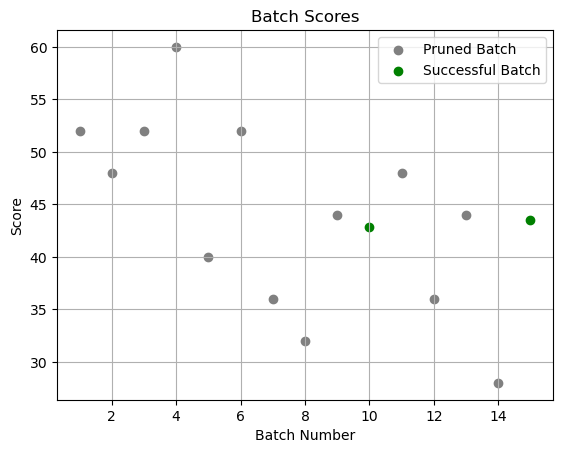

In [10]:
import matplotlib.pyplot as plt


trial_logs = optimized_program.trial_logs

trial_numbers = list(trial_logs.keys())
scores = [trial_logs[trial]["score"] for trial in trial_numbers]

full_eval = [trial_logs[trial]["full_eval"] for trial in trial_numbers]

for trial_number, score, pruned in zip(trial_numbers, scores, full_eval):
    if pruned is False:
        plt.scatter(
            trial_number,
            score,
            color="grey",
            label=(
                "Pruned Batch"
                if "Pruned Batch" not in plt.gca().get_legend_handles_labels()[1]
                else ""
            ),
        )
    else:
        plt.scatter(
            trial_number,
            score,
            color="green",
            label=(
                "Successful Batch"
                if "Successful Batch" not in plt.gca().get_legend_handles_labels()[1]
                else ""
            ),
        )

plt.xlabel("Batch Number")
plt.ylabel("Score")
plt.title("Batch Scores")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
best_score = 0
best_program_so_far = None


def get_signature(predictor):
    if hasattr(predictor, "extended_signature"):
        return predictor.extended_signature
    elif hasattr(predictor, "signature"):
        return predictor.signature


# print(f"Baseline program | Score: {best_score}:")
# for i, predictor in enumerate(WrapperEnglishSPT().predictors()):
#     print(f"Prompt {i+1} Instruction: {get_signature(predictor).instructions}")
# print()

print("----------------")

for trial_num in optimized_program.trial_logs:
    program_score = optimized_program.trial_logs[trial_num]["score"]
    program_pruned = optimized_program.trial_logs[trial_num]["full_eval"]
    # if (
    #     program_score > best_score
    #     and program_pruned is True
    #     # and optimized_program.trial_logs[trial_num]["full_eval"]
    # ):
    if program_pruned is True:
        best_score = program_score
        best_program_so_far = optimized_program.trial_logs[trial_num]["program"]
    # if trial_num % 5 == 0:
    #     print(f"Best program after {trial_num} batches | Score: {best_score}:")
    #     for i, predictor in enumerate(best_program_so_far.predictors()):
    #         print(f"Prompt {i+1} Instruction: {get_signature(predictor).instructions}")
    #     print()
    
        # print(f"Best program with best score: {best_score}")
        for i, predictor in enumerate(best_program_so_far.predictors()):
            print(f"Prompt {trial_num} Instruction: {get_signature(predictor).instructions}")
            print(best_score)
        print()

----------------
Prompt 10 Instruction: To rate the semantic similarity of the target word in sentences 1 and 2, we need to analyze the context in which the word is used in both sentences.

Sentence 1 mentions "190 millones de coronas suecas" which refers to the Swedish currency.
Sentence 2 mentions "corona" as a part of a royal or noble title, referring to a crown.

Considering only the objects/concepts the word forms refer to and ignoring any common etymology and metaphorical similarity, we can conclude that:

- In Sentence 1, "coronas" refers to a unit of currency.
- In Sentence 2, "corona" refers to a royal crown.

These two concepts are unrelated, as one is a form of money and the other is a symbol of royalty. Therefore, the semantic similarity rating would be 1, indicating that the target word has an unrelated meaning in the two sentences.
42.88

Prompt 15 Instruction: You are a highly trained text data annotation tool capable of providing subjective responses. Given two sentence

In [12]:
program_spt_prompt_en_assertions.load(
    "compile-models/sp/es_spt_mipro_optimized_prompt_en_llama3-3-q4"
)

In [13]:

custom_evaluate(
    random.choices(classes_1_test, k=225)
    + random.choices(classes_2_test, k=225)
    + random.choices(classes_3_test, k=225)
    + random.choices(classes_4_test, k=225),
    evaluate_answer,
    program_spt_prompt_en_assertions,
    debug=True,
)

Evaluating: 900 examples


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  2


Prediction:  2
Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  1
Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  4


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  3


Prediction:  1
Prediction:  1


Prediction:  2
Prediction:  1
Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  4
Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  2


Prediction:  1
Prediction:  4
Prediction:  1


Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  4


Prediction:  1
Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  3
Prediction:  2
Prediction:  1
Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  4
Prediction:  1
Prediction:  4
Prediction:  1


Prediction:  1
Prediction:  2


Prediction:  1


Prediction:  1
Prediction:  4
Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  4
Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  3


Prediction:  1


Prediction:  4


Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  4


Prediction:  1
Prediction:  2


Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  4
Prediction:  1
Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  4
Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  4
Prediction:  1
Prediction:  3


Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  3
Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  2
Prediction:  4
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  4


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  3


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  1


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  2
Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  1


Prediction:  2
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  2
Prediction:  1


Prediction:  2


Prediction:  4


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  3


Prediction:  1
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  1
Prediction:  4


Prediction:  4


Prediction:  1
Prediction:  3


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  3
Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  4
Prediction:  1


Prediction:  4
Prediction:  1


Prediction:  2
Prediction:  1


Prediction:  1


Prediction:  3
Prediction:  1
Prediction:  2
Prediction:  2
Prediction:  2


Prediction:  1
Prediction:  3
Prediction:  2


Prediction:  1
Prediction:  2


Prediction:  1


Prediction:  2
Prediction:  4
Prediction:  3


Prediction:  2


Prediction:  1
Prediction:  2
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  2


Prediction:  2
Prediction:  3


Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  4


Prediction:  1
Prediction:  1
Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  3
Prediction:  3


Prediction:  2
Prediction:  3
Prediction:  2
Prediction:  2


Prediction:  1


Prediction:  1
Prediction:  2
Prediction:  2


Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  2
Prediction:  2


Prediction:  4


Prediction:  1
Prediction:  4
Prediction:  1
Prediction:  3
Prediction:  2
Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  3
Prediction:  1


Prediction:  1
Prediction:  4


Prediction:  1
Prediction:  1


Prediction:  2
Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  4
Prediction:  2
Prediction:  2


Prediction:  4
Prediction:  1


Prediction:  2
Prediction:  1


Prediction:  4


Prediction:  1
Prediction:  4
Prediction:  1


Prediction:  2


Prediction:  4
Prediction:  2
Prediction:  3
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  2


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  1


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  4


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  4


Prediction:  1
Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  1


Prediction:  4


Prediction:  2
Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4
Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  4
Prediction:  3
Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  4


Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  1
Prediction:  3


Prediction:  1
Prediction:  2


Prediction:  2


Prediction:  4
Prediction:  3
Prediction:  4


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  1
Prediction:  4
Prediction:  1


Prediction:  3


Prediction:  3
Prediction:  1


Prediction:  3


Prediction:  4
Prediction:  4


Prediction:  3
Prediction:  4


Prediction:  1


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  3
Prediction:  4


Prediction:  2


Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  2
Prediction:  1
Prediction:  3


Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  4


Prediction:  1


Prediction:  2


Prediction:  2
Prediction:  3


Prediction:  4
Prediction:  2
Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  1
Prediction:  4
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  4
Prediction:  4
Prediction:  2


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  1
Prediction:  4
Prediction:  3


Prediction:  2
Prediction:  4
Prediction:  3


Prediction:  3


Prediction:  4
Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  4
Prediction:  2
Prediction:  4


Prediction:  3
Prediction:  3


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  2
Prediction:  4


Prediction:  1
Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  1


Prediction:  4


Prediction:  3
Prediction:  4
Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  1
Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  1
Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  4
Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  1


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  4
Prediction:  3


Prediction:  4


Prediction:  3
Prediction:  4


Prediction:  1


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4
Prediction:  3


Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  2
Prediction:  1


Prediction:  1


Prediction:  4


Prediction:  3
Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  2
Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  4
Prediction:  1


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  1


Prediction:  4


Prediction:  2


Prediction:  2


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  4
Prediction:  4
Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  4
Prediction:  2


Prediction:  1
Prediction:  2


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  2
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  2
Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4
Prediction:  3


Prediction:  4
Accurate examples: 417
Bad-formatted examples: 0
Accuracy: 46.333333333333336
